In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

C:\Users\pulzara\AppData\Local\Temp\ipykernel_8960\495279268.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import math 

import warnings
warnings.filterwarnings("ignore")

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)


import gc

In [3]:
alcazares = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/alcazares.txt',delimiter = '|') 
aranjuez = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/aranjuez.txt',delimiter = '|') 
bosques_del_norte = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/bosques_del_norte.txt',delimiter = '|') 
chec_uribe = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/chec_uribe.txt',delimiter = '|') 
el_carmen = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/el_carmen.txt',delimiter = '|') 
emas = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/emas.txt',delimiter = '|') 
hospital_caldas = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/hospital_caldas.txt',delimiter = '|')
la_nubia = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/la_nubia.txt',delimiter = '|') 
la_palma = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/la_palma.txt',delimiter = '|') 
milan = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/milan.txt',delimiter = '|') 
obs_vulcanologico = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/obs_vulcanologico.txt',delimiter = '|') 
palogrande = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/palogrande.txt',delimiter = '|')
posgrados = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/posgrados.txt',delimiter = '|') 
yarumos = pd.read_table('C:/Users/pulzara/Documents/Universidad internacional de valencia/TFM/base de datos/SIMAC organizados/BD2/yarumos.txt',delimiter = '|') 

In [4]:
def renombrar(df): 
    df = df.rename(columns={'Temperatura(ºC)':'Temperatura', 'Velocidad(m/s)': 'Velocidad', 'Direccion(º)':'Direccion',
       'Presion(mmHg)':'Presion', 'Humedad(%)':'Humedad', 'Precipitacion(mm)':'Precipitacion', 'Radiacion(W/m^2)':'Radiacion',
       'Evapotranspiracion(mm)':'Evapotranspiracion', 'Evapo_real(mm)':'Evapo_real'})
    return df 

In [5]:
alcazares = renombrar(alcazares)
aranjuez = renombrar(aranjuez)
bosques_del_norte = renombrar(bosques_del_norte)
chec_uribe = renombrar(chec_uribe)
el_carmen = renombrar(el_carmen)
emas = renombrar(emas)
hospital_caldas = renombrar(hospital_caldas)
la_nubia = renombrar(la_nubia)
la_palma = renombrar(la_palma)
milan = renombrar(milan)
obs_vulcanologico = renombrar(obs_vulcanologico)
palogrande = renombrar(palogrande)
posgrados = renombrar(posgrados)
yarumos = renombrar(yarumos)

In [6]:
la_nubia.Precipitacion_Real = la_nubia.Precipitacion_Real.replace('aquí', 0)
posgrados.Precipitacion_Real = posgrados.Precipitacion_Real.replace(' Precipita', 0)
aranjuez = aranjuez.replace(".", np.nan)  
el_carmen = el_carmen.replace(".", np.nan)  
posgrados= posgrados.replace(".", np.nan)   

In [7]:
def fecha(df):
    
    '''
    Funcion que pasa la fecha a formato datetime y las variables al formato necesario
    '''
    df["Fecha"] = pd.to_datetime(df["Fecha"])  
    #df["Hora"] =  pd.to_datetime(df["Hora"]).dt.time  
    #df["Direccion"] = df["Direccion"].fillna(-91)
    #df["Direccion"] = df["Direccion"].astype(int)
    #df["Humedad"] = df["Humedad"].fillna(-91)
    #df["Humedad"] = df["Humedad"].astype(int)
    #df["Radiacion"] = df["Radiacion"].fillna(-91)
    #df["Radiacion"] = df["Radiacion"].astype(int) 
    df["Precipitacion"] = df["Precipitacion"].astype(float)
    df["Precipitacion_Real"] = df["Precipitacion_Real"].astype(float)
    df["Temperatura"] =  df["Temperatura"].astype(float)
    df["Velocidad"] =  df["Velocidad"].astype(float)
    df["Presion"] =  df["Presion"].astype(float)
    df["Humedad"] =  df["Humedad"].astype(float)
    
    return df 

In [8]:
alcazares = fecha(alcazares) 
aranjuez = fecha(aranjuez)
bosques_del_norte = fecha(bosques_del_norte)
chec_uribe = fecha(chec_uribe)
el_carmen = fecha(el_carmen)
emas = fecha(emas)
hospital_caldas = fecha(hospital_caldas)
la_nubia = fecha(la_nubia)
la_palma = fecha(la_palma)
milan = fecha(milan)
obs_vulcanologico = fecha(obs_vulcanologico)
palogrande = fecha(palogrande)
posgrados = fecha(posgrados)
yarumos = fecha(yarumos)

In [9]:
#alcazares = alcazares.replace(-91, np.nan) 

In [10]:
#alcazares["Direccion"] = alcazares["Direccion"].fillna(-91)

In [9]:
def  ordenar(df):
    '''
    Funcion ordena el dataset por Fecha de manera ascendente
    '''
    df = df.sort_values(by="Fecha", ascending=True)  
    df.reset_index(inplace=True, drop=True) 
    return df

In [10]:
alcazares = ordenar(alcazares) 
aranjuez = ordenar(aranjuez)
bosques_del_norte = ordenar(bosques_del_norte)
chec_uribe = ordenar(chec_uribe)
el_carmen = ordenar(el_carmen)
emas = ordenar(emas)
hospital_caldas = ordenar(hospital_caldas)
la_nubia = ordenar(la_nubia)
la_palma = ordenar(la_palma)
milan = ordenar(milan)
obs_vulcanologico = ordenar(obs_vulcanologico)
palogrande = ordenar(palogrande)
posgrados = ordenar(posgrados)
yarumos = ordenar(yarumos)

In [13]:
#alcazares["Precipitacion_Real"] = alcazares["Precipitacion_Real"].fillna(-91)

In [14]:
#alcazares[alcazares.Precipitacion_Real.astype(str).str.isalpha() == True]       

In [15]:
#la_nubia.loc[[308352,308353, 308354]]  

In [16]:
#alcazares[(alcazares.Fecha > "2010-01-01") & (alcazares.Fecha < "2010-03-31") & (alcazares.Temperatura <= 30)].Temperatura.mean()       

In [11]:
def new_colum_str(df,value):
    """
    Esta funcion crea dos variables nuevas: nombre de la estacion metereologica, el año y el mes asignado a la fecha.
    """
    df["Estacion"] = value
    return df 
    

In [12]:
alcazares = new_colum_str(alcazares, "alcazares")   
aranjuez = new_colum_str(aranjuez, "aranjuez")   
bosques_del_norte = new_colum_str(bosques_del_norte, "bosques_del_norte")   
chec_uribe = new_colum_str(chec_uribe, "chec_uribe")   
el_carmen = new_colum_str(el_carmen, "el_carmen")   
emas = new_colum_str(emas, "emas")   
hospital_caldas = new_colum_str(hospital_caldas, "hospital_caldas")   
la_nubia = new_colum_str(la_nubia, "la_nubia")   
la_palma = new_colum_str(la_palma, "la_palma")   
milan = new_colum_str(milan, "milan")   
obs_vulcanologico = new_colum_str(obs_vulcanologico, "obs_vulcanologico")   
palogrande = new_colum_str(palogrande, "palogrande")  
posgrados = new_colum_str(posgrados, "posgrados")
yarumos = new_colum_str(yarumos, "yarumos")   

## Precipitacion

In [13]:
datasets = [alcazares, aranjuez, bosques_del_norte, chec_uribe, el_carmen,emas,hospital_caldas, la_nubia,la_palma, milan, obs_vulcanologico, palogrande,posgrados,yarumos]

alcazares


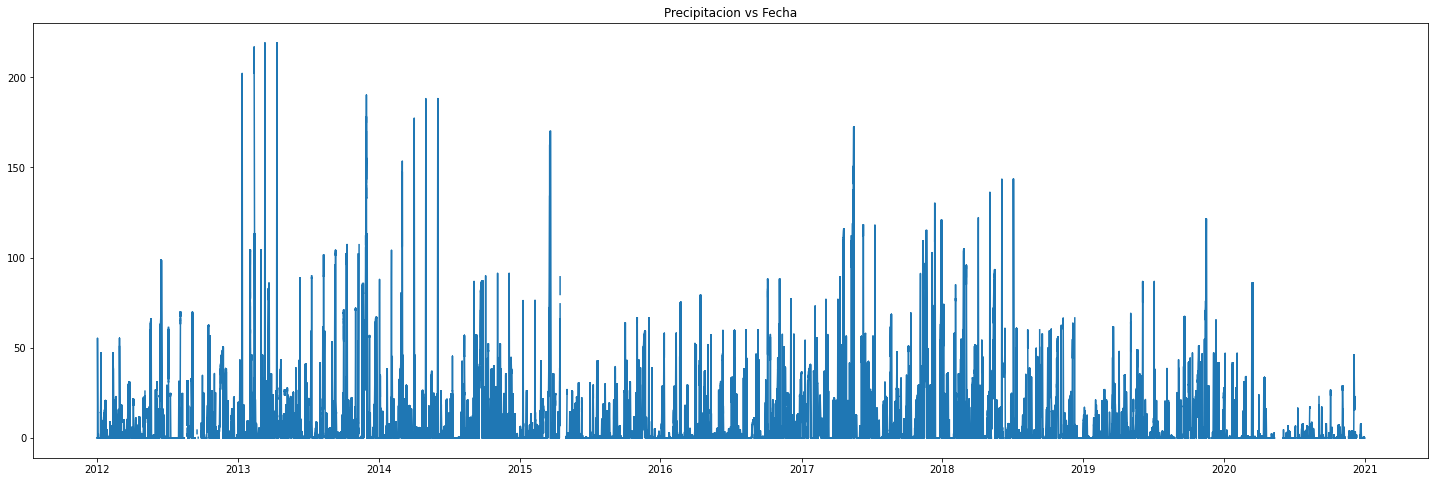

aranjuez


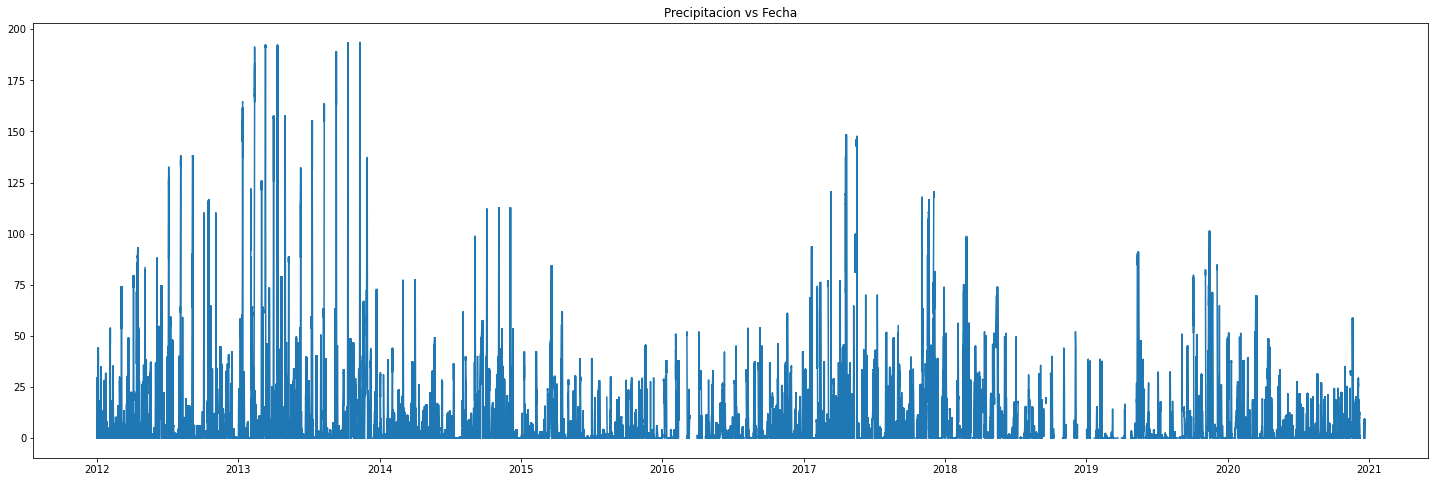

bosques_del_norte


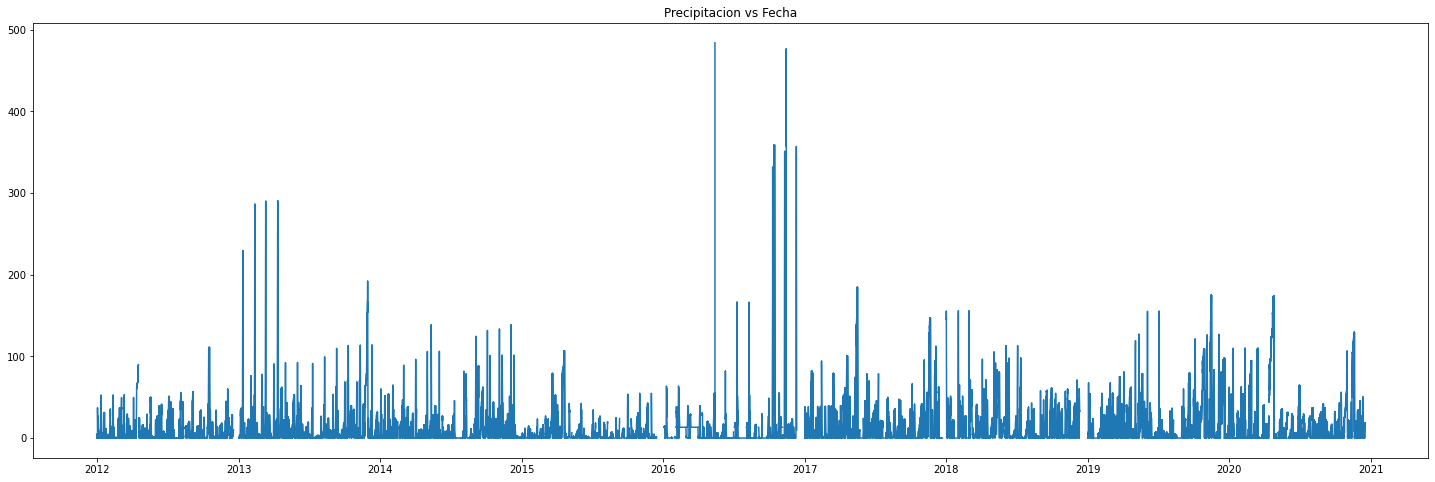

chec_uribe


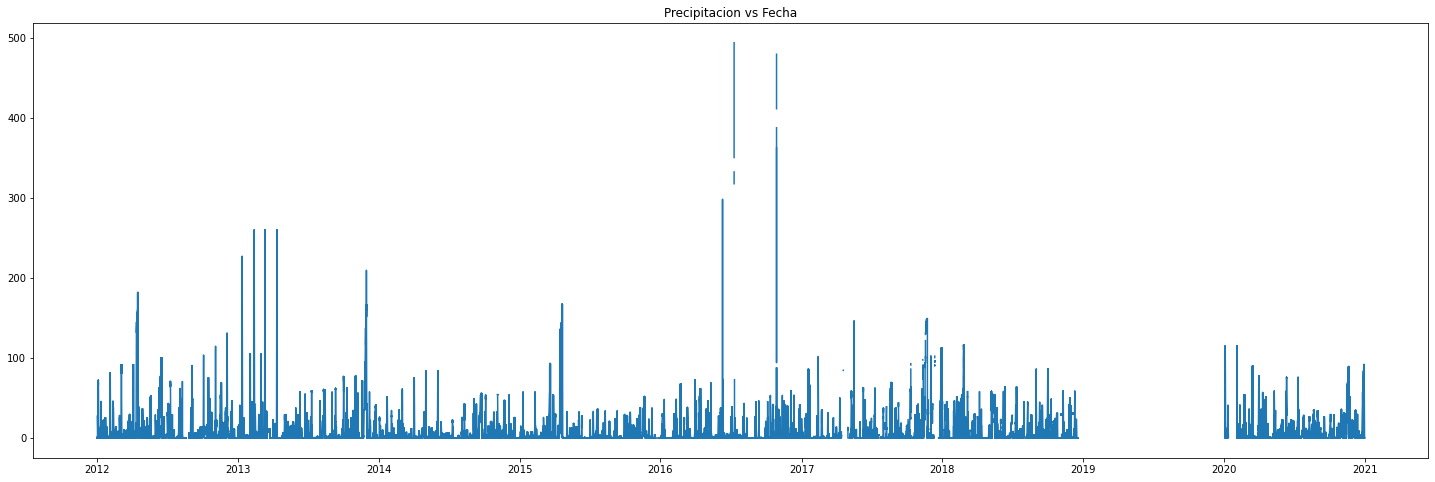

el_carmen


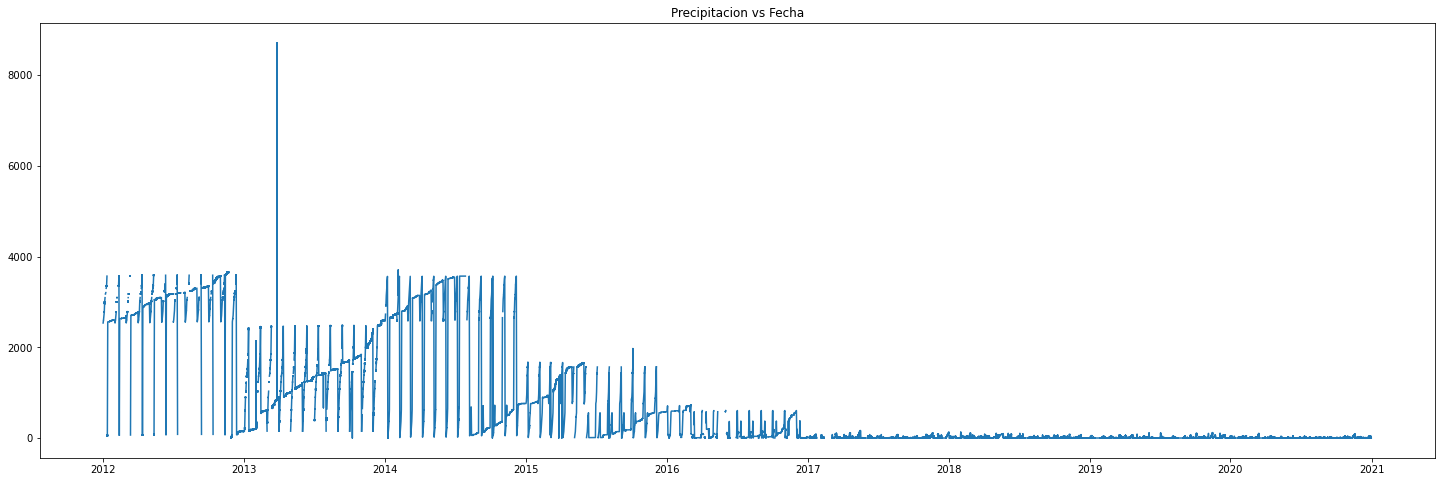

emas


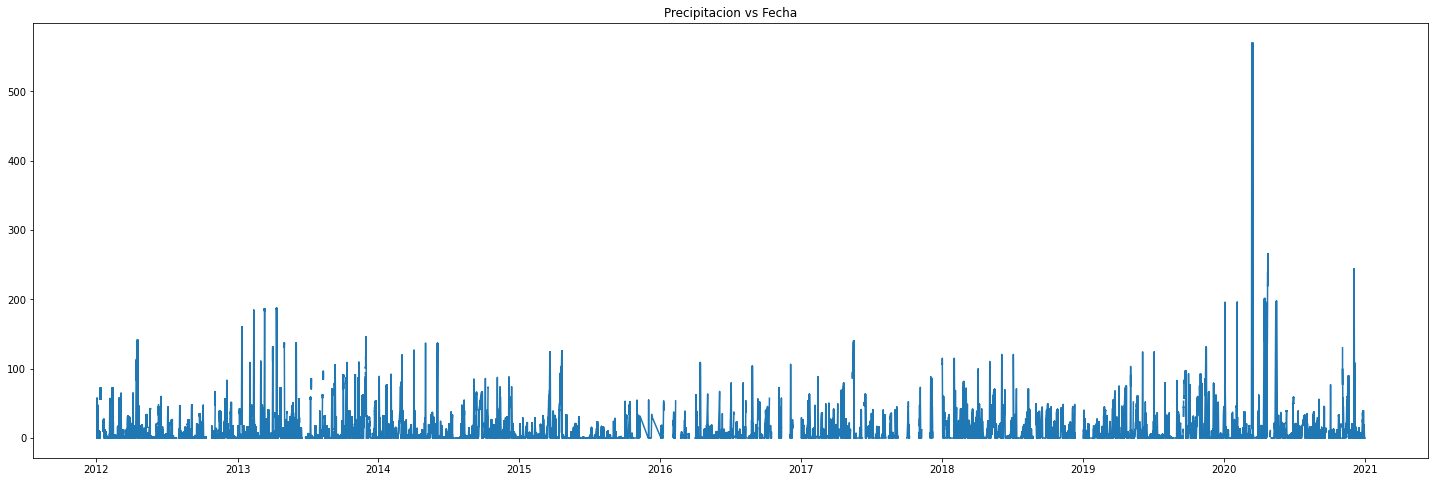

hospital_caldas


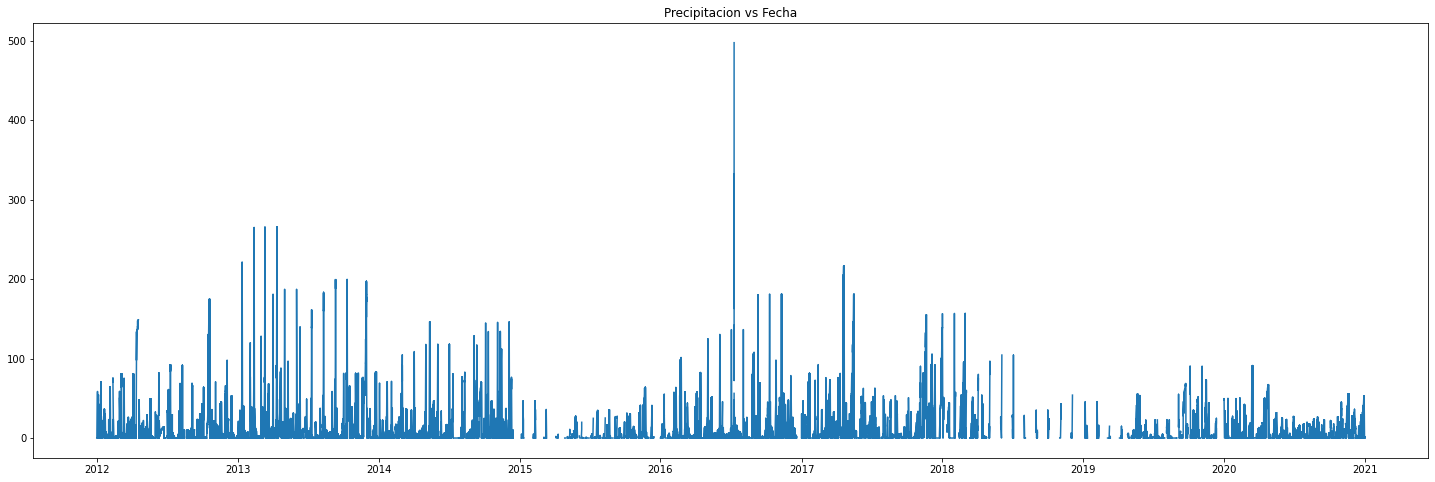

la_nubia


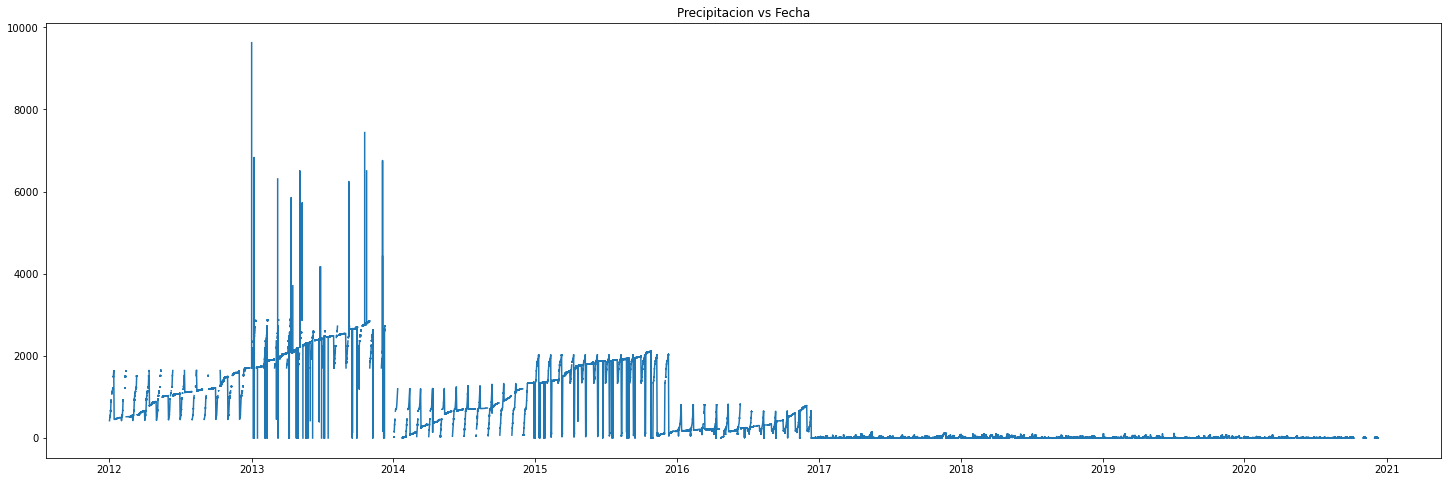

la_palma


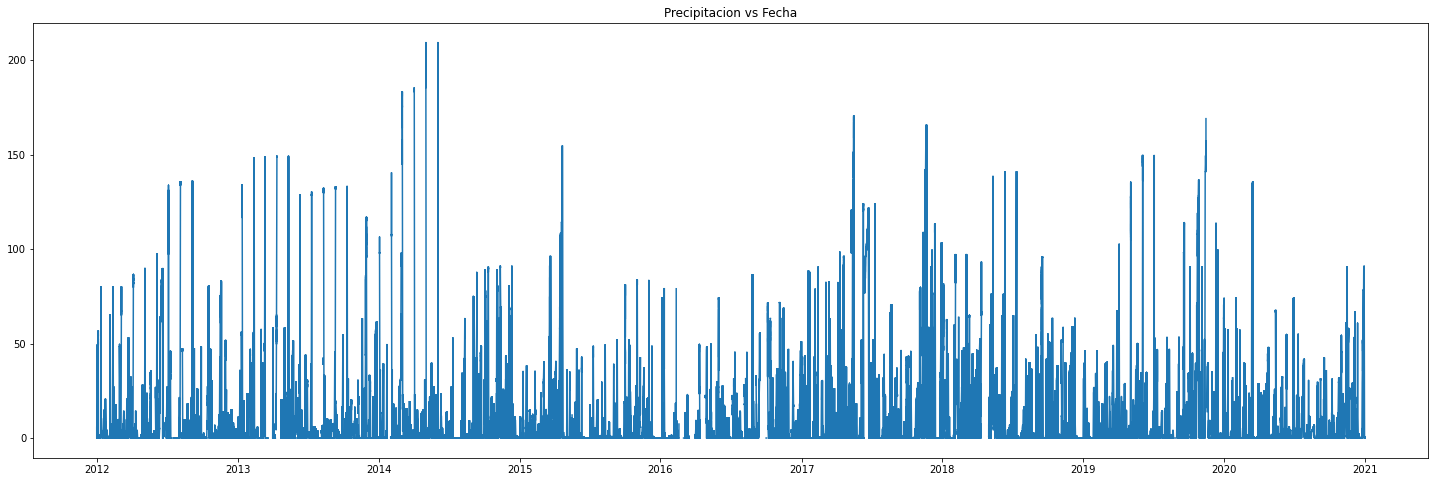

milan


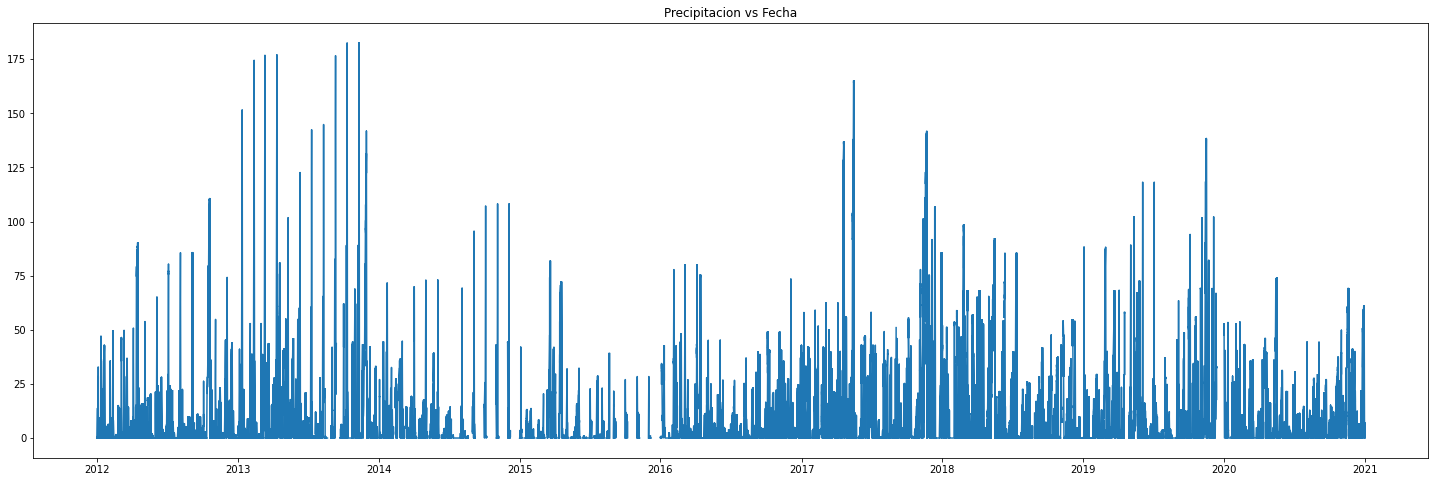

obs_vulcanologico


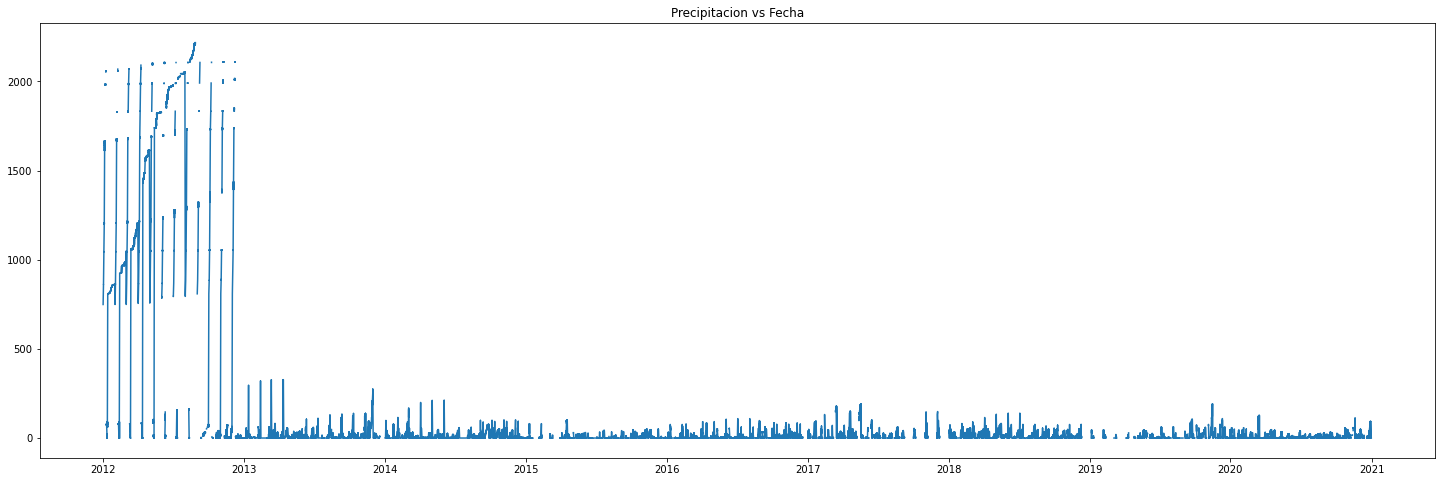

palogrande


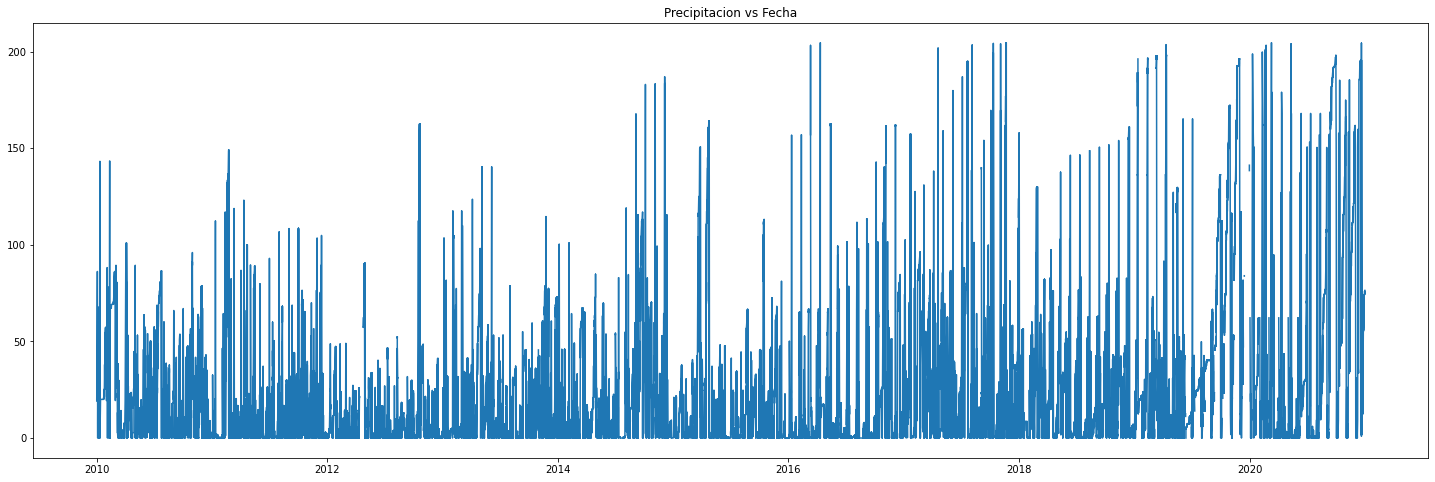

posgrados


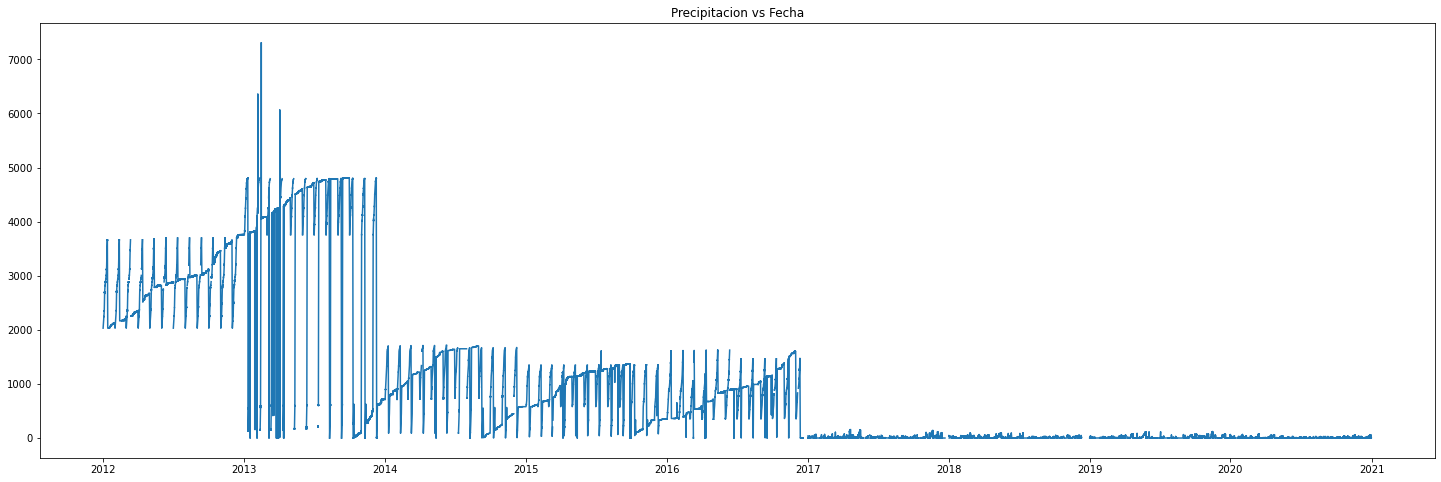

yarumos


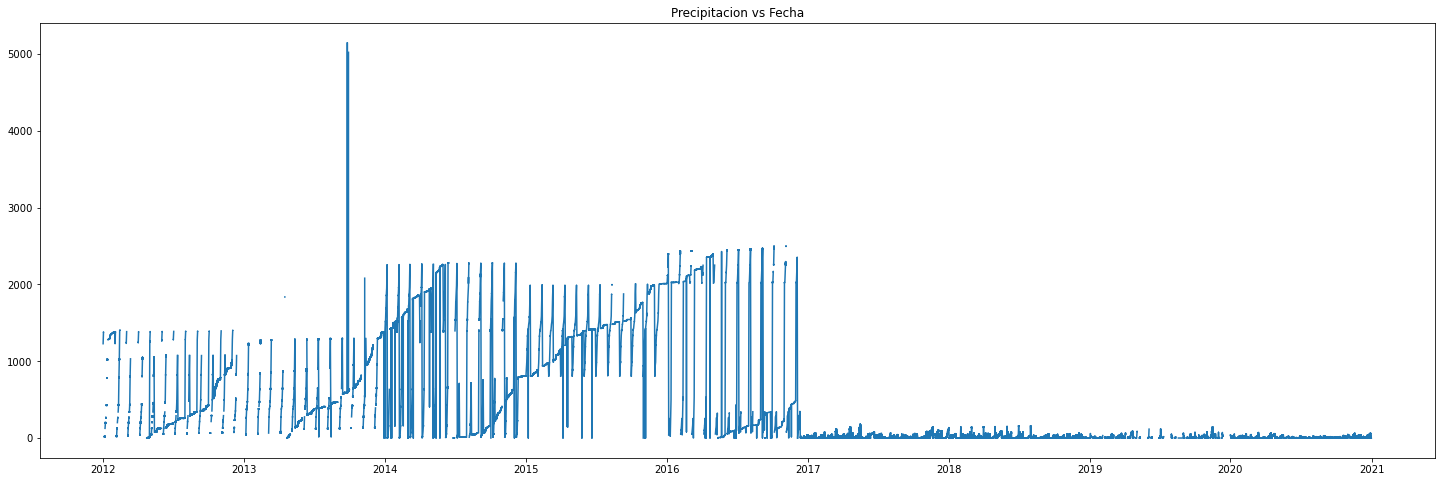

In [18]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Precipitacion"])
    plt.title("Precipitacion vs Fecha") 
    plt.show()

Estacion alcazares


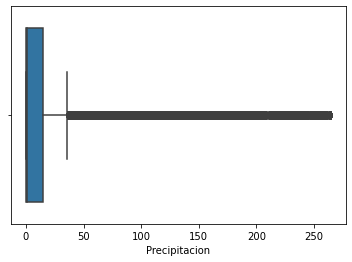

Estacion aranjuez


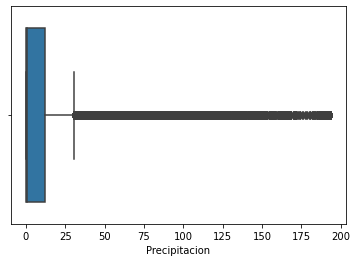

Estacion bosques_del_norte


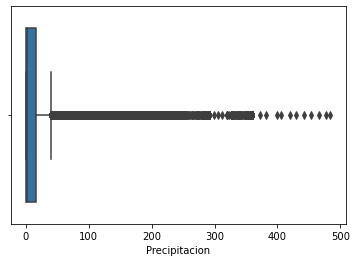

Estacion chec_uribe


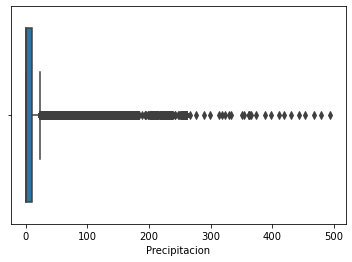

Estacion el_carmen


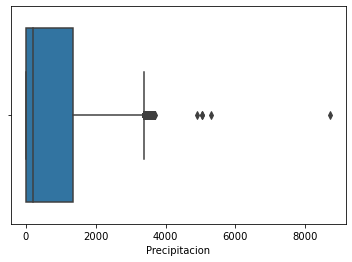

Estacion emas


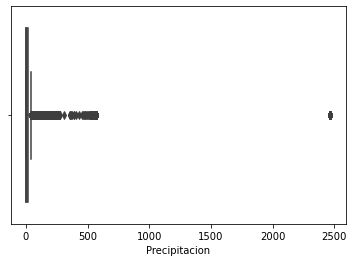

Estacion hospital_caldas


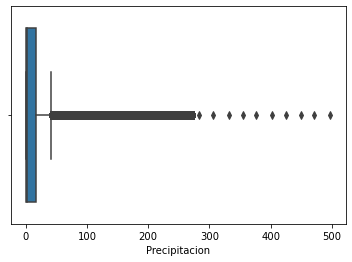

Estacion la_nubia


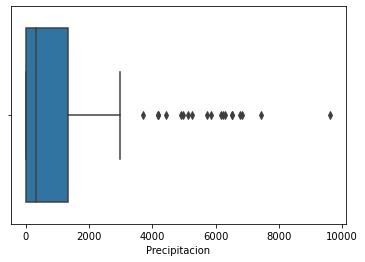

Estacion la_palma


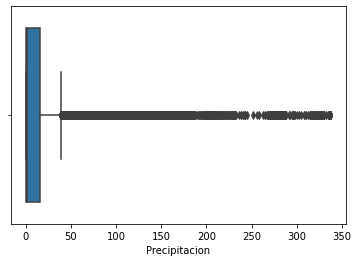

Estacion milan


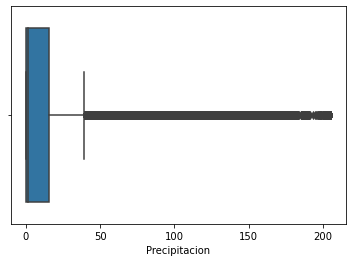

Estacion obs_vulcanologico


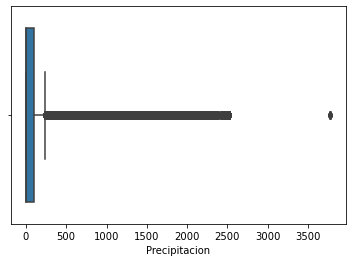

Estacion palogrande


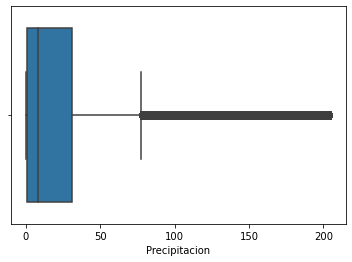

Estacion posgrados


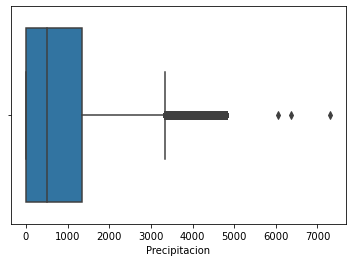

Estacion yarumos


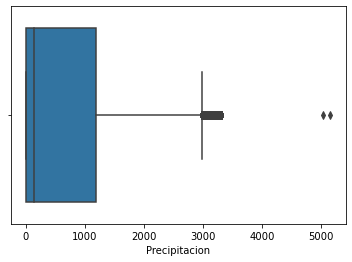

In [28]:
for i in datasets:
    print("Estacion", i.Estacion[0])
    sns.boxplot(x ='Precipitacion', data = i)
    plt.show() 
    

In [72]:
for i in datasets:
    print(i.Estacion[0])  
    print(i.Precipitacion.isnull().sum(), "\n")    

alcazares
55859 

aranjuez
104971 

bosques_del_norte
21843 

chec_uribe
155591 

el_carmen
74309 

emas
70325 

hospital_caldas
21169 

la_nubia
117776 

la_palma
92195 

milan
25968 

obs_vulcanologico
59564 

palogrande
21056 

posgrados
17571 

yarumos
87594 



In [289]:
#yarumos.loc[(yarumos.Fecha > "2010-01-01") & (yarumos.Fecha < "2010-04-30") & (yarumos.Precipitacion > 300), "Precipitacion"]    

In [128]:
#yarumos["Precipitacion"] = np.where((yarumos.Fecha > "2010-04-01") & (yarumos.Fecha < "2012-12-31") & (yarumos.Precipitacion > 300), 160, yarumos["Precipitacion"])  

In [288]:
#el_carmen[(el_carmen.Fecha > "2012-01-01")&(el_carmen.Fecha < "2012-03-31") & (el_carmen.Precipitacion > 200)]       

In [258]:
#la_nubia[(la_nubia.Fecha > "2012-04-01")&(la_nubia.Fecha < "2012-12-30") & (la_nubia.Precipitacion < 200)]           

Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Estacion]
Index: []

In [97]:
 #posgrados[(posgrados.Fecha > "2012-01-01")&(posgrados.Fecha < "2012-03-31") & (posgrados.Precipitacion == np.nan)]          

Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real]
Index: []

In [14]:
datasets_1 = [el_carmen, emas, la_nubia, obs_vulcanologico, posgrados, yarumos]

In [15]:
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2010-01-01") & (i.Fecha < "2010-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2010-01-01") & (i.Fecha <= "2010-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2010-04-01") & (i.Fecha < "2010-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2010-04-01") & (i.Fecha <= "2010-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2010-07-01") & (i.Fecha < "2010-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2010-07-01") & (i.Fecha <= "2010-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2010-10-01") & (i.Fecha < "2010-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2010-10-01") & (i.Fecha <= "2010-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2011-01-01") & (i.Fecha < "2011-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2011-01-01") & (i.Fecha <= "2011-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2011-04-01") & (i.Fecha < "2011-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2011-04-01") & (i.Fecha <= "2011-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2011-07-01") & (i.Fecha < "2011-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2011-07-01") & (i.Fecha <= "2011-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2011-10-01") & (i.Fecha < "2011-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2011-10-01") & (i.Fecha <= "2011-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2012-01-01") & (i.Fecha < "2012-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2012-01-01") & (i.Fecha <= "2012-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2012-04-01") & (i.Fecha < "2012-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2012-04-01") & (i.Fecha <= "2012-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2012-07-01") & (i.Fecha < "2012-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2012-07-01") & (i.Fecha <= "2012-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2012-10-01") & (i.Fecha < "2012-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2012-10-01") & (i.Fecha <= "2012-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2013-01-01") & (i.Fecha < "2013-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2013-01-01") & (i.Fecha <= "2013-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2013-04-01") & (i.Fecha < "2013-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2013-04-01") & (i.Fecha <= "2013-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2013-07-01") & (i.Fecha < "2013-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2013-07-01") & (i.Fecha <= "2013-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2013-10-01") & (i.Fecha < "2013-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2013-10-01") & (i.Fecha <= "2013-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2014-01-01") & (i.Fecha < "2014-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2014-01-01") & (i.Fecha <= "2014-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2014-04-01") & (i.Fecha < "2014-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2014-04-01") & (i.Fecha <= "2014-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2014-07-01") & (i.Fecha < "2014-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2014-07-01") & (i.Fecha <= "2014-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2014-10-01") & (i.Fecha < "2014-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2014-10-01") & (i.Fecha <= "2014-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2015-01-01") & (i.Fecha < "2015-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2015-01-01") & (i.Fecha <= "2015-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2015-04-01") & (i.Fecha < "2015-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2015-04-01") & (i.Fecha <= "2015-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2015-07-01") & (i.Fecha < "2015-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2015-07-01") & (i.Fecha <= "2015-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2015-10-01") & (i.Fecha < "2015-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2015-10-01") & (i.Fecha <= "2015-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2016-01-01") & (i.Fecha < "2016-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2016-01-01") & (i.Fecha <= "2016-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2016-04-01") & (i.Fecha < "2016-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2016-04-01") & (i.Fecha <= "2016-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2016-07-01") & (i.Fecha < "2016-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2016-07-01") & (i.Fecha <= "2016-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2016-10-01") & (i.Fecha < "2016-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2016-10-01") & (i.Fecha <= "2016-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2017-01-01") & (i.Fecha < "2017-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2017-01-01") & (i.Fecha <= "2017-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2017-04-01") & (i.Fecha < "2017-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2017-04-01") & (i.Fecha <= "2017-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2017-07-01") & (i.Fecha < "2017-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2017-07-01") & (i.Fecha <= "2017-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2017-10-01") & (i.Fecha < "2017-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2017-10-01") & (i.Fecha <= "2017-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2018-01-01") & (i.Fecha < "2018-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2018-01-01") & (i.Fecha <= "2018-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2018-04-01") & (i.Fecha < "2018-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2018-04-01") & (i.Fecha <= "2018-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2018-07-01") & (i.Fecha < "2018-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2018-07-01") & (i.Fecha <= "2018-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2018-10-01") & (i.Fecha < "2018-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2018-10-01") & (i.Fecha <= "2018-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2019-01-01") & (i.Fecha < "2019-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2019-01-01") & (i.Fecha <= "2019-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2019-04-01") & (i.Fecha < "2019-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2019-04-01") & (i.Fecha <= "2019-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2019-07-01") & (i.Fecha < "2019-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2019-07-01") & (i.Fecha <= "2019-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2019-10-01") & (i.Fecha < "2019-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2019-10-01") & (i.Fecha <= "2019-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            
            
n = 200
for i in datasets_1: 
    promedio = i[(i.Fecha > "2020-01-01") & (i.Fecha < "2020-03-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio = pd.DataFrame([promedio], columns={"valor"})   
    if math.isnan(promedio["valor"]) == False : 
        if promedio["valor"][0] != 0:  
            i["Precipitacion"] = np.where((i.Fecha >= "2020-01-01") & (i.Fecha <= "2020-03-31") & (i.Precipitacion > n), round(promedio["valor"],2), i["Precipitacion"])
    
    promedio2 = i[(i.Fecha > "2020-04-01") & (i.Fecha < "2020-06-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio2 = pd.DataFrame([promedio2], columns={"valor"}) 
    if math.isnan(promedio2["valor"]) == False:
        if promedio2["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2020-04-01") & (i.Fecha <= "2020-06-30") & (i.Precipitacion > n), round(promedio2["valor"],2), i["Precipitacion"])
    
    promedio3 = i[(i.Fecha > "2020-07-01") & (i.Fecha < "2020-09-30") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio3 = pd.DataFrame([promedio3], columns={"valor"}) 
    if math.isnan(promedio3["valor"]) == False :
        if promedio3["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2020-07-01") & (i.Fecha <= "2020-09-30") & (i.Precipitacion > n), round(promedio3["valor"],2), i["Precipitacion"])
    
    promedio4 = i[(i.Fecha > "2020-10-01") & (i.Fecha < "2020-12-31") & (i.Precipitacion <= n)].Precipitacion.mean()
    promedio4 = pd.DataFrame([promedio4], columns={"valor"}) 
    if math.isnan(promedio4["valor"]) == False :
        if promedio4["valor"][0] != 0:
            i["Precipitacion"] = np.where((i.Fecha >= "2020-10-01") & (i.Fecha <= "2020-12-31") & (i.Precipitacion > n), round(promedio4["valor"],2), i["Precipitacion"])
            



**Redondeamos los nuevos valores a solo 2 decimales.**

In [16]:
for i in datasets_1:
    i["Precipitacion"] = round(i["Precipitacion"], 2)

In [69]:
#print(yarumos["Precipitacion"].unique().tolist()) 

In [17]:
for i in datasets_1: 
    promedio = i[(i.Fecha > "2017-01-01")].Precipitacion.mean()  
    #i["Precipitacion"] = i[i.Fecha <= "2017-01-01"].fillna(promedio)
    i["Precipitacion"] = np.where((i.Fecha <= "2017-01-01") & (i.Precipitacion > 250), promedio, i["Precipitacion"]) 

In [32]:
#for i in datasets_1:
#    media = i.Precipitacion.mean() 
#    i["Precipitacion"] = i["Precipitacion"].fillna(media)

alcazares


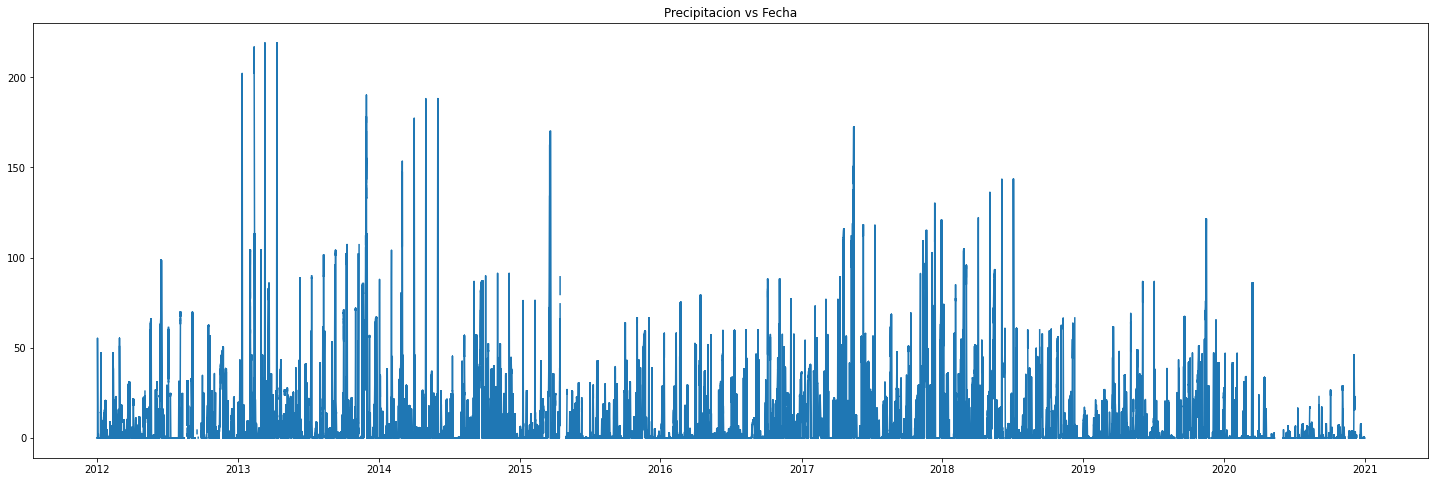

aranjuez


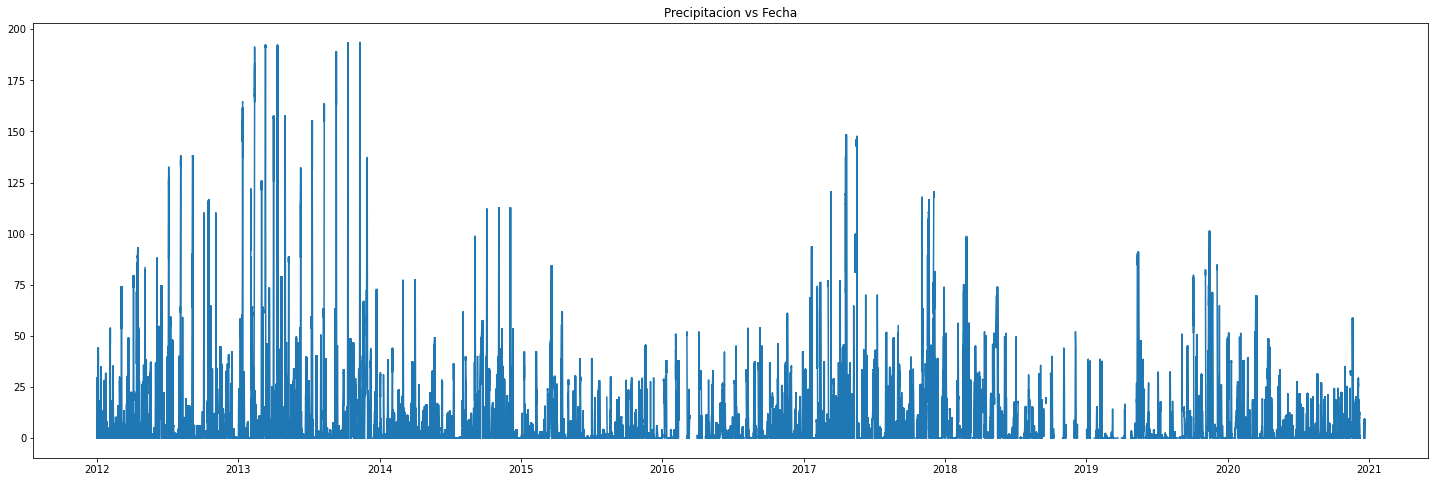

bosques_del_norte


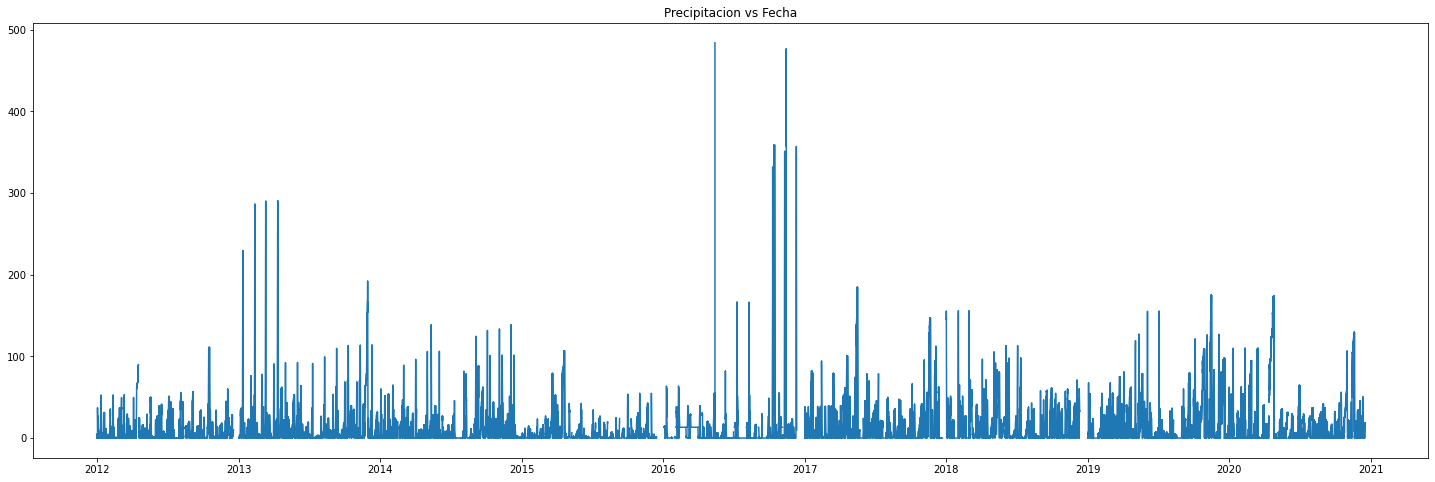

chec_uribe


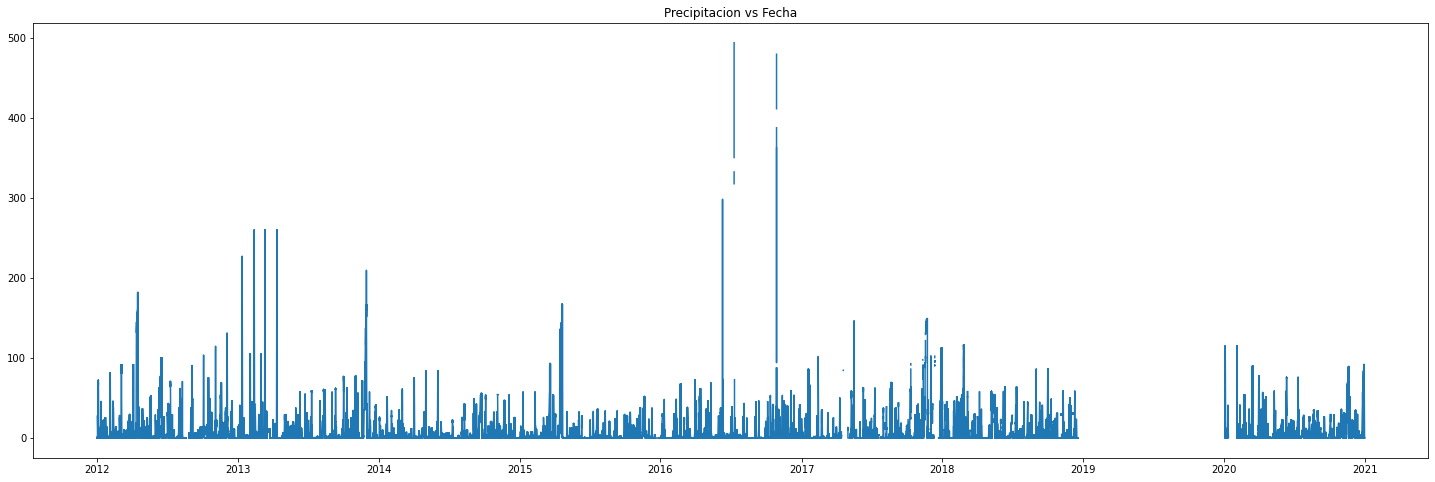

el_carmen


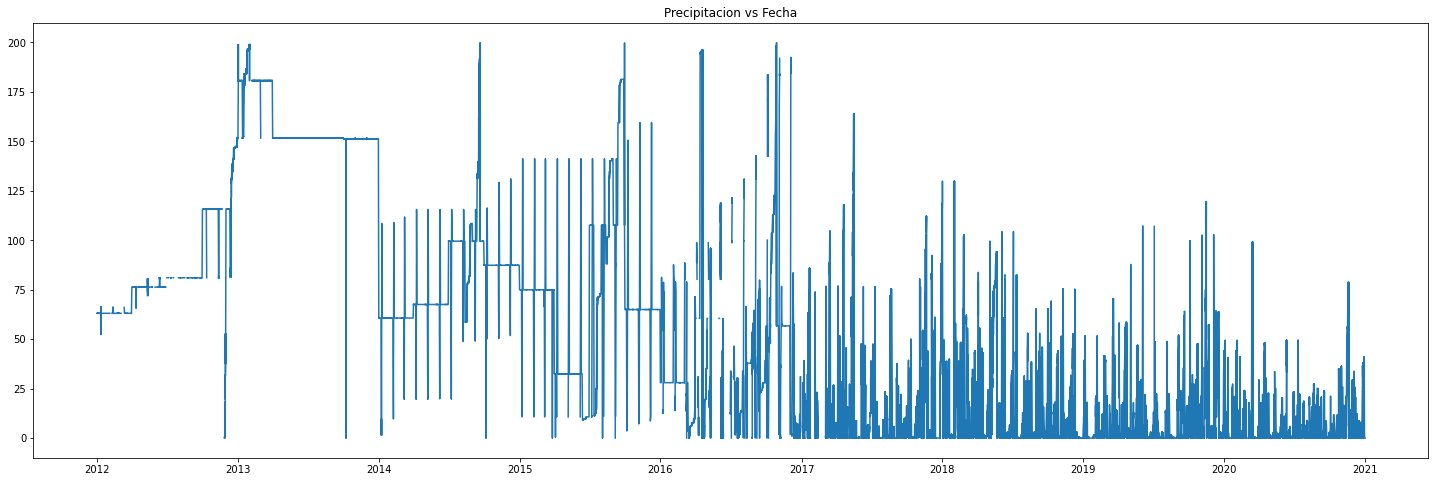

emas


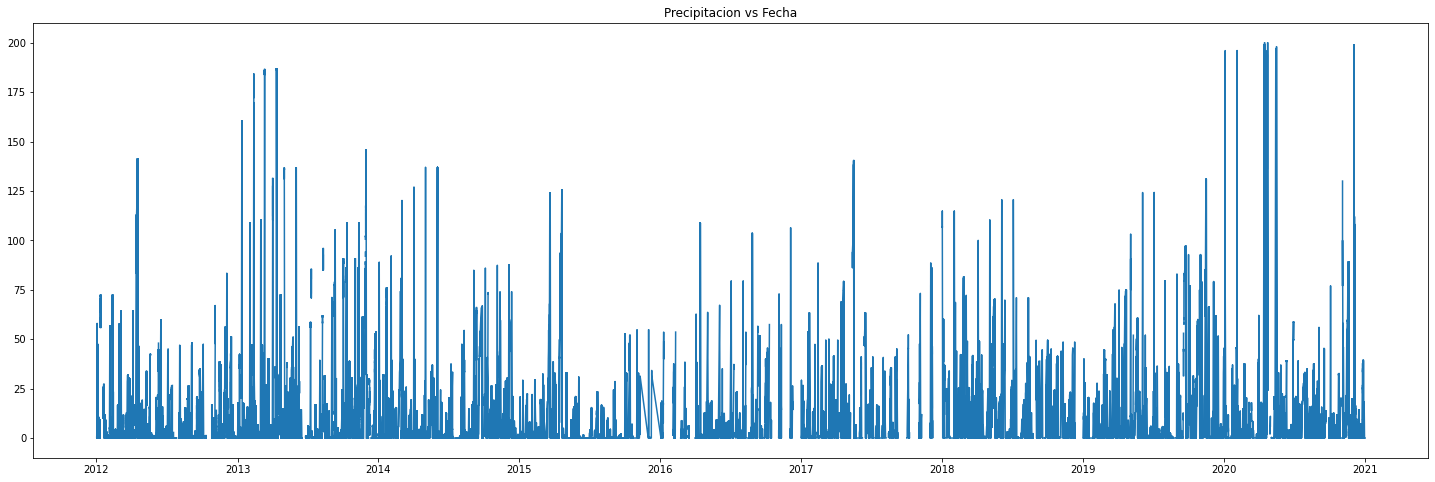

hospital_caldas


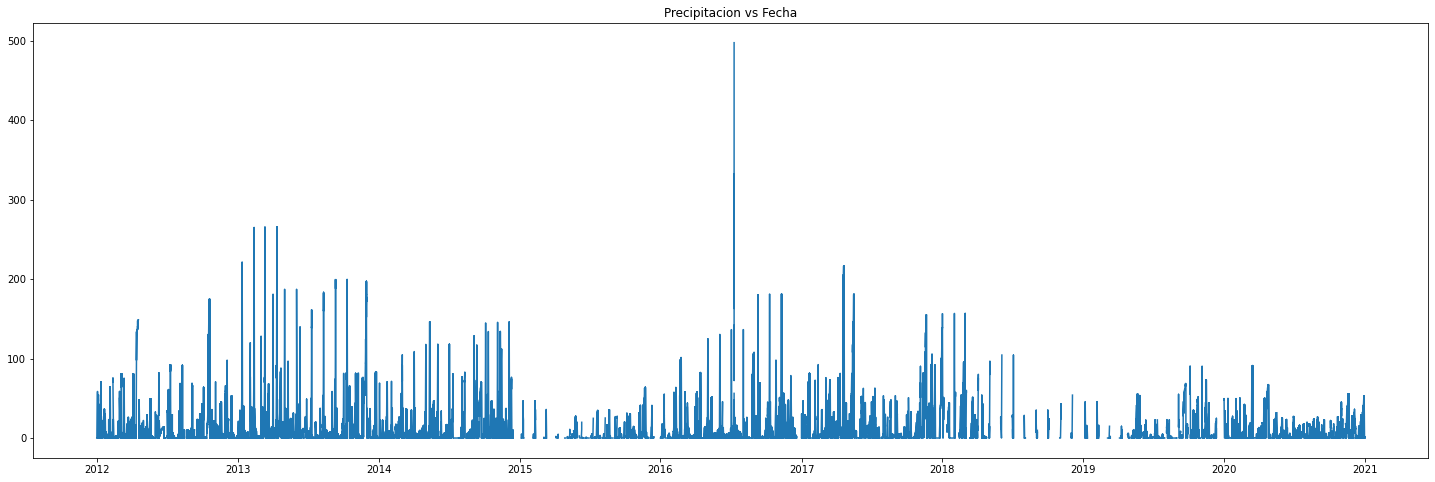

la_nubia


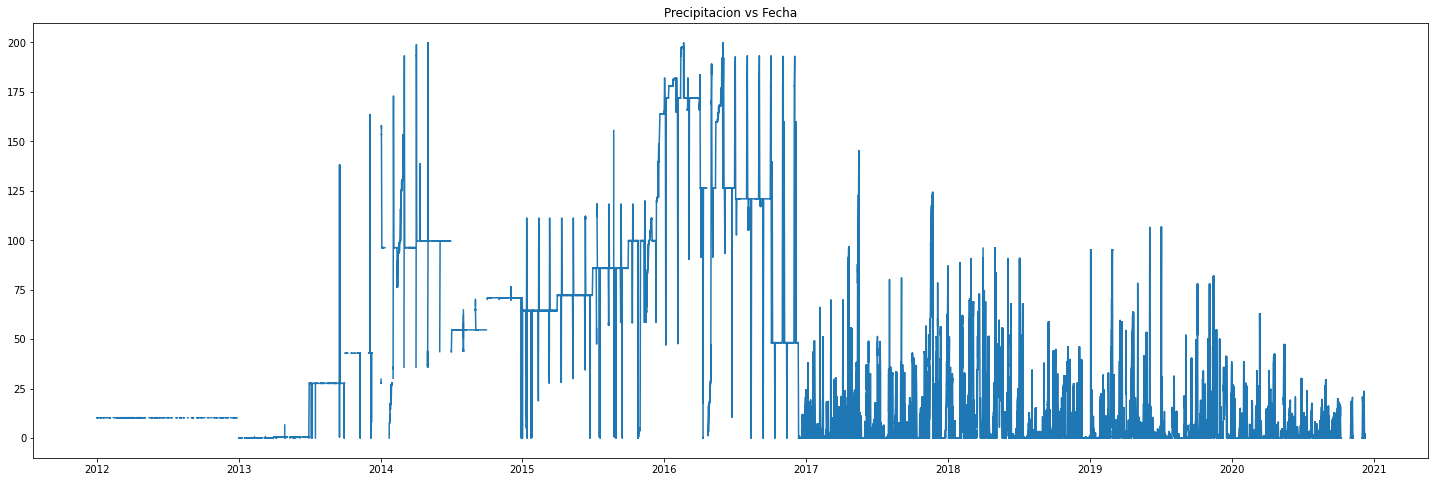

la_palma


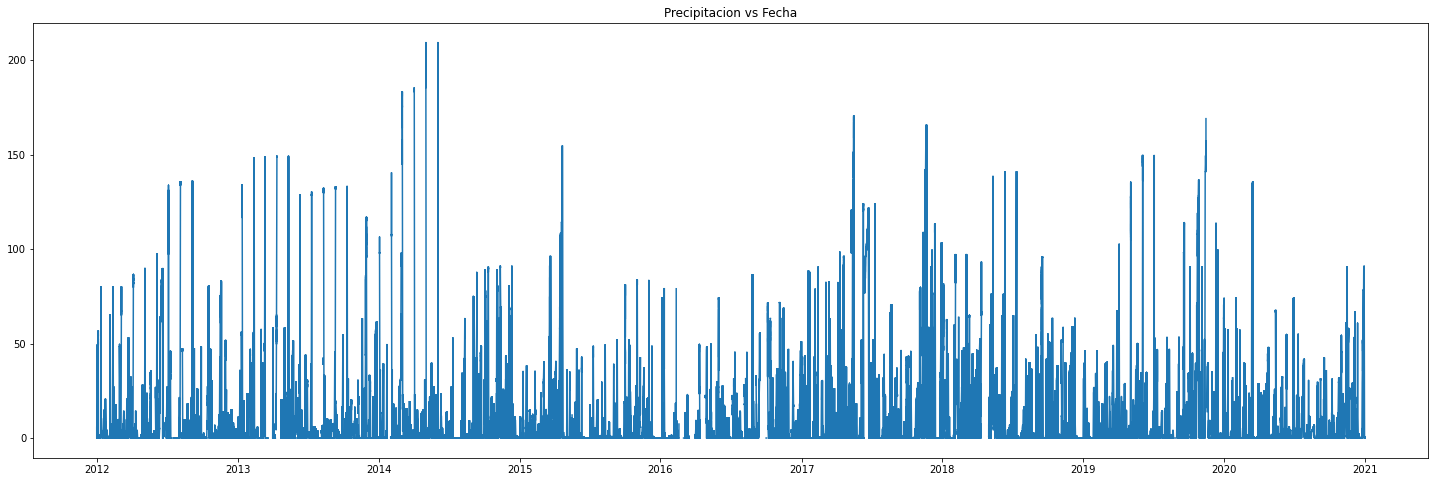

milan


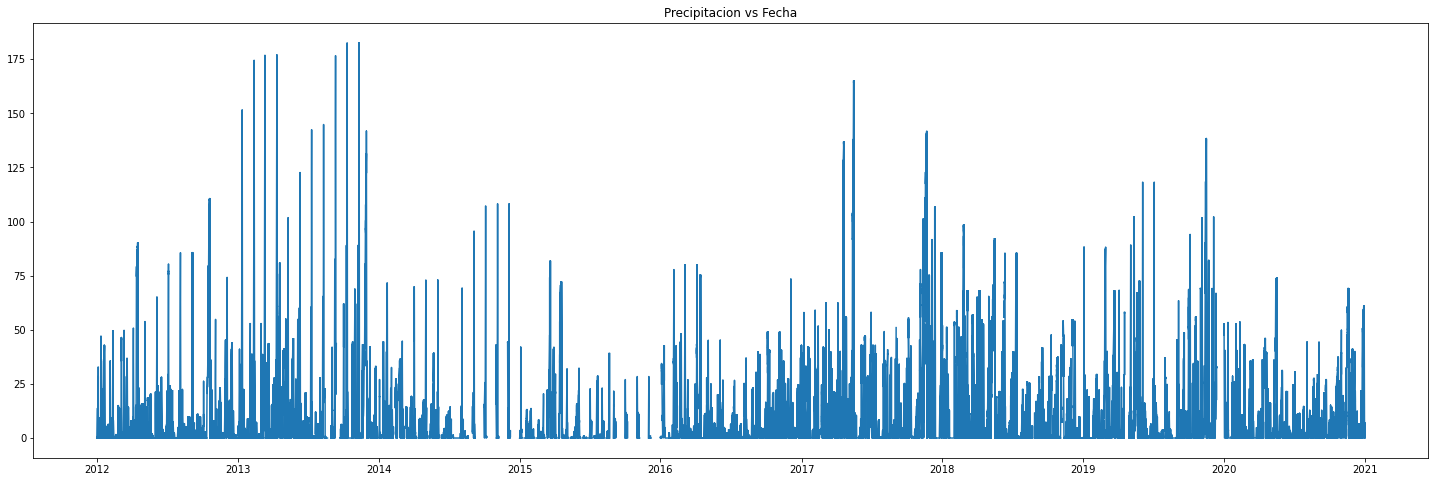

obs_vulcanologico


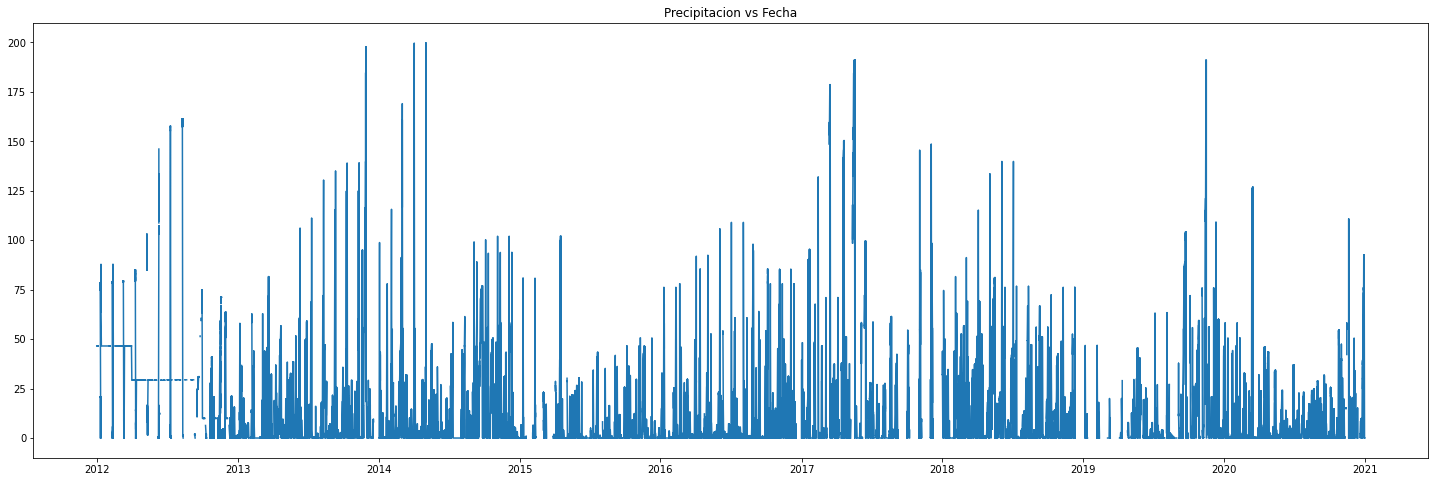

palogrande


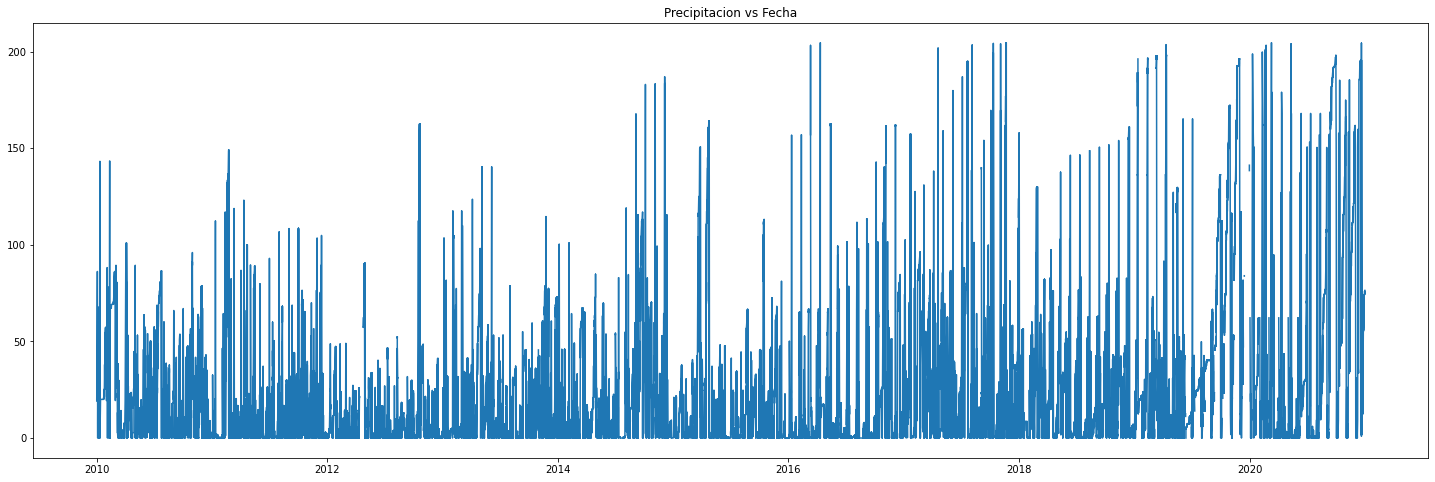

posgrados


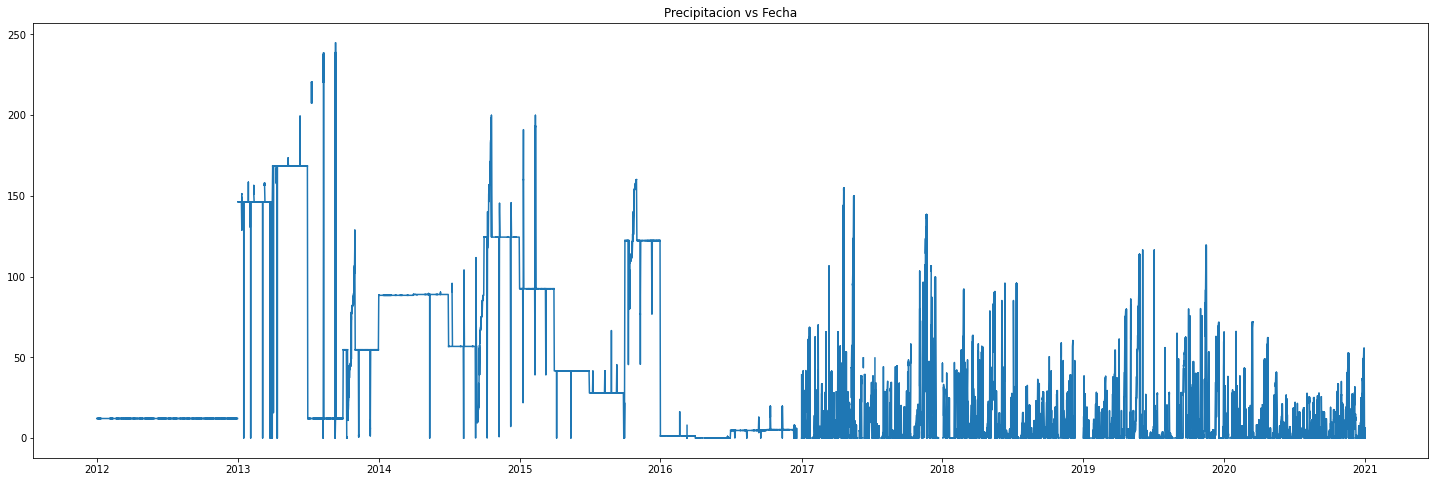

yarumos


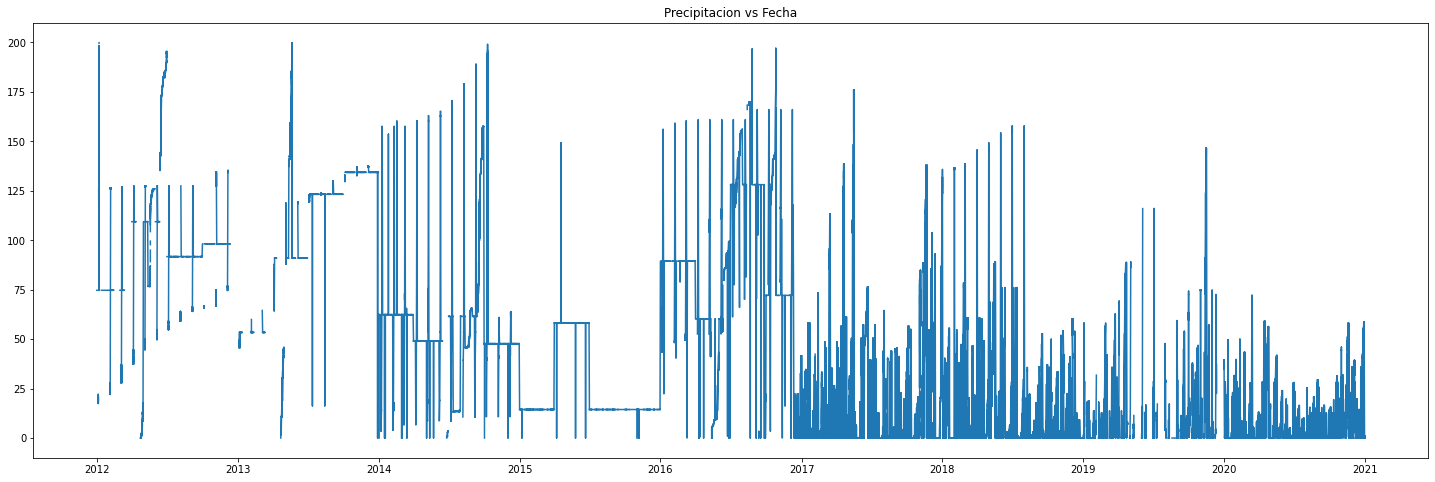

In [24]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Precipitacion"])
    plt.title("Precipitacion vs Fecha") 
    plt.show()

alcazares


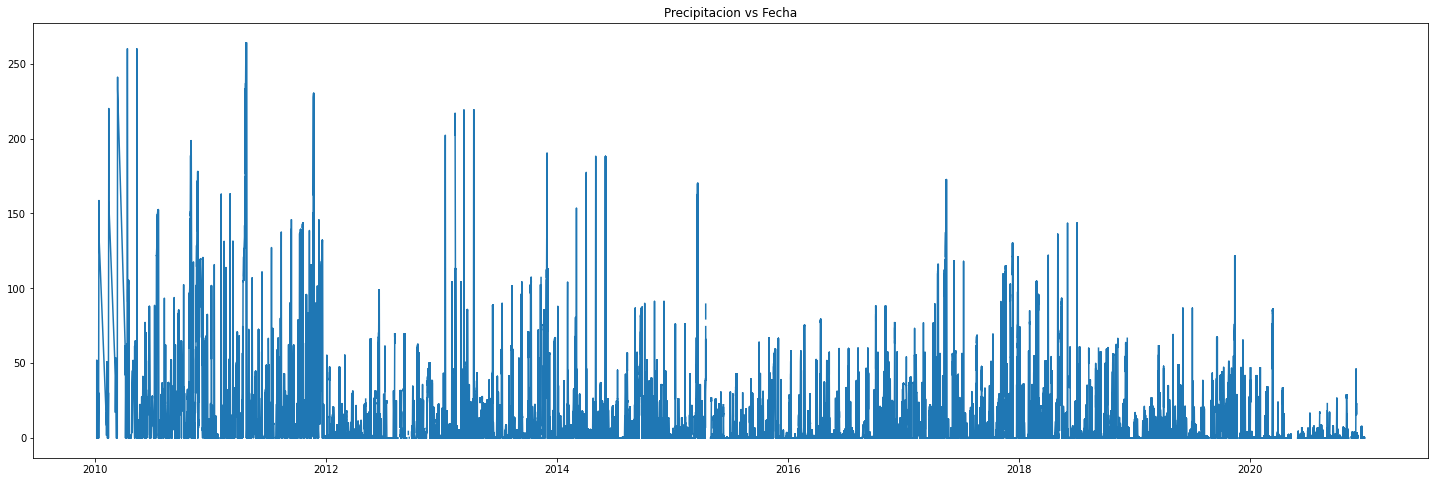

aranjuez


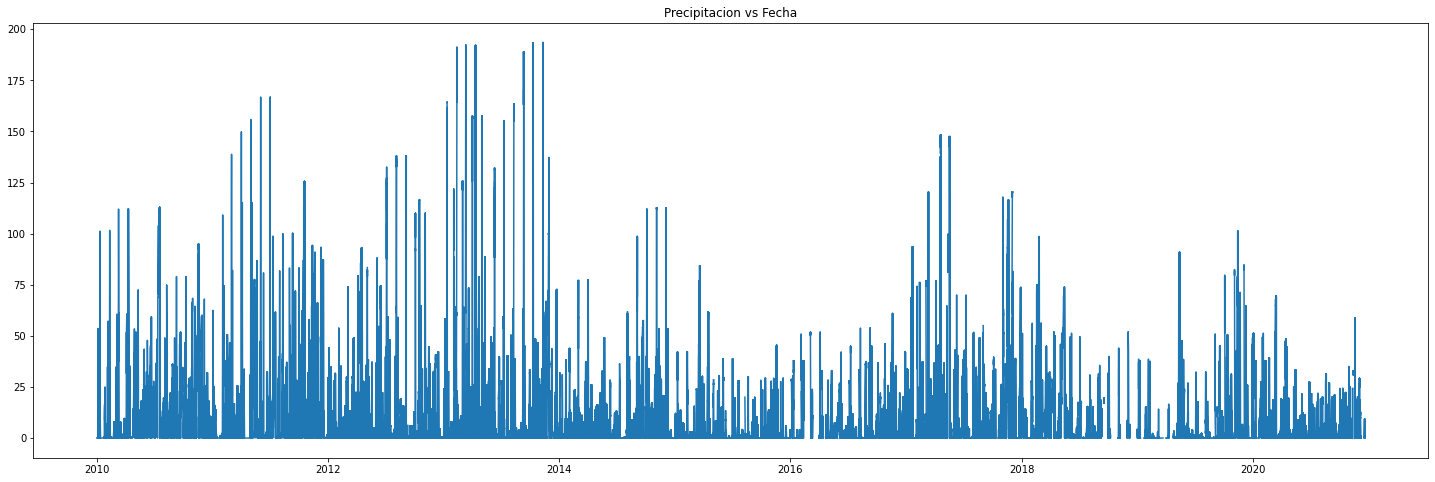

bosques_del_norte


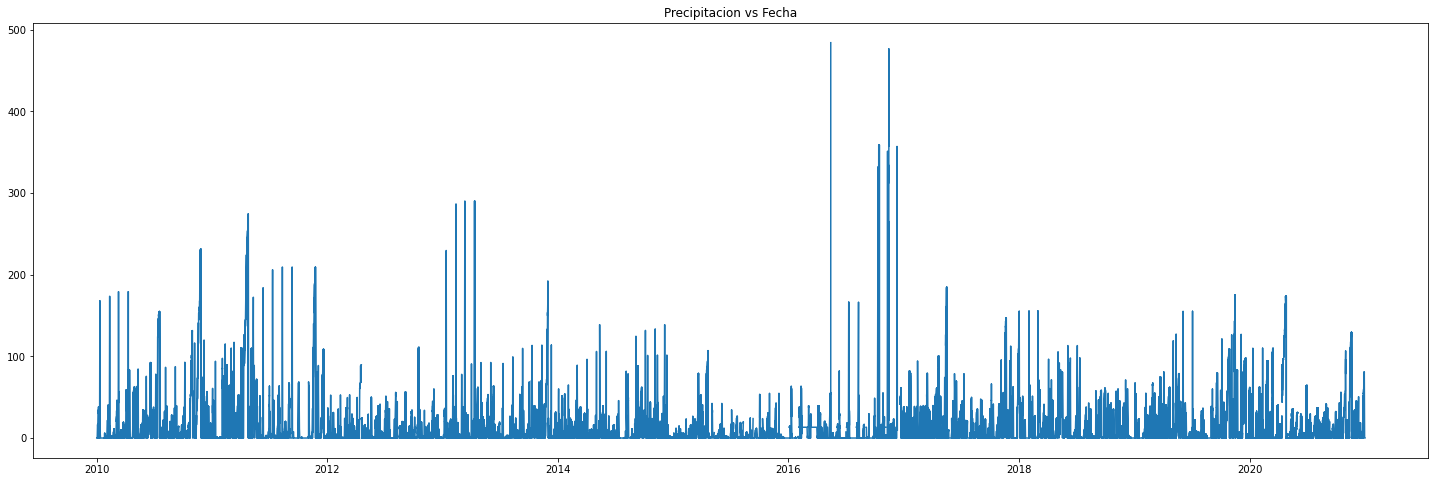

chec_uribe


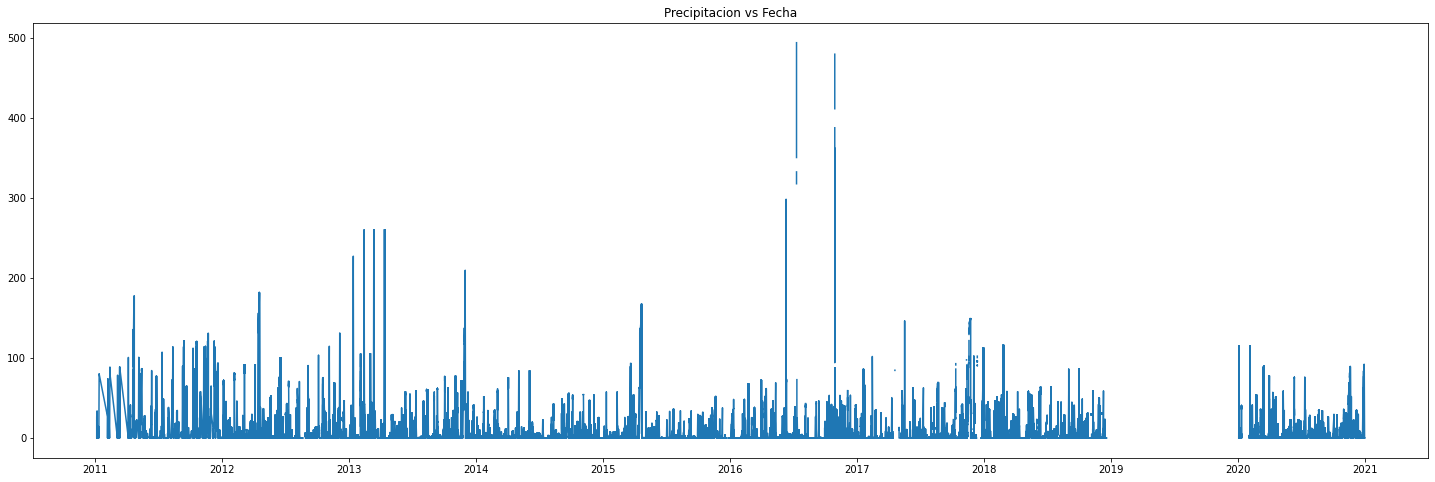

el_carmen


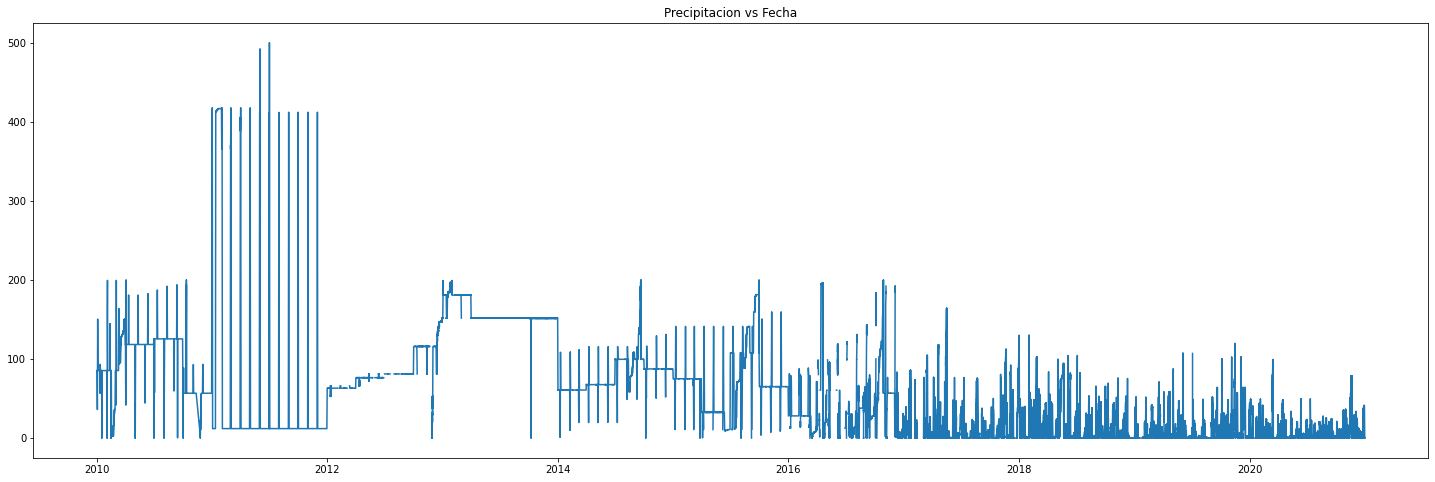

emas


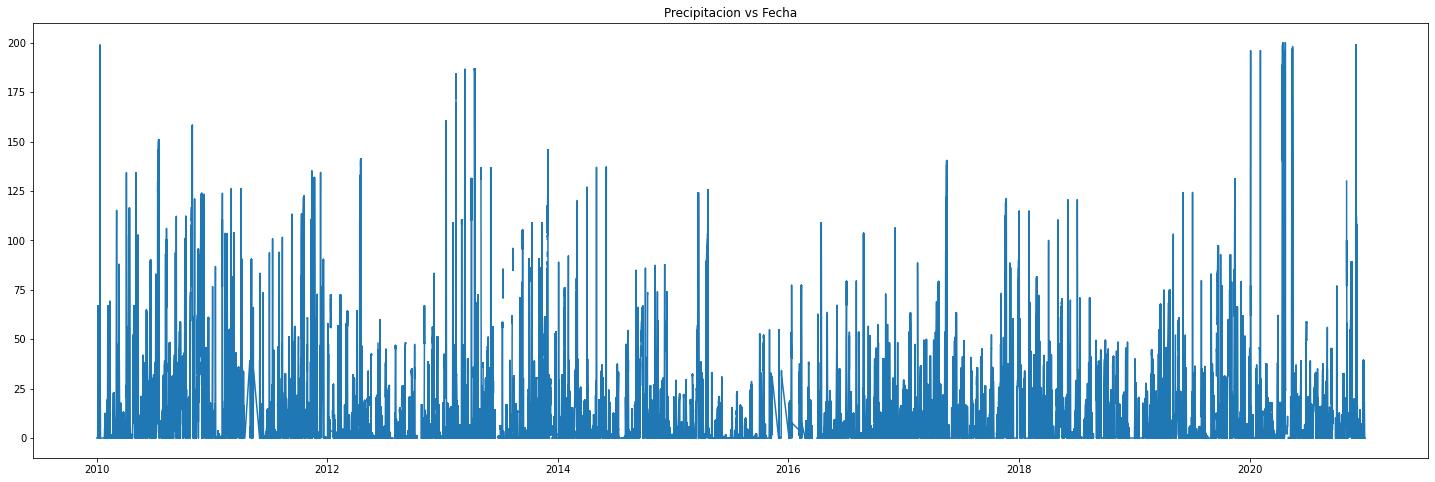

hospital_caldas


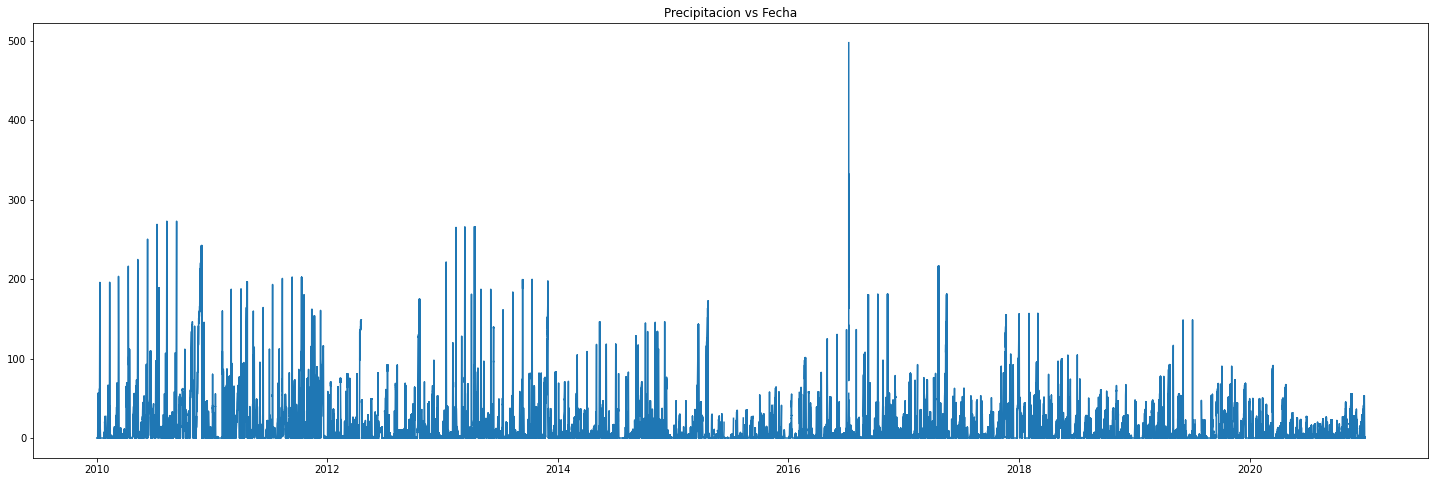

la_nubia


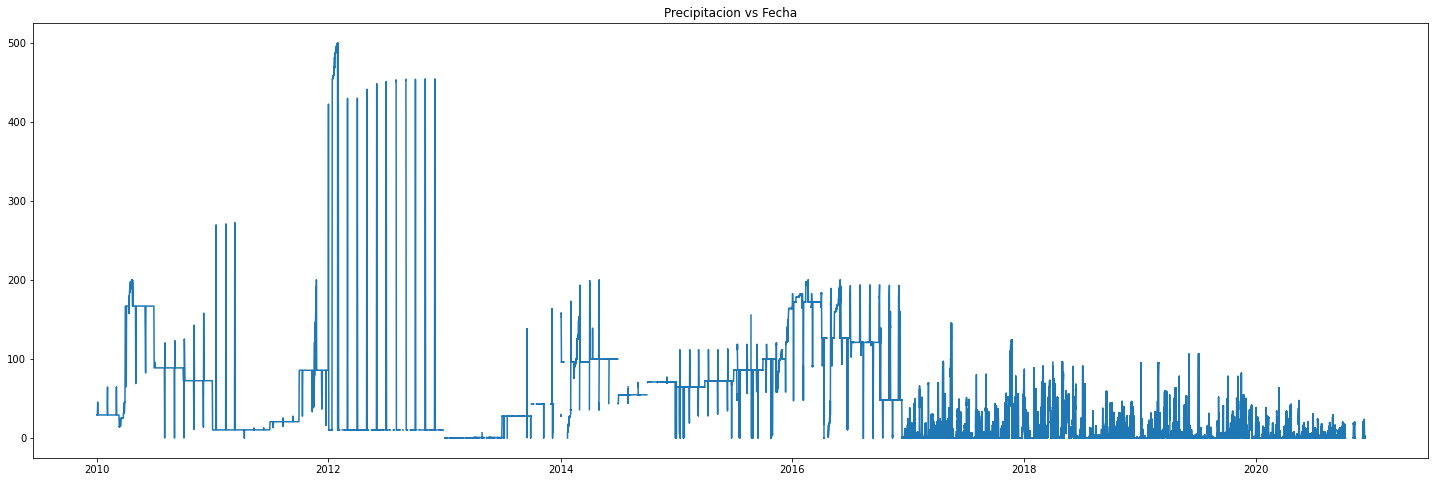

la_palma


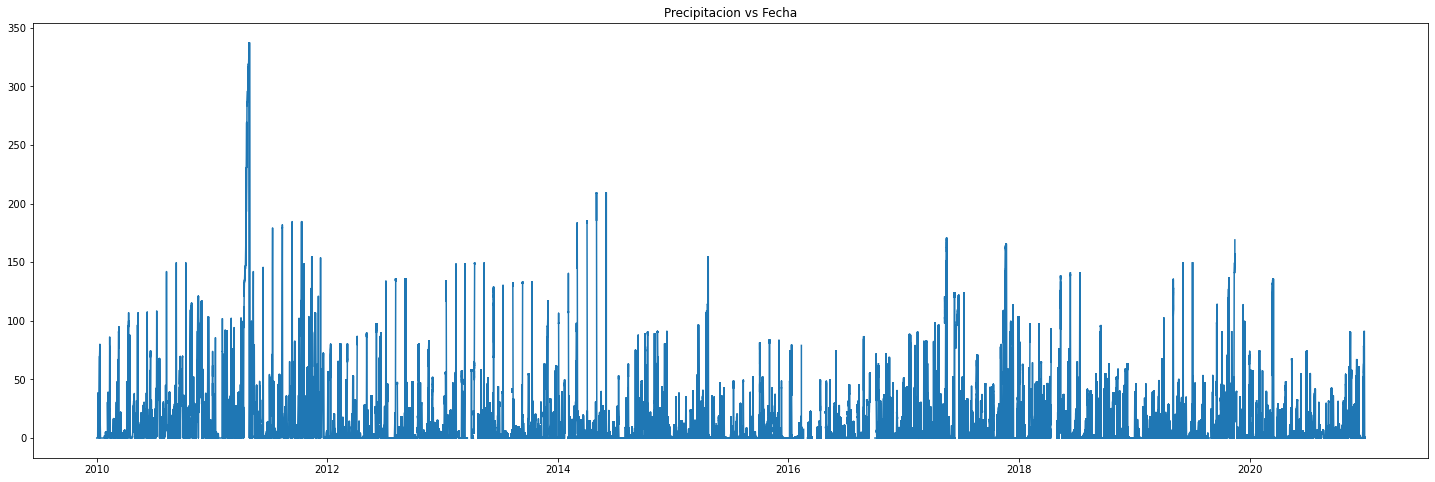

milan


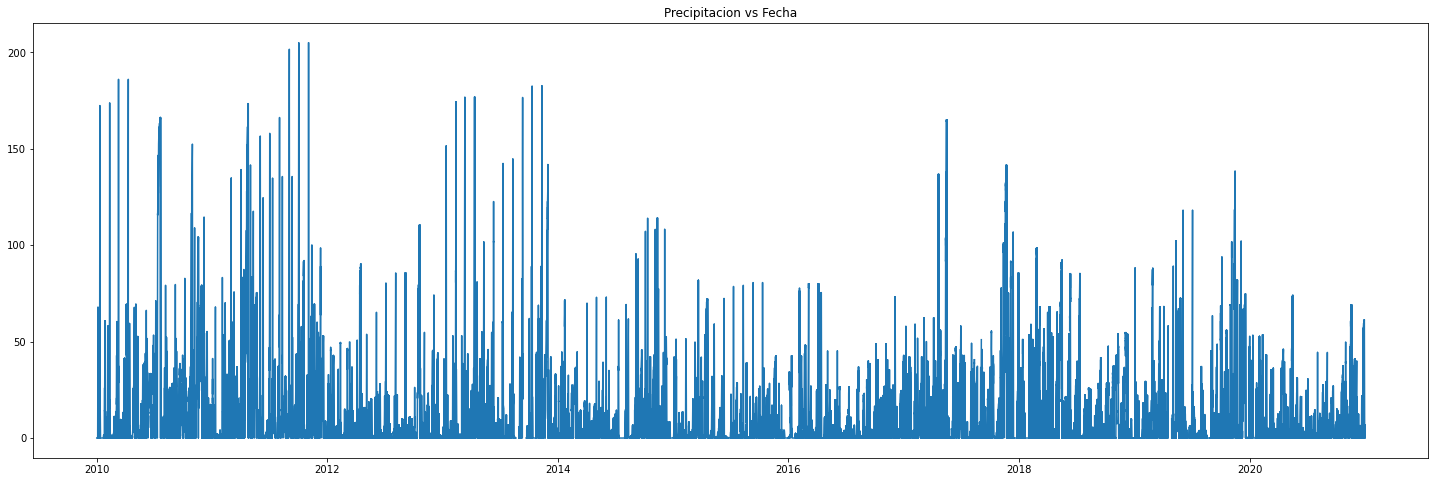

obs_vulcanologico


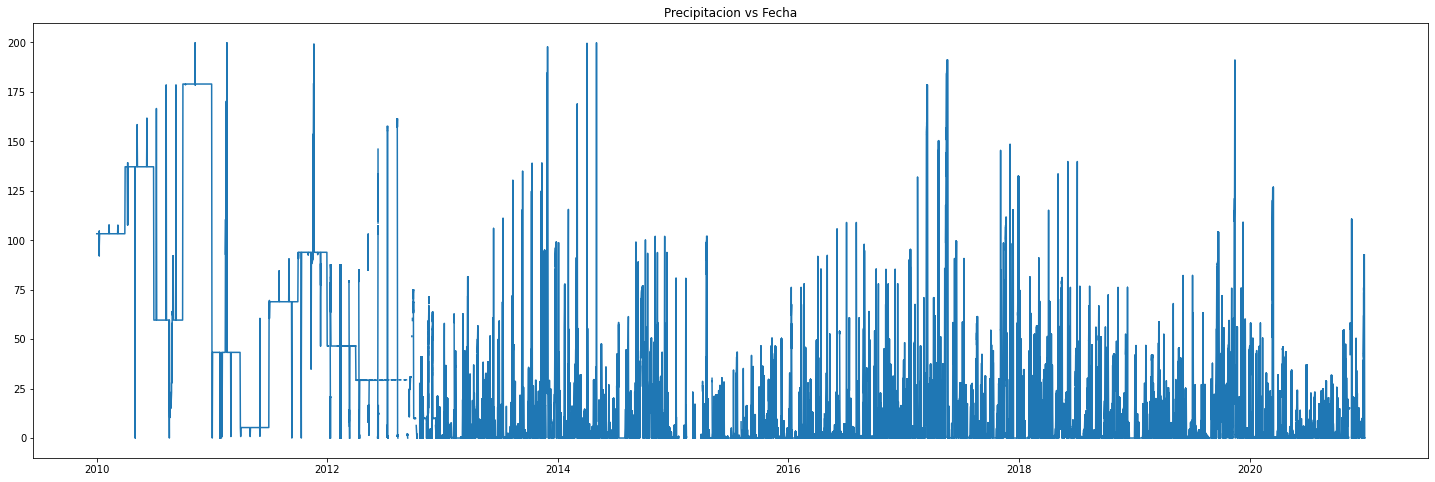

palogrande


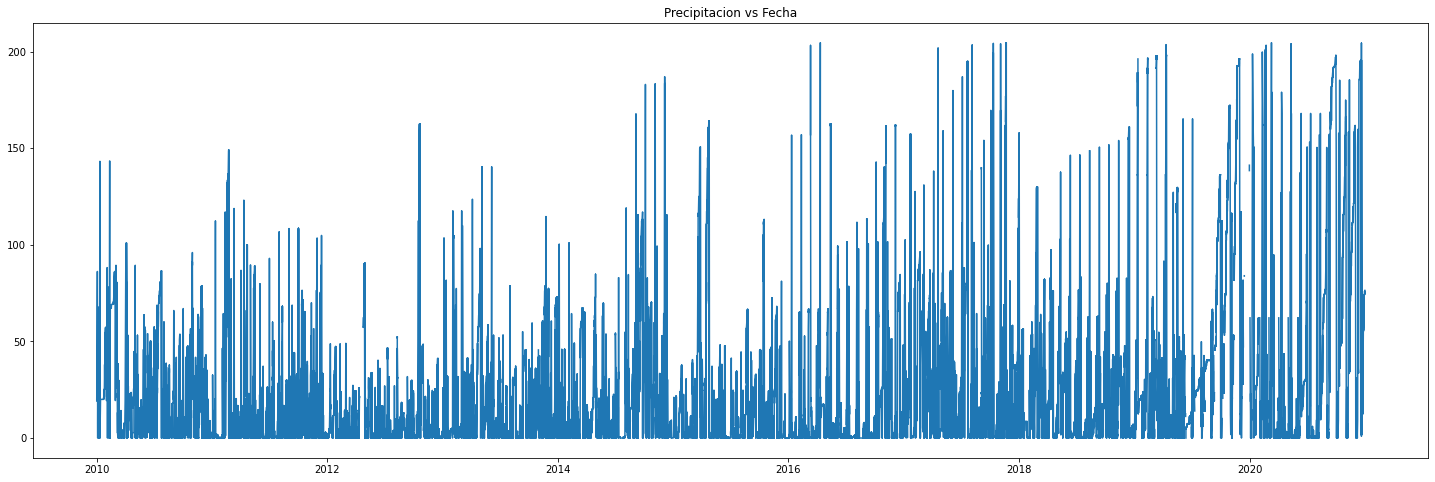

posgrados


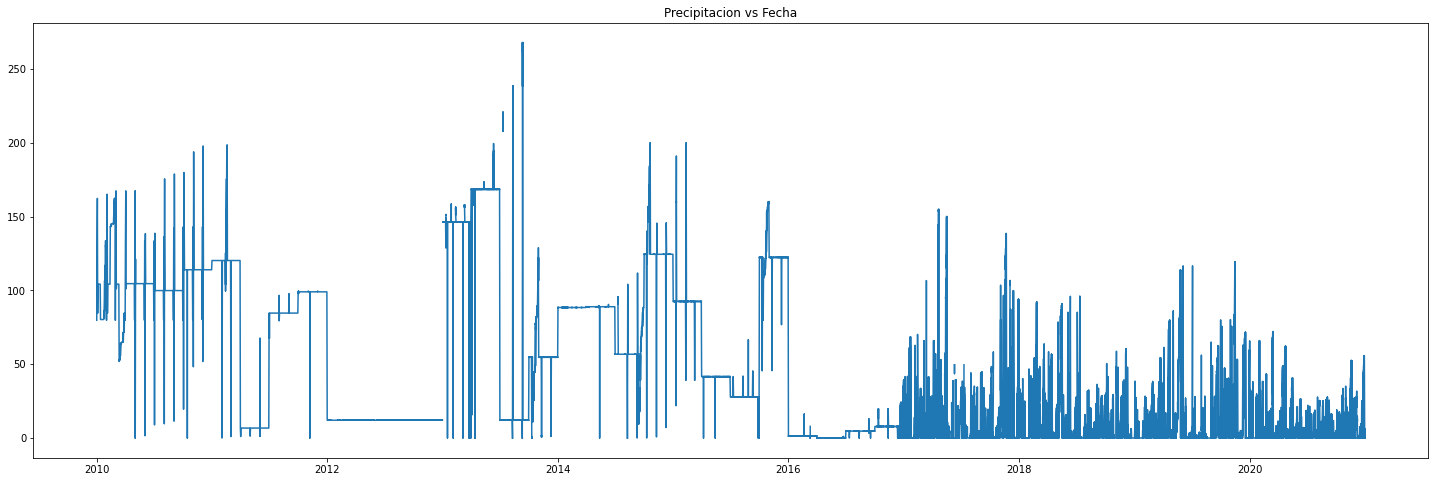

yarumos


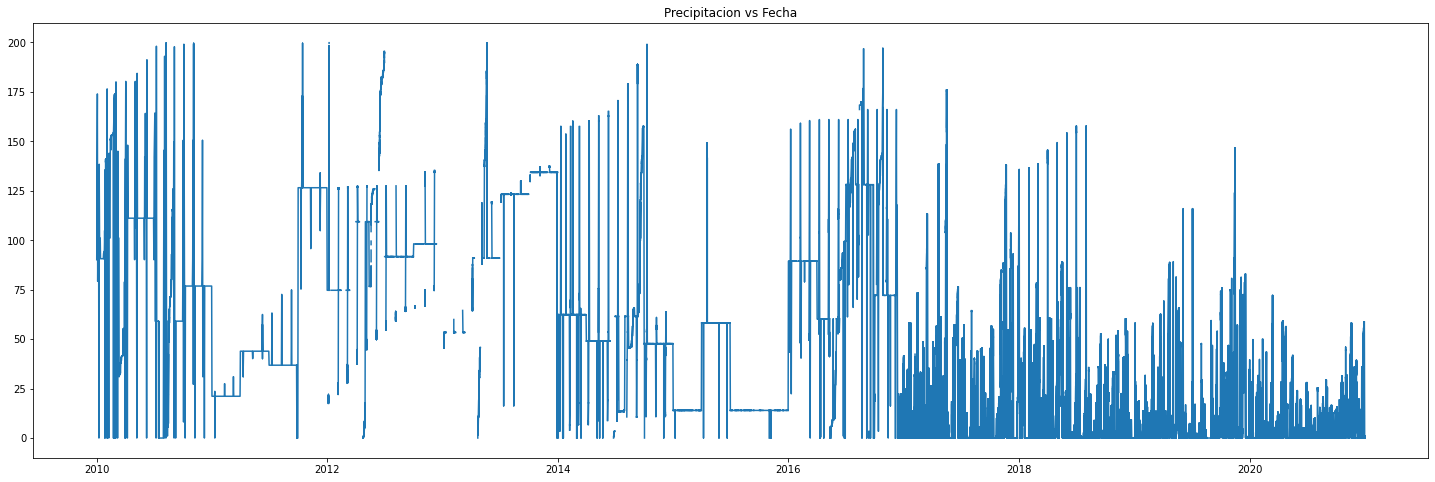

In [90]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Precipitacion"])
    plt.title("Precipitacion vs Fecha") 
    plt.show()

## Velocidad

alcazares


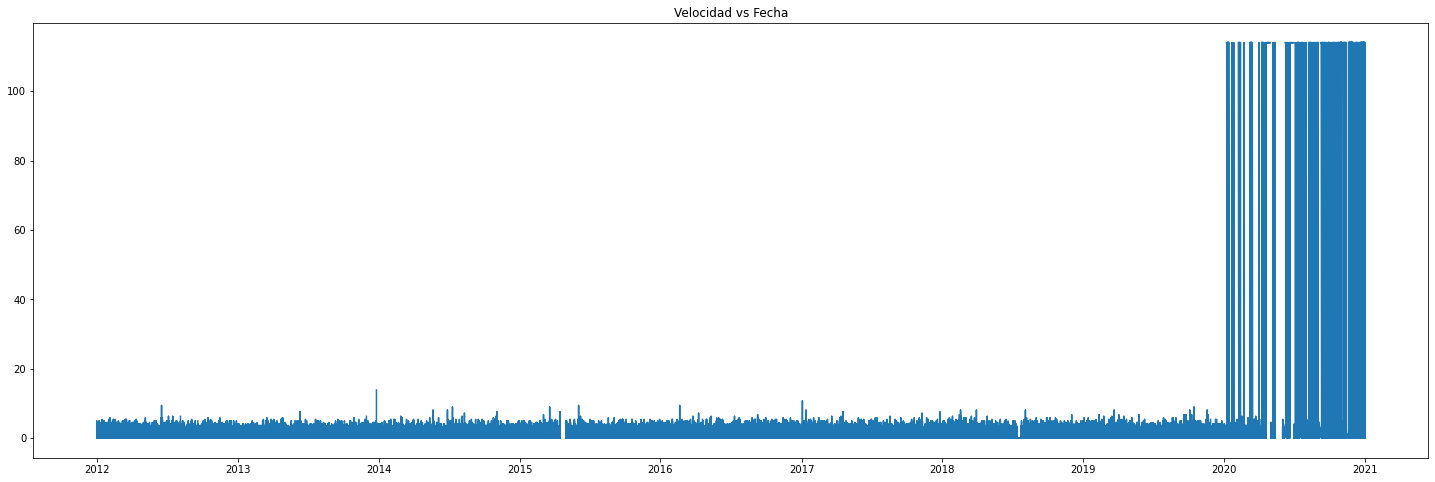

aranjuez


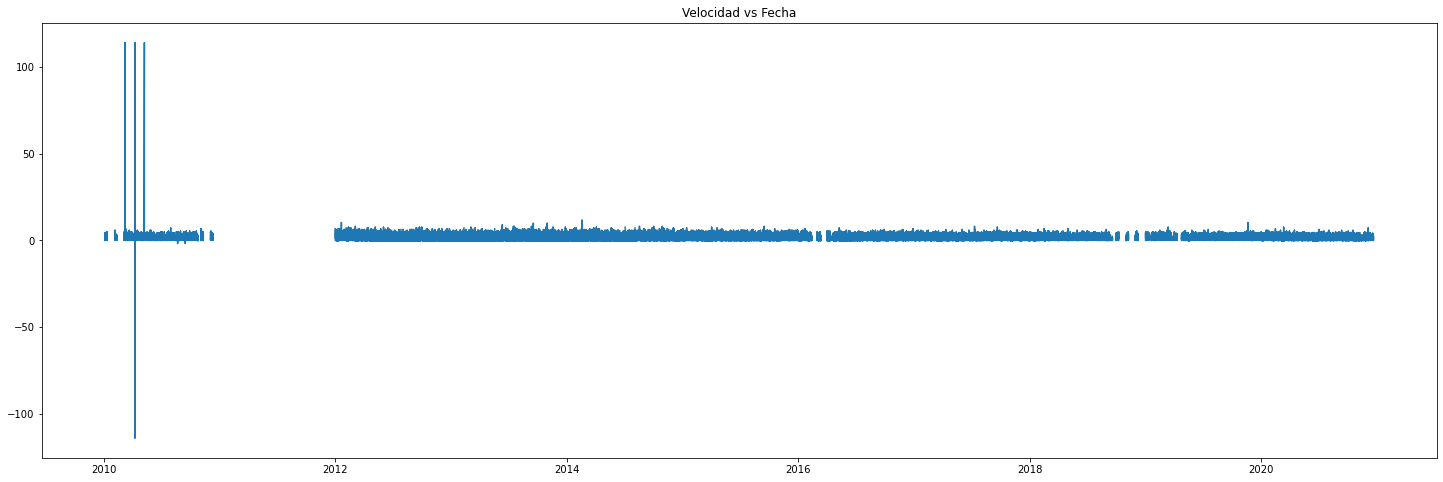

bosques_del_norte


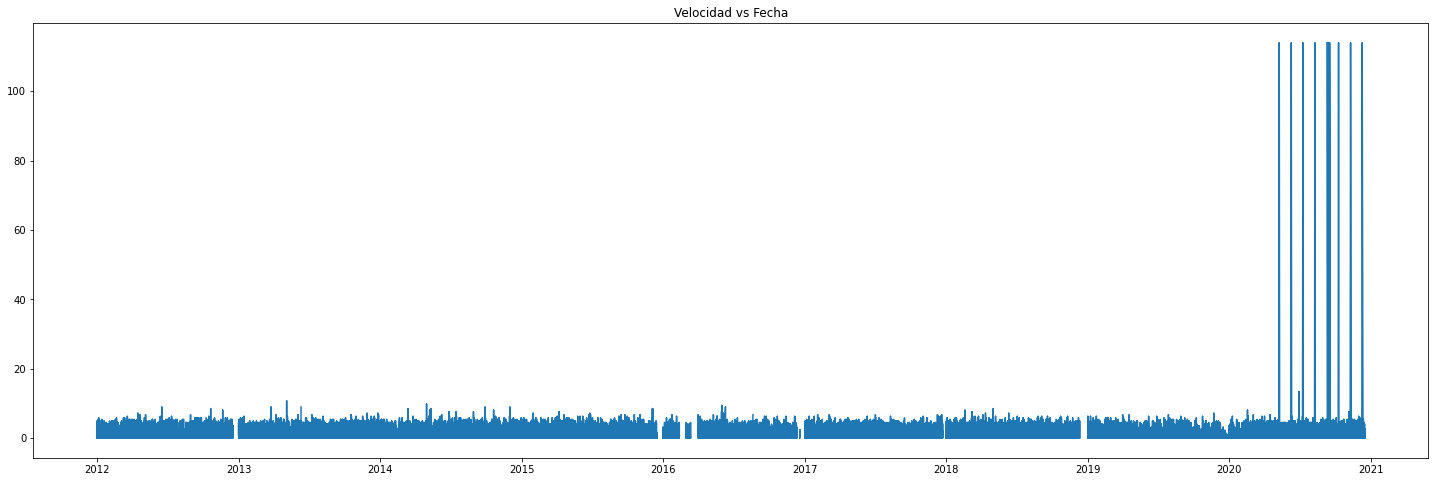

chec_uribe


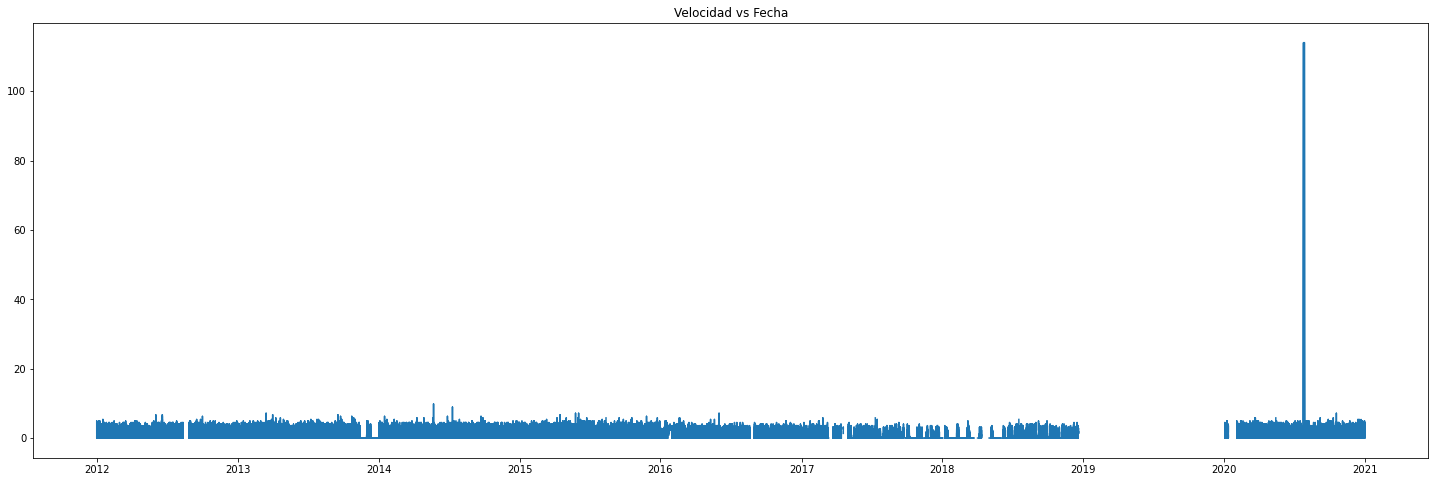

el_carmen


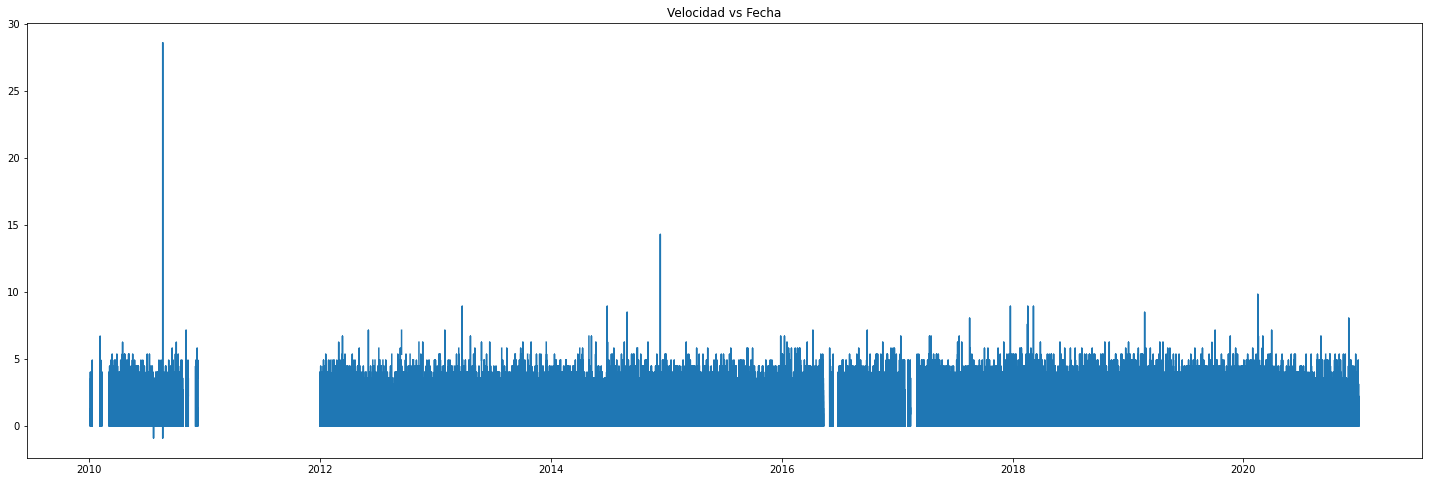

emas


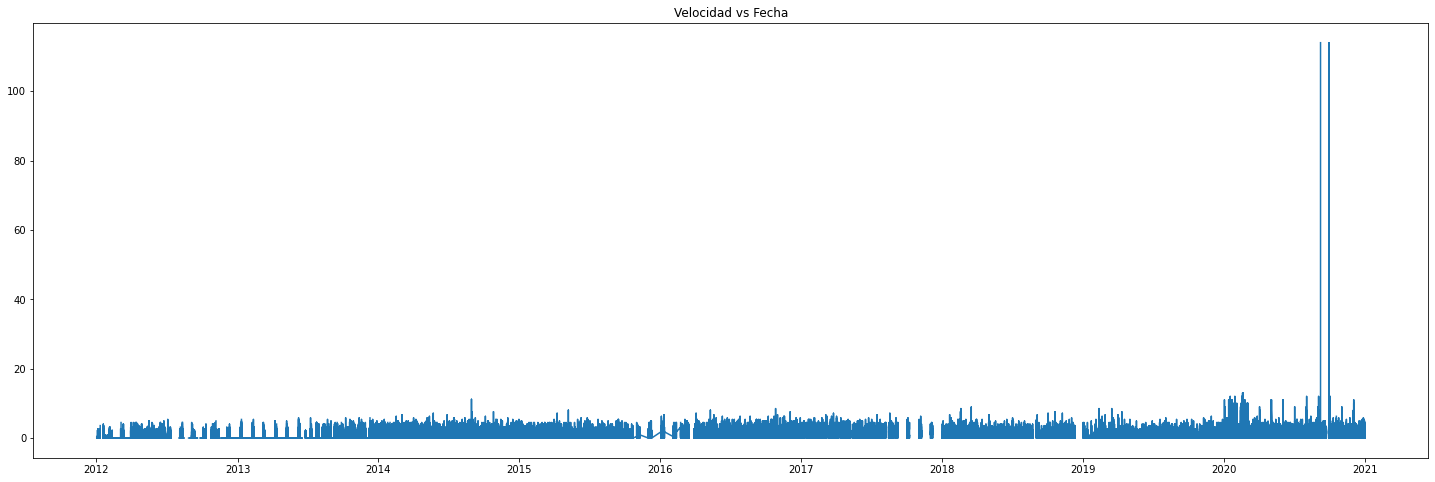

hospital_caldas


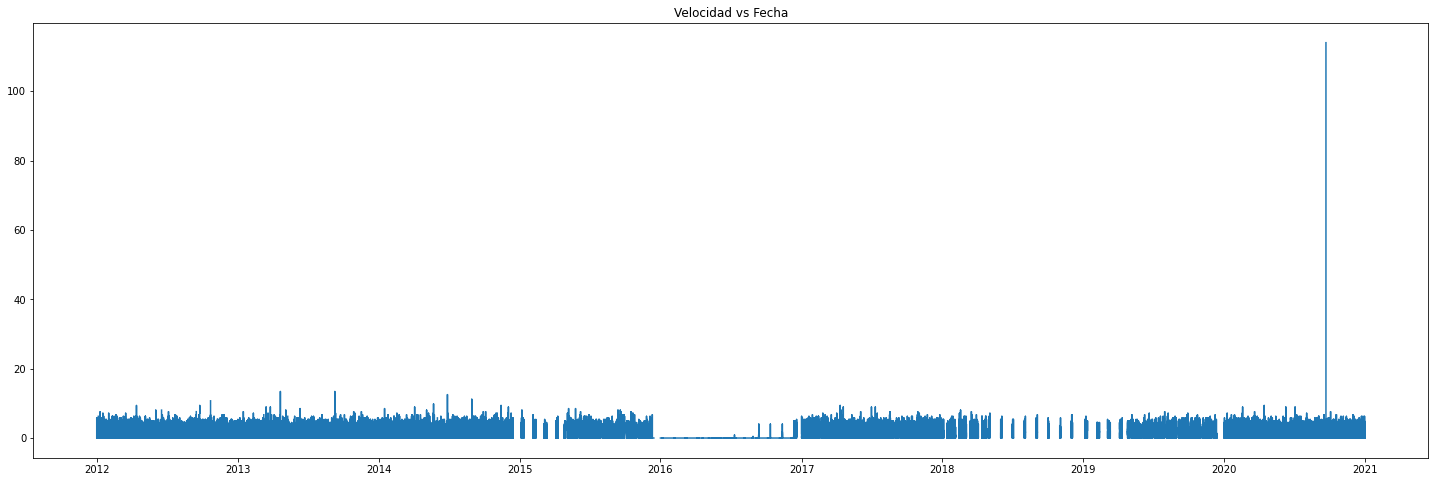

la_nubia


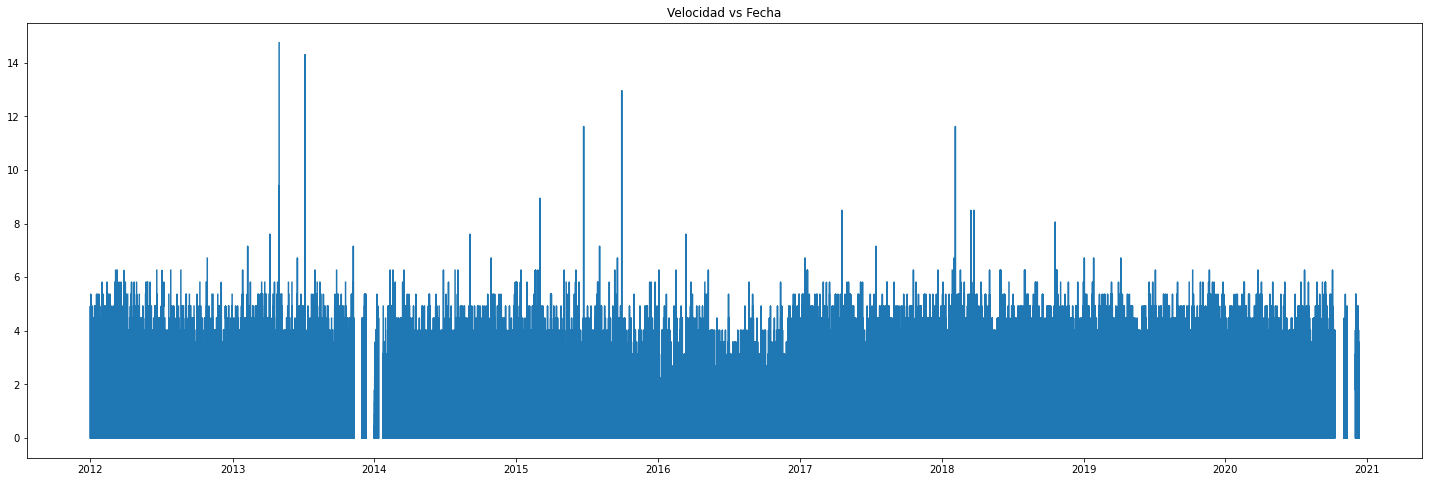

la_palma


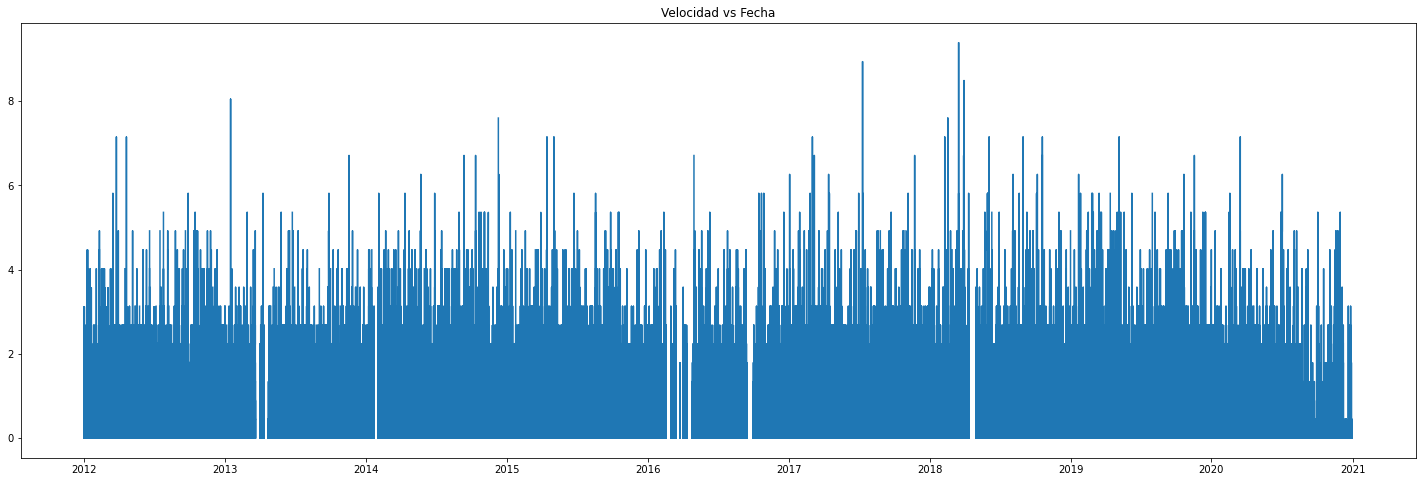

milan


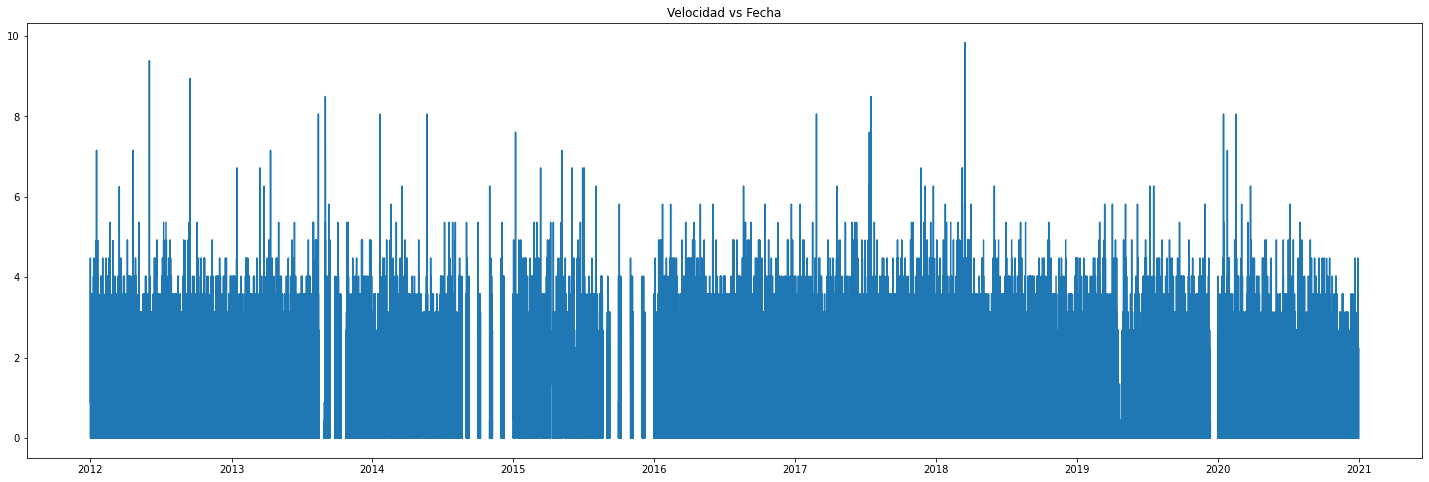

obs_vulcanologico


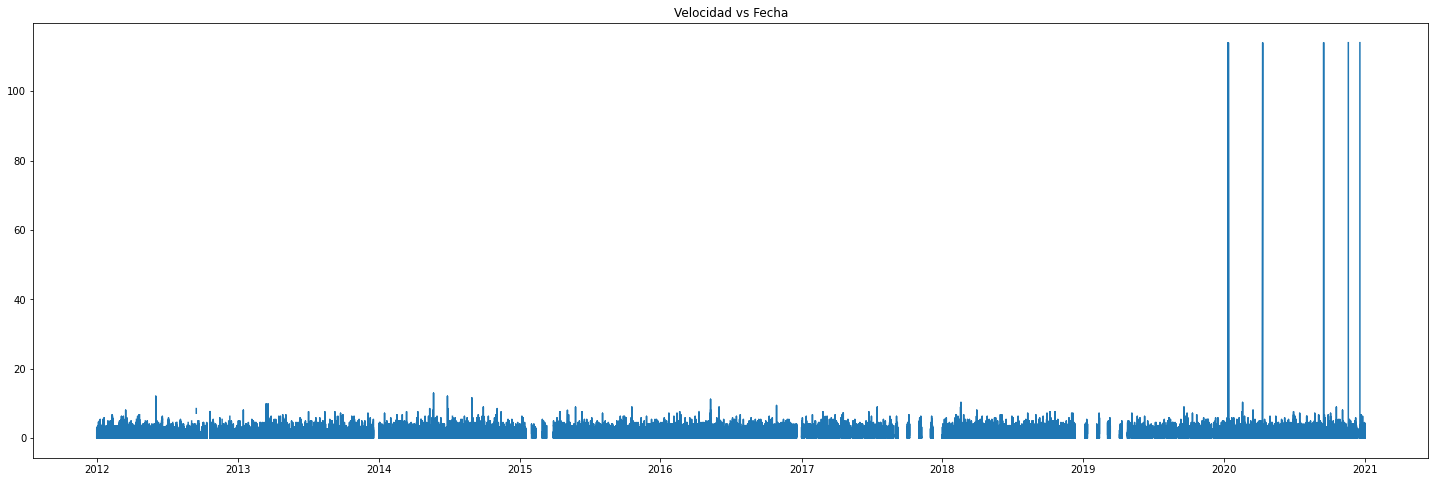

palogrande


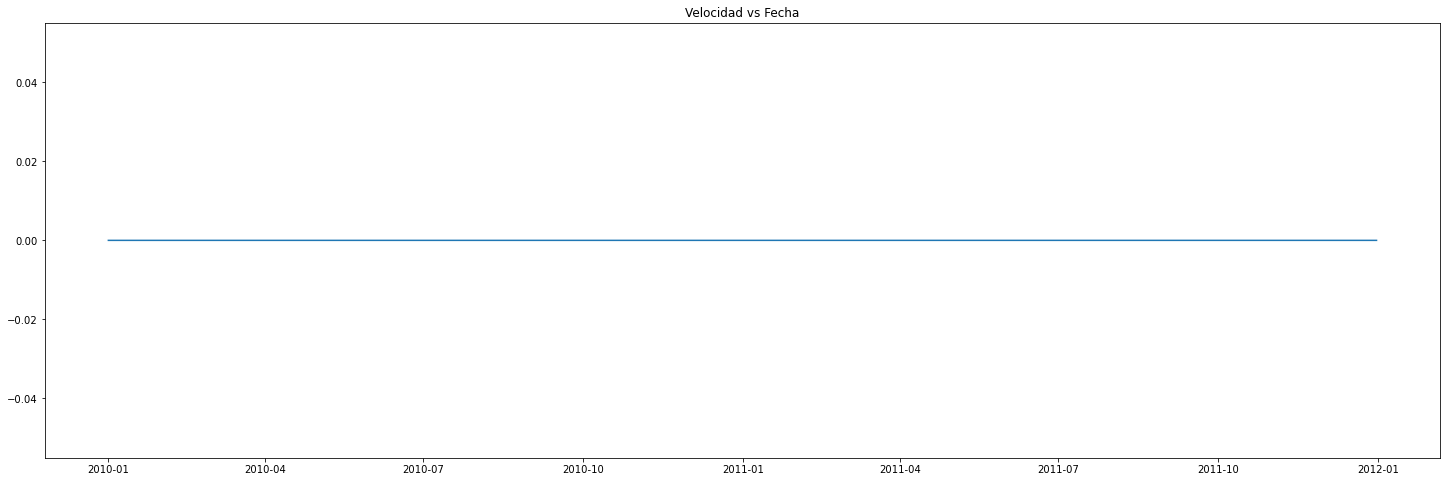

posgrados


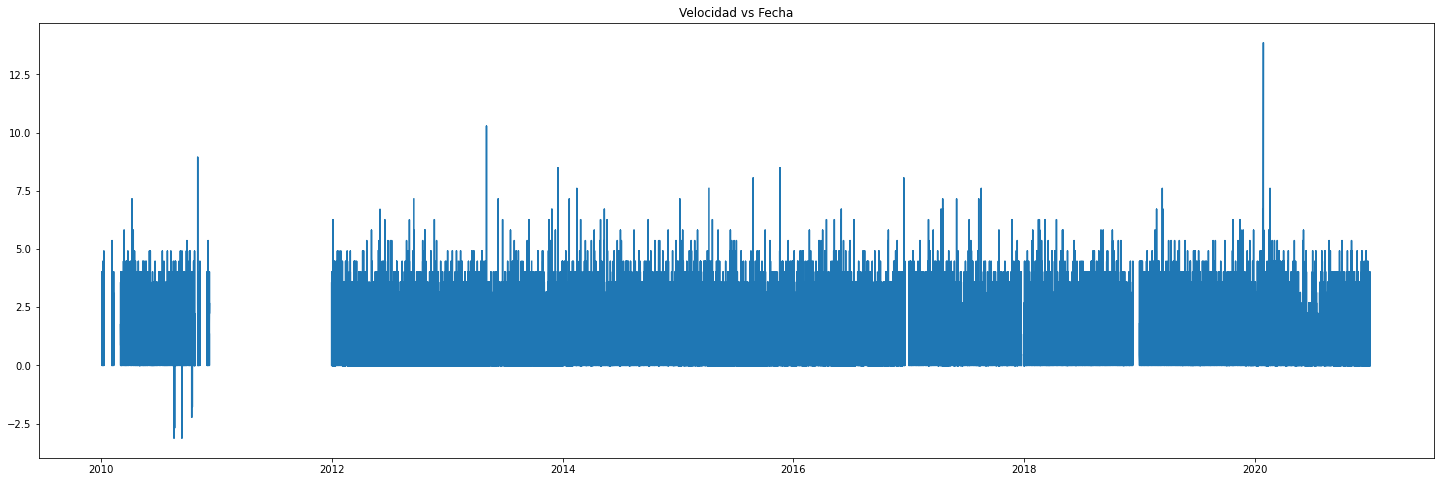

yarumos


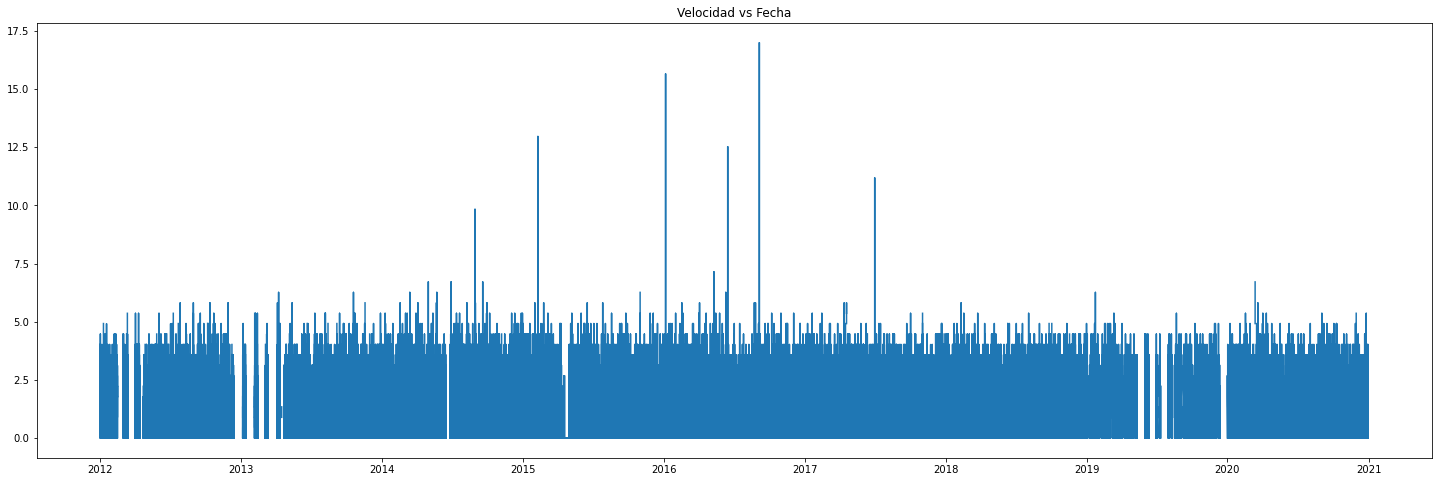

In [25]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Velocidad"])
    plt.title("Velocidad vs Fecha") 
    plt.show()

In [18]:
for i in datasets:
    i.drop(i.loc[i.Velocidad < 0].index, inplace = True)  

Estacion alcazares


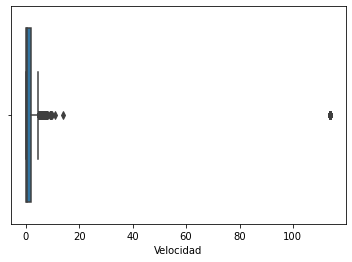

Estacion aranjuez


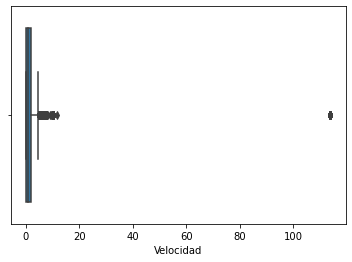

Estacion bosques_del_norte


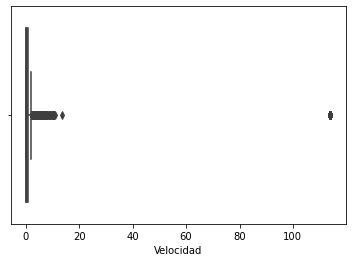

Estacion chec_uribe


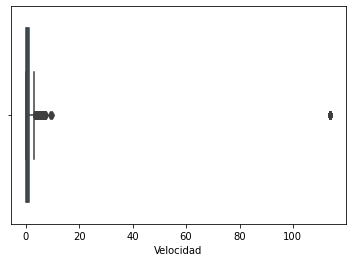

Estacion el_carmen


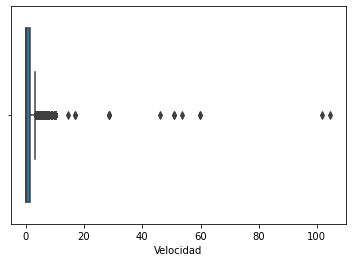

Estacion emas


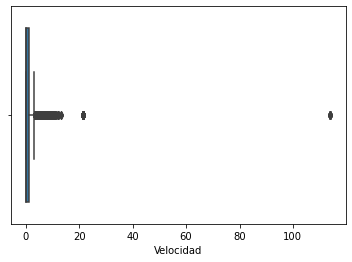

Estacion hospital_caldas


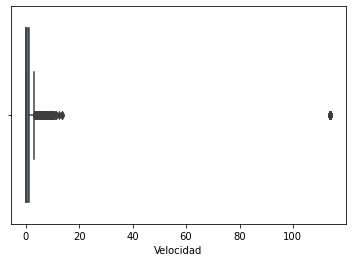

Estacion la_nubia


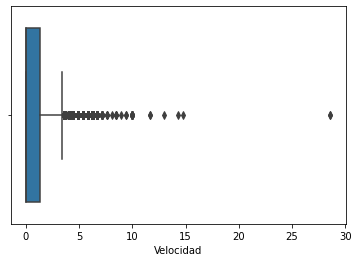

Estacion la_palma


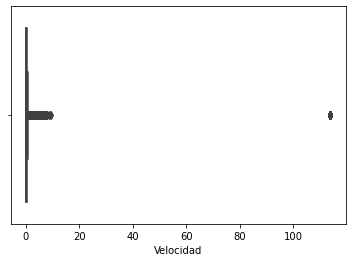

Estacion milan


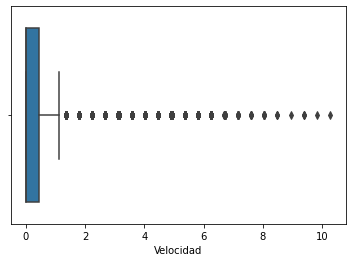

Estacion obs_vulcanologico


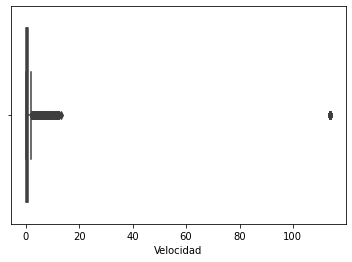

Estacion palogrande


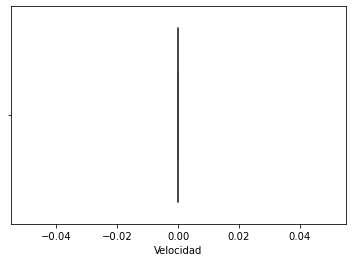

Estacion posgrados


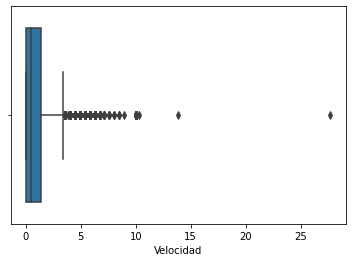

Estacion yarumos


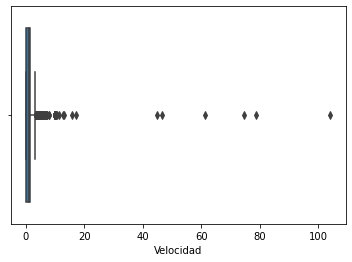

In [160]:
for i in datasets:
    print("Estacion", i.Estacion[0])
    sns.boxplot(x ='Velocidad', data = i)
    plt.show() 
    

In [19]:
n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2010-01-01") & (i.Fecha < "2010-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2010-01-01") & (i.Fecha <= "2010-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2010-04-01") & (i.Fecha < "2010-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2010-04-01") & (i.Fecha <= "2010-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2010-07-01") & (i.Fecha < "2010-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2010-07-01") & (i.Fecha <= "2010-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2010-10-01") & (i.Fecha < "2010-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2010-10-01") & (i.Fecha <= "2010-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])    
    

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2011-01-01") & (i.Fecha < "2011-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2011-01-01") & (i.Fecha <= "2011-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2011-04-01") & (i.Fecha < "2011-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2011-04-01") & (i.Fecha <= "2011-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2011-07-01") & (i.Fecha < "2011-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2011-07-01") & (i.Fecha <= "2011-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2011-10-01") & (i.Fecha < "2011-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2011-10-01") & (i.Fecha <= "2011-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])


n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2012-01-01") & (i.Fecha < "2012-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2012-01-01") & (i.Fecha <= "2012-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2012-04-01") & (i.Fecha < "2012-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2012-04-01") & (i.Fecha <= "2012-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2012-07-01") & (i.Fecha < "2012-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2012-07-01") & (i.Fecha <= "2012-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2012-10-01") & (i.Fecha < "2012-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2012-10-01") & (i.Fecha <= "2012-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2013-01-01") & (i.Fecha < "2013-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2013-01-01") & (i.Fecha <= "2013-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2013-04-01") & (i.Fecha < "2013-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2013-04-01") & (i.Fecha <= "2013-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2013-07-01") & (i.Fecha < "2013-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2013-07-01") & (i.Fecha <= "2013-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2013-10-01") & (i.Fecha < "2013-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2013-10-01") & (i.Fecha <= "2013-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2014-01-01") & (i.Fecha < "2014-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2014-01-01") & (i.Fecha <= "2014-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2014-04-01") & (i.Fecha < "2014-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2014-04-01") & (i.Fecha <= "2014-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2014-07-01") & (i.Fecha < "2014-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2014-07-01") & (i.Fecha <= "2014-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2014-10-01") & (i.Fecha < "2014-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2014-10-01") & (i.Fecha <= "2014-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2015-01-01") & (i.Fecha < "2015-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2015-01-01") & (i.Fecha <= "2015-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2015-04-01") & (i.Fecha < "2015-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2015-04-01") & (i.Fecha <= "2015-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2015-07-01") & (i.Fecha < "2015-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2015-07-01") & (i.Fecha <= "2015-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2015-10-01") & (i.Fecha < "2015-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2015-10-01") & (i.Fecha <= "2015-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2016-01-01") & (i.Fecha < "2016-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2016-01-01") & (i.Fecha <= "2016-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2016-04-01") & (i.Fecha < "2016-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2016-04-01") & (i.Fecha <= "2016-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2016-07-01") & (i.Fecha < "2016-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2016-07-01") & (i.Fecha <= "2016-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2016-10-01") & (i.Fecha < "2016-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2016-10-01") & (i.Fecha <= "2016-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2017-01-01") & (i.Fecha < "2017-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2017-01-01") & (i.Fecha <= "2017-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2017-04-01") & (i.Fecha < "2017-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2017-04-01") & (i.Fecha <= "2017-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2017-07-01") & (i.Fecha < "2017-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2017-07-01") & (i.Fecha <= "2017-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2017-10-01") & (i.Fecha < "2017-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2017-10-01") & (i.Fecha <= "2017-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])


n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2018-01-01") & (i.Fecha < "2018-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2018-01-01") & (i.Fecha <= "2018-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2018-04-01") & (i.Fecha < "2018-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2018-04-01") & (i.Fecha <= "2018-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2018-07-01") & (i.Fecha < "2018-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2018-07-01") & (i.Fecha <= "2018-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2018-10-01") & (i.Fecha < "2018-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2018-10-01") & (i.Fecha <= "2018-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2019-01-01") & (i.Fecha < "2019-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2019-01-01") & (i.Fecha <= "2019-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2019-04-01") & (i.Fecha < "2019-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2019-04-01") & (i.Fecha <= "2019-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2019-07-01") & (i.Fecha < "2019-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2019-07-01") & (i.Fecha <= "2019-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2019-10-01") & (i.Fecha < "2019-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2019-10-01") & (i.Fecha <= "2019-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

n = 32.6
for i in datasets: 
    promedio = i[(i.Fecha > "2020-01-01") & (i.Fecha < "2020-03-31") & (i.Velocidad <= n)].Velocidad.mean()  
    i["Velocidad"] = np.where((i.Fecha >= "2020-01-01") & (i.Fecha <= "2020-03-31") & (i.Velocidad > n), promedio, i["Velocidad"])
    
    promedio2 = i[(i.Fecha > "2020-04-01") & (i.Fecha < "2020-06-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2020-04-01") & (i.Fecha <= "2020-06-30") & (i.Velocidad > n), promedio2, i["Velocidad"])
    
    promedio3 = i[(i.Fecha > "2020-07-01") & (i.Fecha < "2020-09-30") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2020-07-01") & (i.Fecha <= "2020-09-30") & (i.Velocidad > n), promedio3, i["Velocidad"])
    
    promedio4 = i[(i.Fecha > "2020-10-01") & (i.Fecha < "2020-12-31") & (i.Velocidad <= n)].Velocidad.mean()
    i["Velocidad"] = np.where((i.Fecha >= "2020-10-01") & (i.Fecha <= "2020-12-31") & (i.Velocidad > n), promedio4, i["Velocidad"])

alcazares


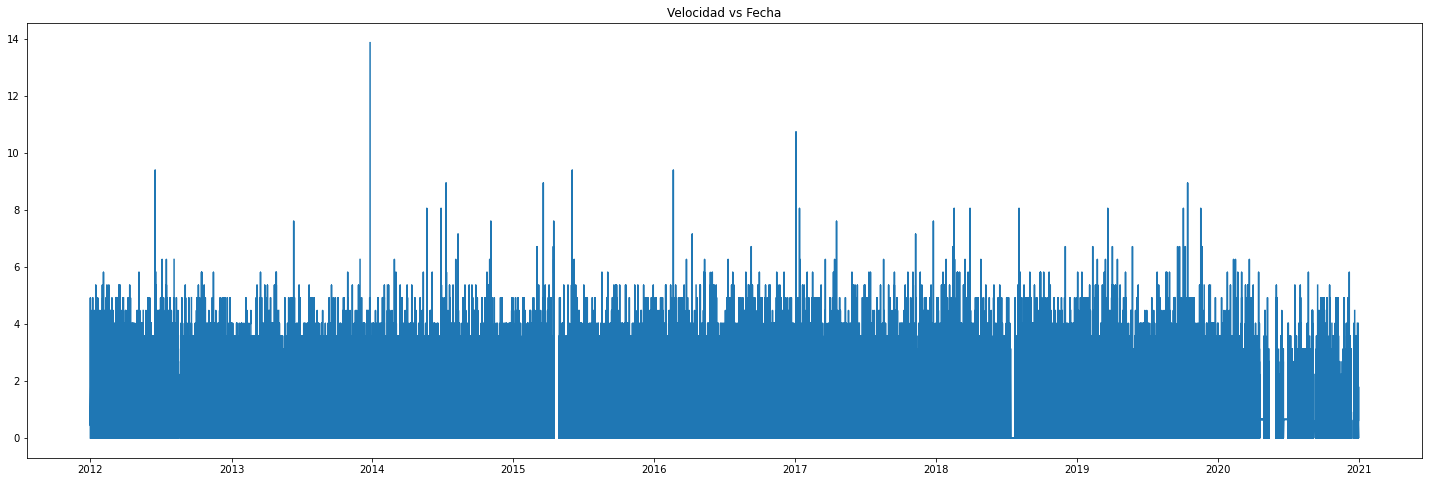

aranjuez


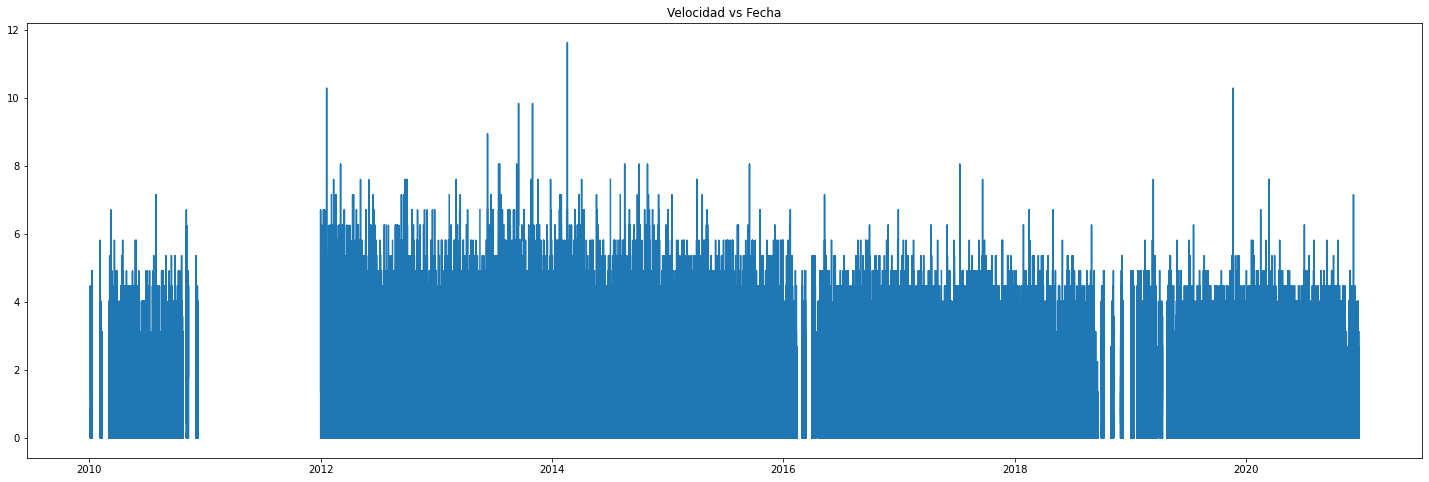

bosques_del_norte


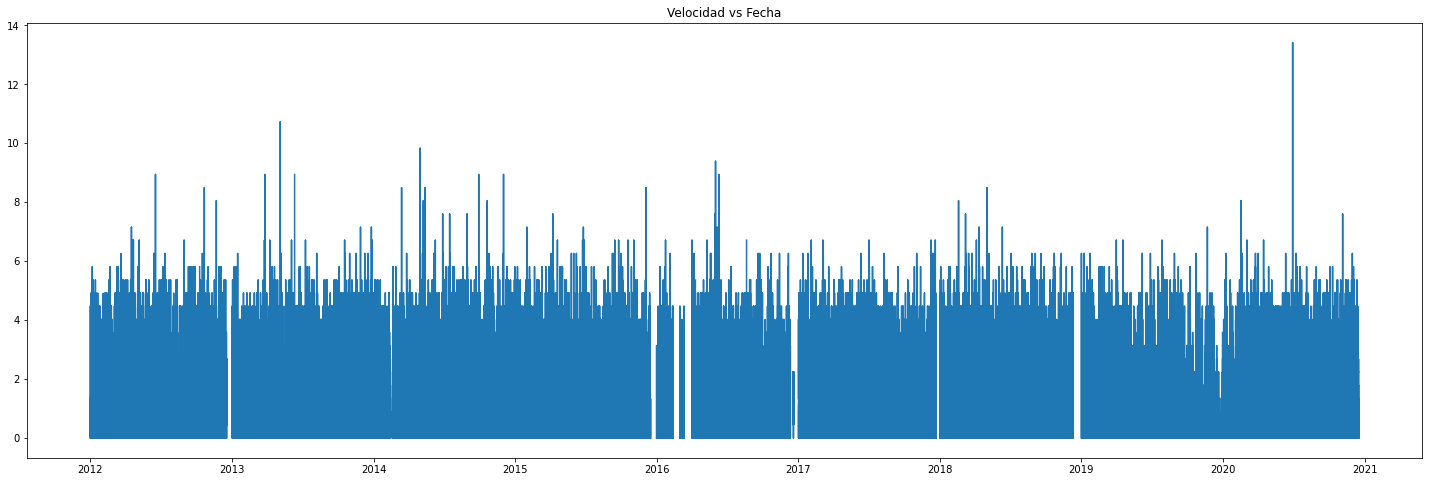

chec_uribe


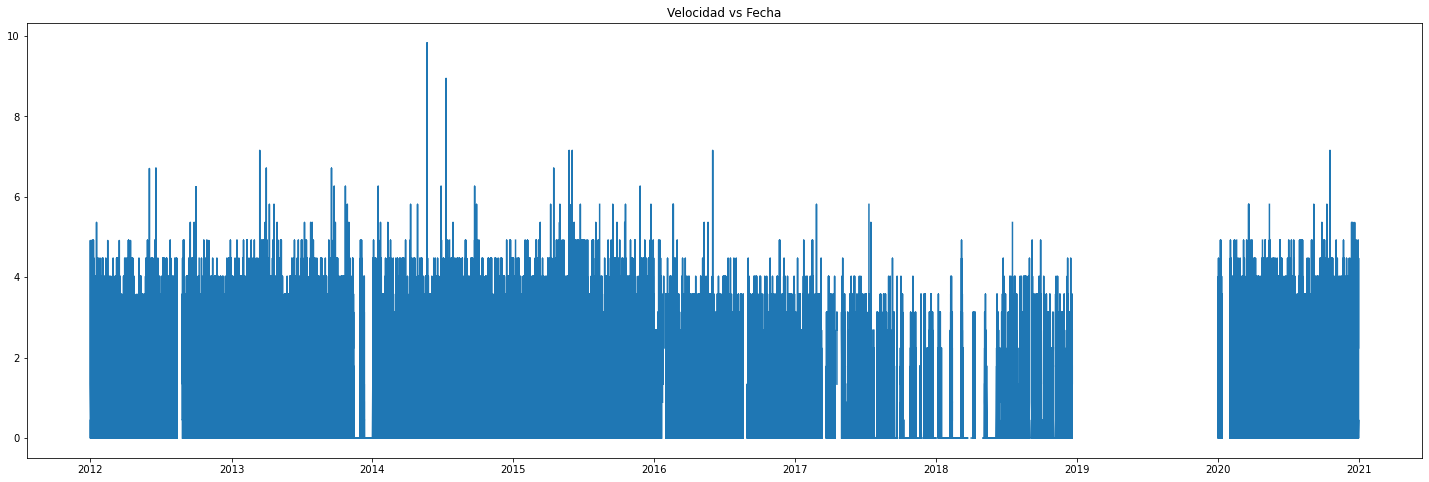

el_carmen


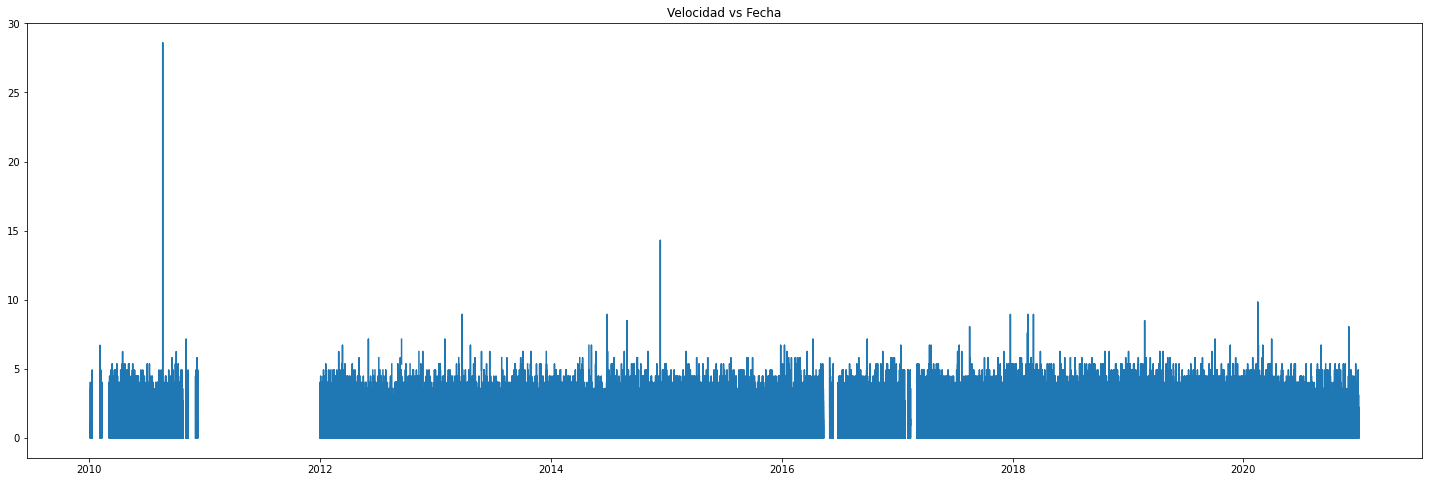

emas


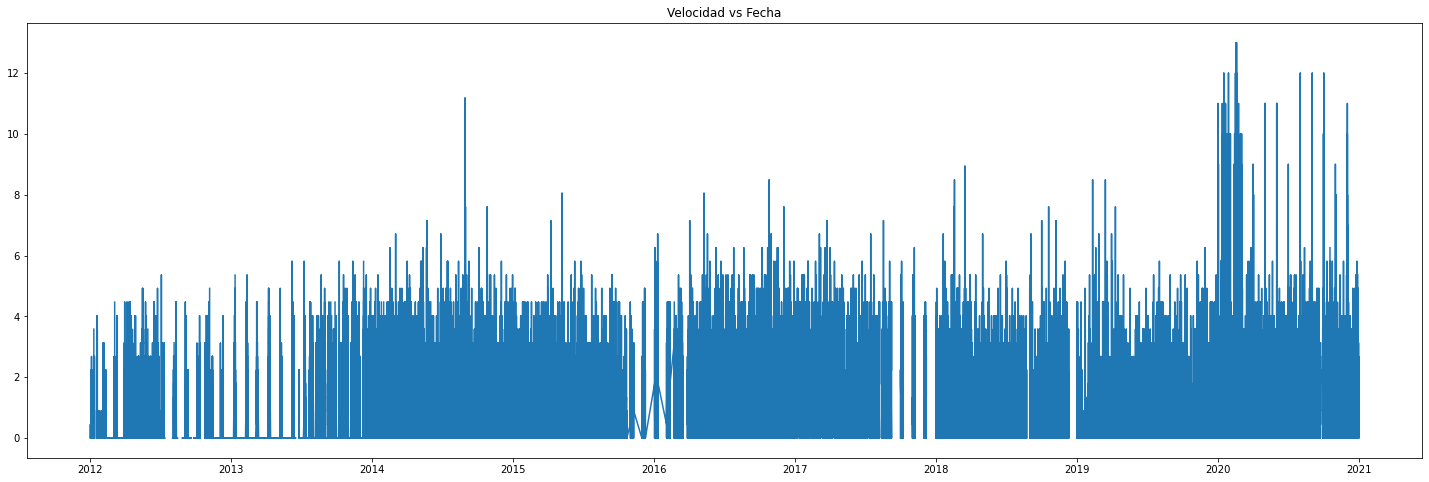

hospital_caldas


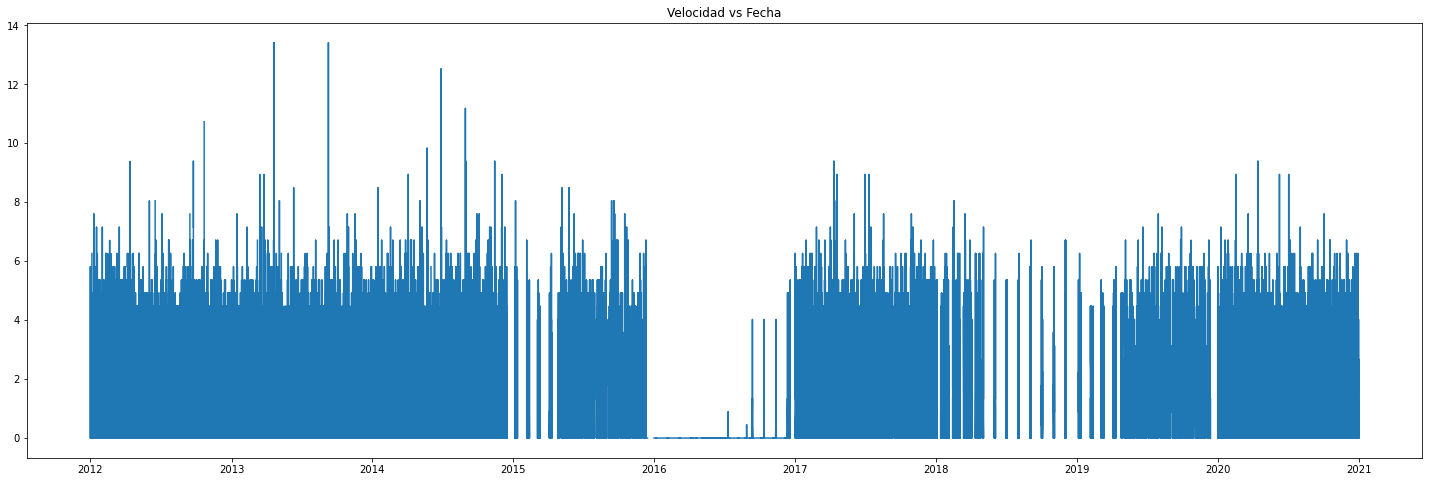

la_nubia


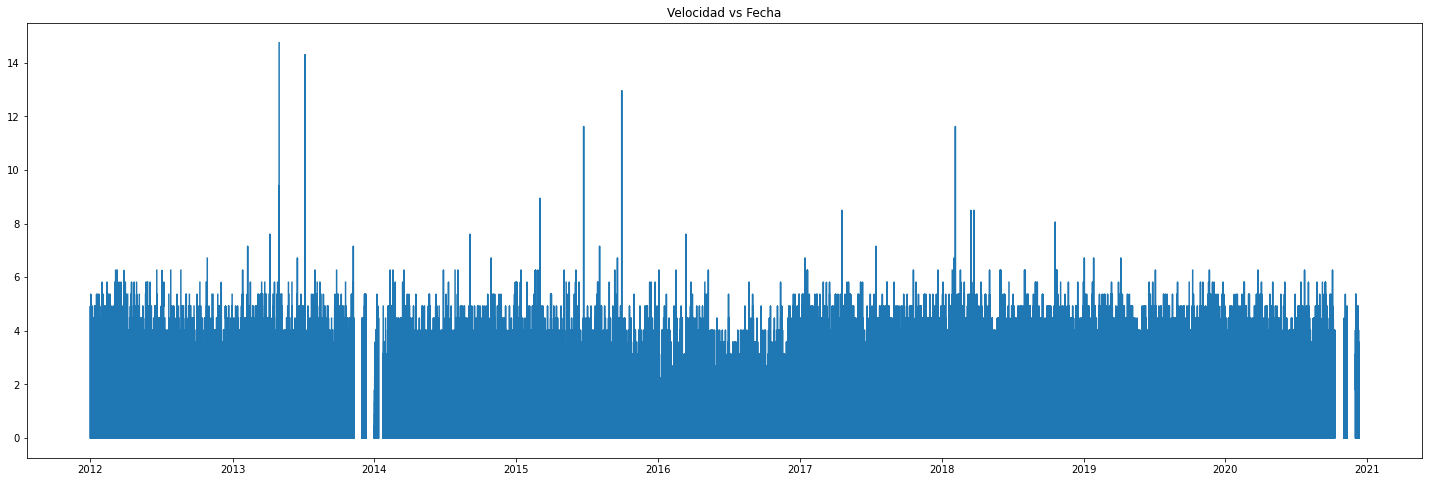

la_palma


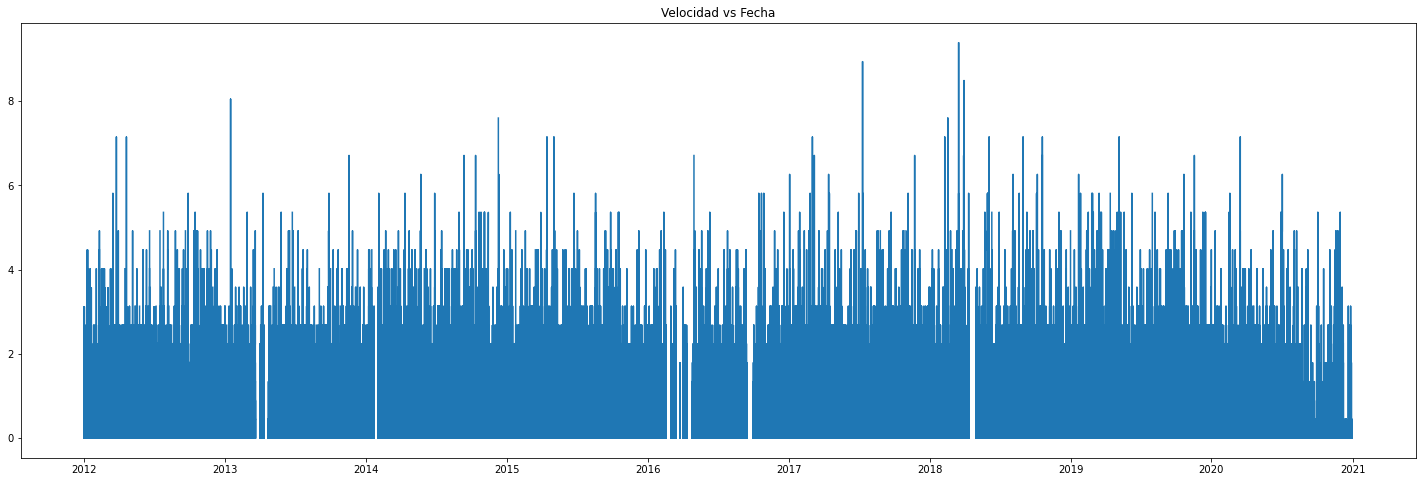

milan


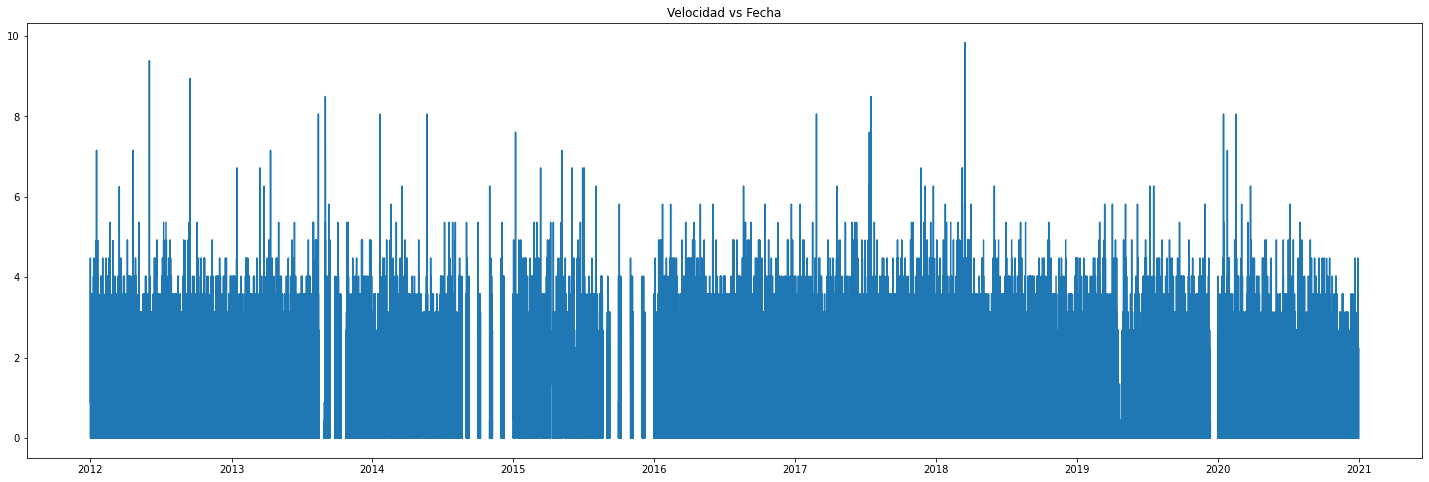

obs_vulcanologico


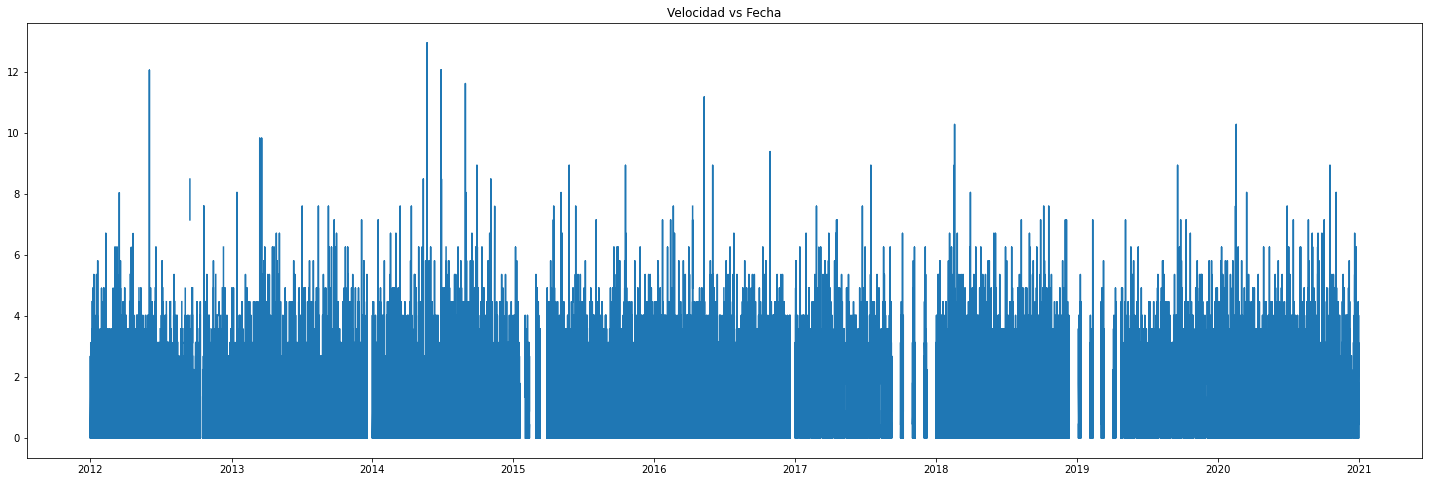

palogrande


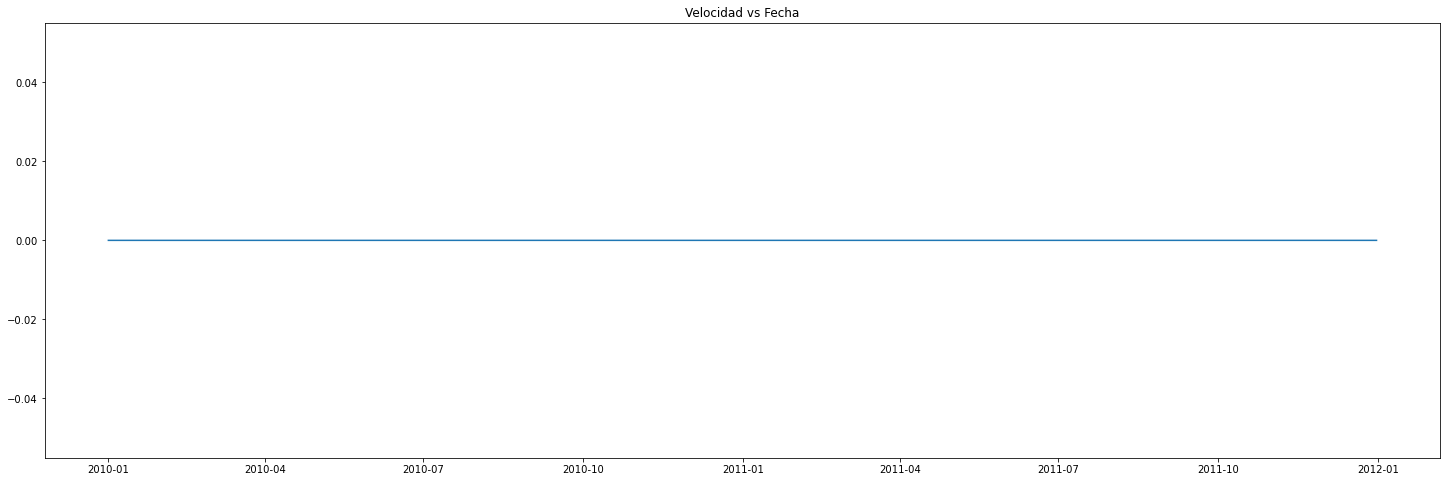

posgrados


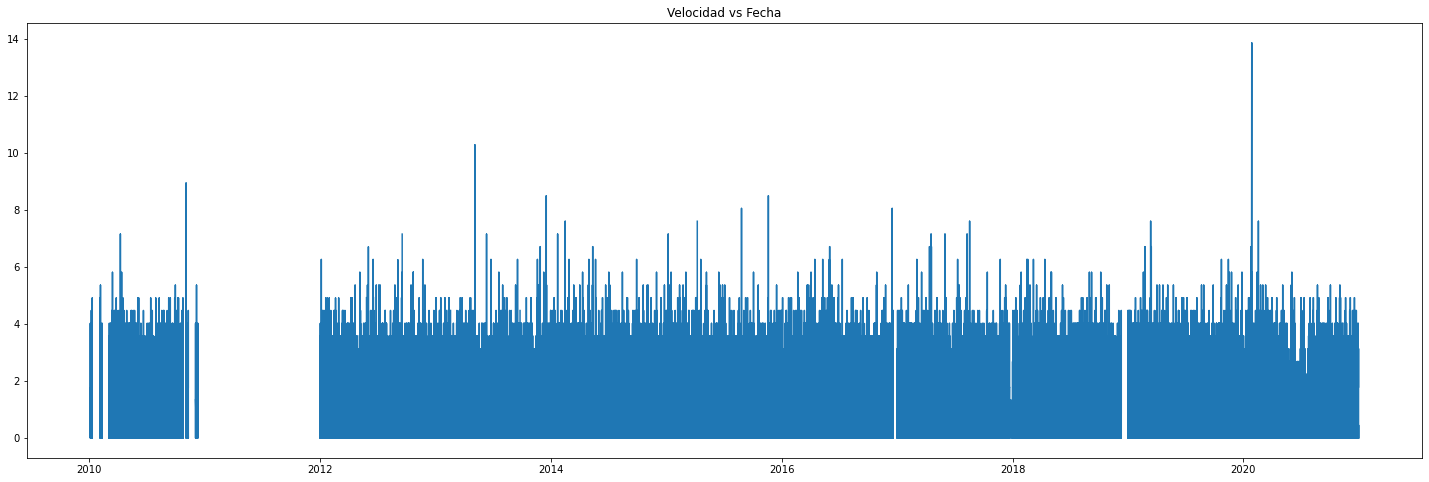

yarumos


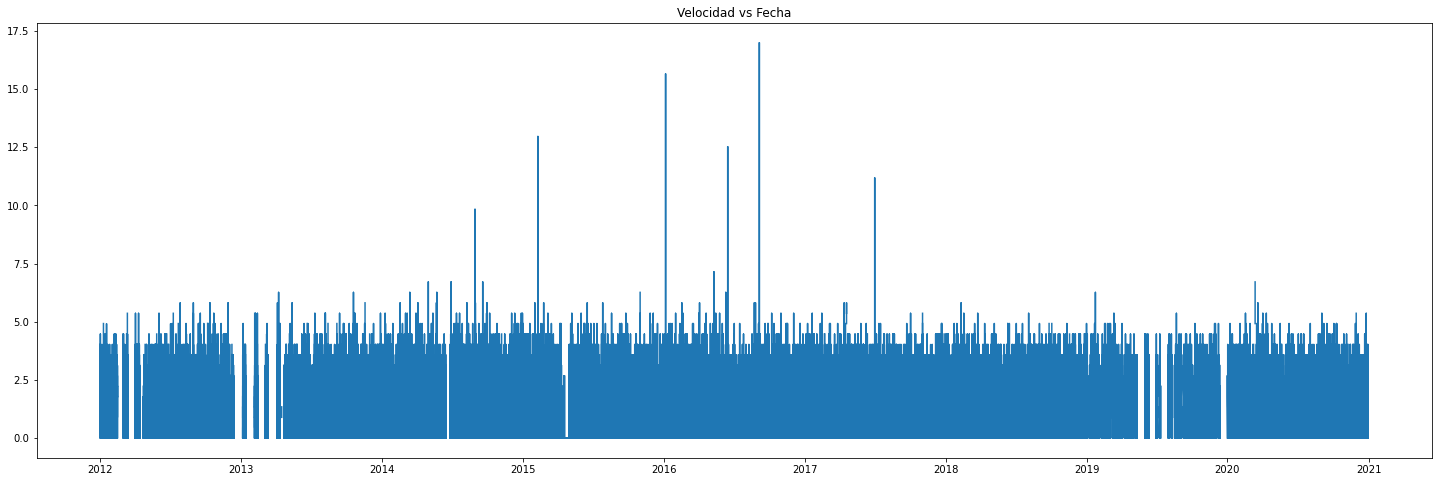

In [30]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Velocidad"])
    plt.title("Velocidad vs Fecha") 
    plt.show()

In [31]:
for i in datasets:
    print(i.Estacion[0])  
    print(i.Velocidad.isnull().sum(), "\n")     

alcazares
249752 

aranjuez
242229 

bosques_del_norte
296184 

chec_uribe
269901 

el_carmen
211435 

emas
308558 

hospital_caldas
381877 

la_nubia
322989 

la_palma
301566 

milan
320462 

obs_vulcanologico
349941 

palogrande
913802 

posgrados
168489 

yarumos
330050 



## Temperatura

alcazares


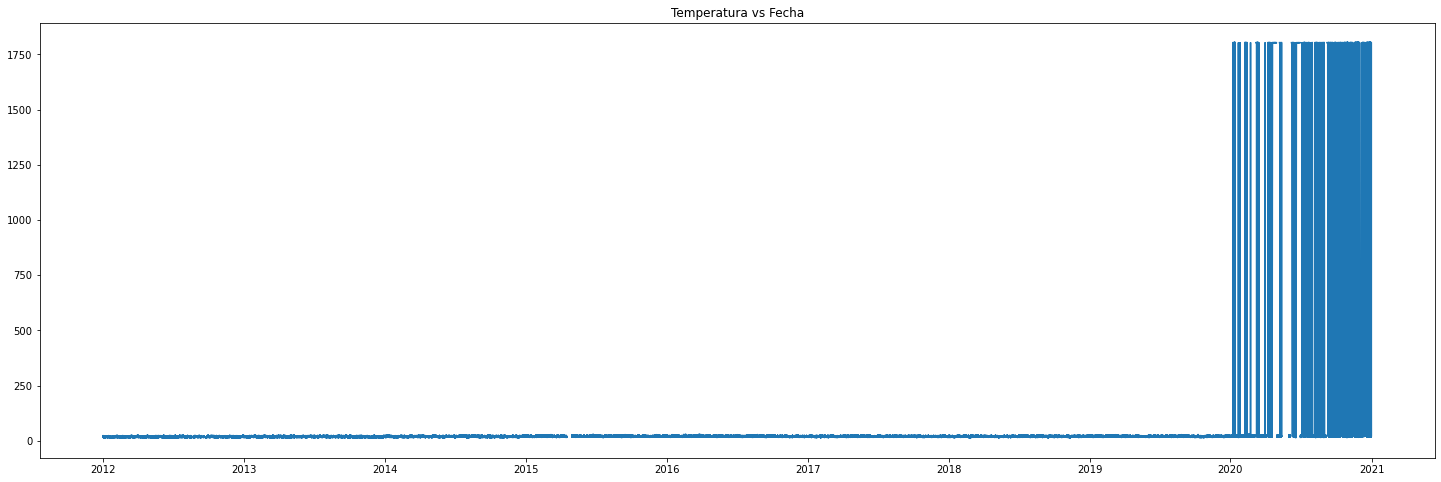

aranjuez


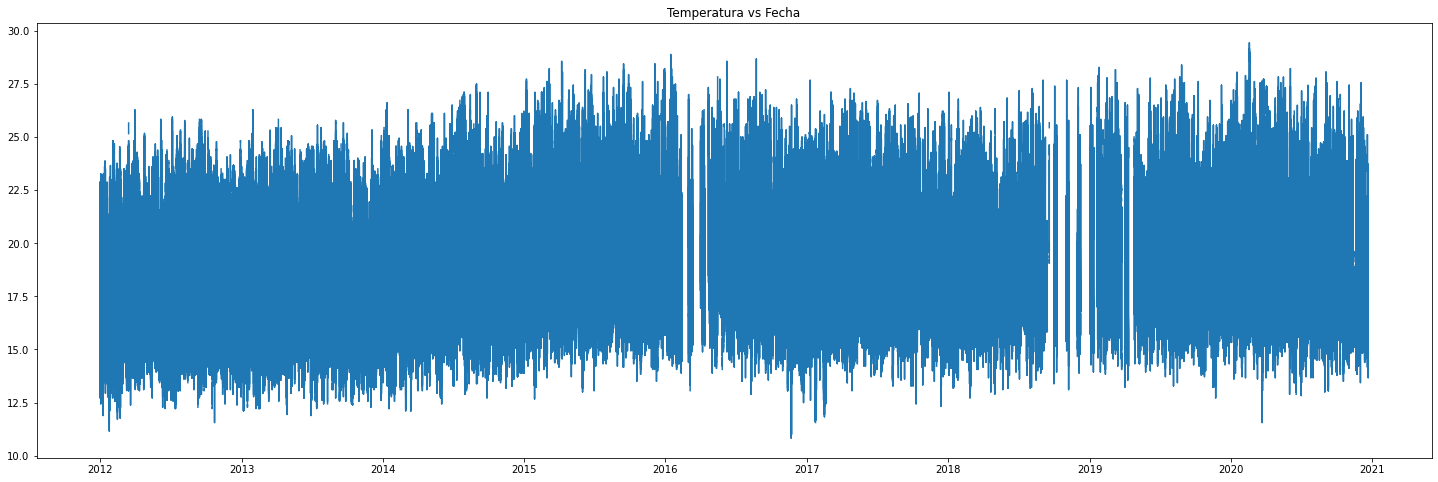

bosques_del_norte


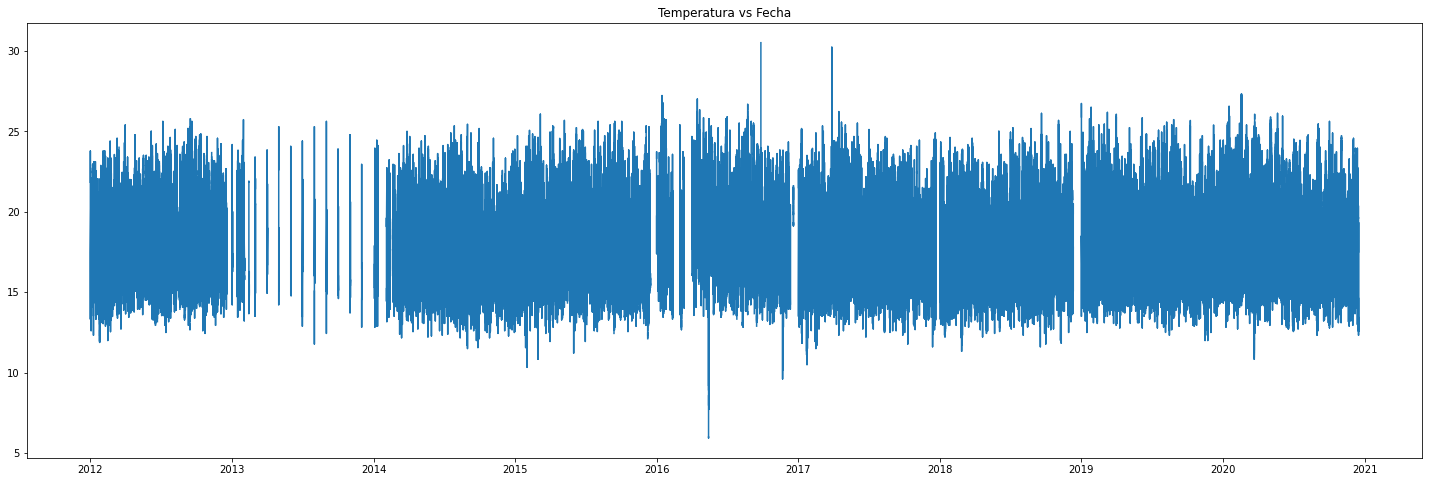

chec_uribe


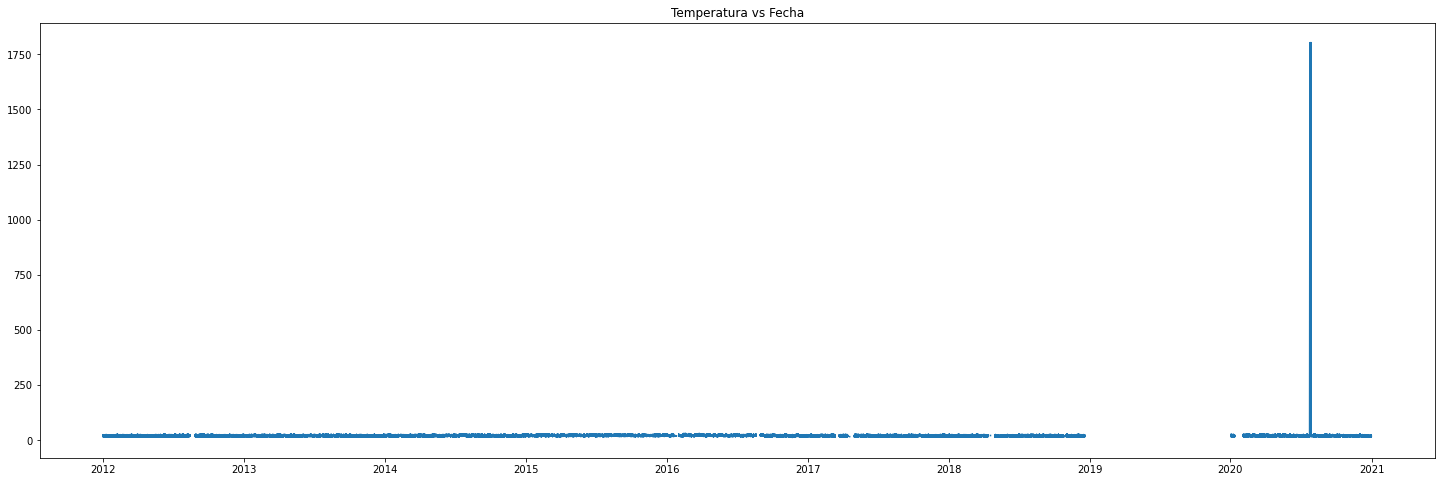

el_carmen


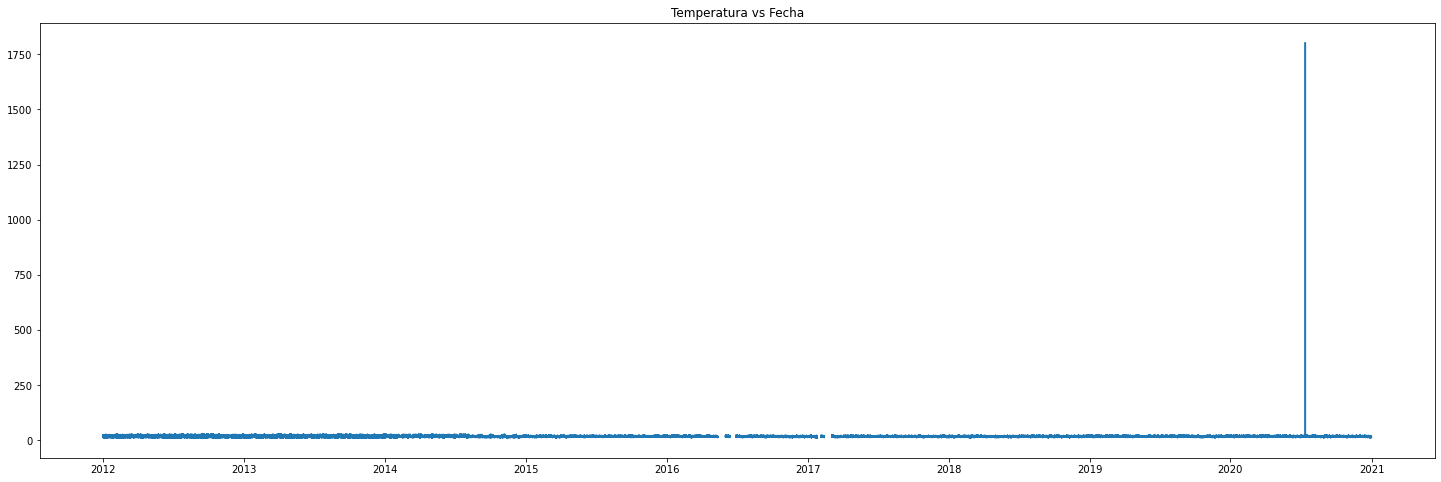

emas


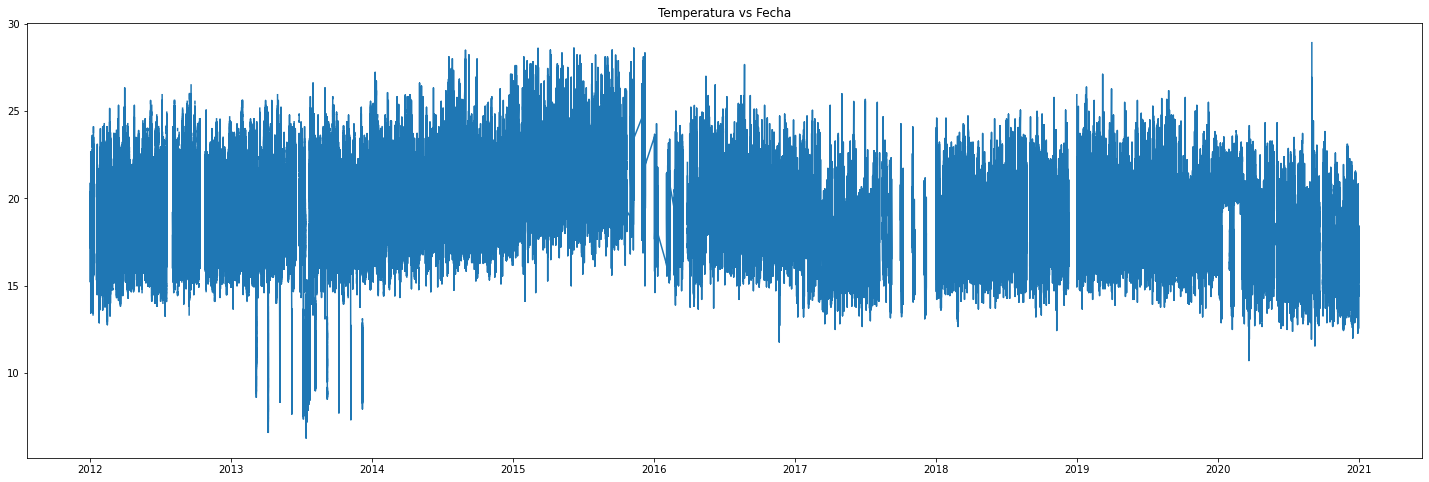

hospital_caldas


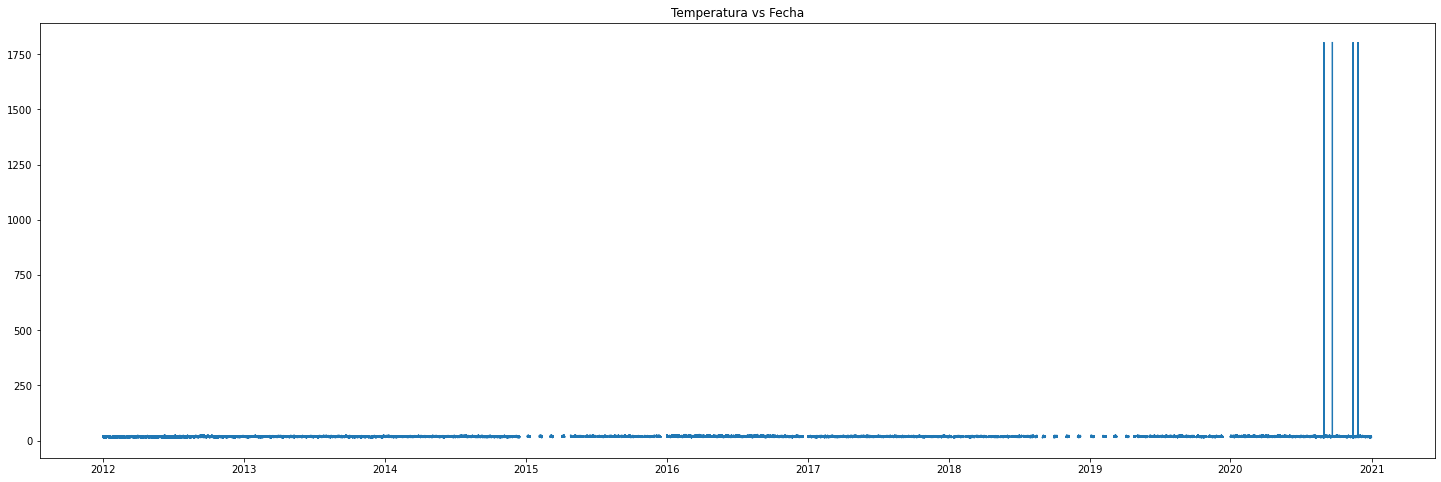

la_nubia


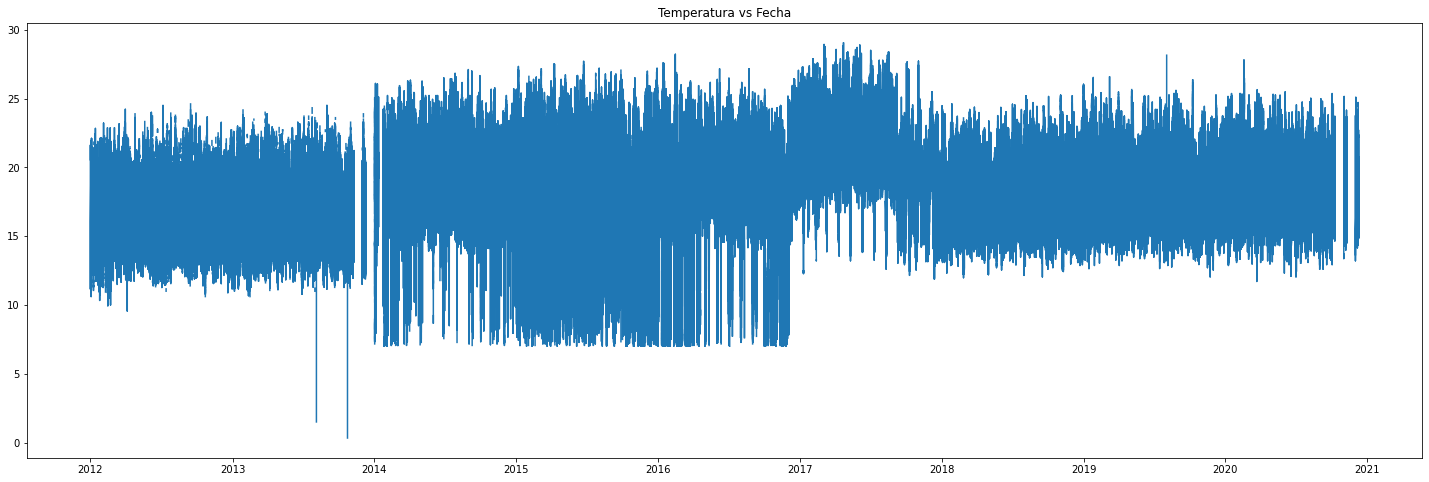

la_palma


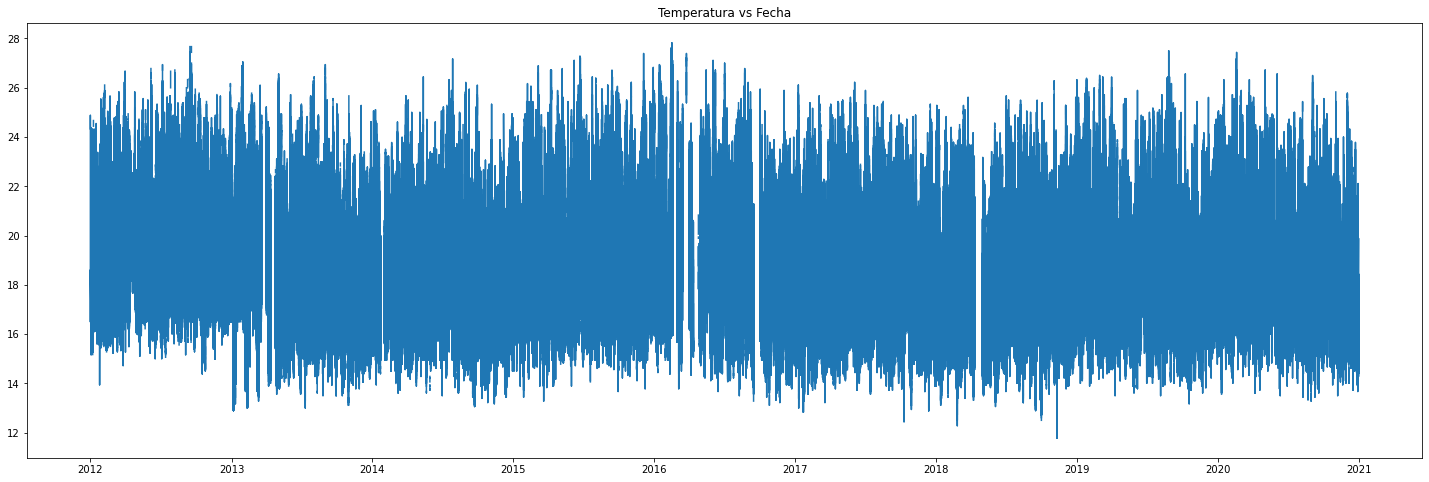

milan


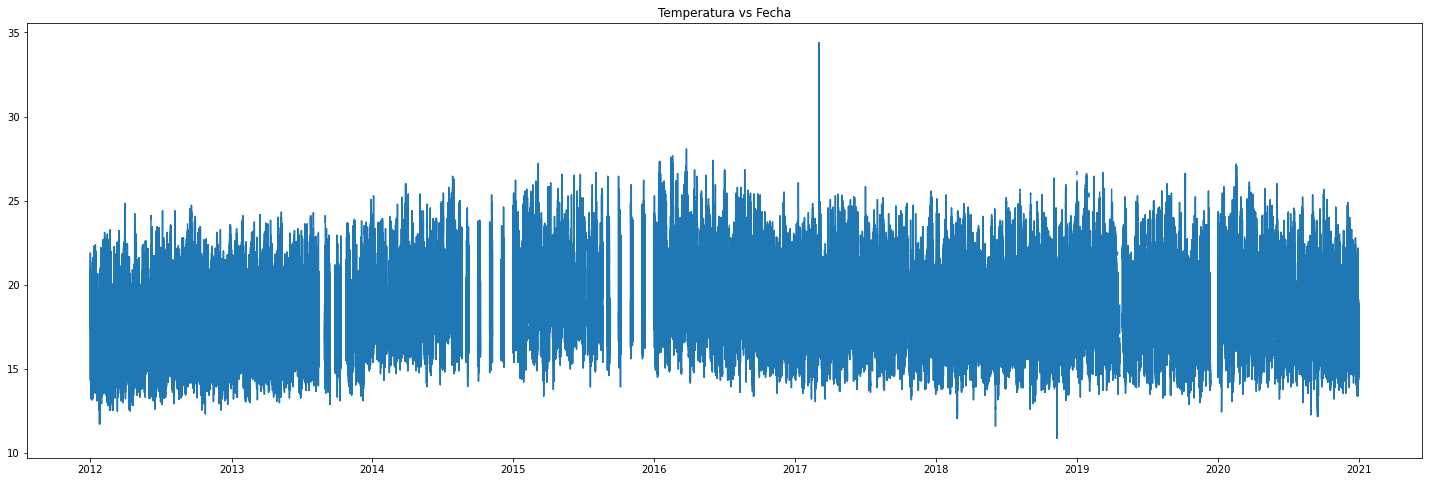

obs_vulcanologico


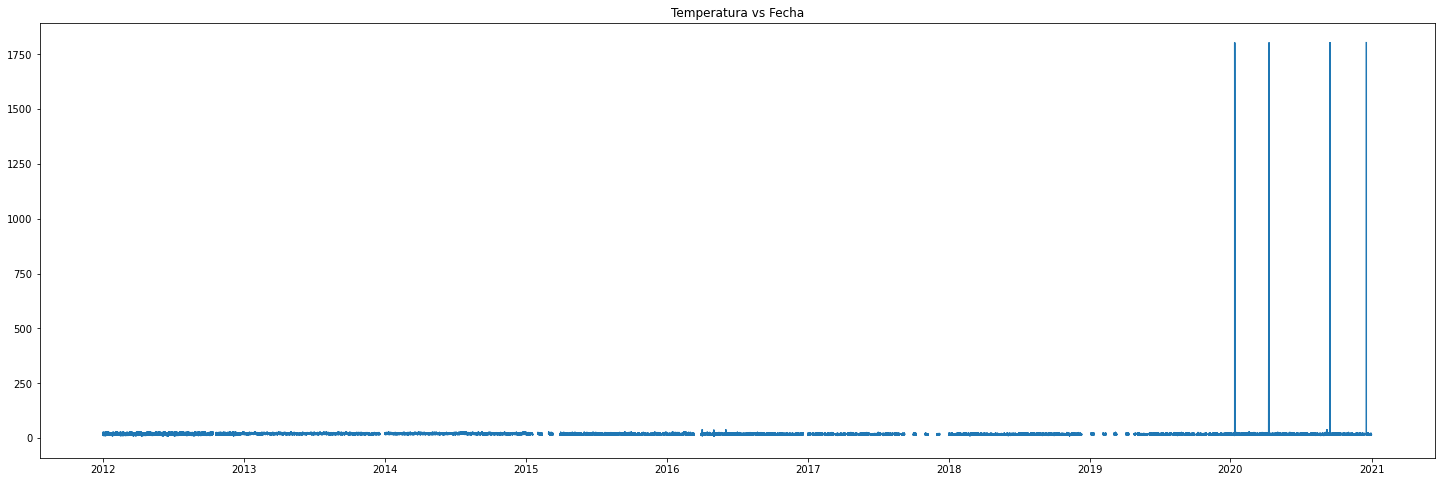

palogrande


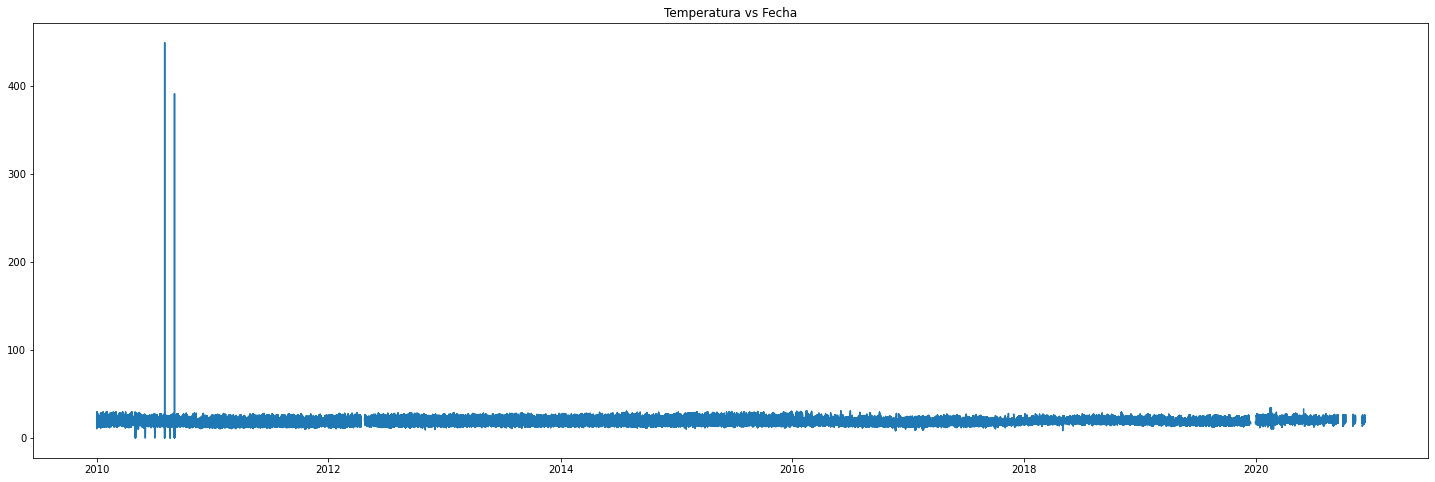

posgrados


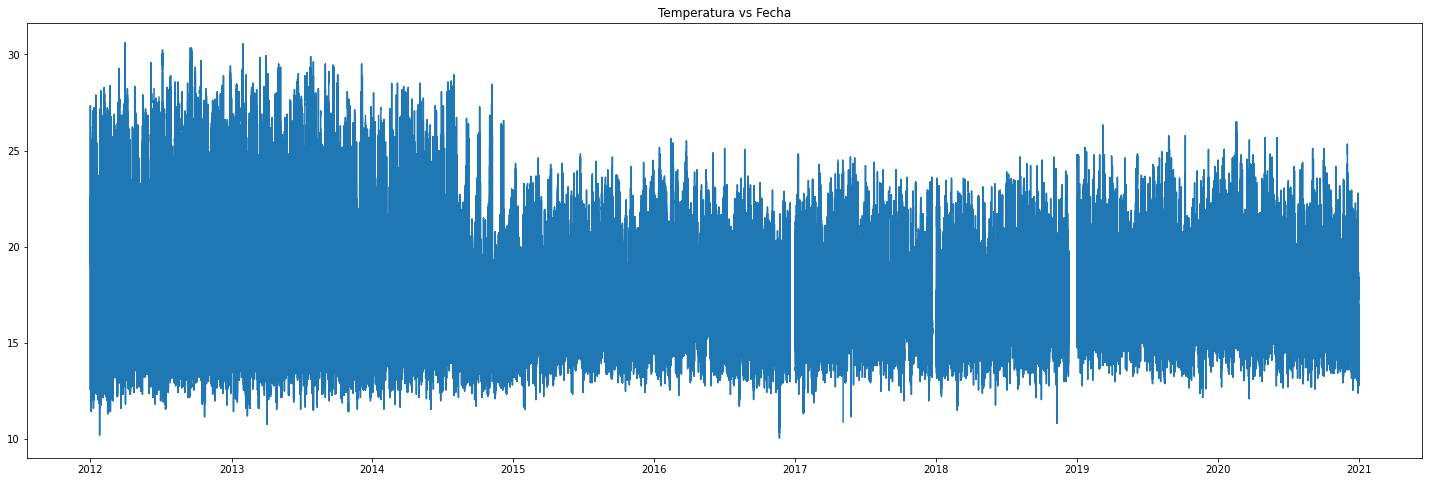

yarumos


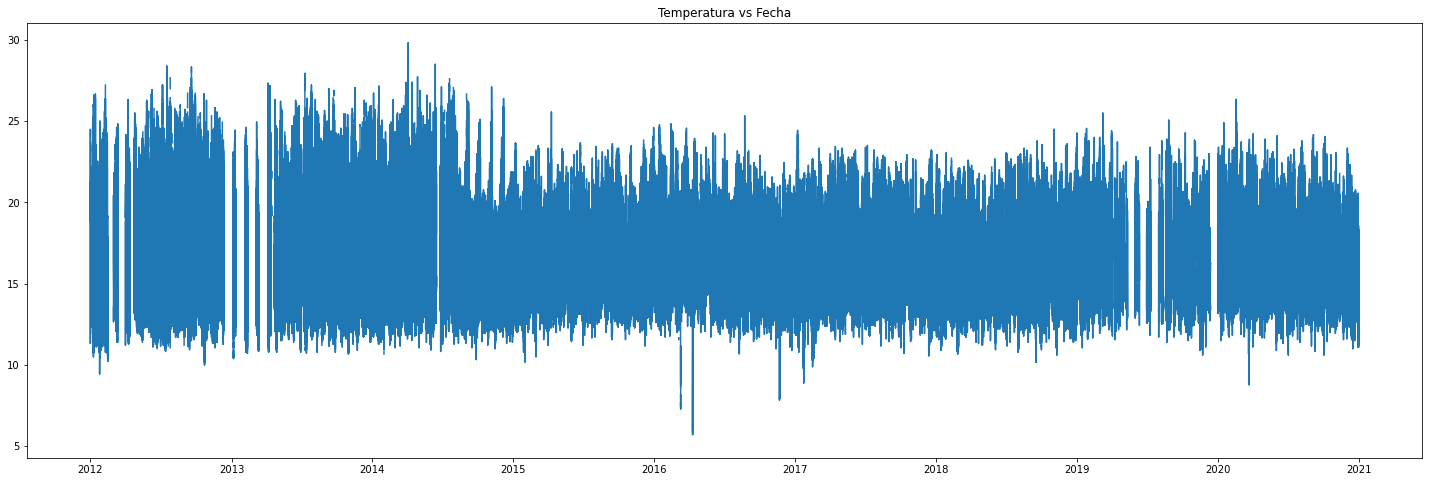

In [32]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Temperatura"])
    plt.title("Temperatura vs Fecha") 
    plt.show()

In [34]:
for i in datasets:
    print(i.Estacion[0]) 
    print(i.loc[i.Temperatura == 0].shape, "\n")  

alcazares
(0, 13) 

aranjuez
(0, 13) 

bosques_del_norte
(0, 13) 

chec_uribe
(0, 13) 

el_carmen
(0, 13) 

emas
(0, 13) 

hospital_caldas
(0, 13) 

la_nubia
(0, 13) 

la_palma
(0, 13) 

milan
(0, 13) 

obs_vulcanologico
(0, 13) 

palogrande
(988, 13) 

posgrados
(0, 13) 

yarumos
(0, 13) 



In [35]:
for i in datasets:
    print(i.Estacion[0])
    print(i.loc[i.Temperatura == 0], "\n") 

alcazares
Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Estacion]
Index: [] 

aranjuez
Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Estacion]
Index: [] 

bosques_del_norte
Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Estacion]
Index: [] 

chec_uribe
Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Estacion]
Index: [] 

el_carmen
Empty DataFrame
Columns: [Fecha, Hora, Temperatura, Velocidad, Direccion, Presion, Humedad, Precipitacion, Radiacion, Evapotranspiracion, Precipitacion_Real, Evapo_real, Esta

In [36]:
#for i in datasets:
#    print(i.loc[i.Temperatura == 0]) 

**Debido a que cuando la temperatura es cero, las demas columnas son cero, entonces se eliminaran las columnas para no afectar ningun otro valor** 

In [20]:
for i in datasets:
    i.drop(i.loc[i.Temperatura == 0].index, inplace = True)  

In [21]:
for i in datasets:
    i.reset_index(drop = True) 

In [49]:
for i in datasets:
    print( "\n",i.Estacion[0])  
    print(i.Temperatura.min())  


 alcazares
12.55

 aranjuez
10.83

 bosques_del_norte
7.0

 chec_uribe
10.0

 el_carmen
10.88

 emas
7.0

 hospital_caldas
11.61

 la_nubia
7.0

 la_palma
11.78

 milan
10.89

 obs_vulcanologico
7.0

 palogrande
7.0

 posgrados
10.06

 yarumos
7.0


**Las Temperaturas mas bajas en Manizales llegan hasta 7 °C, por lo tanto cualquier valor por debajo se considera outlier. Se reemplazaran los valores mas bajos por 7°C.**

In [22]:
for i in datasets:
    i["Temperatura"] = np.where((i.Temperatura < 7), 7, i["Temperatura"])

Estacion alcazares


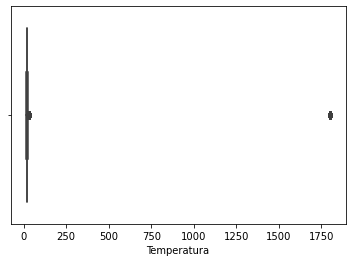

Estacion aranjuez


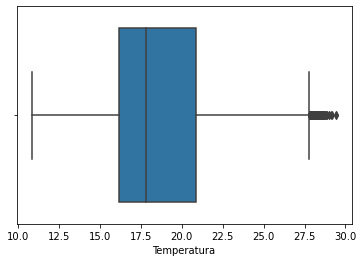

Estacion bosques_del_norte


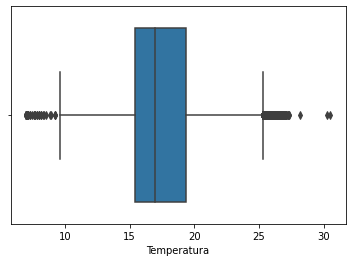

Estacion chec_uribe


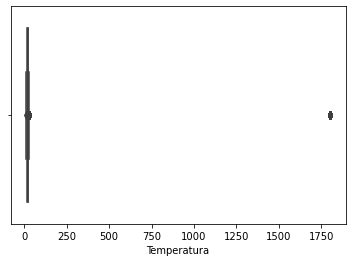

Estacion el_carmen


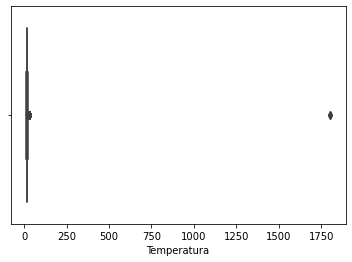

Estacion emas


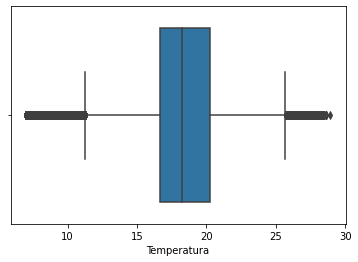

Estacion hospital_caldas


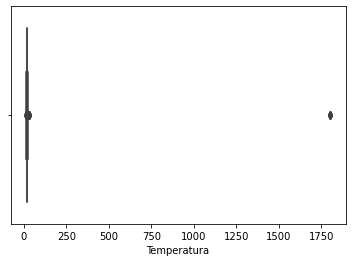

Estacion la_nubia


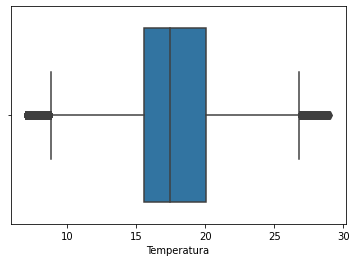

Estacion la_palma


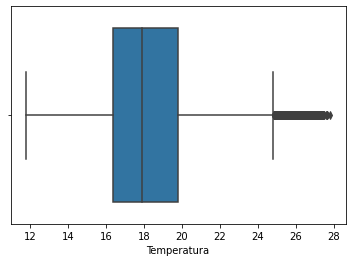

Estacion milan


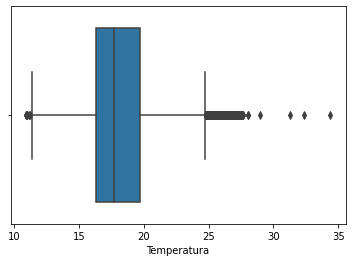

Estacion obs_vulcanologico


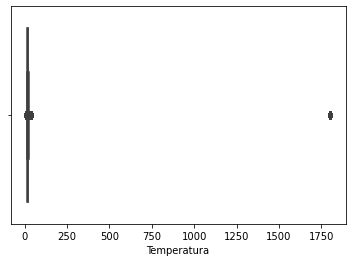

Estacion palogrande


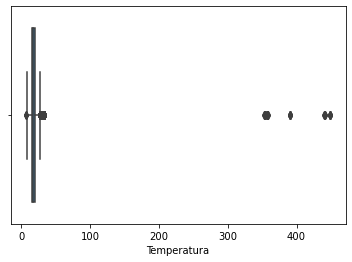

Estacion posgrados


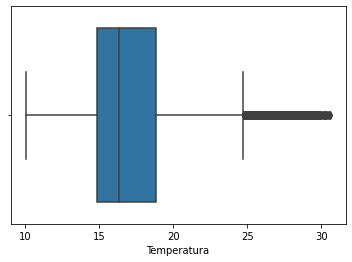

Estacion yarumos


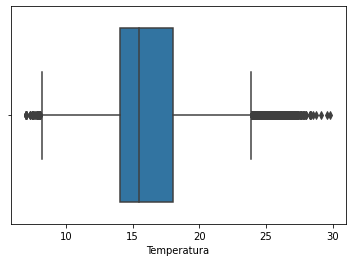

In [41]:
for i in datasets:
    print("Estacion", i.Estacion[0]) 
    sns.boxplot(x ='Temperatura', data = i)
    plt.show() 

**La temperatura maxima registrada en manizales durante los ultimos 10 años, es de 32°C.**

In [23]:
n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2010-01-01") & (i.Fecha < "2010-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2010-01-01") & (i.Fecha <= "2010-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2010-04-01") & (i.Fecha < "2010-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2010-04-01") & (i.Fecha <= "2010-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2010-07-01") & (i.Fecha < "2010-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2010-07-01") & (i.Fecha <= "2010-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2010-10-01") & (i.Fecha < "2010-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2010-10-01") & (i.Fecha <= "2010-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])    

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2011-01-01") & (i.Fecha < "2011-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2011-01-01") & (i.Fecha <= "2011-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2011-04-01") & (i.Fecha < "2011-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2011-04-01") & (i.Fecha <= "2011-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2011-07-01") & (i.Fecha < "2011-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2011-07-01") & (i.Fecha <= "2011-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2011-10-01") & (i.Fecha < "2011-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2011-10-01") & (i.Fecha <= "2011-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])


n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2012-01-01") & (i.Fecha < "2012-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2012-01-01") & (i.Fecha <= "2012-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2012-04-01") & (i.Fecha < "2012-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2012-04-01") & (i.Fecha <= "2012-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2012-07-01") & (i.Fecha < "2012-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2012-07-01") & (i.Fecha <= "2012-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2012-10-01") & (i.Fecha < "2012-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2012-10-01") & (i.Fecha <= "2012-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2013-01-01") & (i.Fecha < "2013-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2013-01-01") & (i.Fecha <= "2013-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2013-04-01") & (i.Fecha < "2013-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2013-04-01") & (i.Fecha <= "2013-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2013-07-01") & (i.Fecha < "2013-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2013-07-01") & (i.Fecha <= "2013-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2013-10-01") & (i.Fecha < "2013-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2013-10-01") & (i.Fecha <= "2013-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2014-01-01") & (i.Fecha < "2014-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2014-01-01") & (i.Fecha <= "2014-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2014-04-01") & (i.Fecha < "2014-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2014-04-01") & (i.Fecha <= "2014-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2014-07-01") & (i.Fecha < "2014-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2014-07-01") & (i.Fecha <= "2014-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2014-10-01") & (i.Fecha < "2014-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2014-10-01") & (i.Fecha <= "2014-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2015-01-01") & (i.Fecha < "2015-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2015-01-01") & (i.Fecha <= "2015-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2015-04-01") & (i.Fecha < "2015-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2015-04-01") & (i.Fecha <= "2015-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2015-07-01") & (i.Fecha < "2015-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2015-07-01") & (i.Fecha <= "2015-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2015-10-01") & (i.Fecha < "2015-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2015-10-01") & (i.Fecha <= "2015-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2016-01-01") & (i.Fecha < "2016-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2016-01-01") & (i.Fecha <= "2016-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2016-04-01") & (i.Fecha < "2016-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2016-04-01") & (i.Fecha <= "2016-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2016-07-01") & (i.Fecha < "2016-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2016-07-01") & (i.Fecha <= "2016-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2016-10-01") & (i.Fecha < "2016-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2016-10-01") & (i.Fecha <= "2016-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2017-01-01") & (i.Fecha < "2017-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2017-01-01") & (i.Fecha <= "2017-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2017-04-01") & (i.Fecha < "2017-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2017-04-01") & (i.Fecha <= "2017-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2017-07-01") & (i.Fecha < "2017-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2017-07-01") & (i.Fecha <= "2017-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2017-10-01") & (i.Fecha < "2017-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2017-10-01") & (i.Fecha <= "2017-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])


n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2018-01-01") & (i.Fecha < "2018-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2018-01-01") & (i.Fecha <= "2018-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2018-04-01") & (i.Fecha < "2018-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2018-04-01") & (i.Fecha <= "2018-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2018-07-01") & (i.Fecha < "2018-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2018-07-01") & (i.Fecha <= "2018-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2018-10-01") & (i.Fecha < "2018-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2018-10-01") & (i.Fecha <= "2018-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2019-01-01") & (i.Fecha < "2019-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2019-01-01") & (i.Fecha <= "2019-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2019-04-01") & (i.Fecha < "2019-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2019-04-01") & (i.Fecha <= "2019-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2019-07-01") & (i.Fecha < "2019-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2019-07-01") & (i.Fecha <= "2019-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2019-10-01") & (i.Fecha < "2019-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2019-10-01") & (i.Fecha <= "2019-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

n = 32
for i in datasets: 
    promedio = i[(i.Fecha > "2020-01-01") & (i.Fecha < "2020-03-31") & (i.Temperatura <= n)].Temperatura.mean()  
    i["Temperatura"] = np.where((i.Fecha >= "2020-01-01") & (i.Fecha <= "2020-03-31") & (i.Temperatura > n), promedio, i["Temperatura"])
    
    promedio2 = i[(i.Fecha > "2020-04-01") & (i.Fecha < "2020-06-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2020-04-01") & (i.Fecha <= "2020-06-30") & (i.Temperatura > n), promedio2, i["Temperatura"])
    
    promedio3 = i[(i.Fecha > "2020-07-01") & (i.Fecha < "2020-09-30") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2020-07-01") & (i.Fecha <= "2020-09-30") & (i.Temperatura > n), promedio3, i["Temperatura"])
    
    promedio4 = i[(i.Fecha > "2020-10-01") & (i.Fecha < "2020-12-31") & (i.Temperatura <= n)].Temperatura.mean()
    i["Temperatura"] = np.where((i.Fecha >= "2020-10-01") & (i.Fecha <= "2020-12-31") & (i.Temperatura > n), promedio4, i["Temperatura"])

alcazares


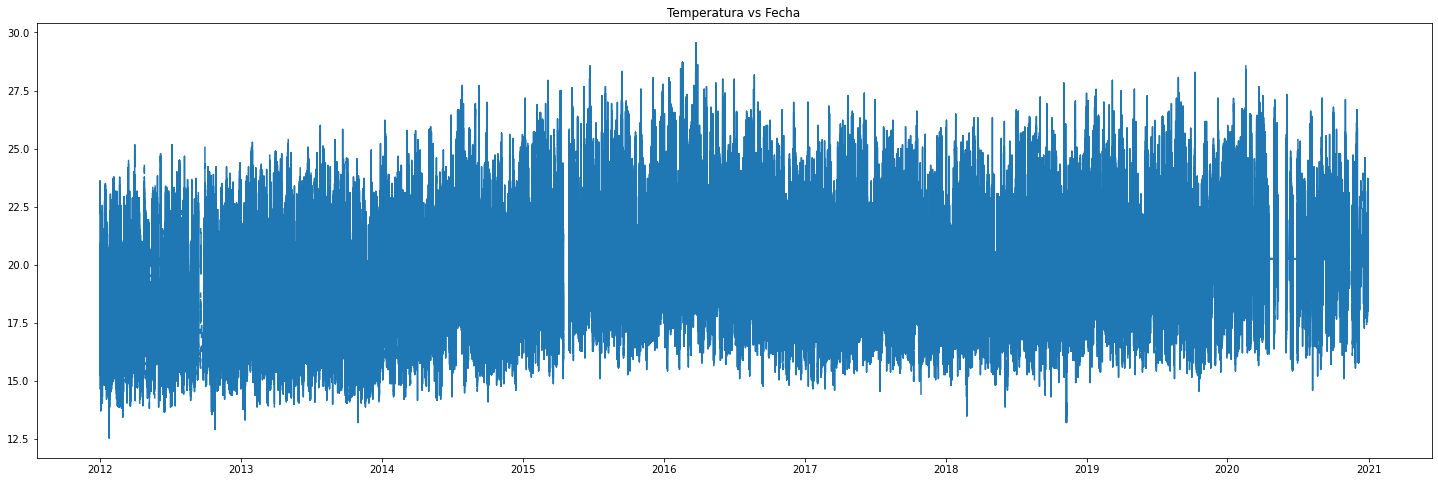

aranjuez


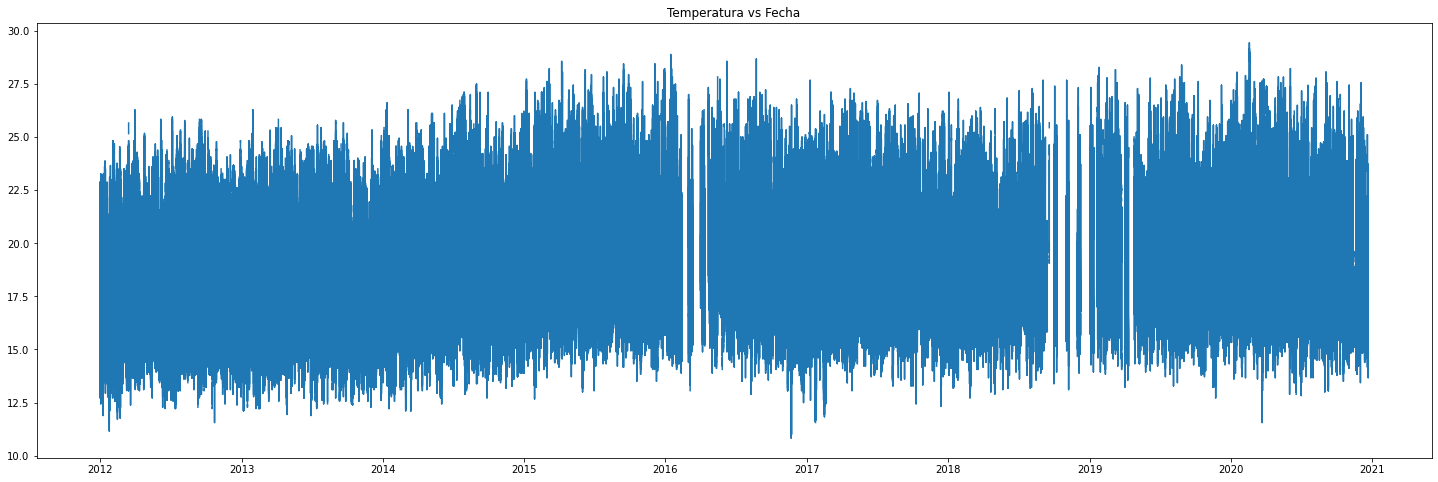

bosques_del_norte


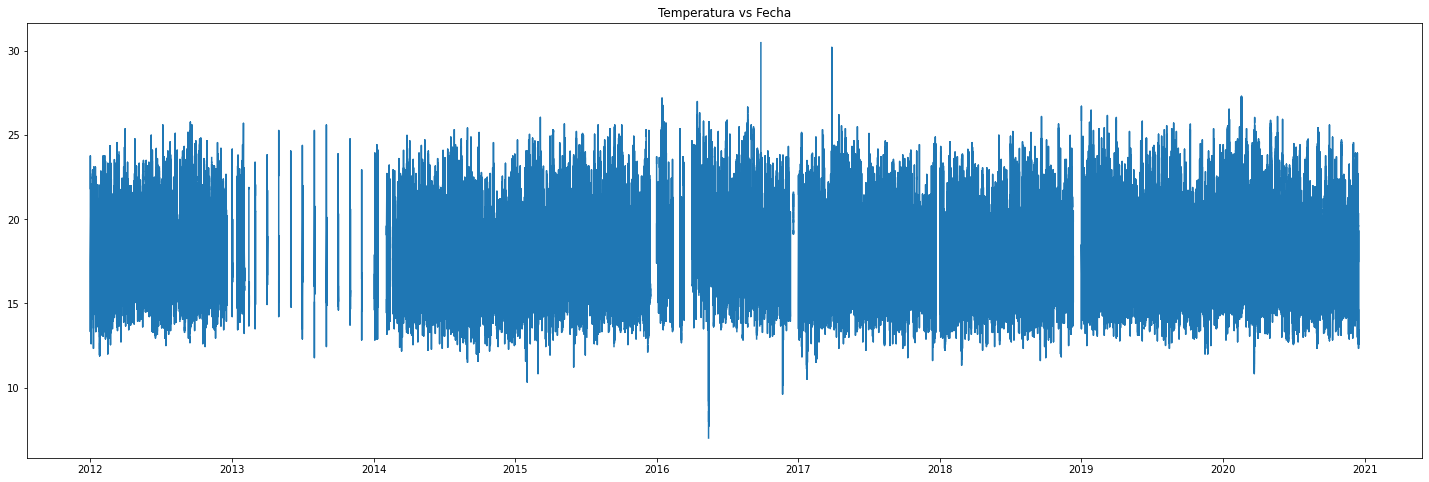

chec_uribe


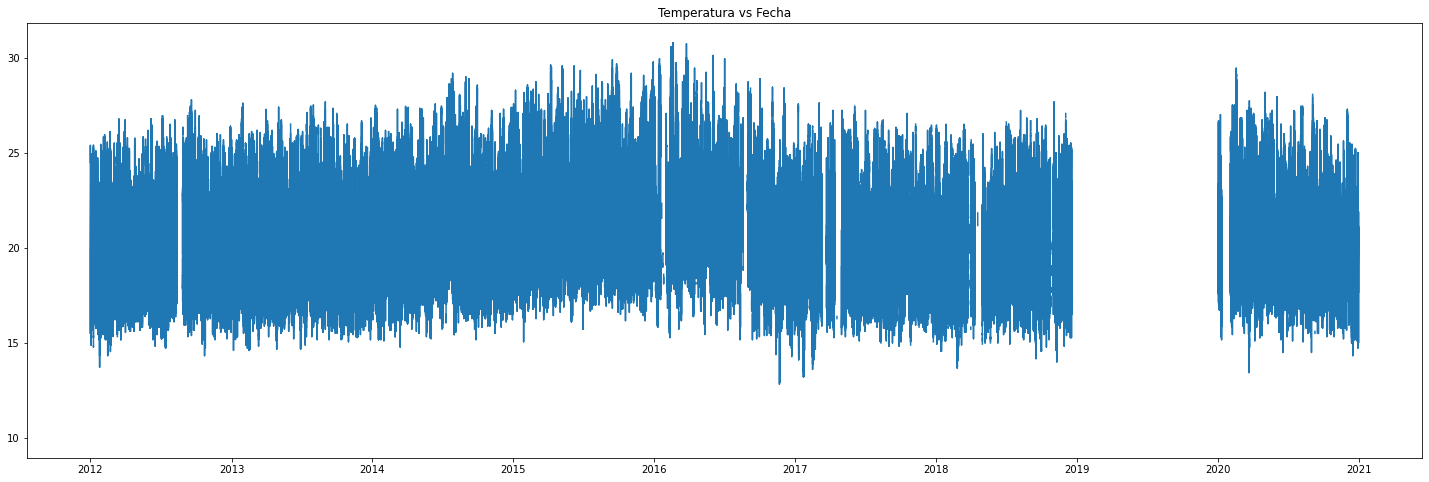

el_carmen


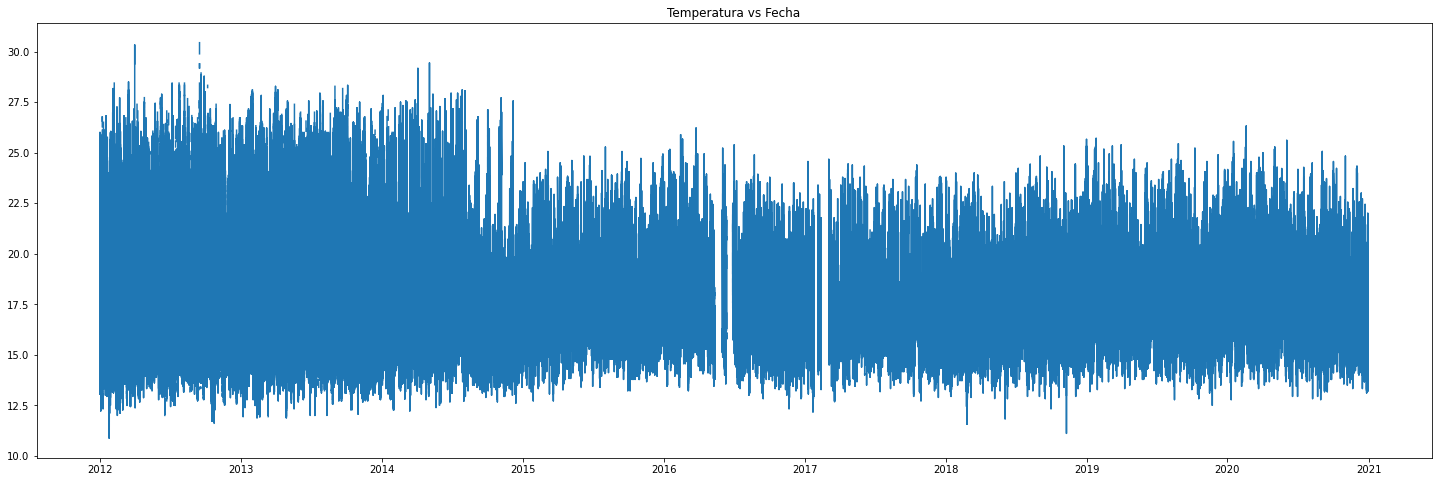

emas


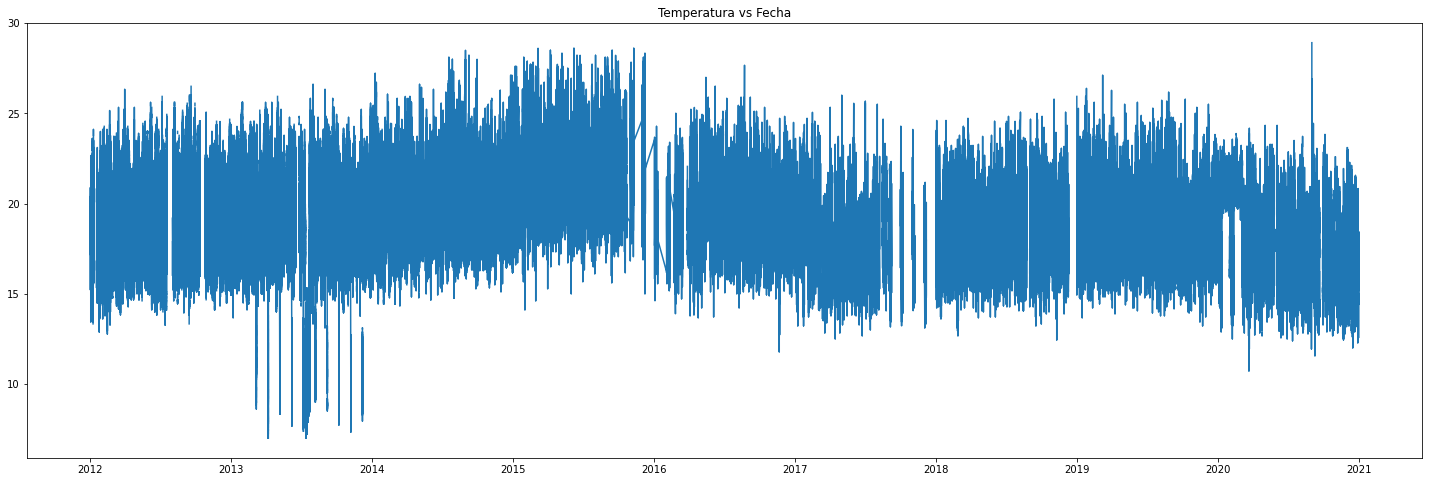

hospital_caldas


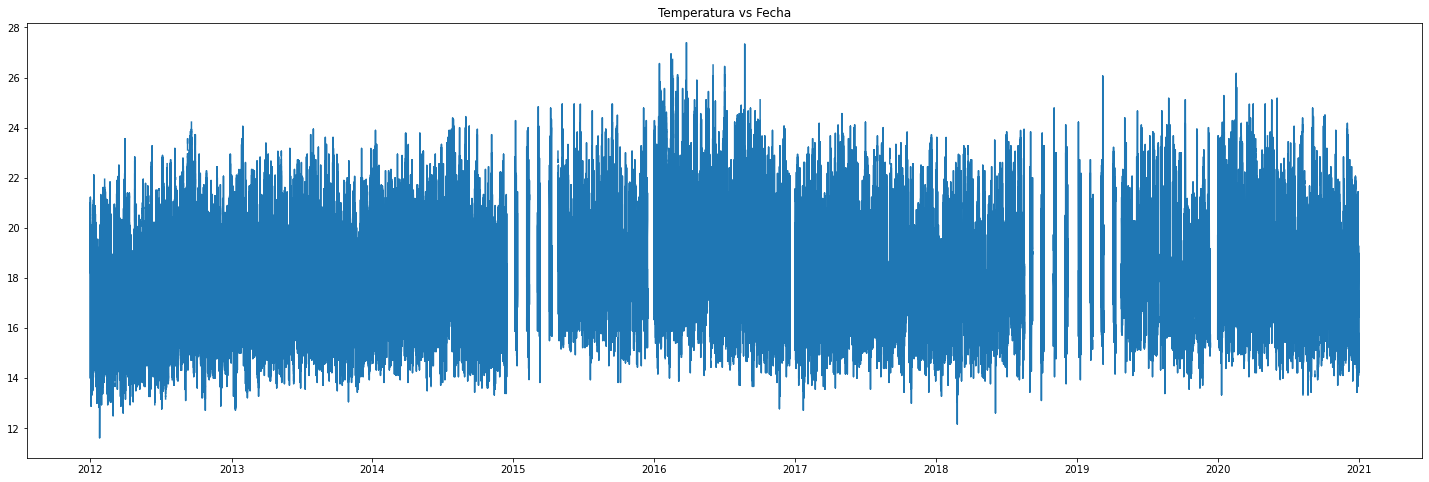

la_nubia


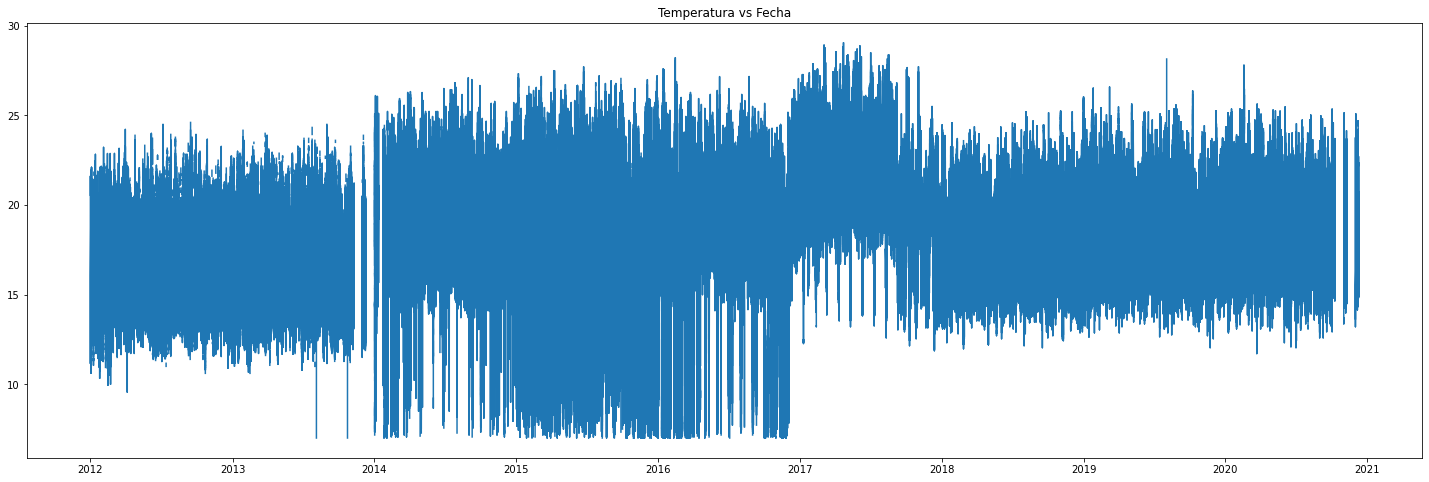

la_palma


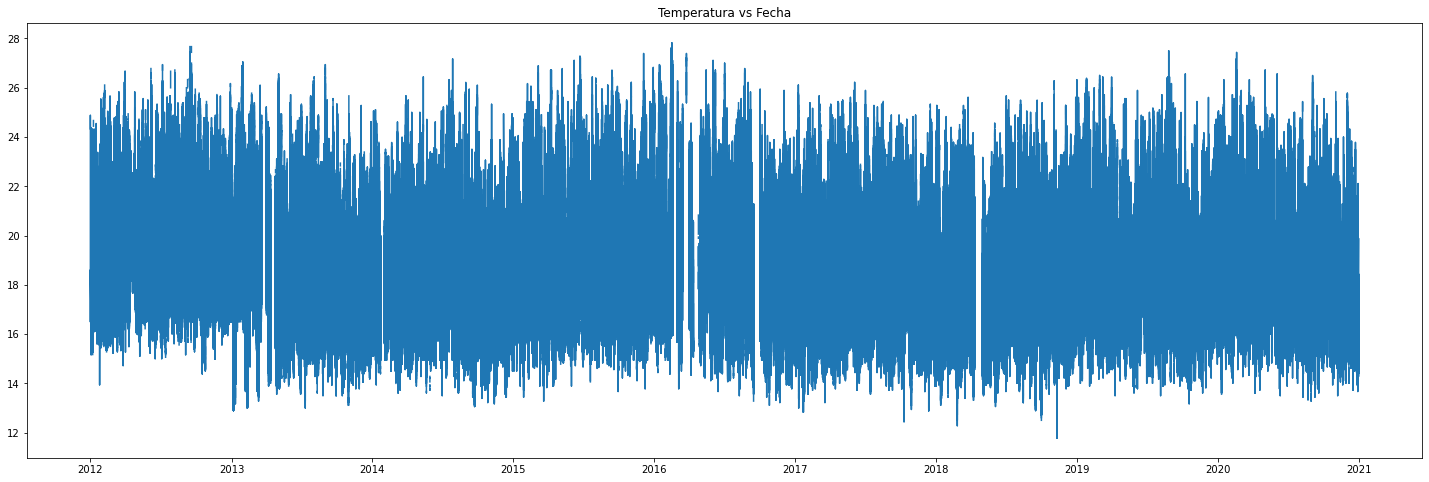

milan


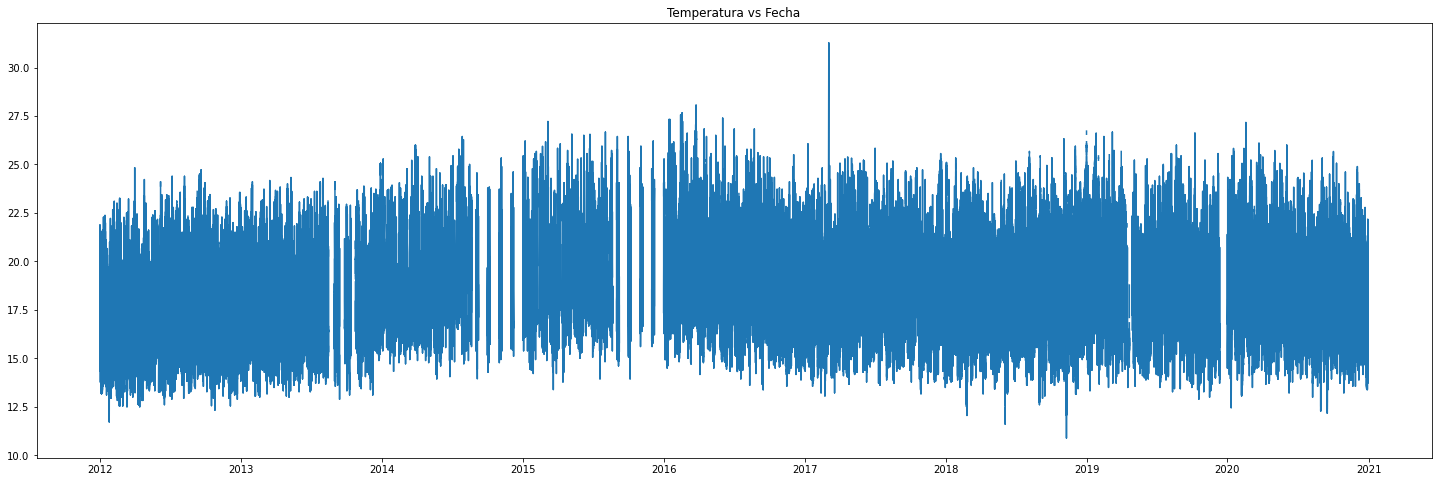

obs_vulcanologico


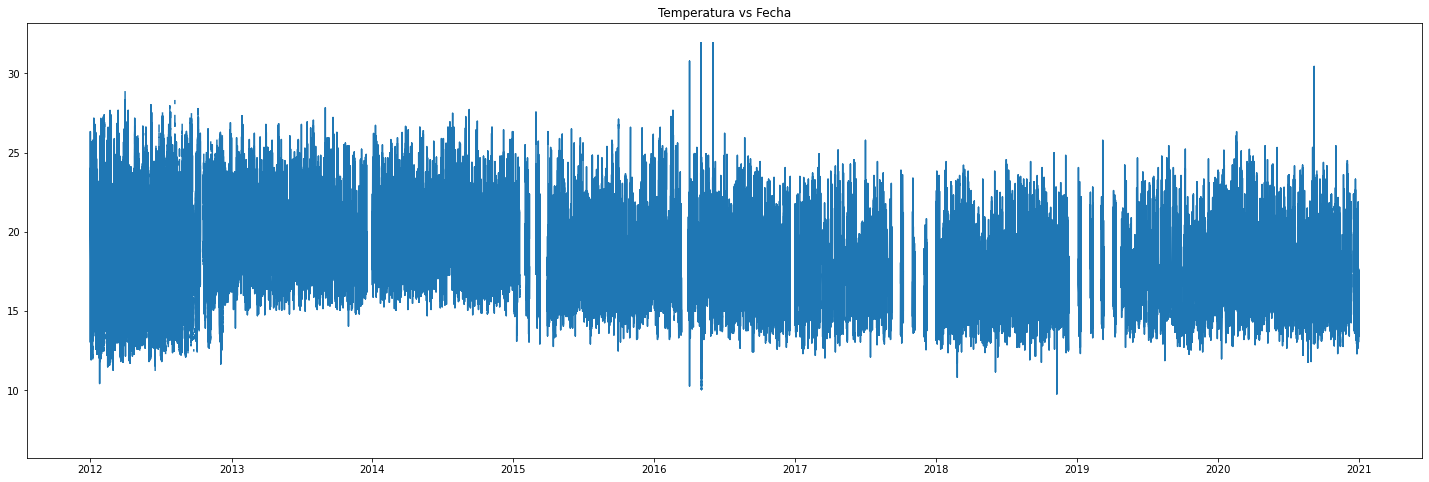

palogrande


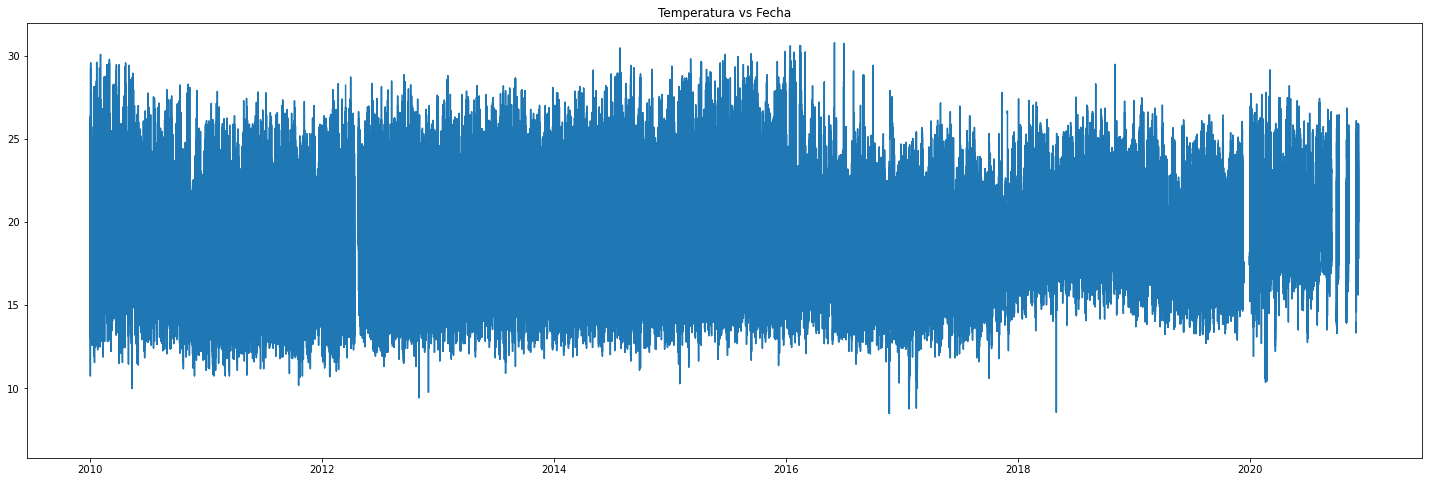

posgrados


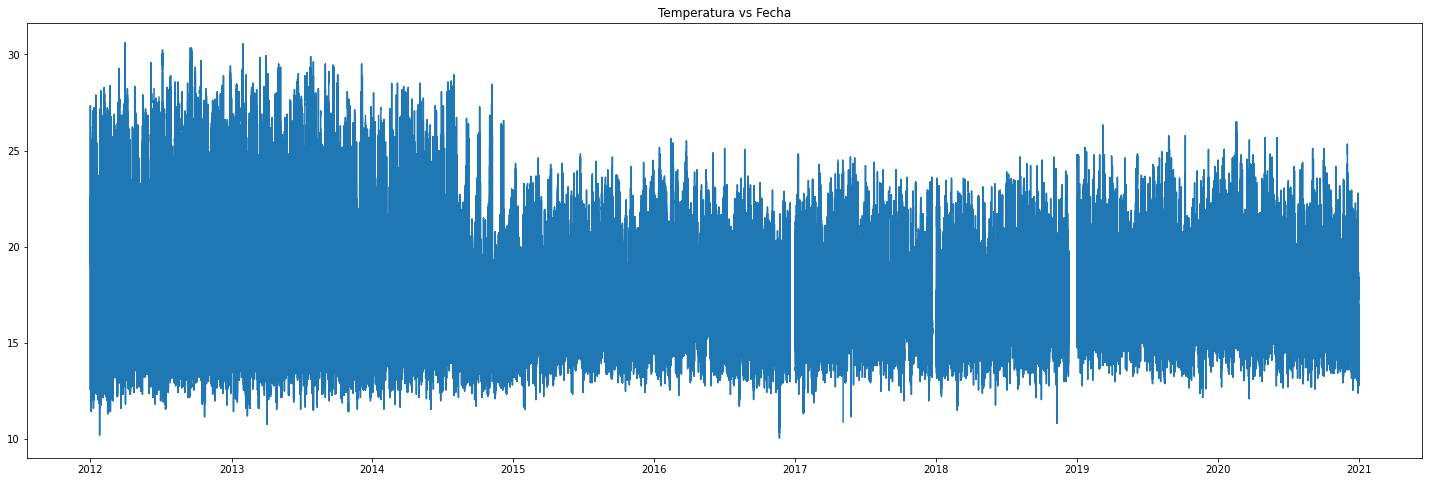

yarumos


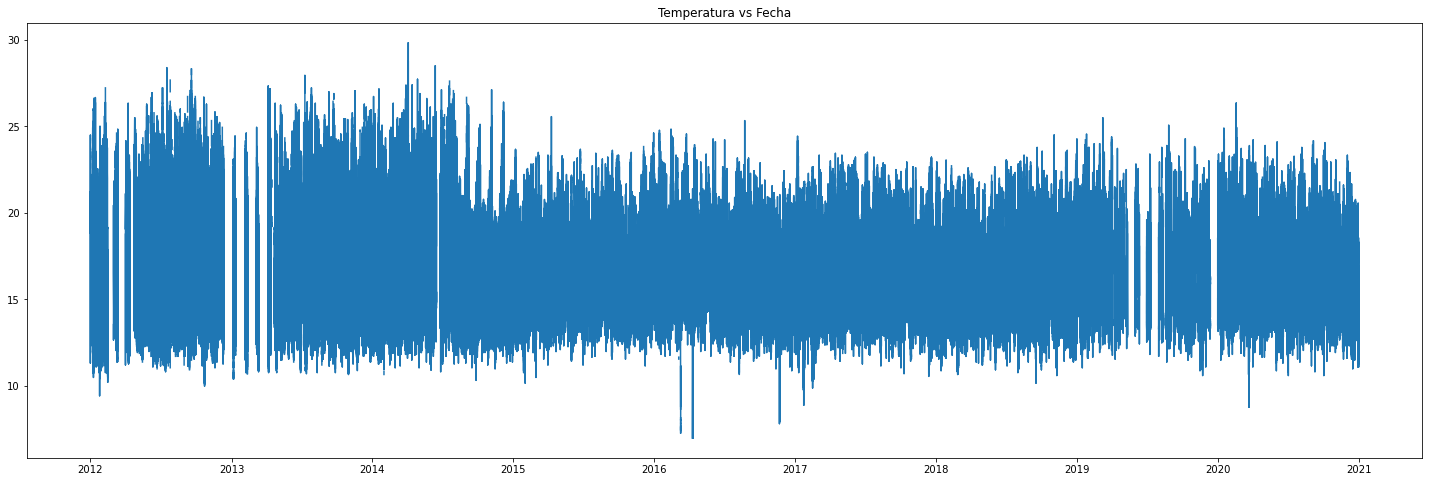

In [43]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Temperatura"])
    plt.title("Temperatura vs Fecha") 
    plt.show()

## Presion Barometrica 

alcazares


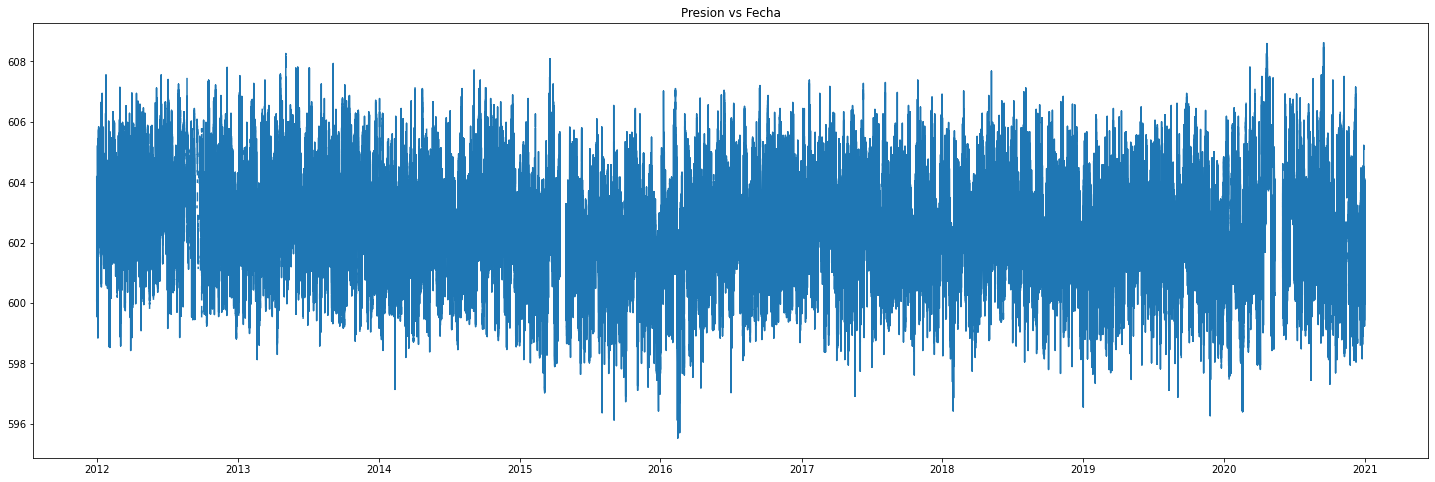

aranjuez


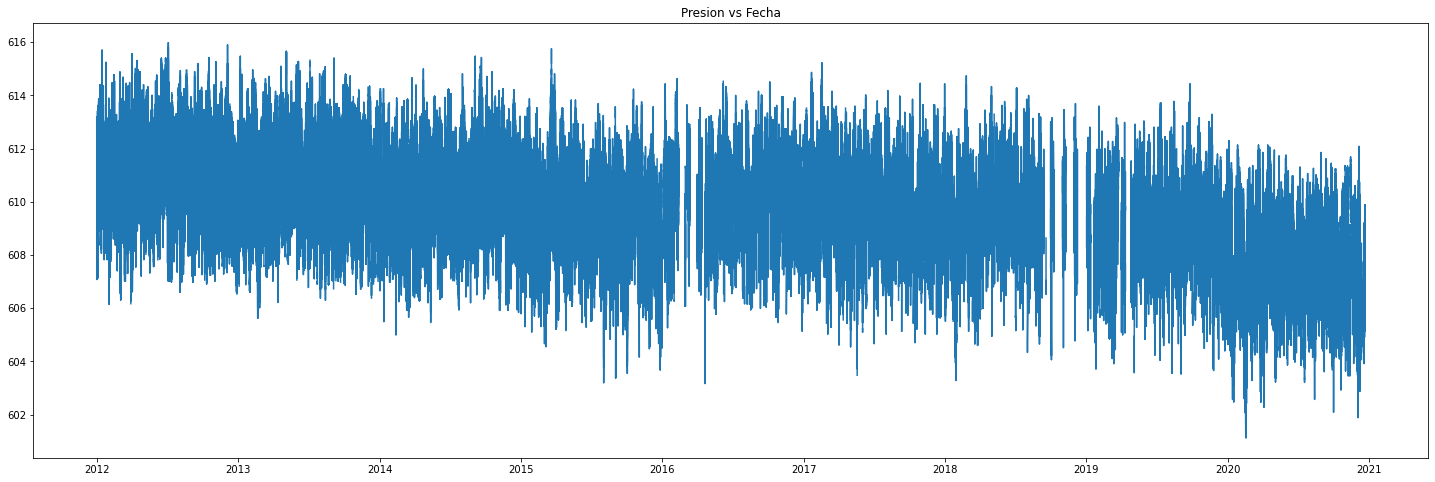

bosques_del_norte


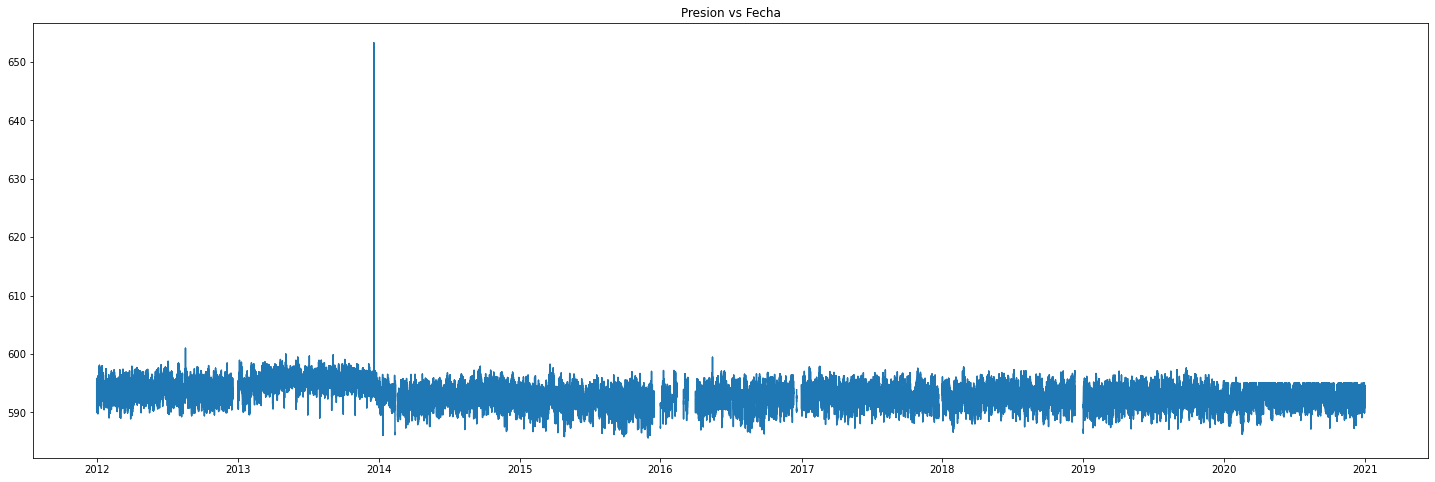

chec_uribe


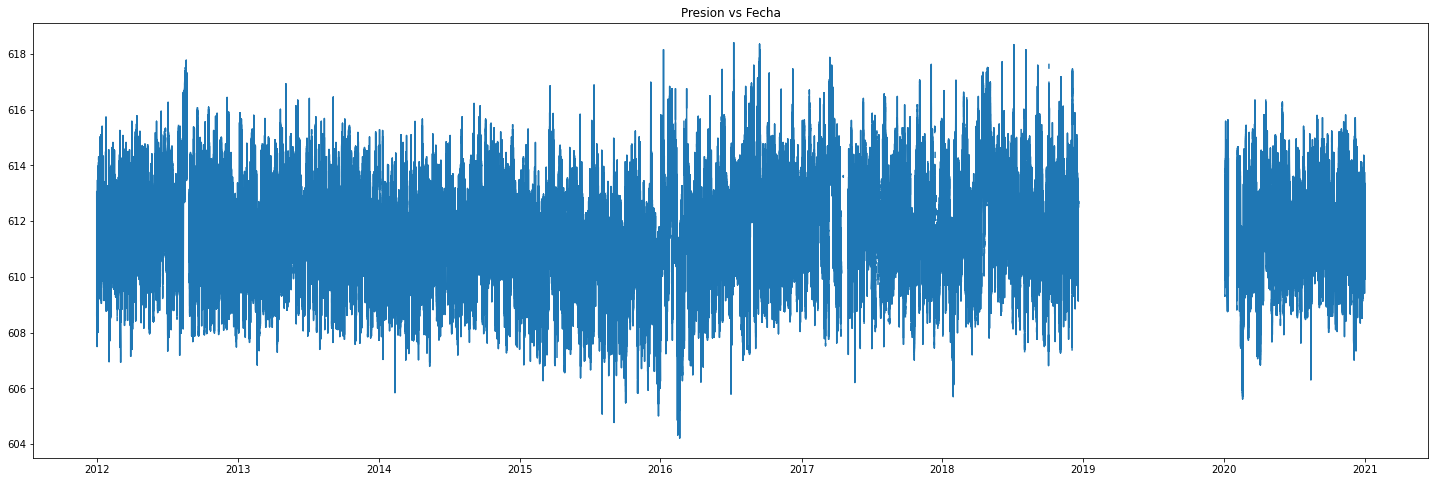

el_carmen


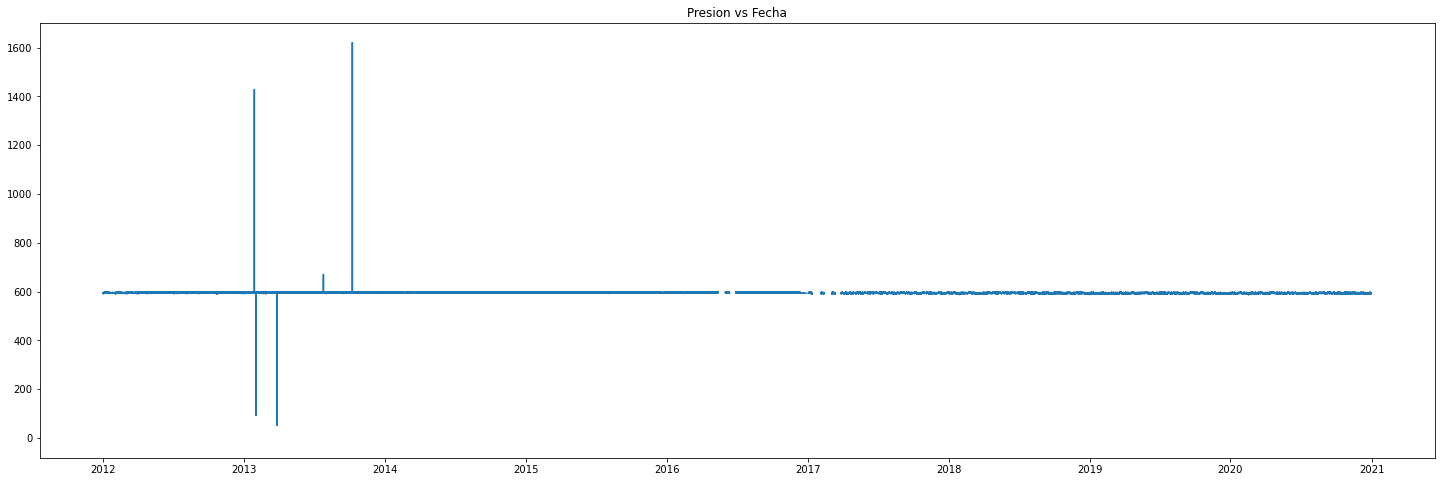

emas


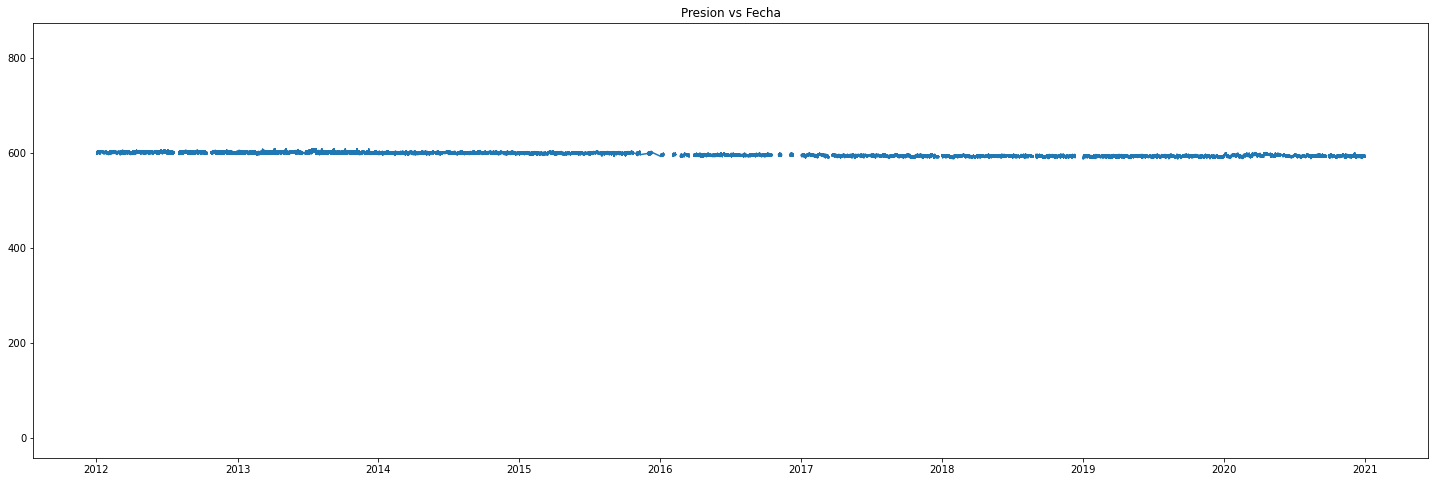

hospital_caldas


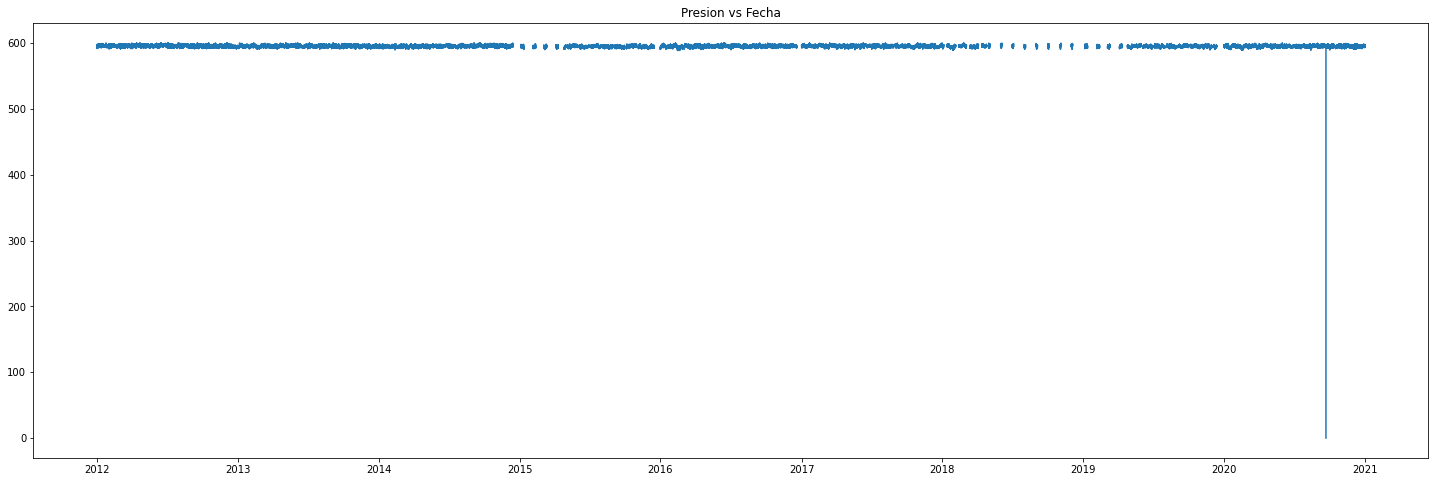

la_nubia


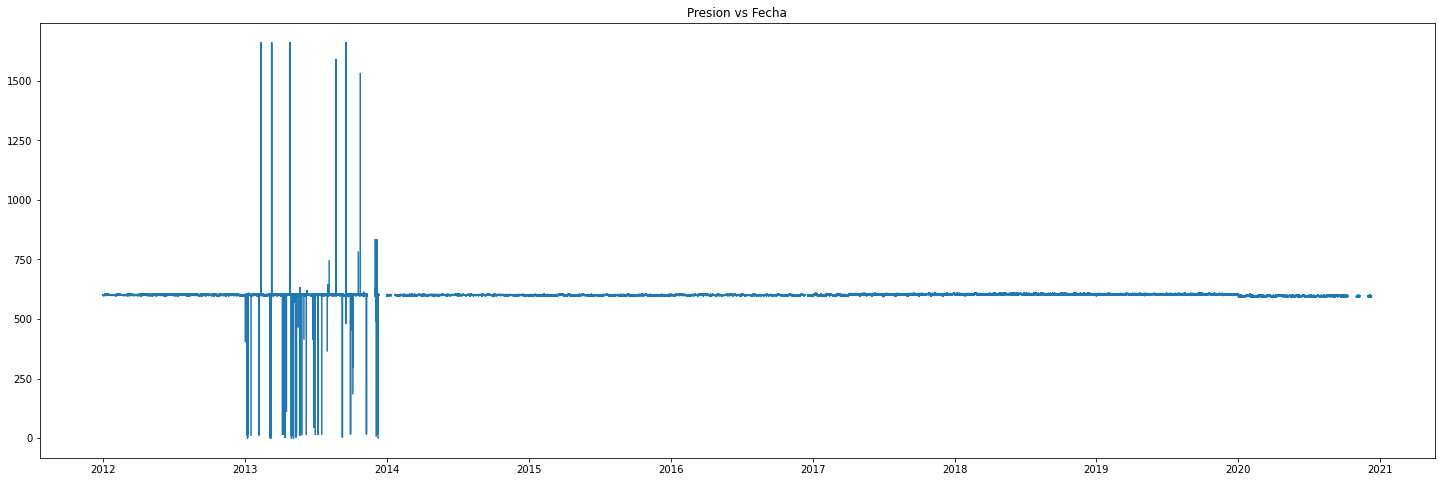

la_palma


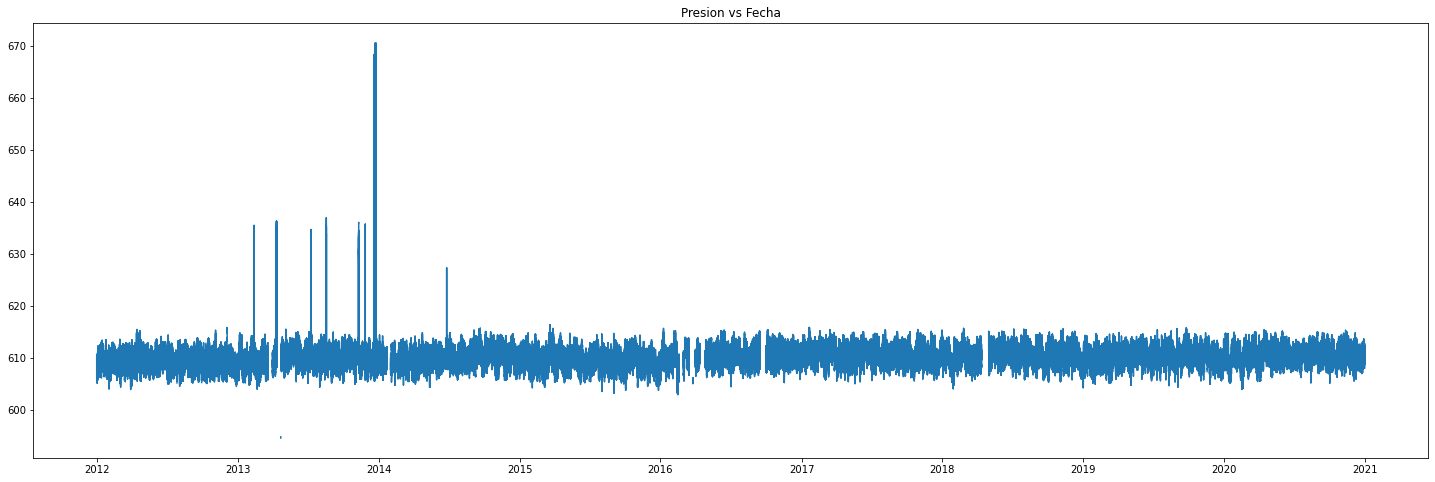

milan


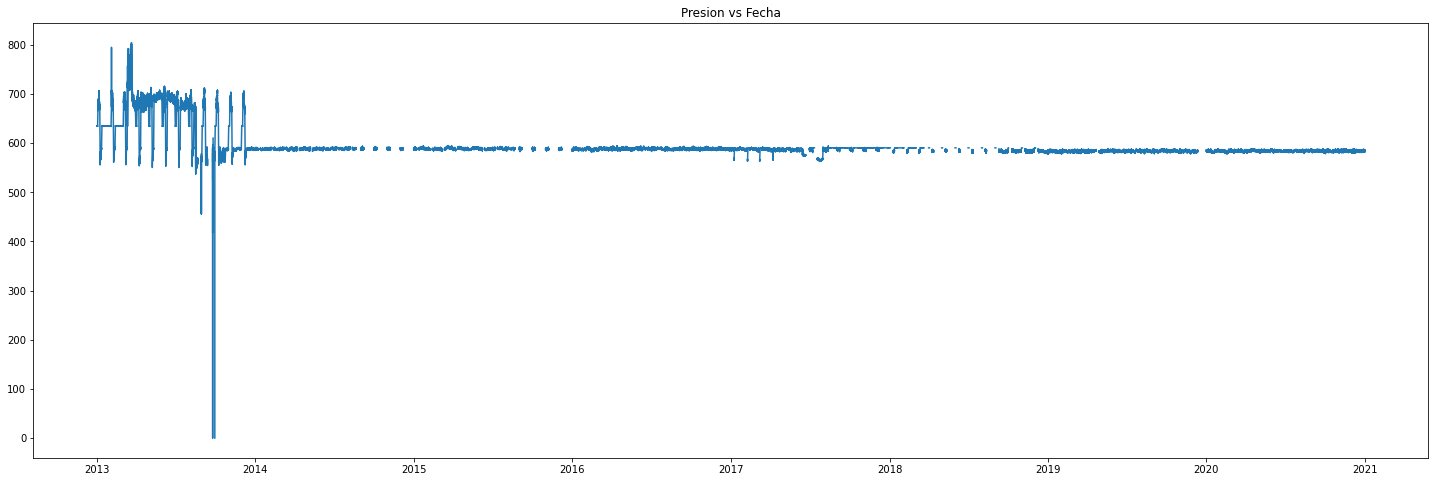

obs_vulcanologico


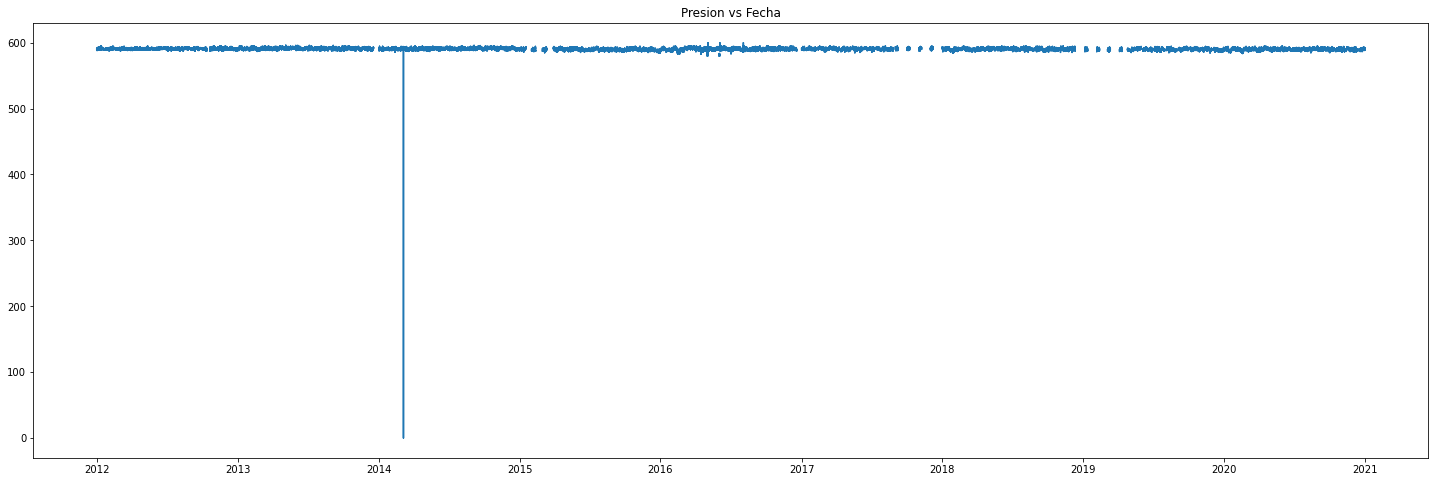

palogrande


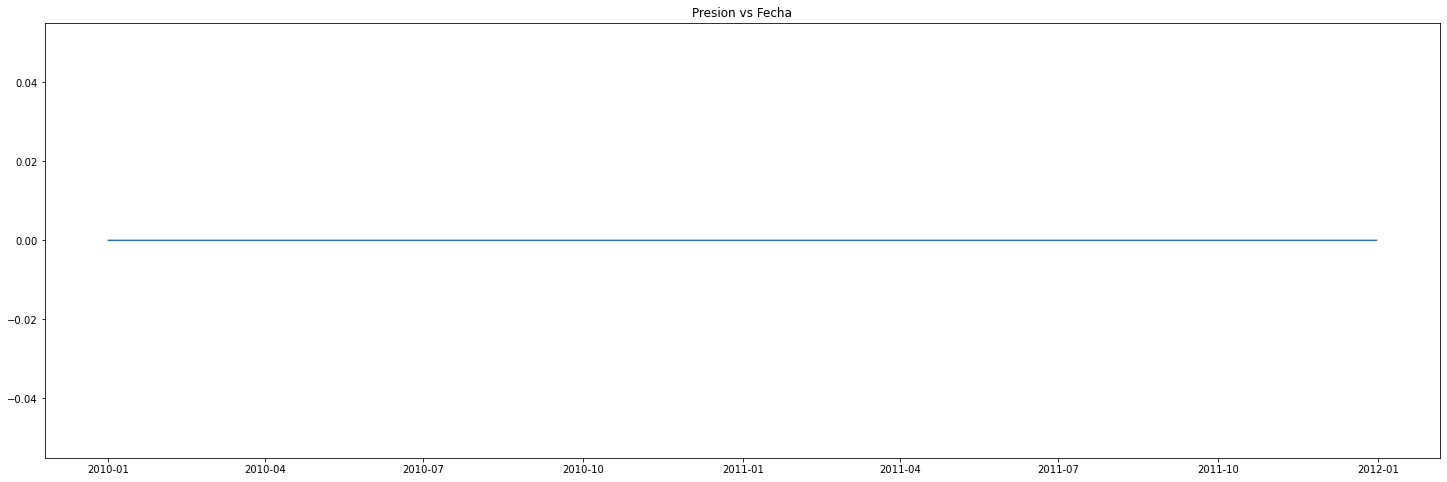

posgrados


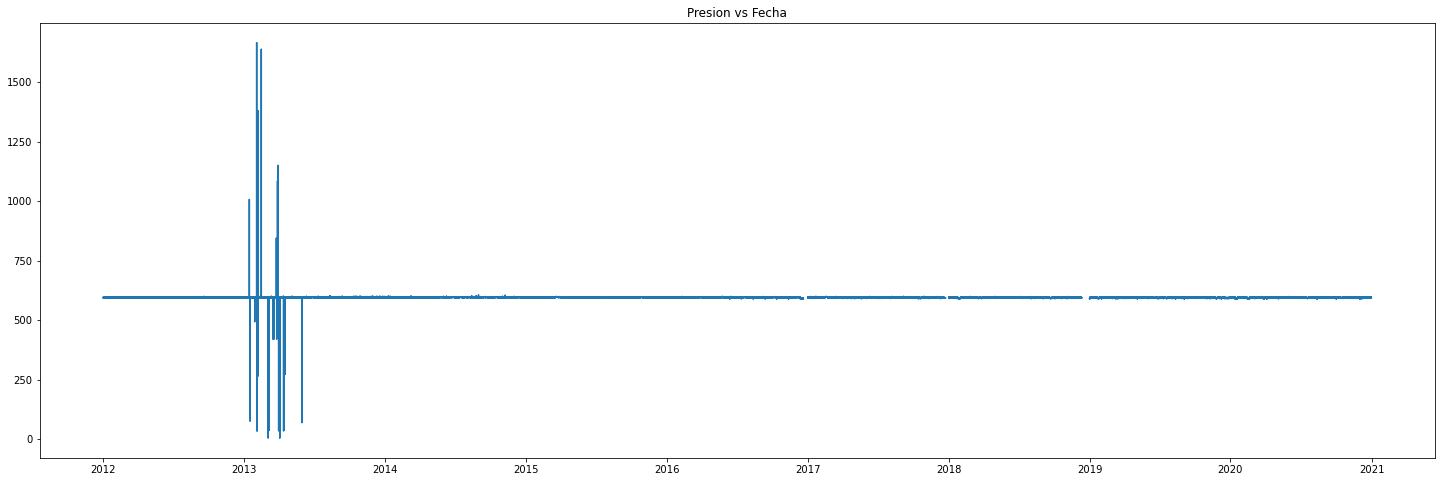

yarumos


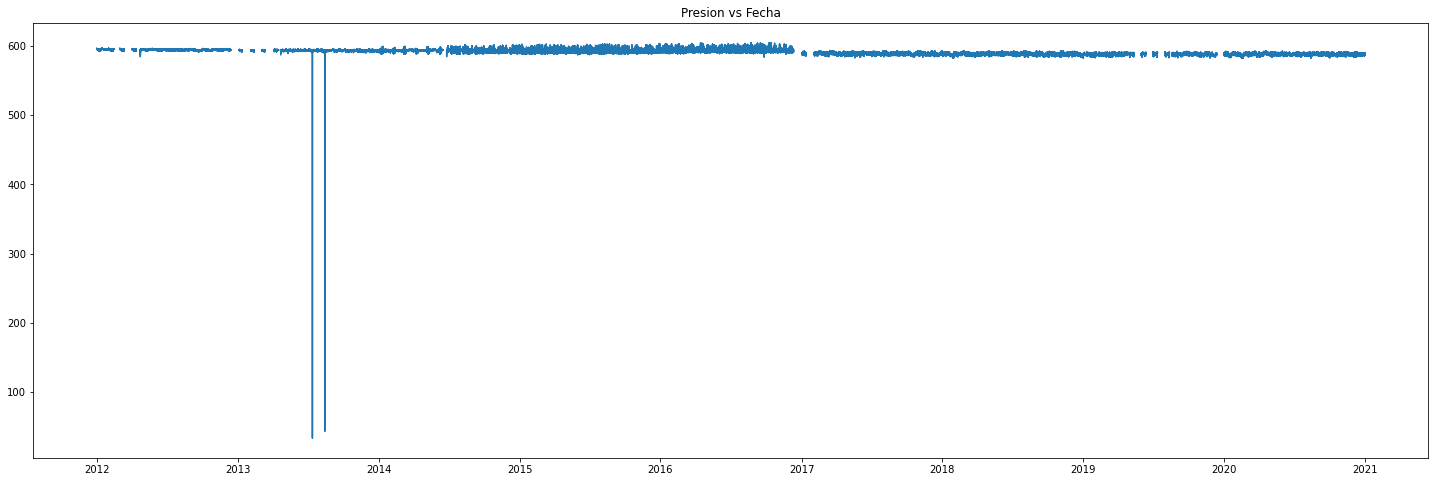

In [44]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Presion"]) 
    plt.title("Presion vs Fecha")  
    plt.show()

Estacion alcazares


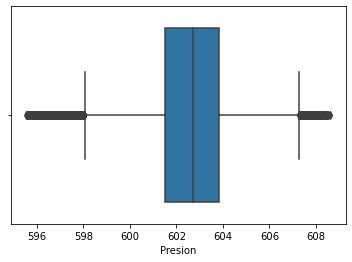

Estacion aranjuez


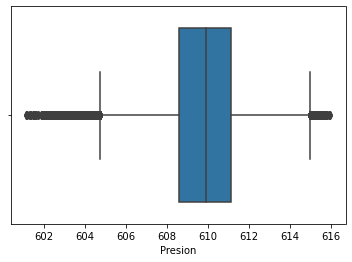

Estacion bosques_del_norte


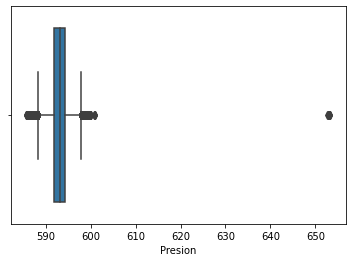

Estacion chec_uribe


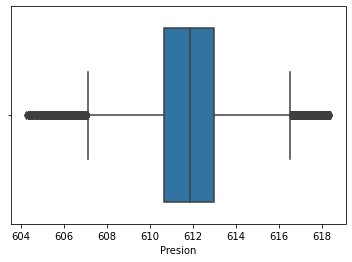

Estacion el_carmen


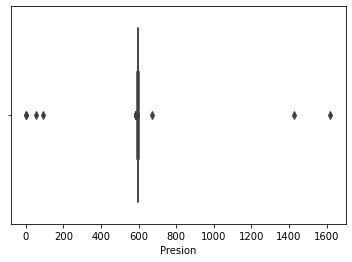

Estacion emas


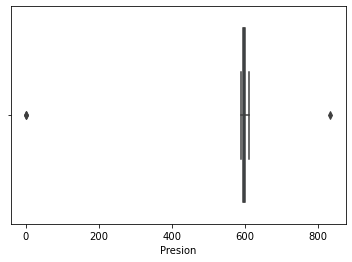

Estacion hospital_caldas


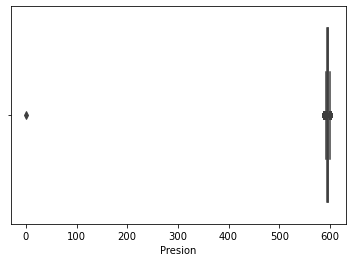

Estacion la_nubia


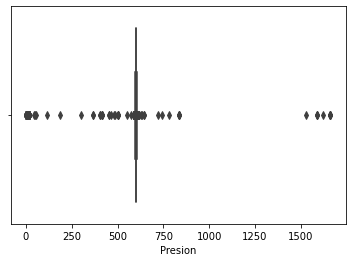

Estacion la_palma


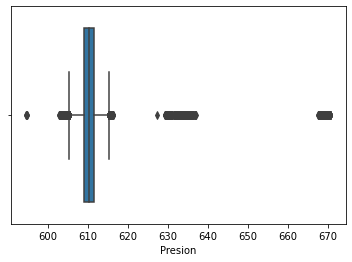

Estacion milan


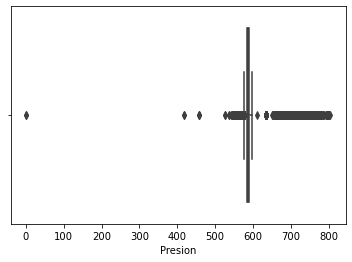

Estacion obs_vulcanologico


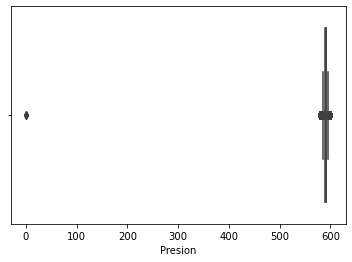

Estacion palogrande


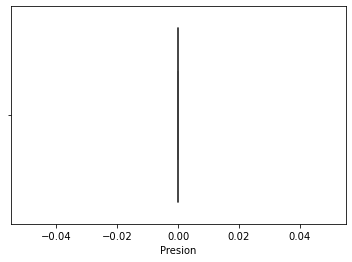

Estacion posgrados


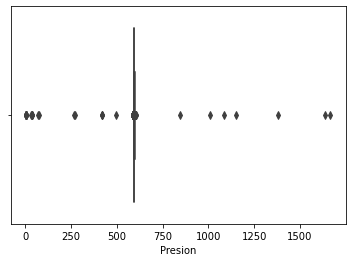

Estacion yarumos


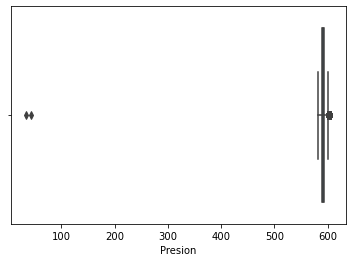

In [47]:
for i in datasets:
    print("Estacion", i.Estacion[0]) 
    sns.boxplot(x ="Presion", data = i) 
    plt.show() 
    

In [48]:
for i in datasets:
    print( "\n",i.Estacion[0])  
    print(i.Presion.min())   


 alcazares
595.53

 aranjuez
601.12

 bosques_del_norte
585.59

 chec_uribe
604.22

 el_carmen
0.0

 emas
0.0

 hospital_caldas
0.0

 la_nubia
0.0

 la_palma
594.54

 milan
0.0

 obs_vulcanologico
0.0

 palogrande
0.0

 posgrados
4.41

 yarumos
33.26


In [46]:
for i in datasets:
    print( "\n",i.Estacion[0])  
    print(i[i.Presion < 10].shape)    


 alcazares
(0, 13)

 aranjuez
(0, 13)

 bosques_del_norte
(0, 13)

 chec_uribe
(0, 13)

 el_carmen
(2, 13)

 emas
(2, 13)

 hospital_caldas
(1, 13)

 la_nubia
(18, 13)

 la_palma
(0, 13)

 milan
(2, 13)

 obs_vulcanologico
(3, 13)

 palogrande
(205002, 13)

 posgrados
(11, 13)

 yarumos
(0, 13)


In [25]:
datasets_2 = [el_carmen, emas, hospital_caldas, la_nubia, milan,la_palma, obs_vulcanologico, posgrados, yarumos]

In [41]:
Q1 = posgrados.Presion.quantile(0.25) 
Q3 = posgrados.Presion.quantile(1) 
IQR = Q3-Q1

In [42]:
print(Q3)

597.05


In [40]:
#posgrados[~((posgrados.Presion < (Q1 - 1.5 * IQR)) |(posgrados.Presion > (Q3 + 1.5 * IQR)) & (posgrados.Presion != np.nan))]    

In [38]:
for i in datasets_2: 
    Q1 = i.Presion.quantile(0)
    Q3 = i.Presion.quantile(1)
    IQR = Q3-Q1
    promedio = i[~((i.Presion < (Q1 - 1.5 * IQR))|(i.Presion > (Q3 + 1.5 * IQR)) & (i.Presion != np.nan))].Presion.mean()
    i["Presion"] = np.where((i.Presion < Q1) | (i.Presion > Q3), promedio, i["Presion"]) 
    

alcazares


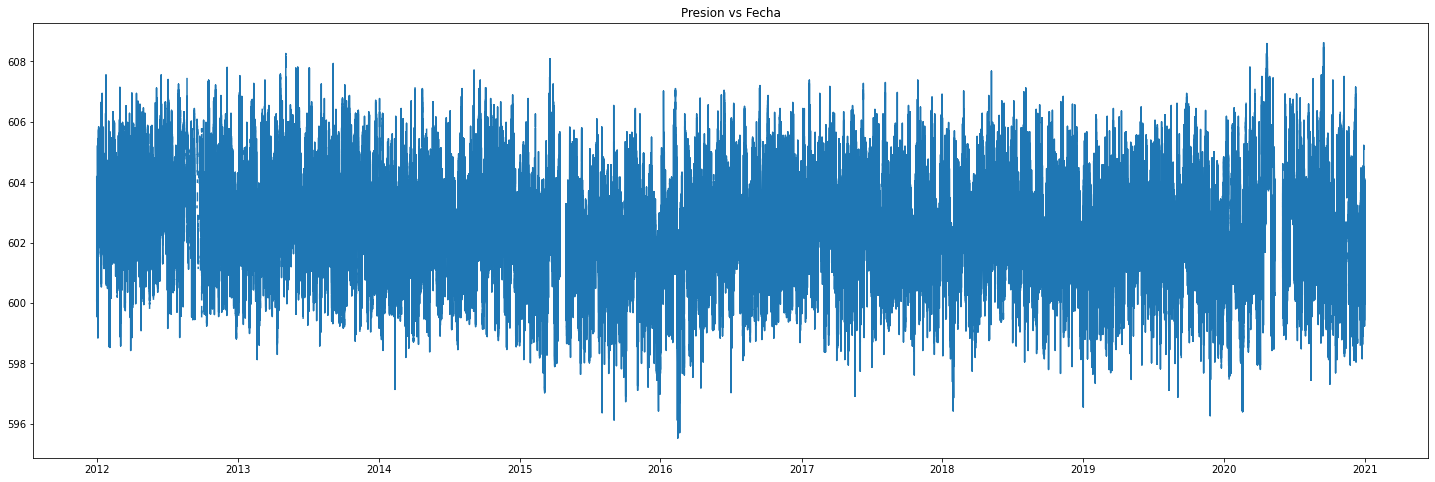

aranjuez


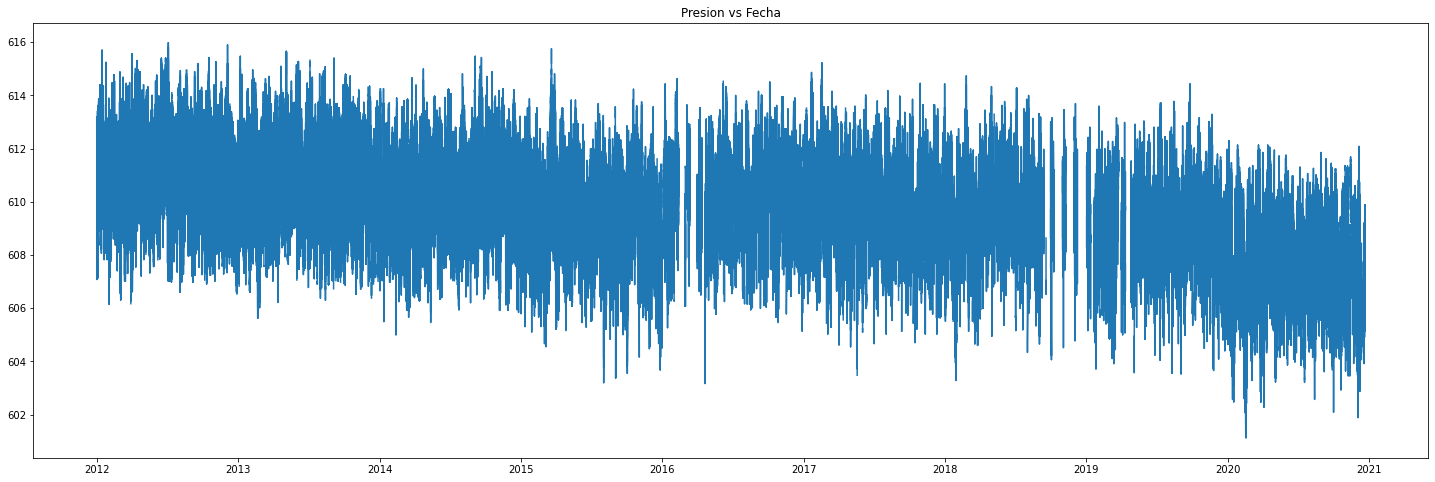

bosques_del_norte


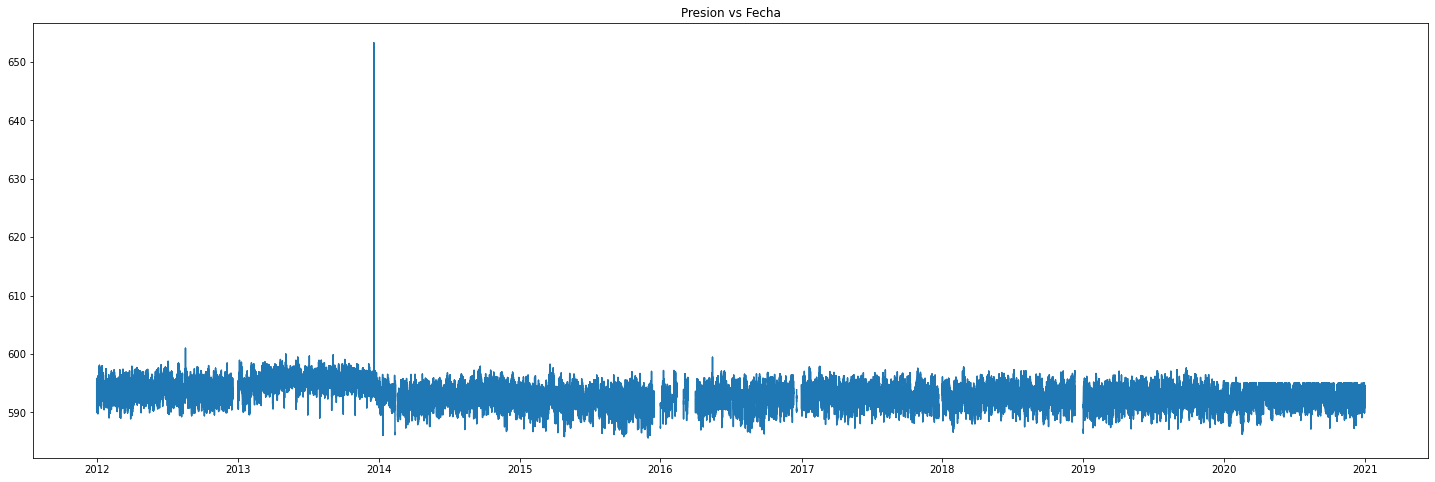

chec_uribe


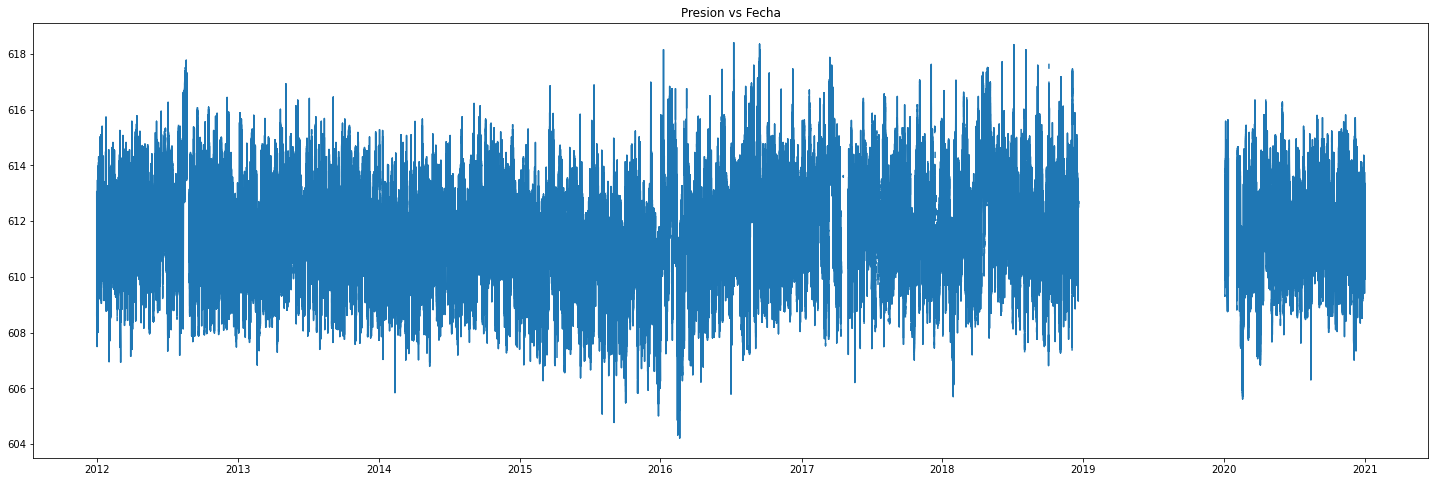

el_carmen


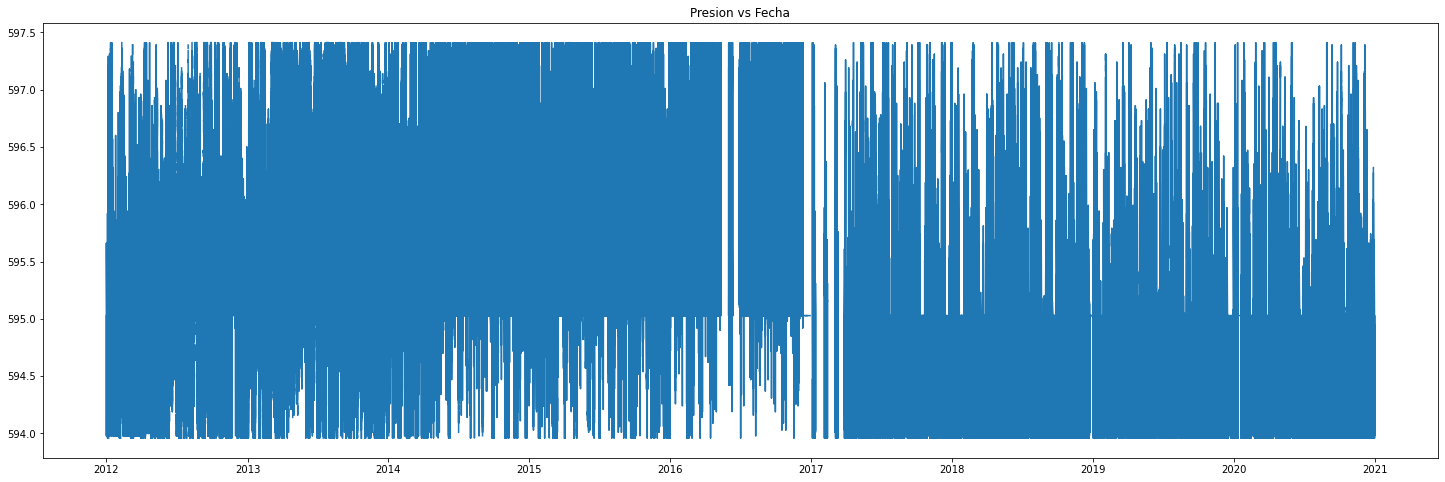

emas


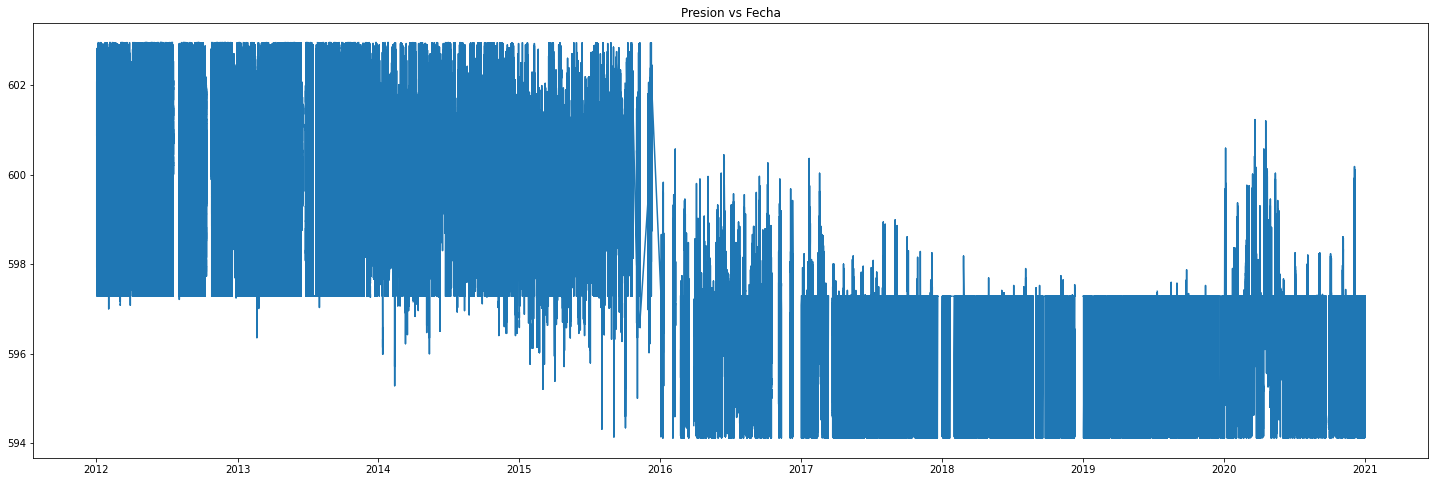

hospital_caldas


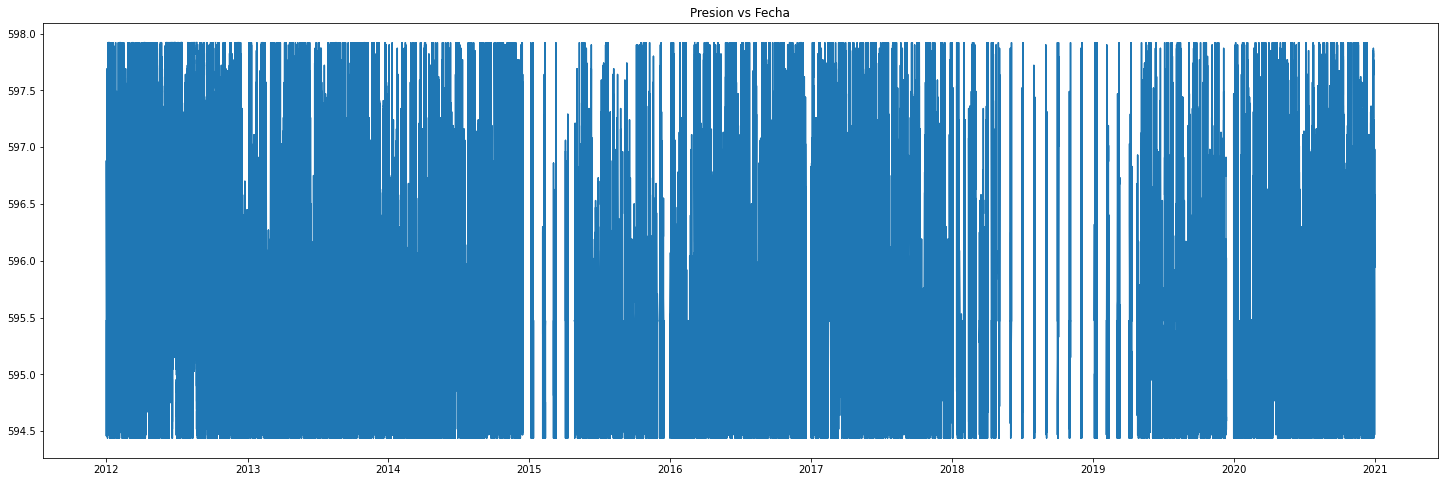

la_nubia


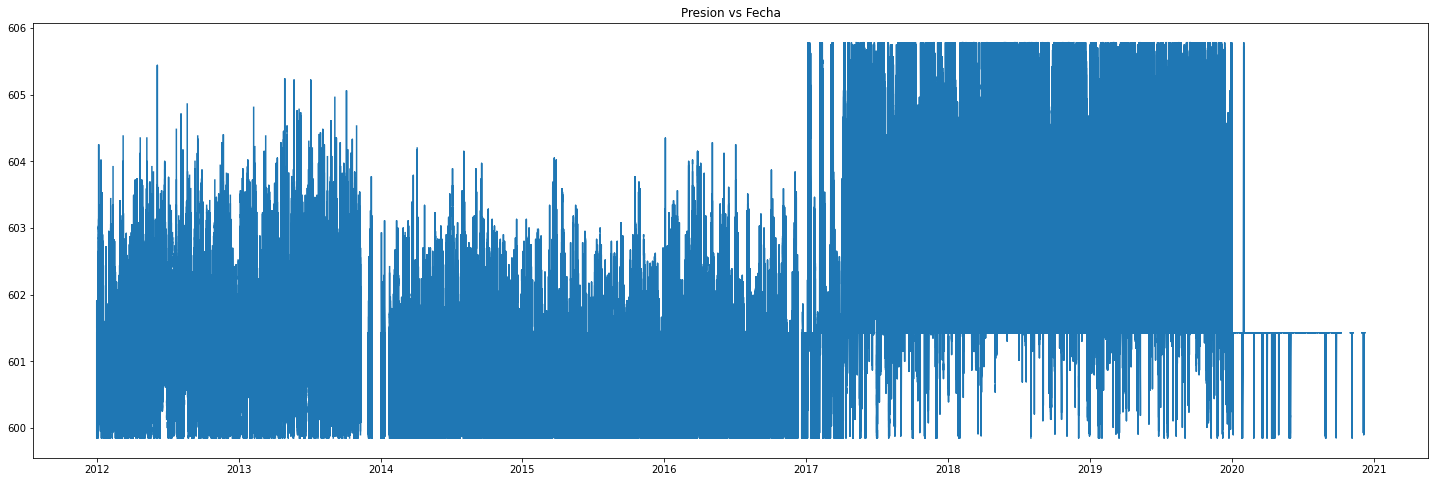

la_palma


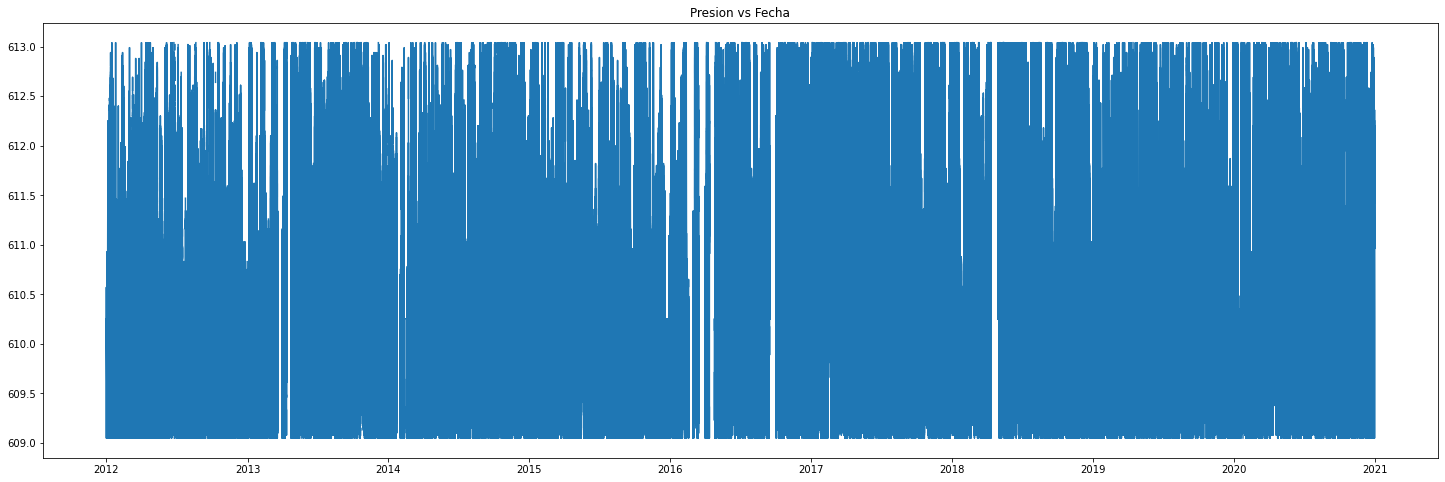

milan


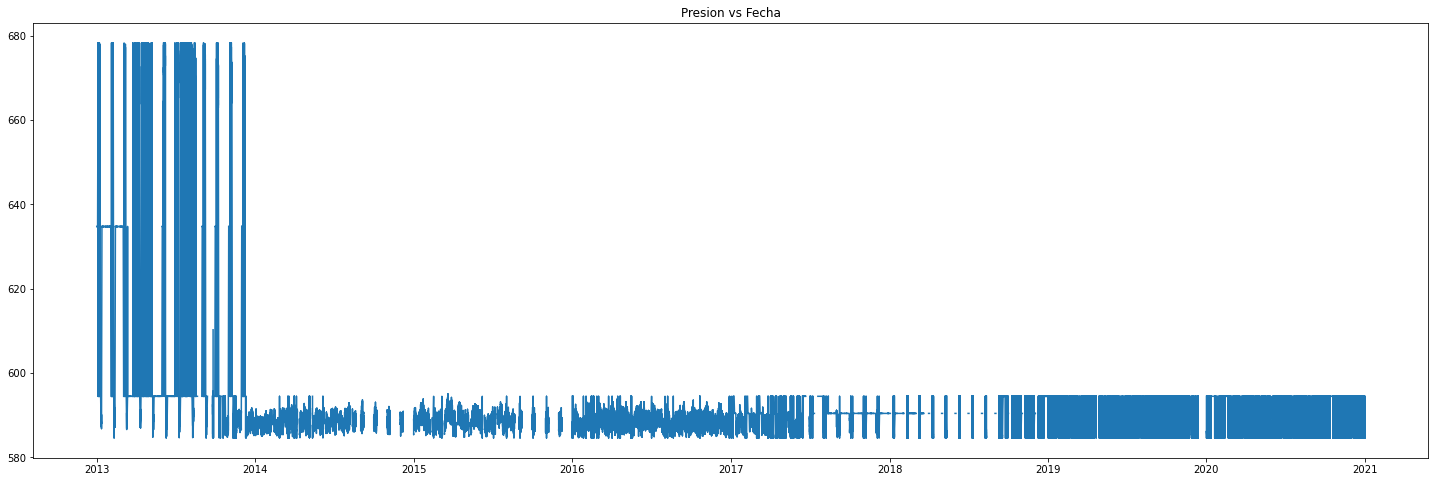

obs_vulcanologico


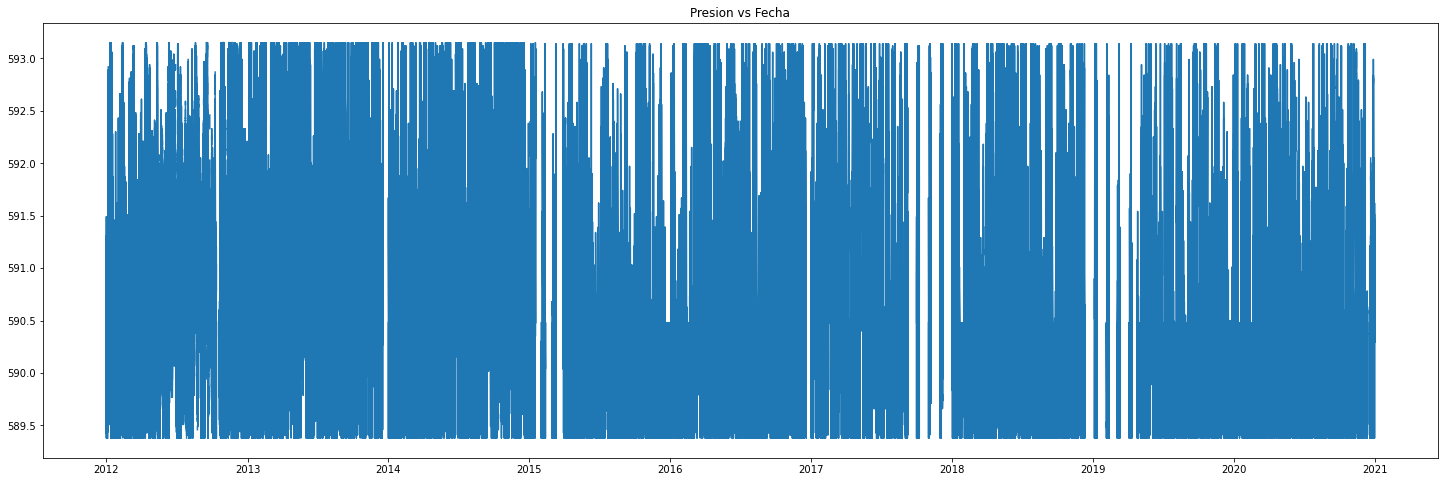

palogrande


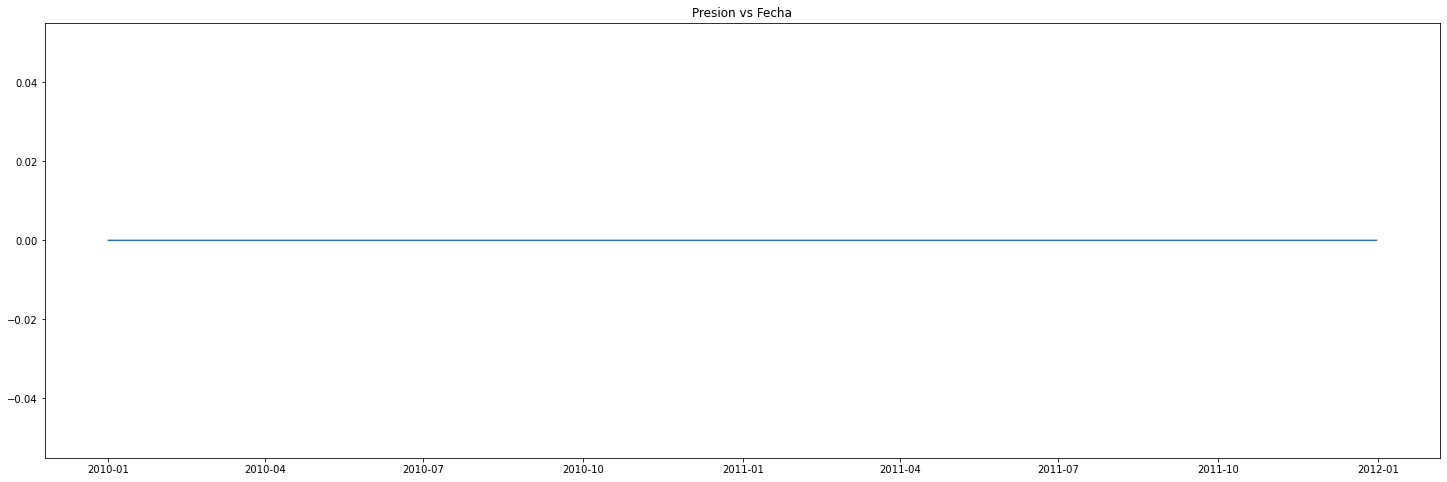

posgrados


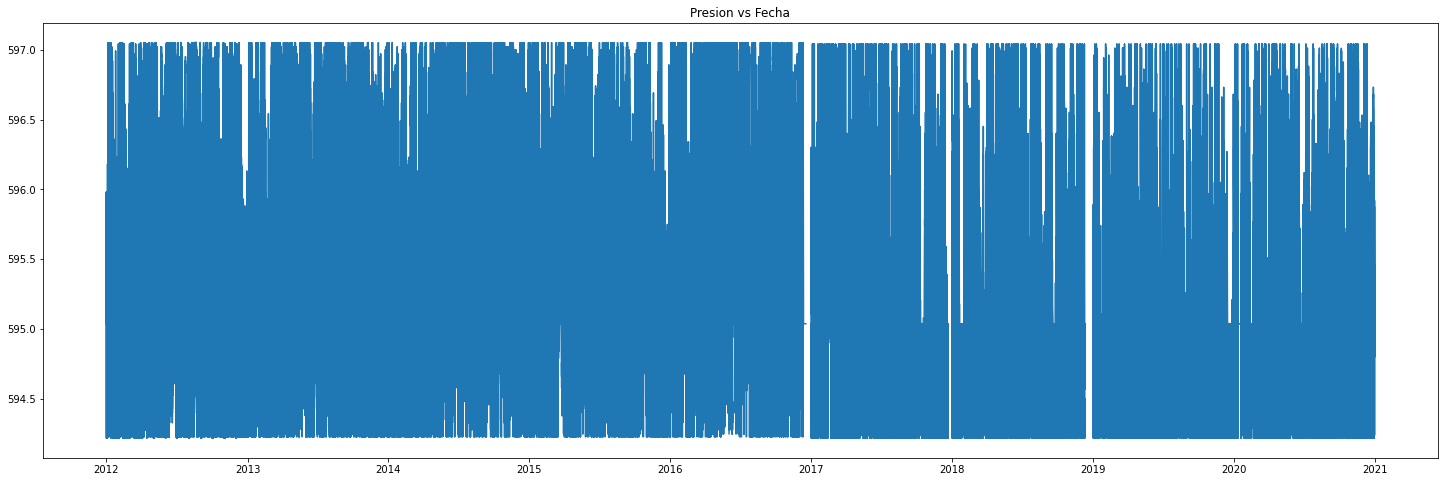

yarumos


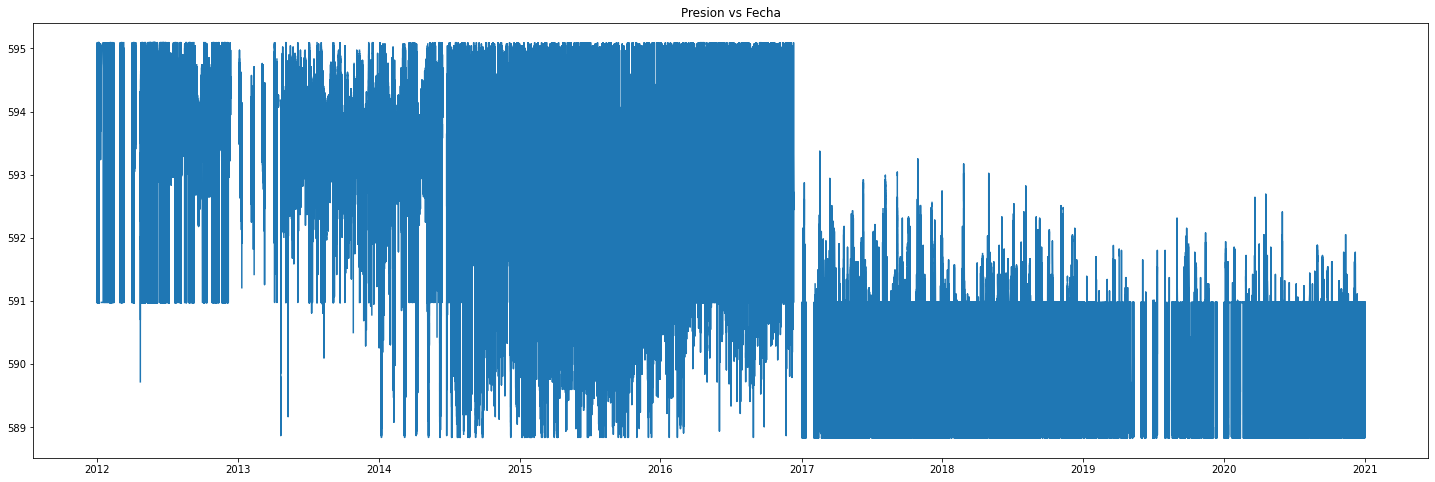

In [39]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Presion"]) 
    plt.title("Presion vs Fecha")  
    plt.show()

## Humedad

alcazares


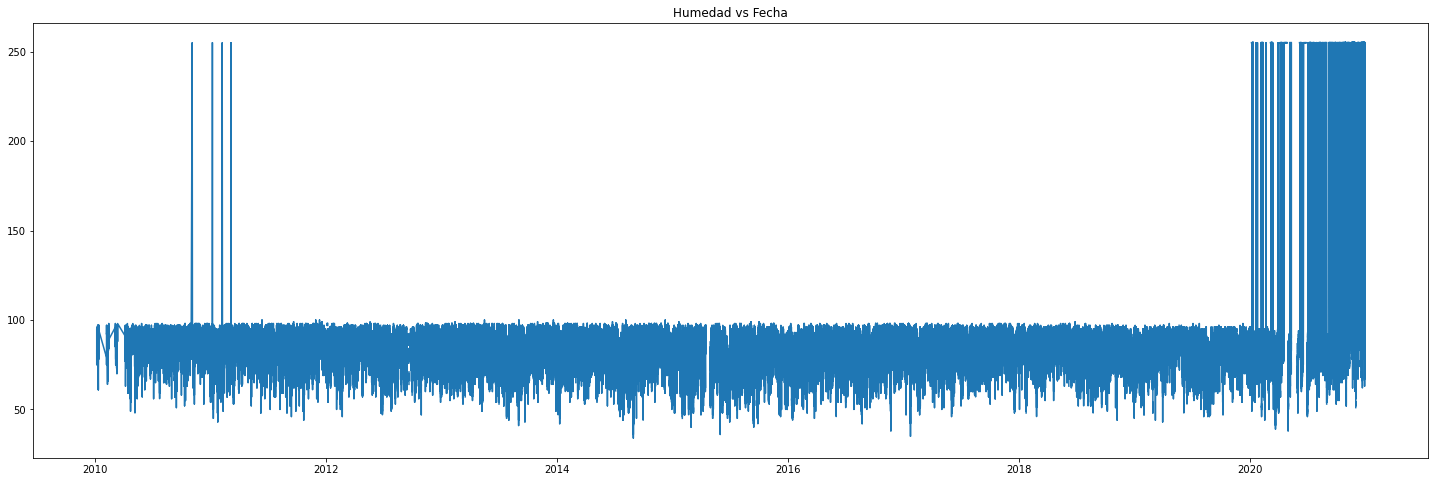

aranjuez


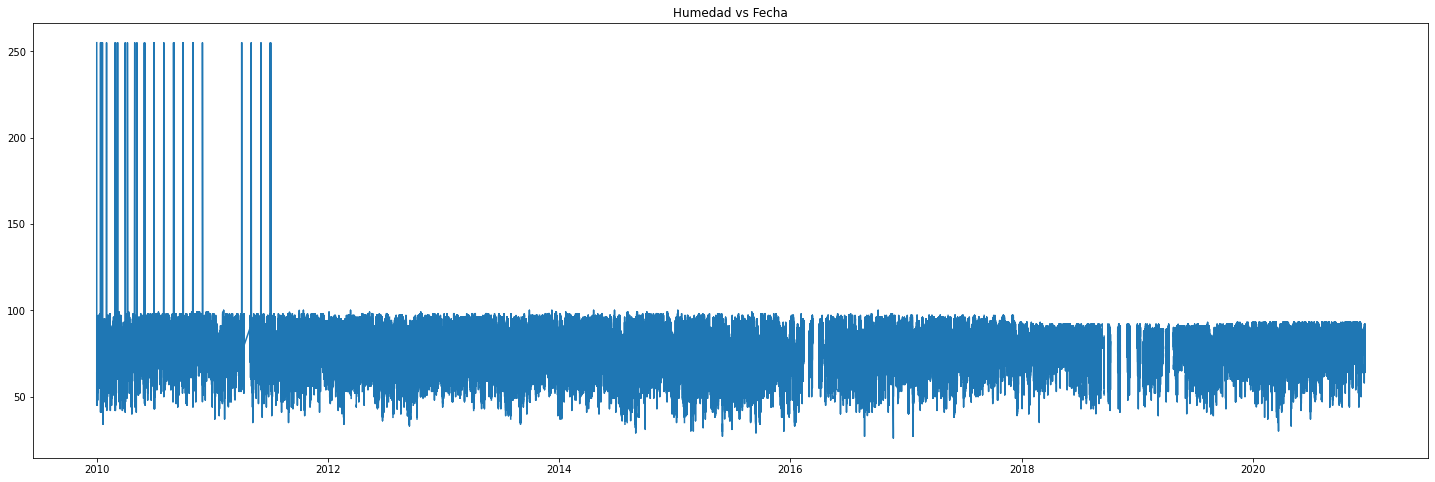

bosques_del_norte


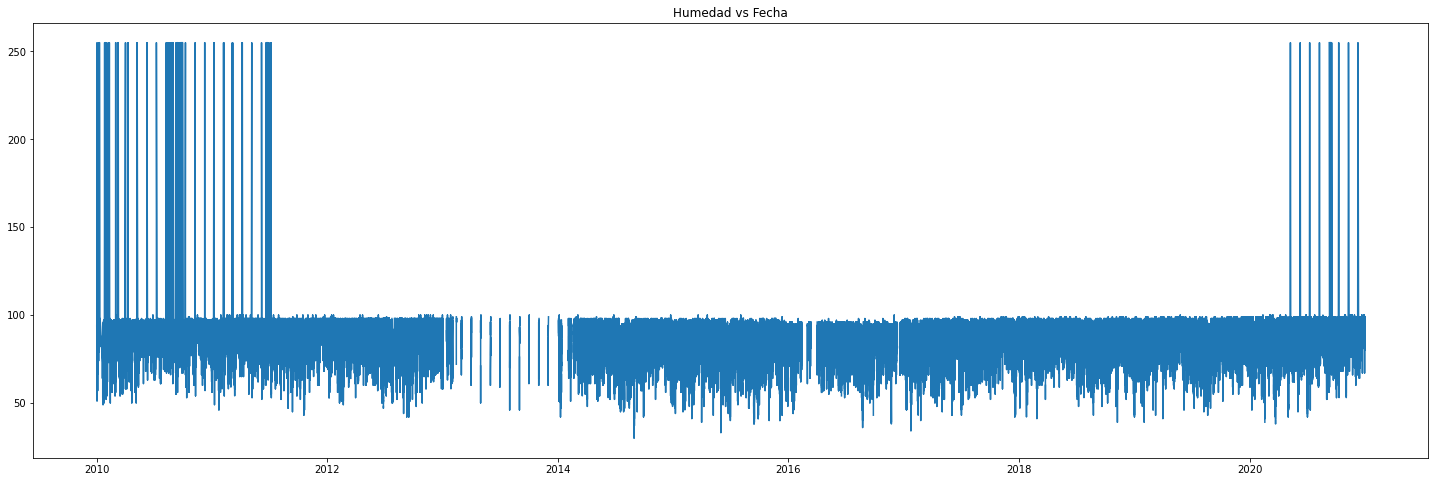

chec_uribe


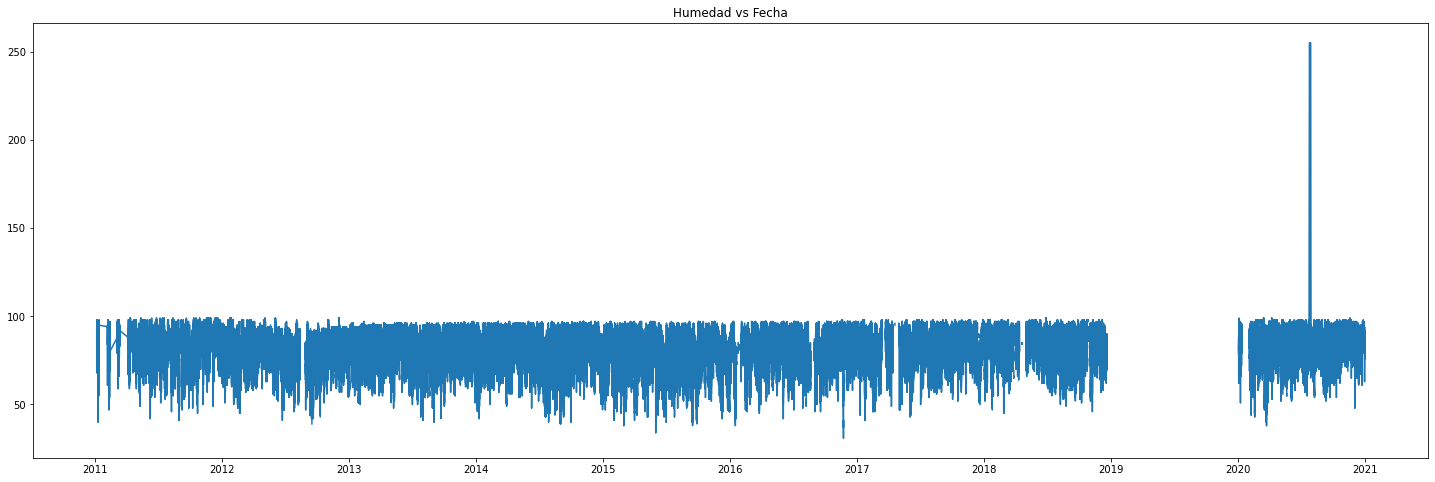

el_carmen


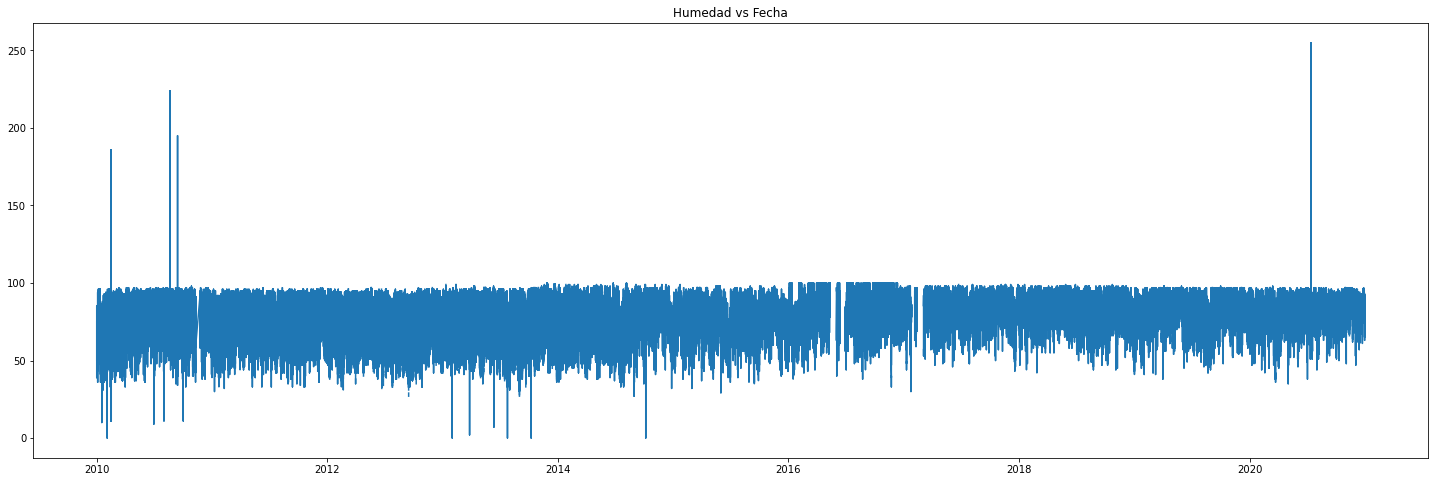

emas


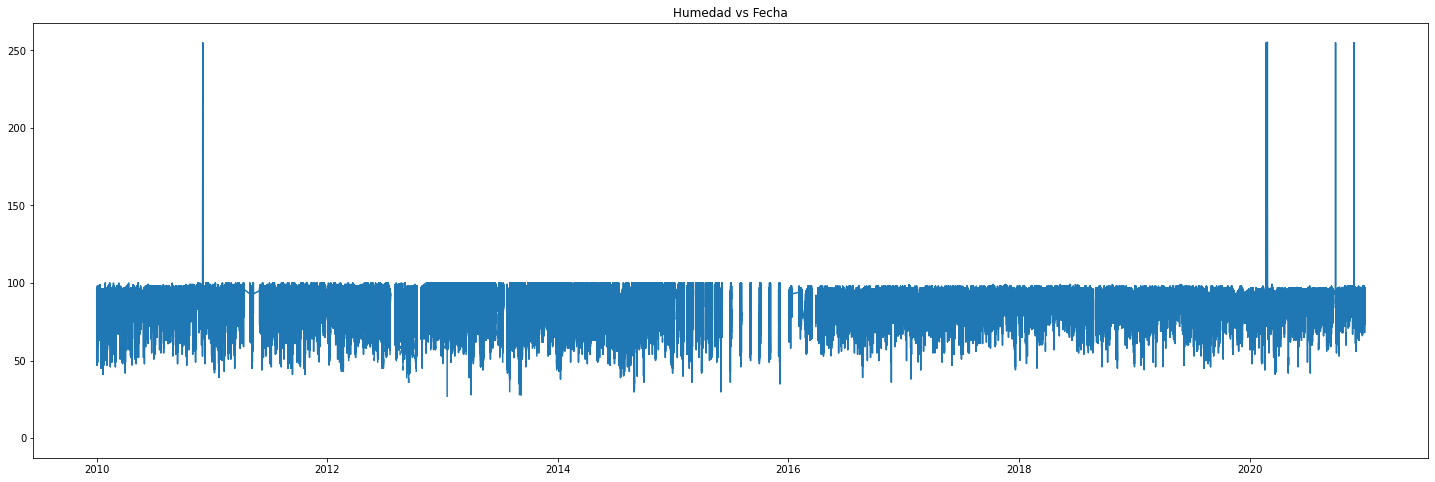

hospital_caldas


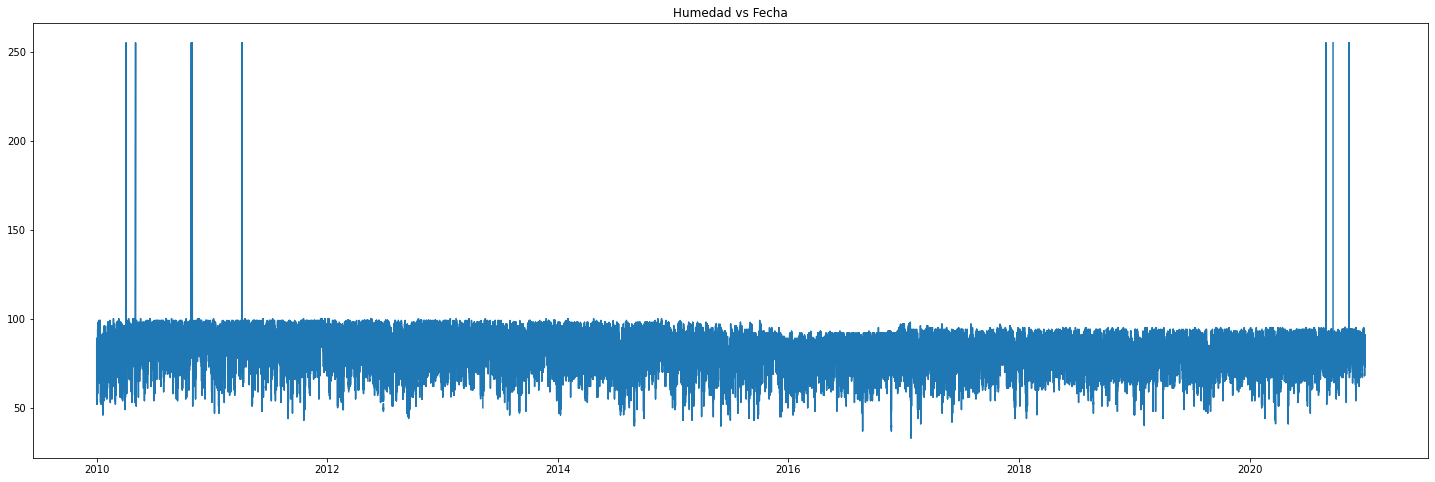

la_nubia


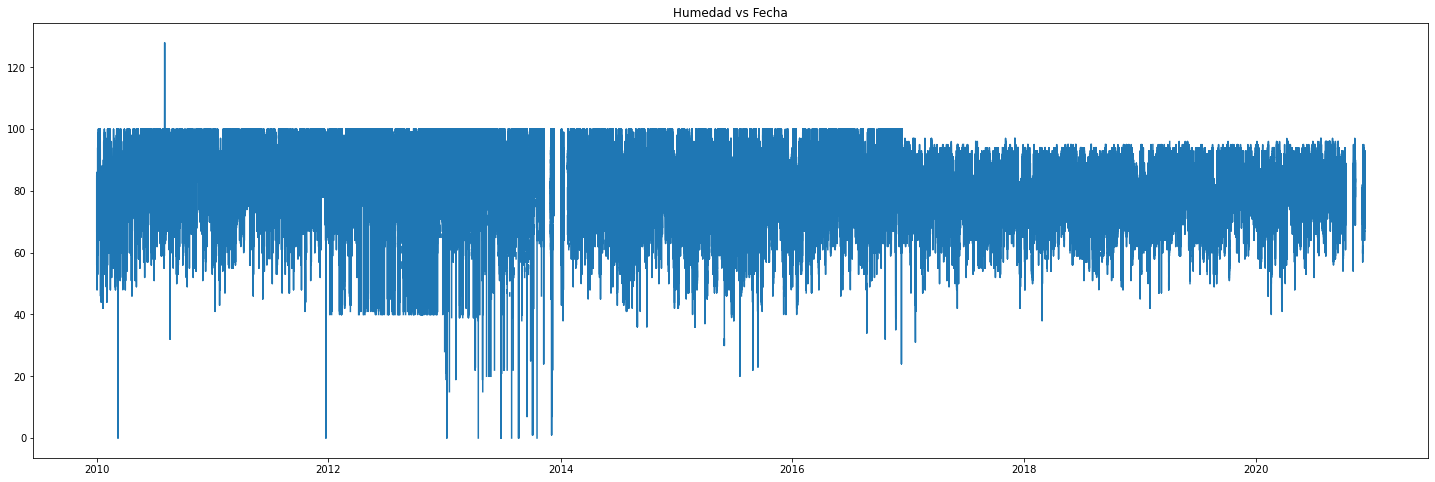

la_palma


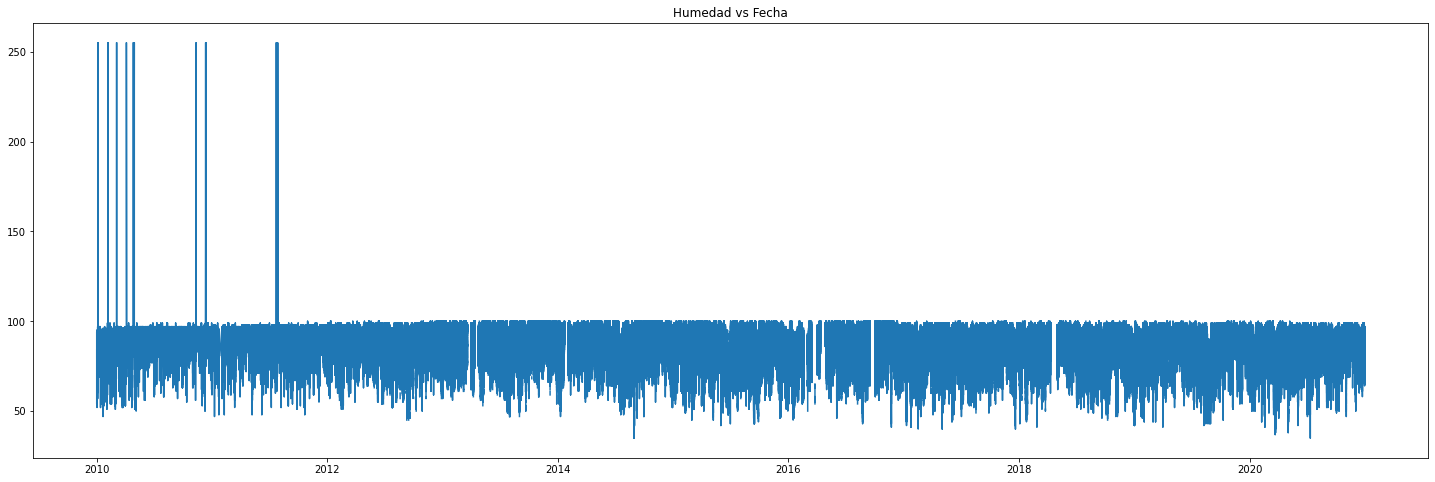

milan


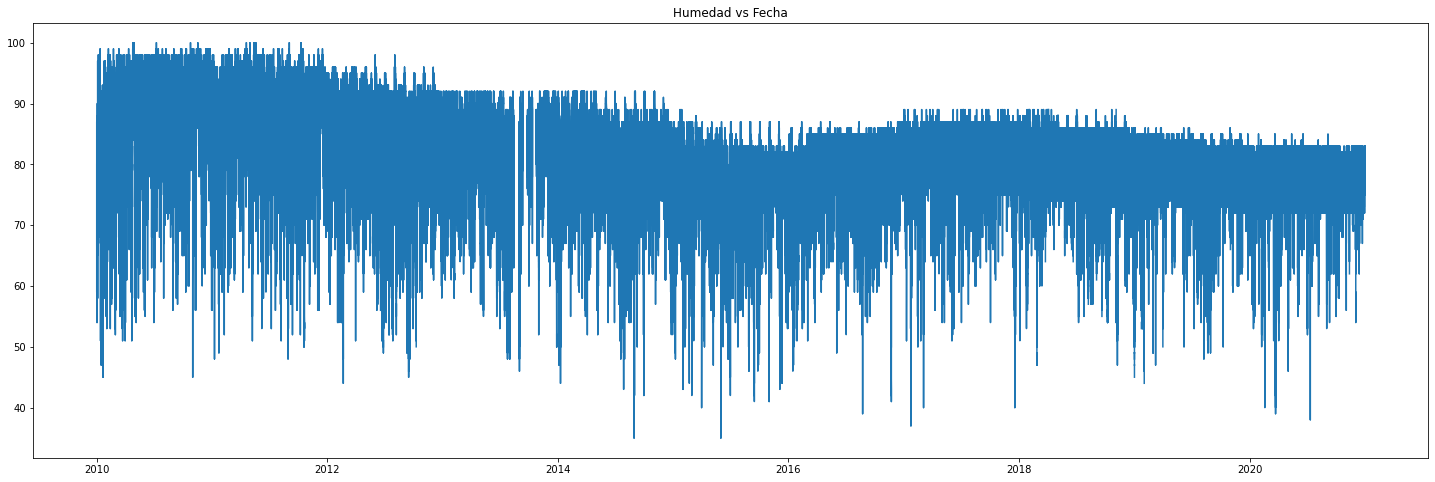

obs_vulcanologico


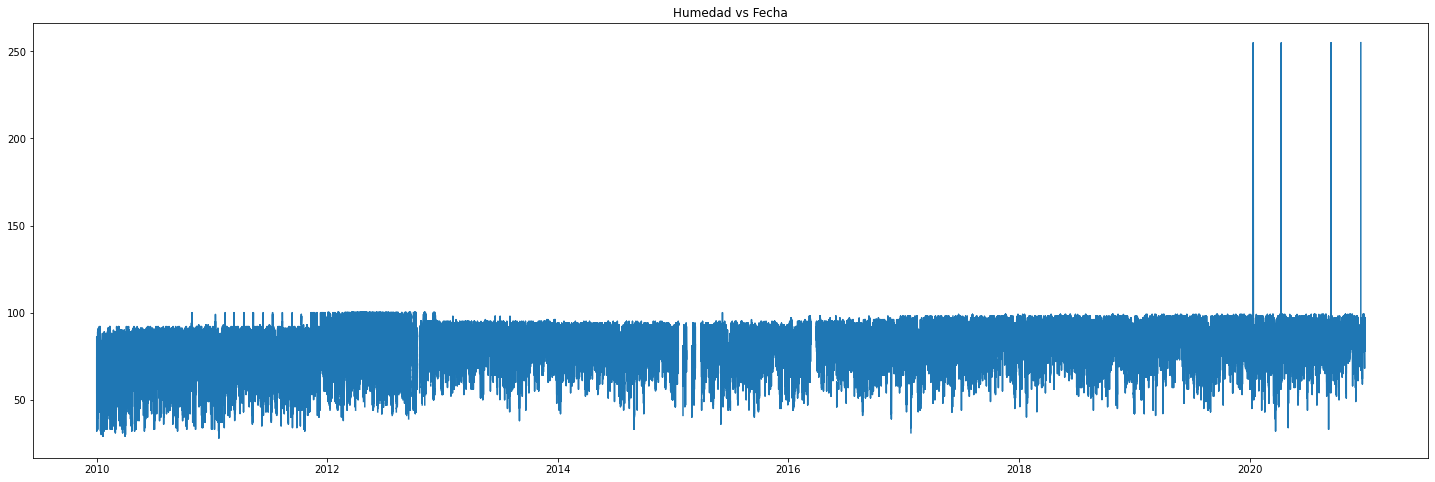

palogrande


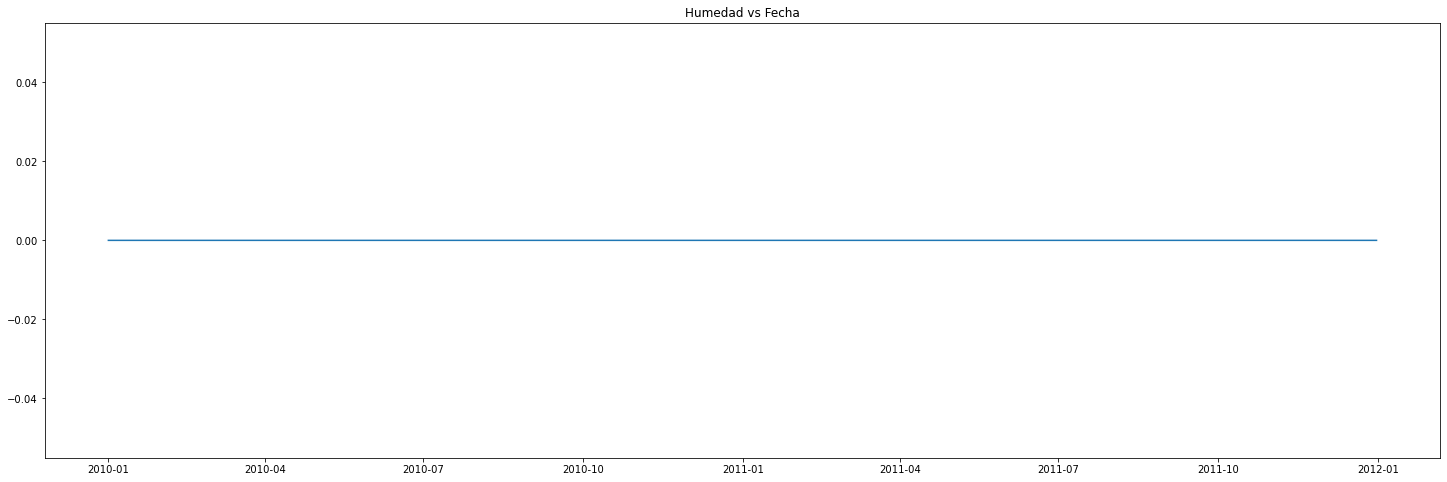

posgrados


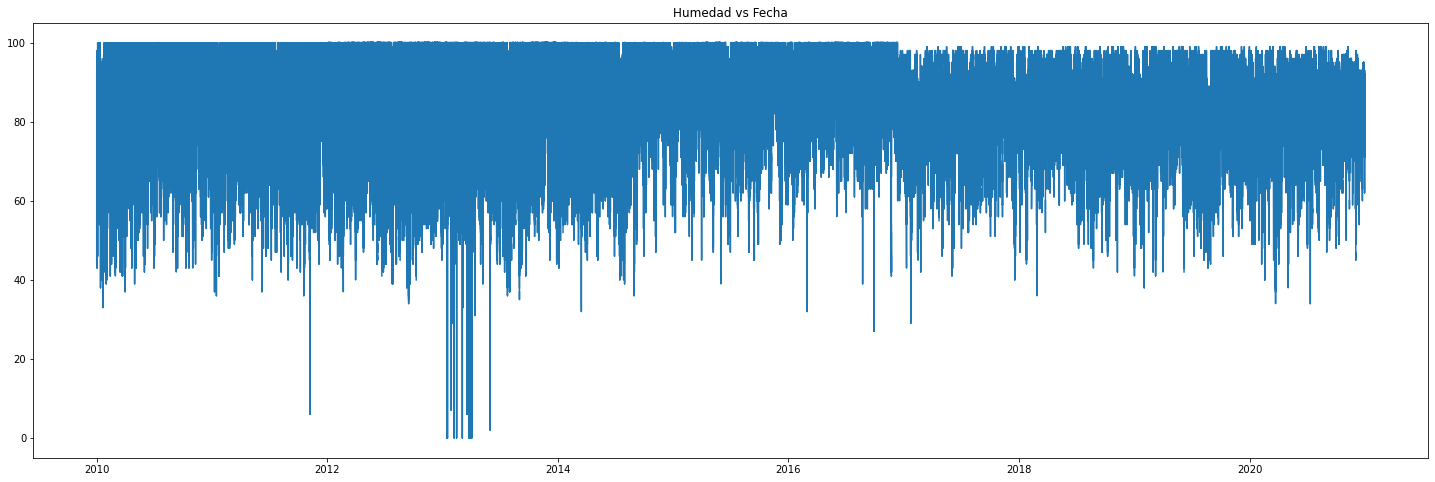

yarumos


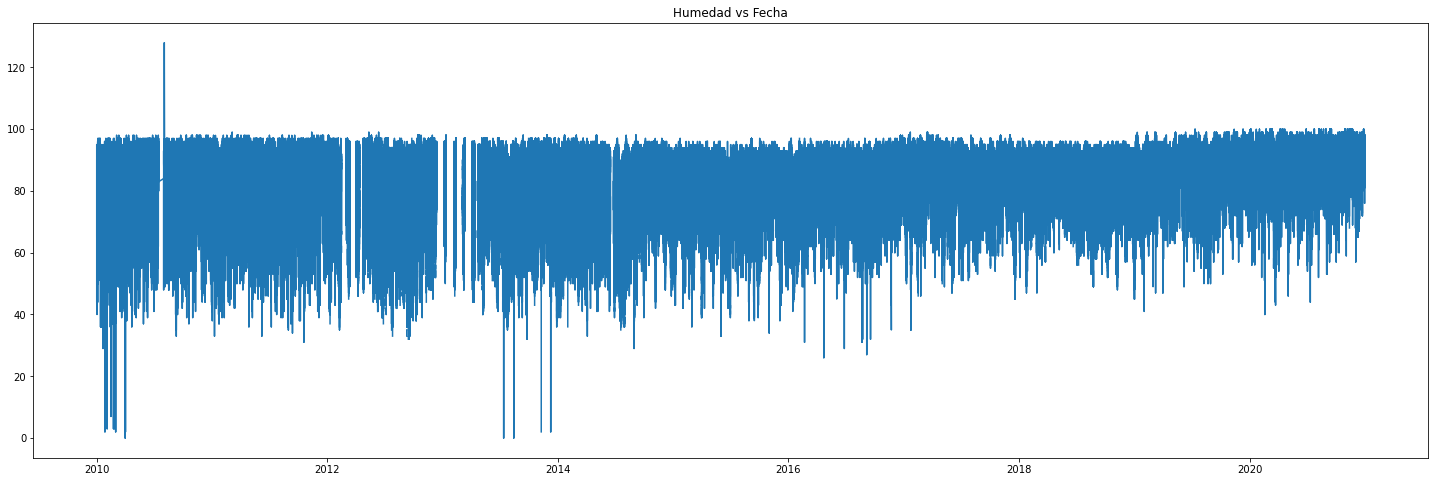

In [54]:
for i in datasets:   
    
    plt.figure(figsize=(25,8))
    print(i.Estacion[0])
    plt.plot(i.Fecha, i["Humedad"])  
    plt.title("Humedad vs Fecha")   
    plt.show()

Estacion alcazares


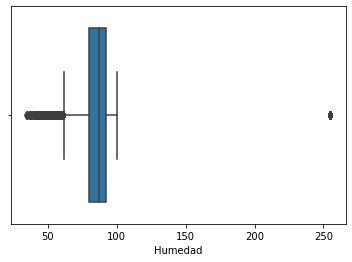

Estacion aranjuez


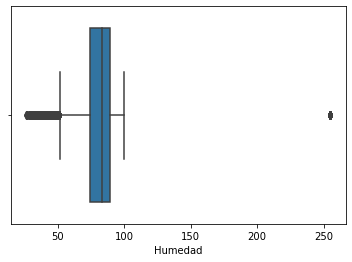

Estacion bosques_del_norte


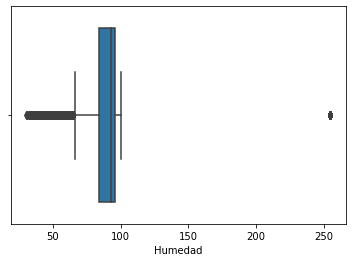

Estacion chec_uribe


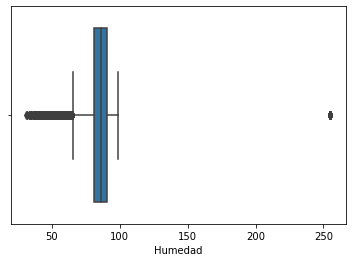

Estacion el_carmen


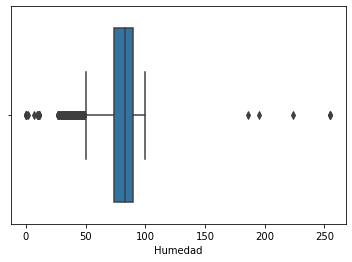

Estacion emas


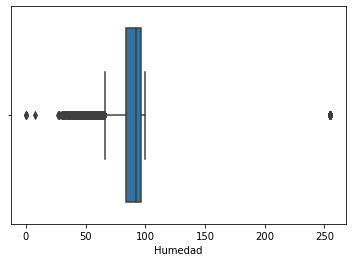

Estacion hospital_caldas


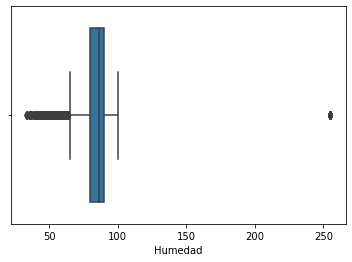

Estacion la_nubia


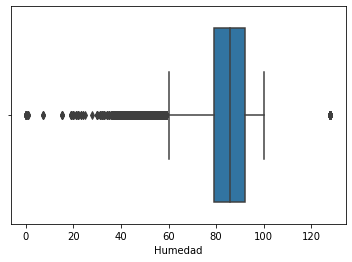

Estacion la_palma


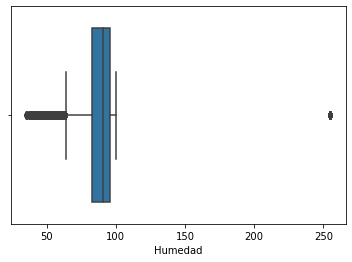

Estacion milan


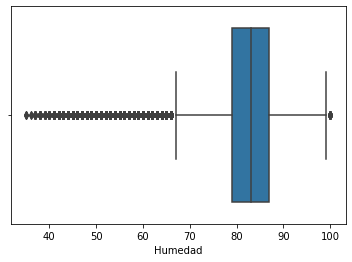

Estacion obs_vulcanologico


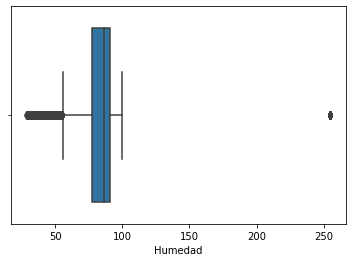

Estacion palogrande


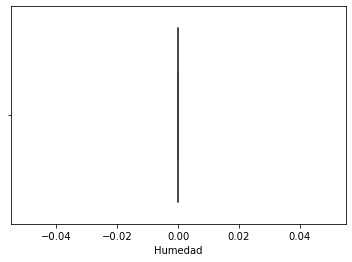

Estacion posgrados


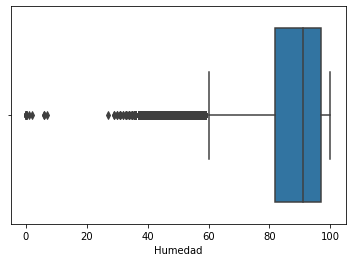

Estacion yarumos


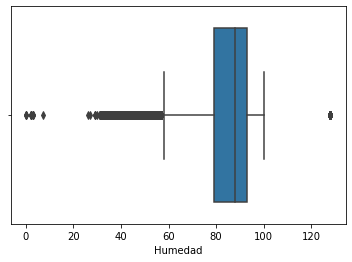

In [55]:
for i in datasets:
    print("Estacion", i.Estacion[0]) 
    sns.boxplot(x ='Humedad', data = i) 
    plt.show() 
    

**La humedad esta dada en un rango de 0 a 100 %, por lo tanto se eliminara cualquier valor por encima.**

In [58]:
aranjuez.shape 

(1121858, 13)

In [57]:
for i in datasets:
    print( "\n",i.Estacion[0])  
    print(i[i.Humedad > 100].shape)    


 alcazares
(38048, 13)

 aranjuez
(3591, 13)

 bosques_del_norte
(16616, 13)

 chec_uribe
(693, 13)

 el_carmen
(6, 13)

 emas
(32, 13)

 hospital_caldas
(876, 13)

 la_nubia
(34, 13)

 la_palma
(1914, 13)

 milan
(0, 13)

 obs_vulcanologico
(242, 13)

 palogrande
(0, 13)

 posgrados
(0, 13)

 yarumos
(51, 13)


In [ ]:
datasets_3 = [chec_uribe, el_carmen, emas, hospital_caldas, la_nubia, la_palma, obs_vulcanologico, yarumos]

In [ ]:
for i in datasets_3:
    i.drop(i.loc[i.Humedad > 100].index, inplace = True)

**Para las estaciones con valores mayores a 100 con mas de 3000 columnas, se reemplazaran por la media.**

In [ ]:
datasets_4 = [alcazares, aranjuez, bosques_del_norte]

In [ ]:
n = 100
for i in datasets_4:
    promedio = i[(i.Humedad <= n)].Humedad.mean()
    i["Humedad"] = np.where((i.Humedad > n), promedio, i["Humedad"])
    

In [135]:
for i in datasets:
    print("Estacion",i.Estacion[0], "\n")   
    print(i.isnull().sum()) 
    print("//---//")    

Estacion alcazares 

Fecha                     0
Hora                      0
Temperatura           70555
Velocidad             70478
Direccion             70486
Presion               57458
Humedad               70548
Precipitacion         55859
Radiacion             69513
Evapotranspiracion    56422
Precipitacion_Real    55856
Evapo_real            56422
Estacion                  0
dtype: int64
//---//
Estacion aranjuez 

Fecha                      0
Hora                       0
Temperatura           105654
Velocidad             105475
Direccion             105653
Presion               105652
Humedad               105656
Precipitacion         104971
Radiacion             105477
Evapotranspiracion    105472
Precipitacion_Real    105004
Evapo_real            105472
Estacion                   0
dtype: int64
//---//
Estacion bosques_del_norte 

Fecha                      0
Hora                       0
Temperatura           170691
Velocidad              66075
Direccion              66095
Pr

alcazares 
aranjuez 
bosques_del_norte 
chec_uribe 
el_carmen 
emas 
hospital_caldas 
la_nubia
la_palma 
milan 
obs_vulcanologico 
palogrande 
posgrados 
yarumos

In [13]:
def hour(data1, column_name):

        """
        cambia la fecha y lo deja en una hora sin minutos y segundos. 
        data, "column_name"
        """
        data1[column_name] = data1[column_name].str[:-5]
        data1[column_name] = data1[column_name] + '00:00'
        return data1 

In [14]:
def group(data, column_name, frec):

        """
        Esta funcion agrupa por serie de tiempo en dias para obtener la media los datos
        """
        data = data.groupby([pd.Grouper(key=column_name, freq=frec)]).mean() 
        data = data.reset_index()
        data[column_name] = pd.to_datetime(data[column_name]) 
        data[column_name] = data[column_name].sort_values(ascending=False)
        data = data.set_index(column_name)

        return data

In [15]:
alcazares = hour(alcazares, "Hora") 
alcazares =group(alcazares, "Fecha", "1D")  

aranjuez = hour(aranjuez, "Hora")
aranjuez = group(aranjuez, "Fecha", "1D")

bosques_del_norte  = hour(bosques_del_norte, "Hora")
bosques_del_norte = group(bosques_del_norte, "Fecha", "1D") 

chec_uribe  = hour(chec_uribe, "Hora")
chec_uribe = group(chec_uribe, "Fecha", "1D")

el_carmen  = hour(el_carmen, "Hora")
el_carmen = group(el_carmen, "Fecha", "1D")

emas  = hour(emas, "Hora")
emas = group(emas, "Fecha", "1D")

hospital_caldas  = hour(hospital_caldas, "Hora")
hospital_caldas = group(hospital_caldas, "Fecha", "1D")

la_nubia = hour(la_nubia, "Hora")
la_nubia= group(la_nubia, "Fecha", "1D")

la_palma  = hour(la_palma, "Hora")
la_palma = group(la_palma, "Fecha", "1D")

milan  = hour(milan, "Hora")
milan = group(milan, "Fecha", "1D")

obs_vulcanologico  = hour(obs_vulcanologico, "Hora")
obs_vulcanologico = group(obs_vulcanologico, "Fecha", "1D")

palogrande  = hour(palogrande, "Hora")
palogrande = group(palogrande, "Fecha", "1D")

posgrados  = hour(posgrados, "Hora")
posgrados = group(posgrados, "Fecha", "1D")

yarumos = hour(yarumos, "Hora")
yarumos= group(yarumos, "Fecha", "1D")

In [16]:
datasets = [alcazares, aranjuez, bosques_del_norte, chec_uribe, el_carmen,emas,hospital_caldas, la_nubia,la_palma, milan, obs_vulcanologico, palogrande,posgrados,yarumos]

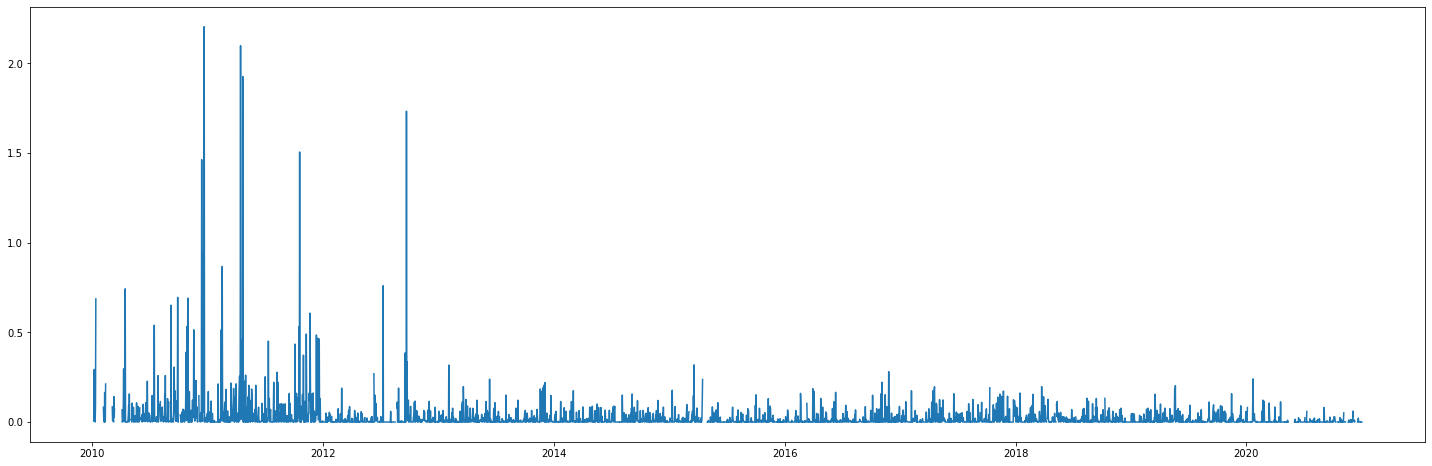

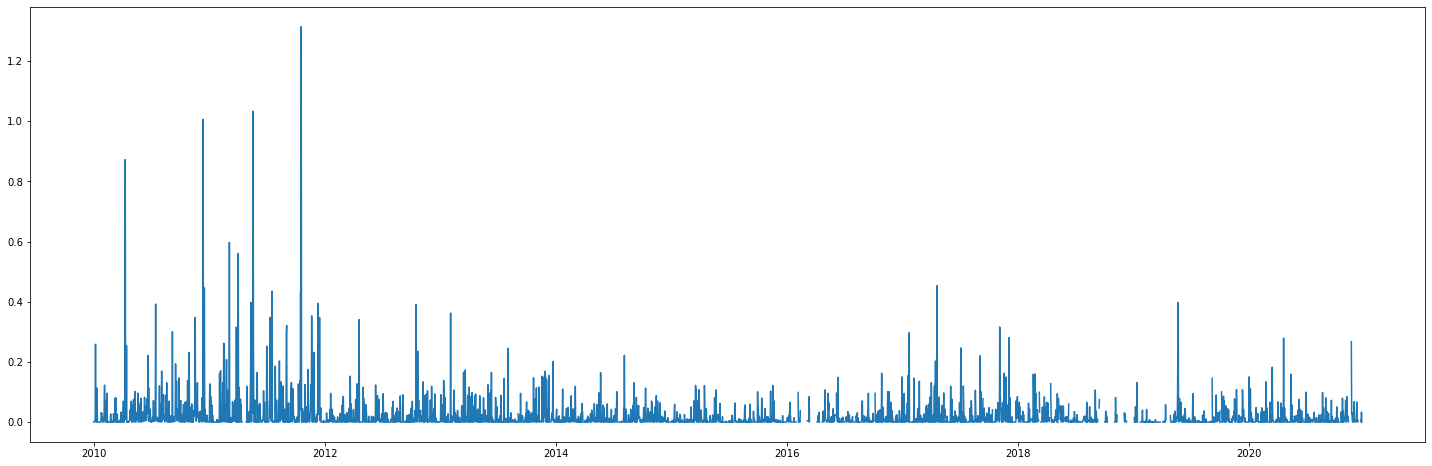

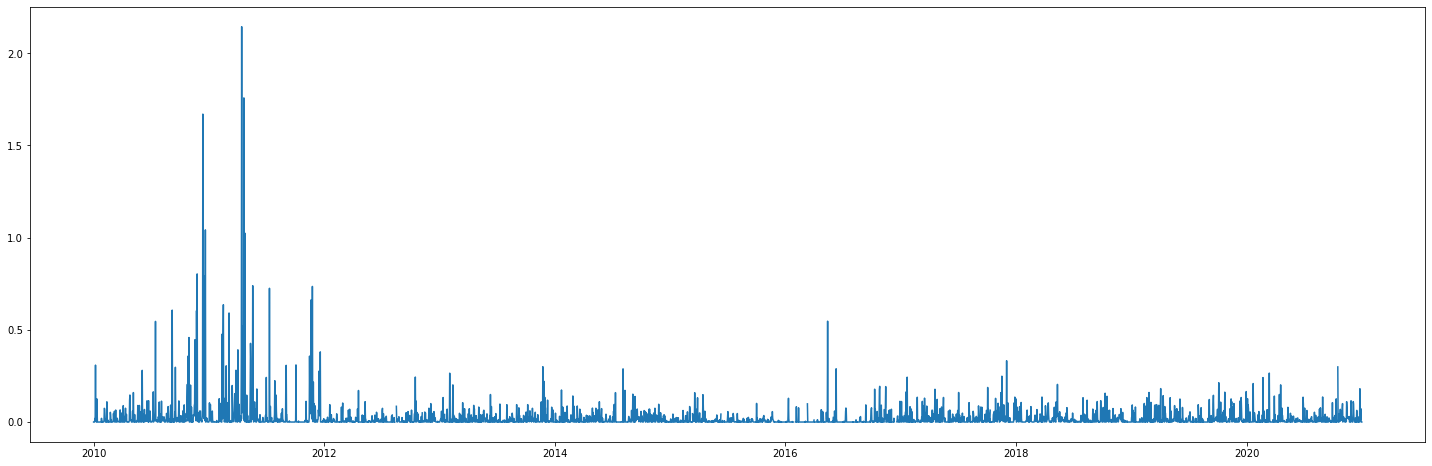

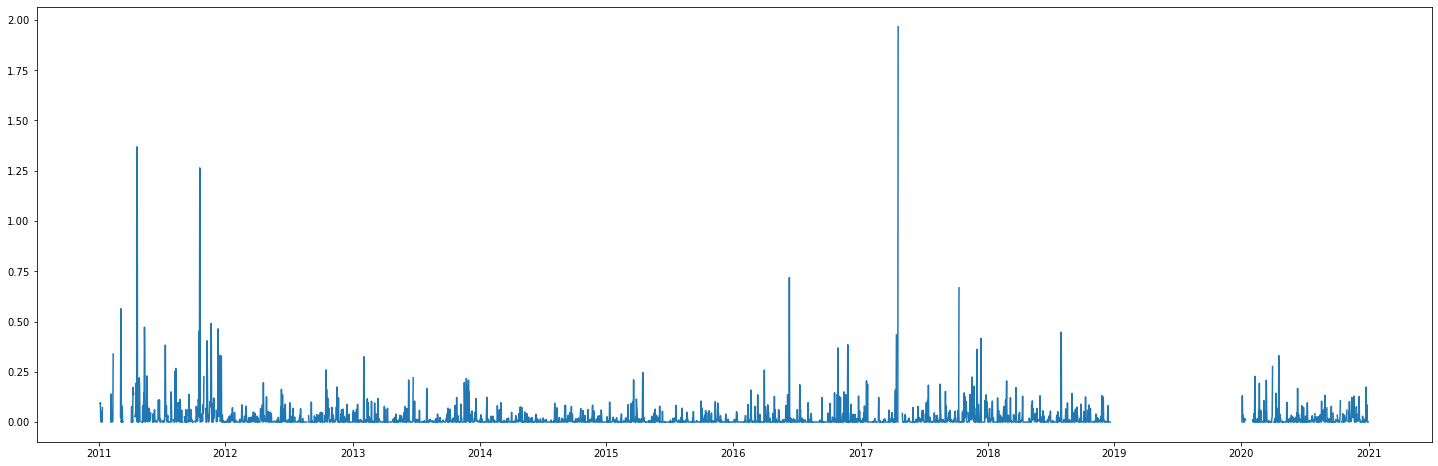

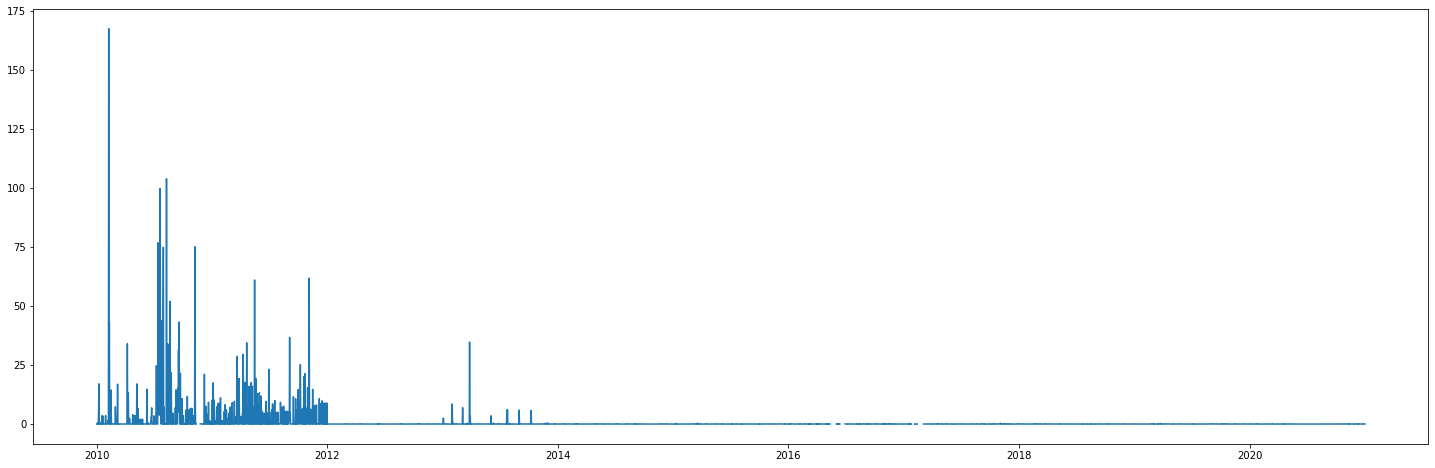

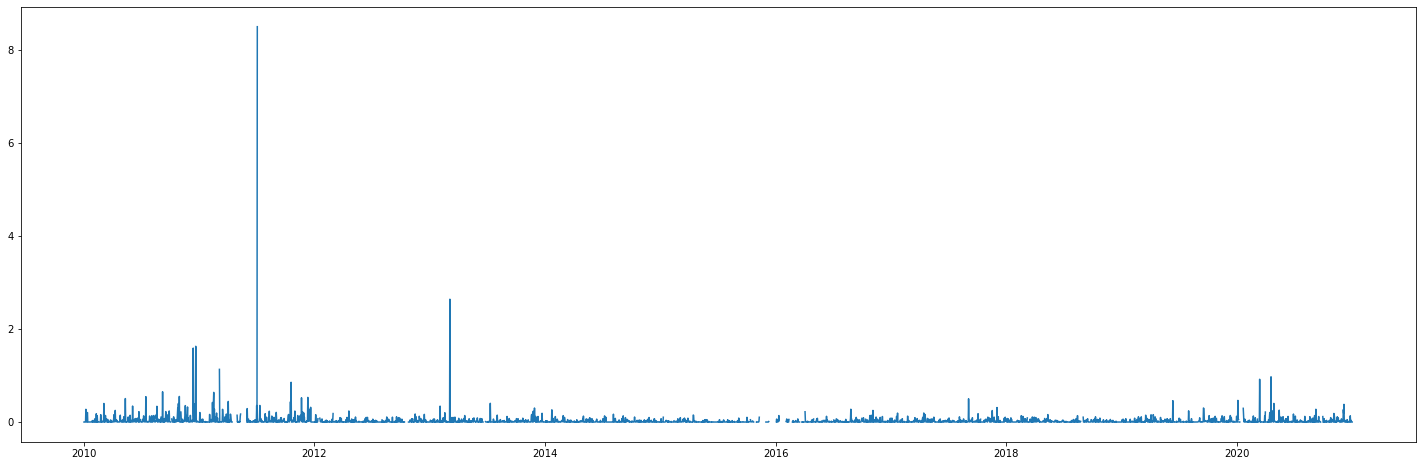

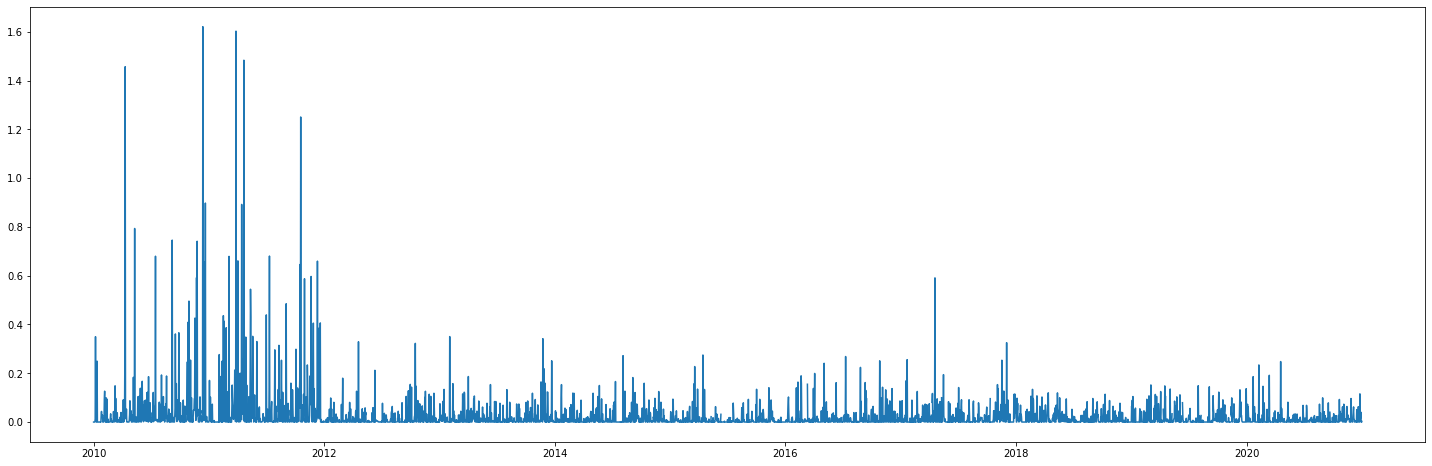

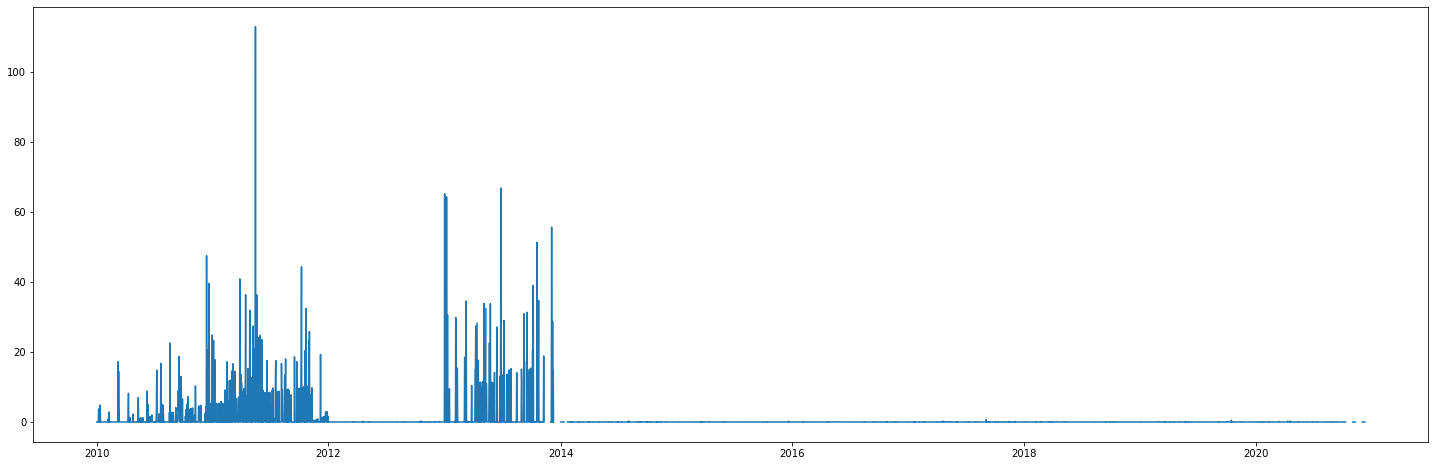

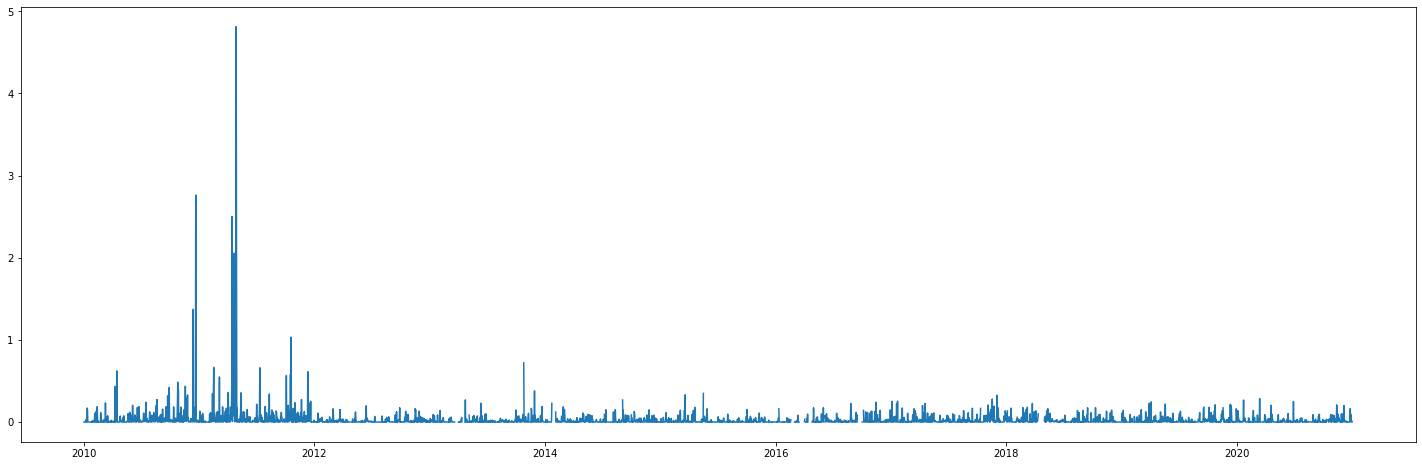

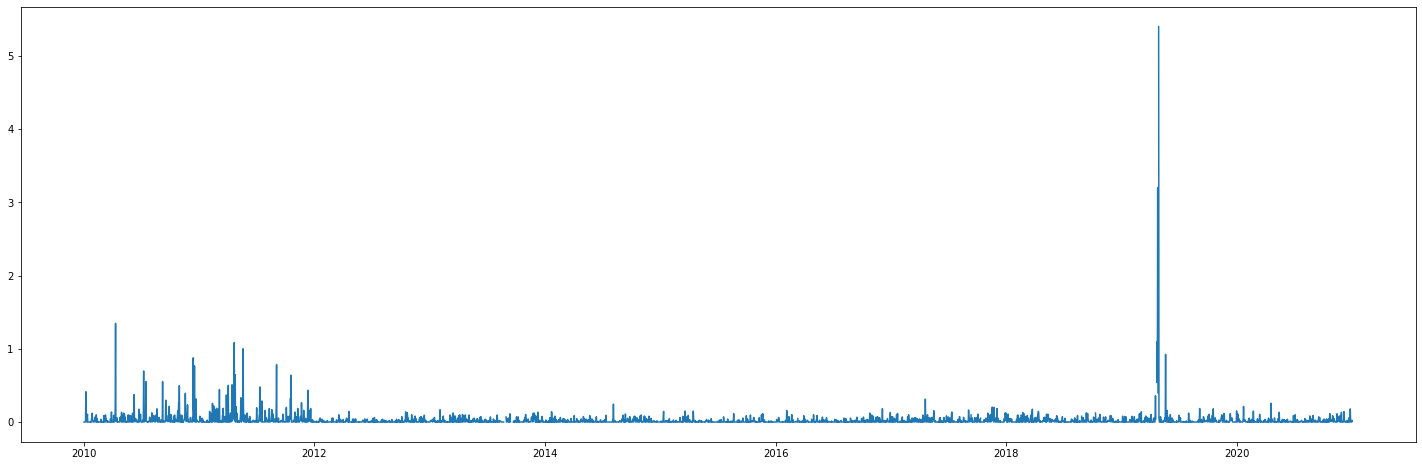

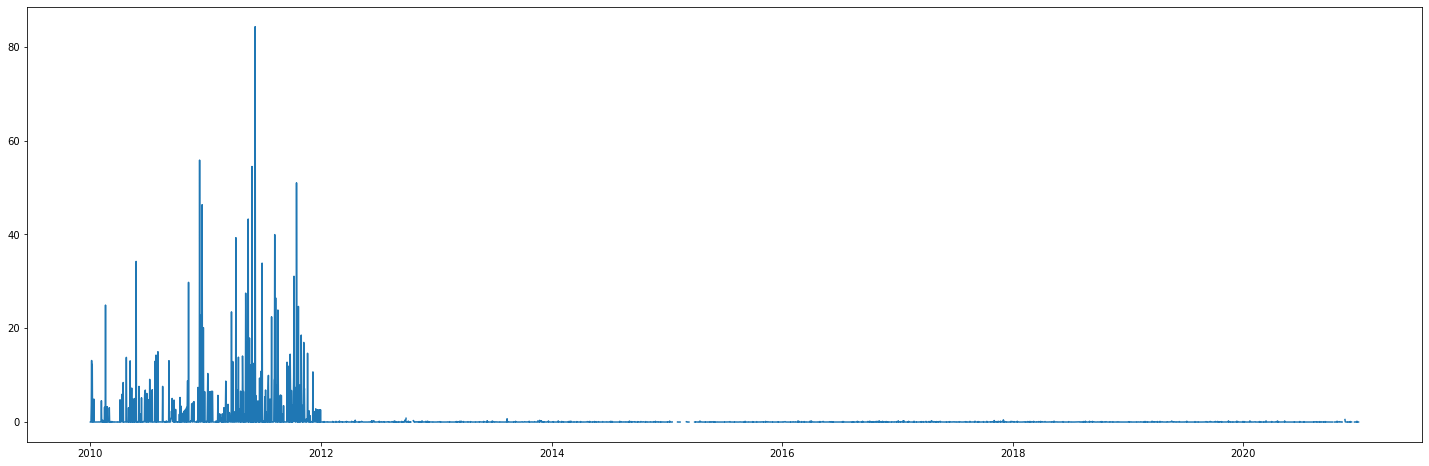

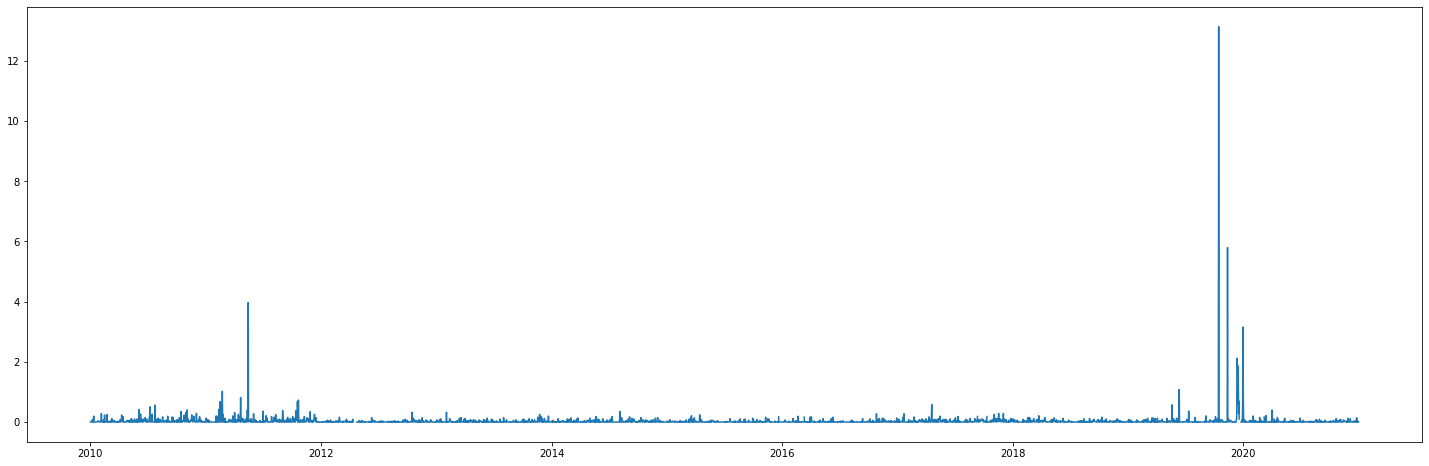

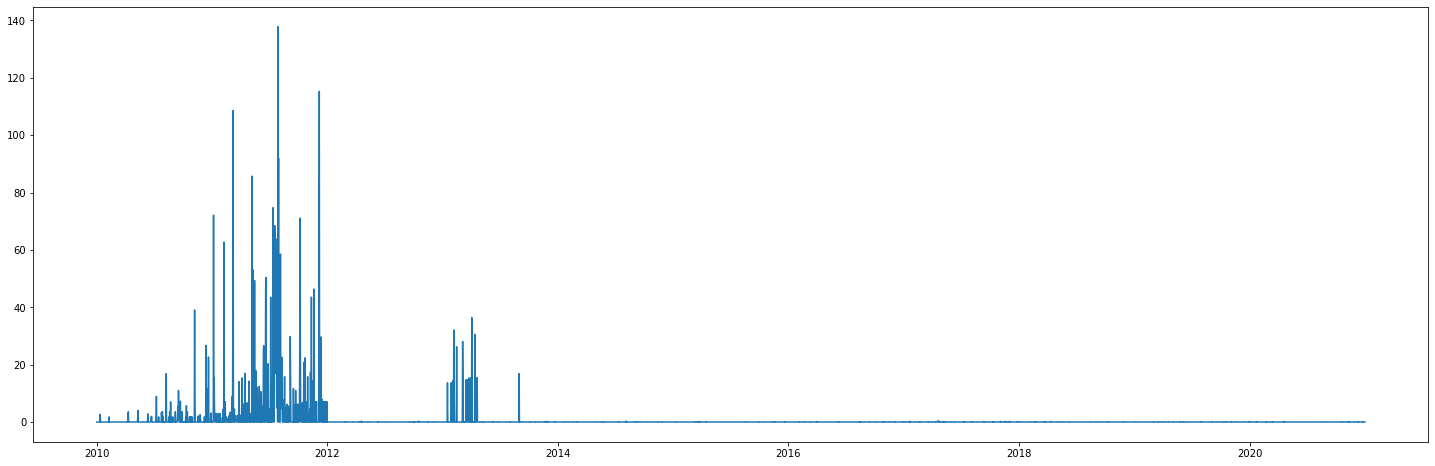

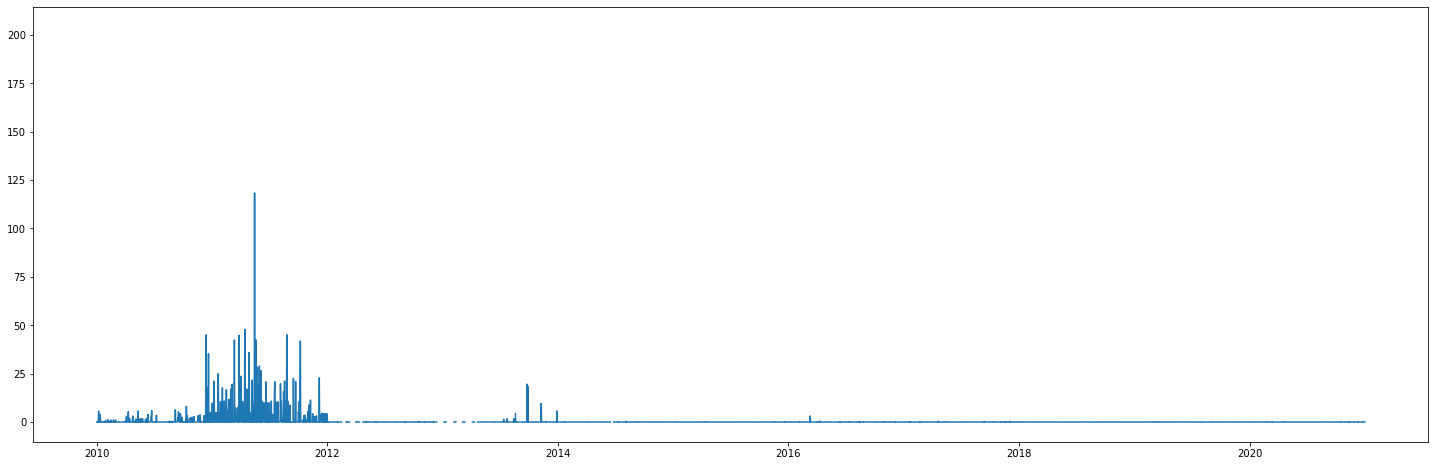

In [18]:
for i in datasets:    
    plt.figure(figsize=(25,8))
    plt.plot(i.index, i["Precipitacion_Real"])  

In [19]:
alcazares.isnull().sum()

Temperatura           202
Velocidad             202
Direccion             202
Presion               200
Humedad               202
Precipitacion         200
Radiacion             202
Evapotranspiracion    200
Precipitacion_Real    200
Evapo_real            200
dtype: int64

In [58]:
for i in datasets:
    print(i.isnull().sum()) 
    print("//") 

Temperatura           202
Velocidad             202
Direccion             202
Presion               200
Humedad               202
Precipitacion         200
Radiacion             202
Evapotranspiracion    200
Precipitacion_Real    200
Evapo_real            200
dtype: int64
//
Temperatura           303
Direccion             302
Presion               303
Humedad               304
Precipitacion         301
Radiacion             302
Evapotranspiracion    302
Precipitacion_Real    301
Evapo_real            302
dtype: int64
//
Temperatura           500
Velocidad             124
Direccion             124
Presion               130
Humedad               488
Precipitacion          55
Radiacion             167
Evapotranspiracion     55
Precipitacion_Real     52
Evapo_real             55
dtype: int64
//
Temperatura           690
Velocidad             689
Direccion             691
Presion               567
Humedad               691
Precipitacion         570
Radiacion             689
Evapotranspiraci

<AxesSubplot:ylabel='Fecha'>

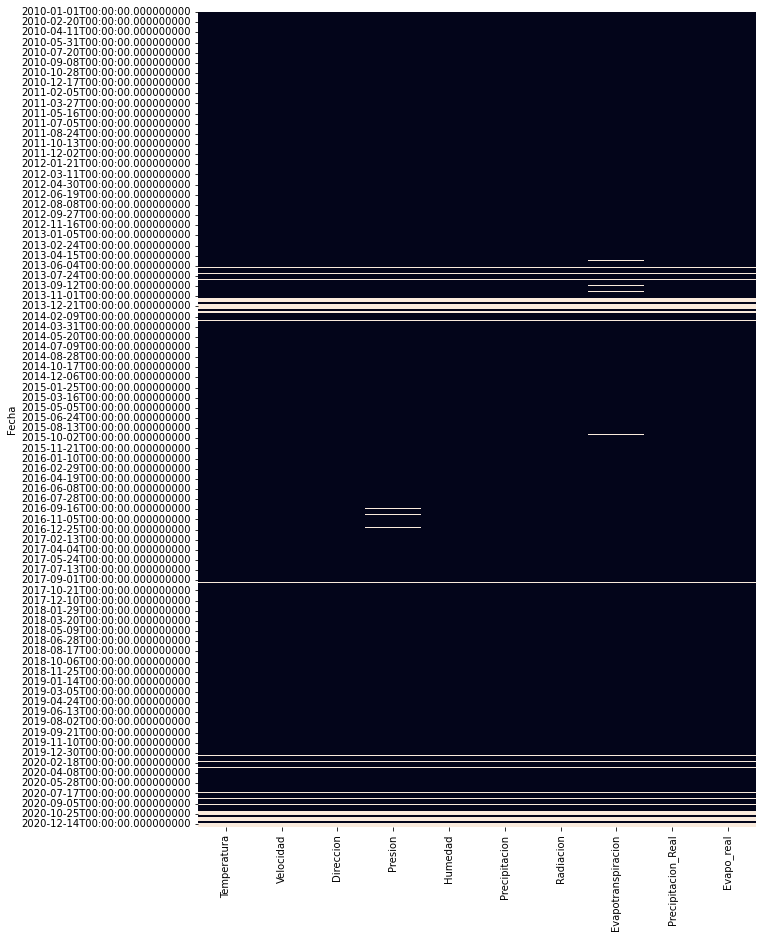

In [138]:
plt.figure(figsize=(10,15)) 
sns.heatmap(la_nubia.isnull(), cbar=False) 

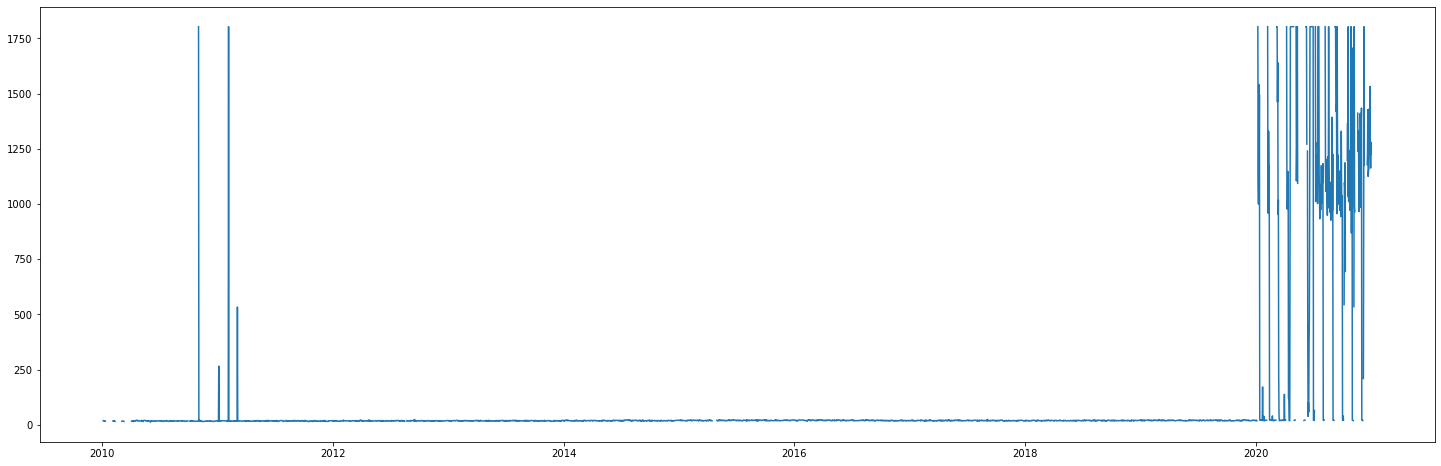

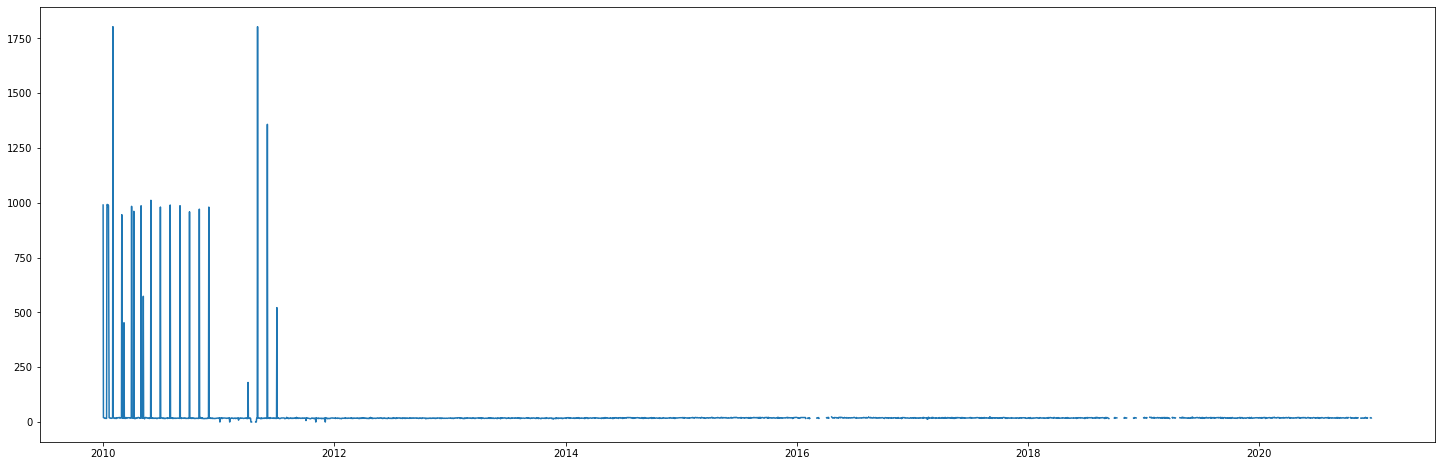

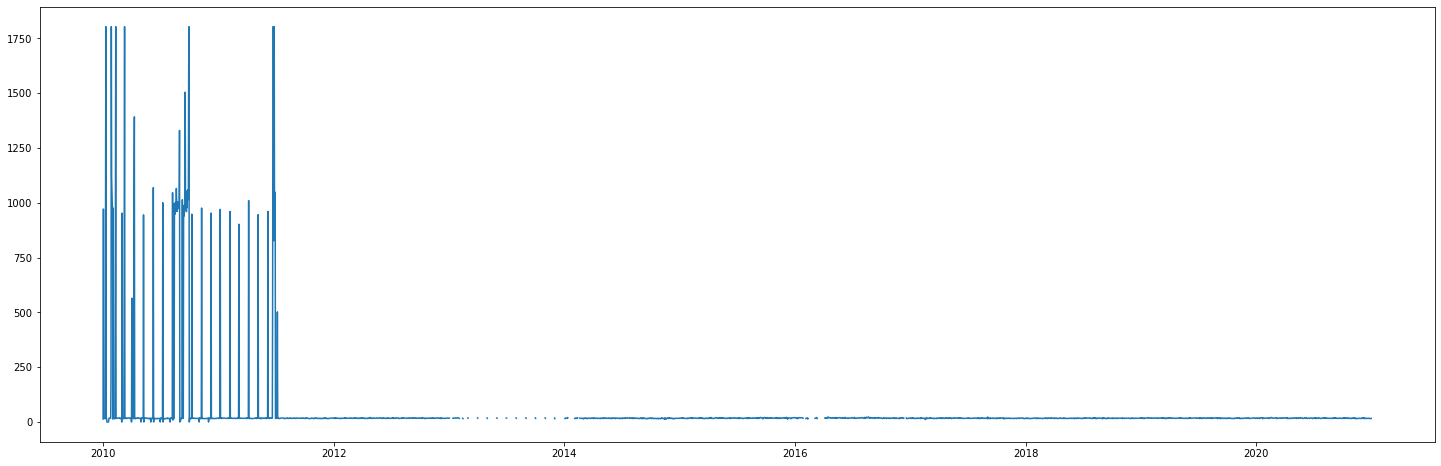

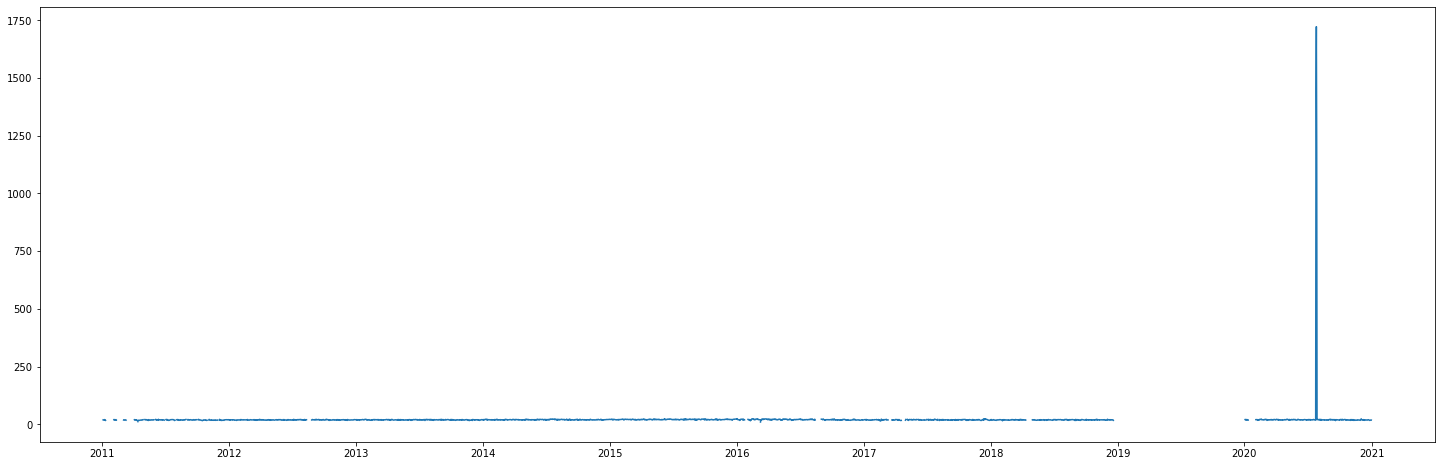

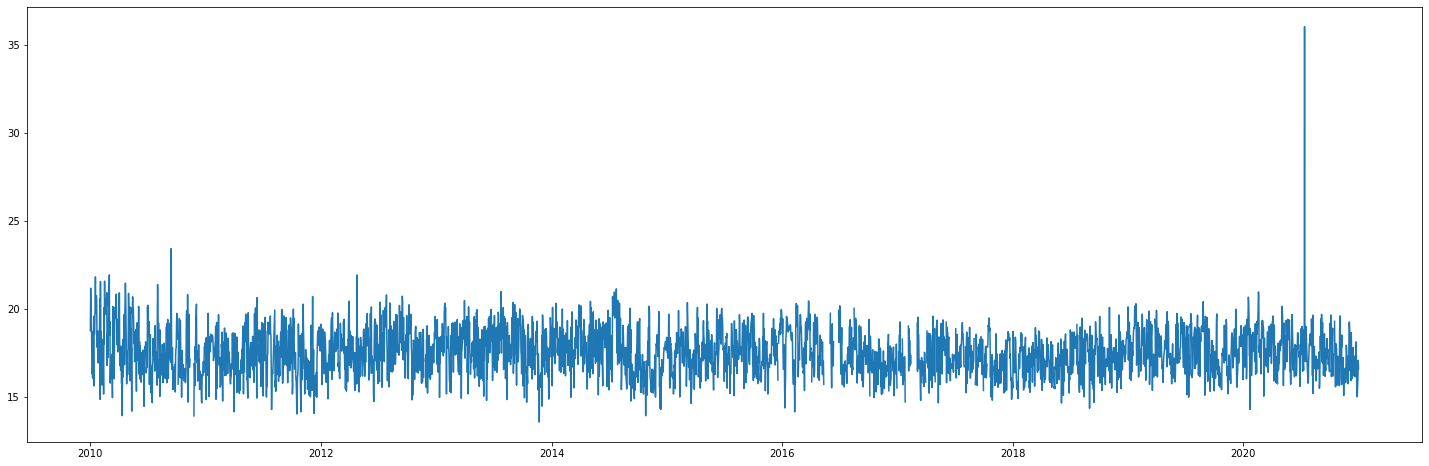

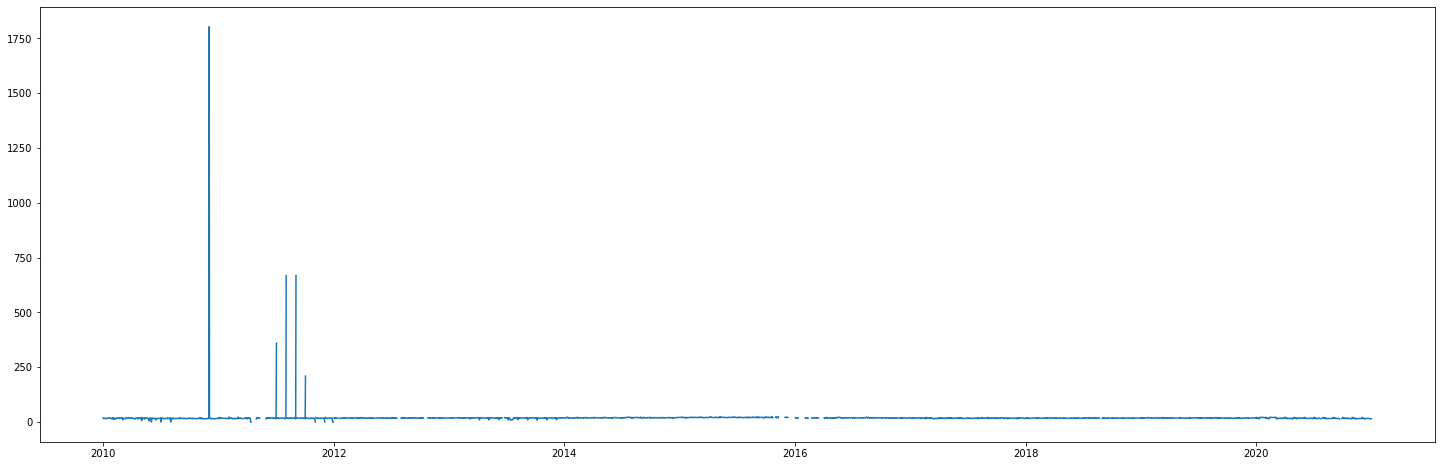

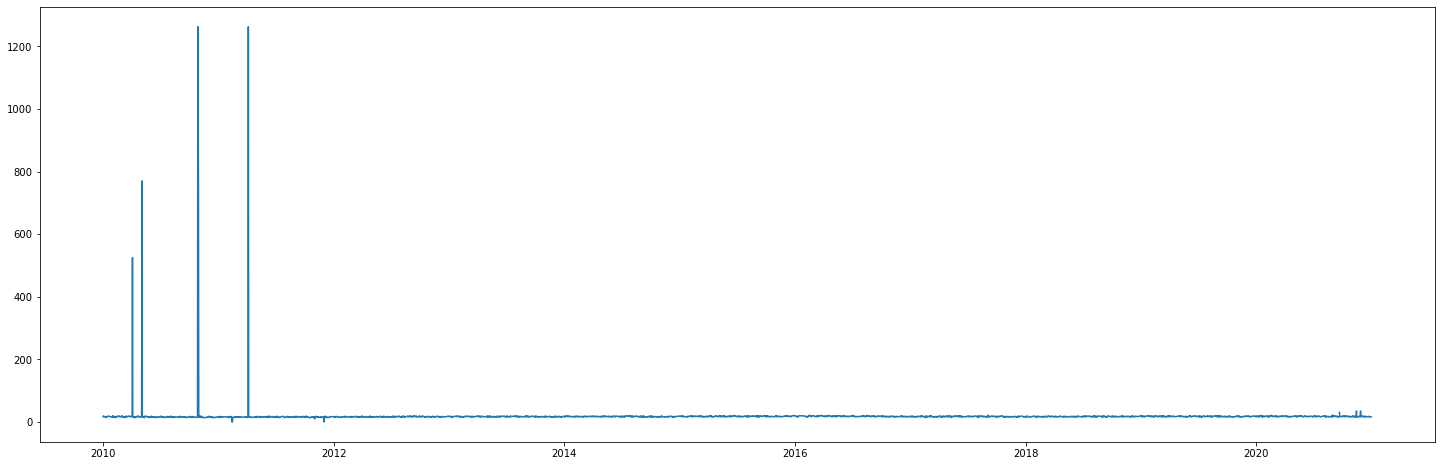

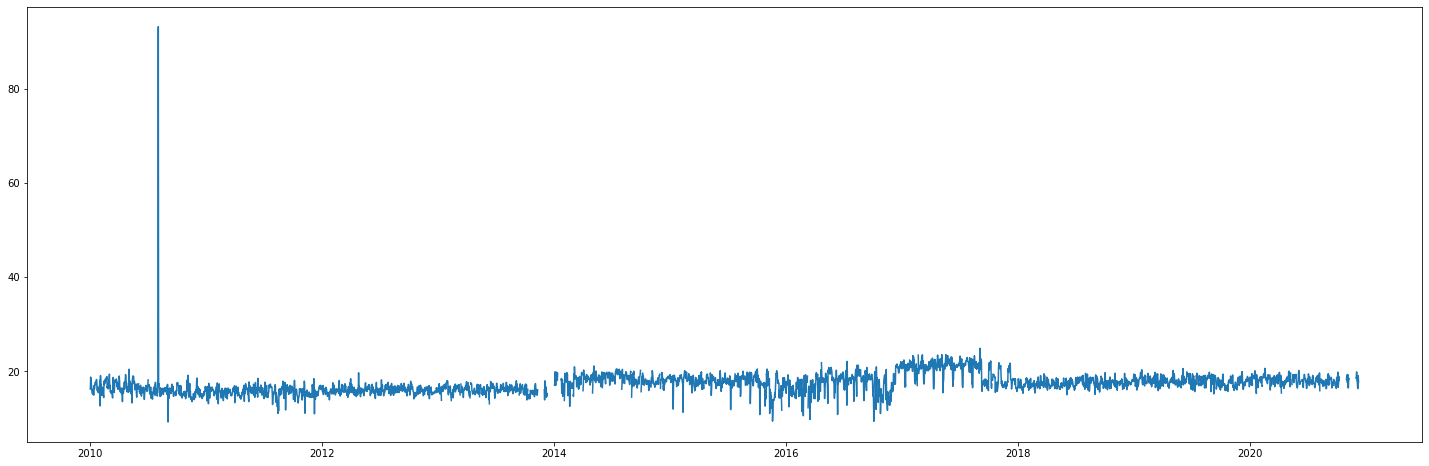

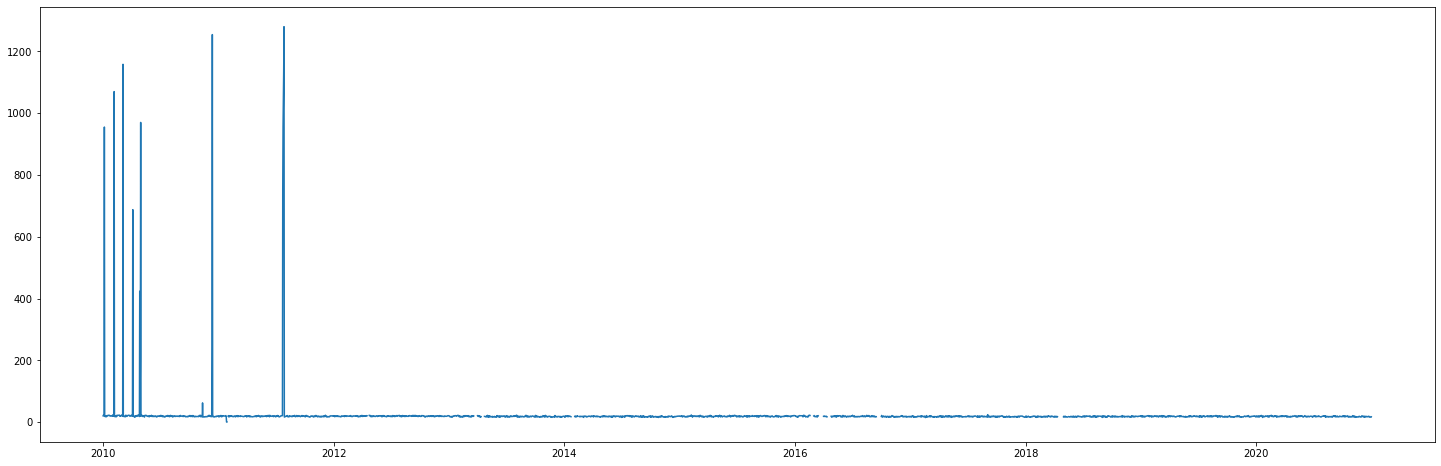

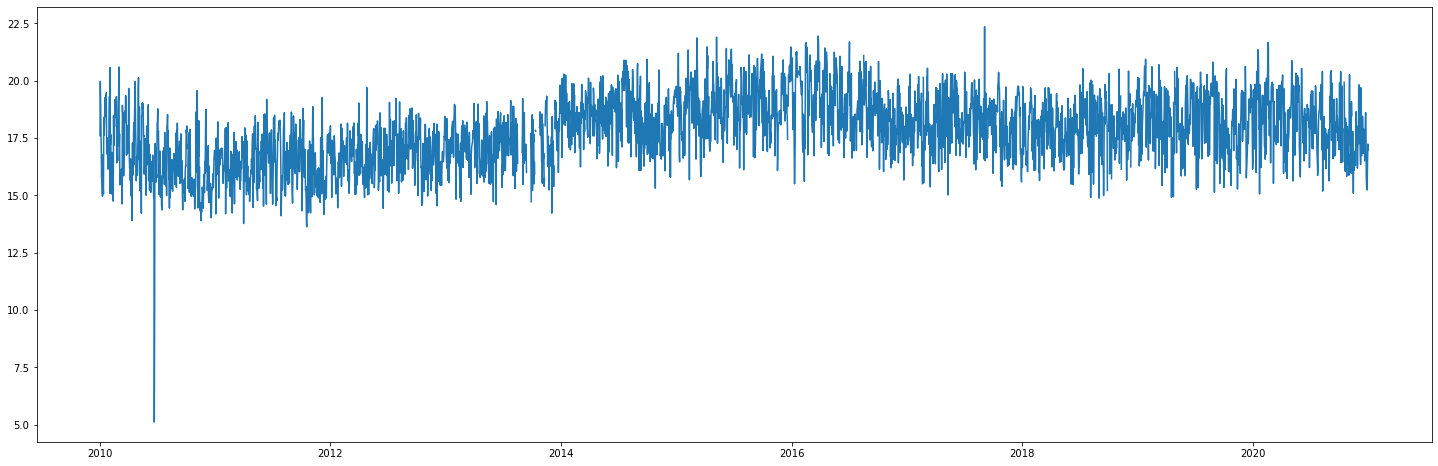

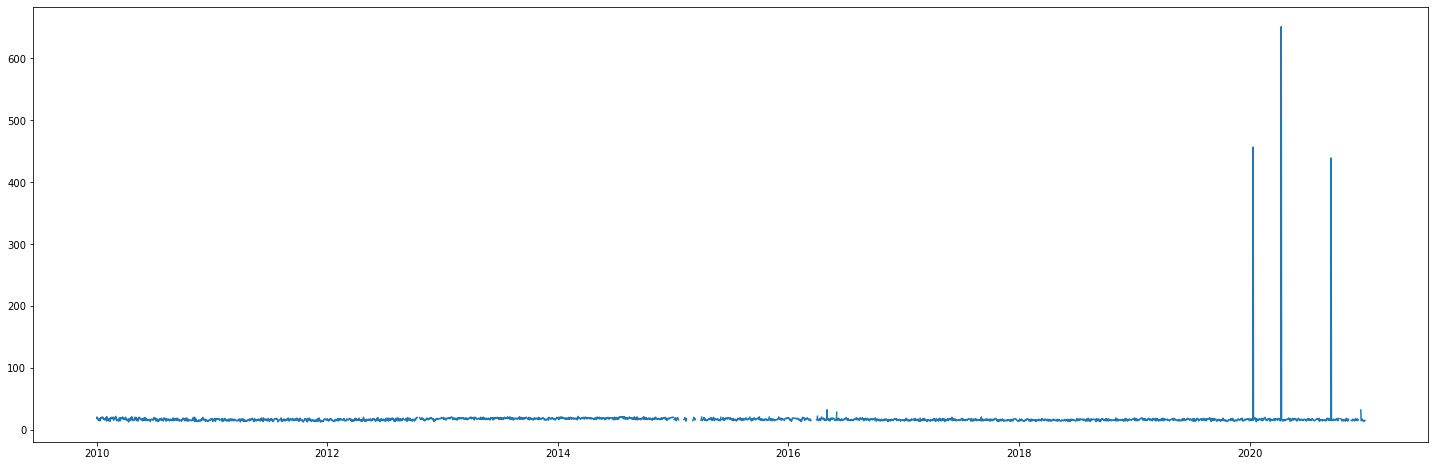

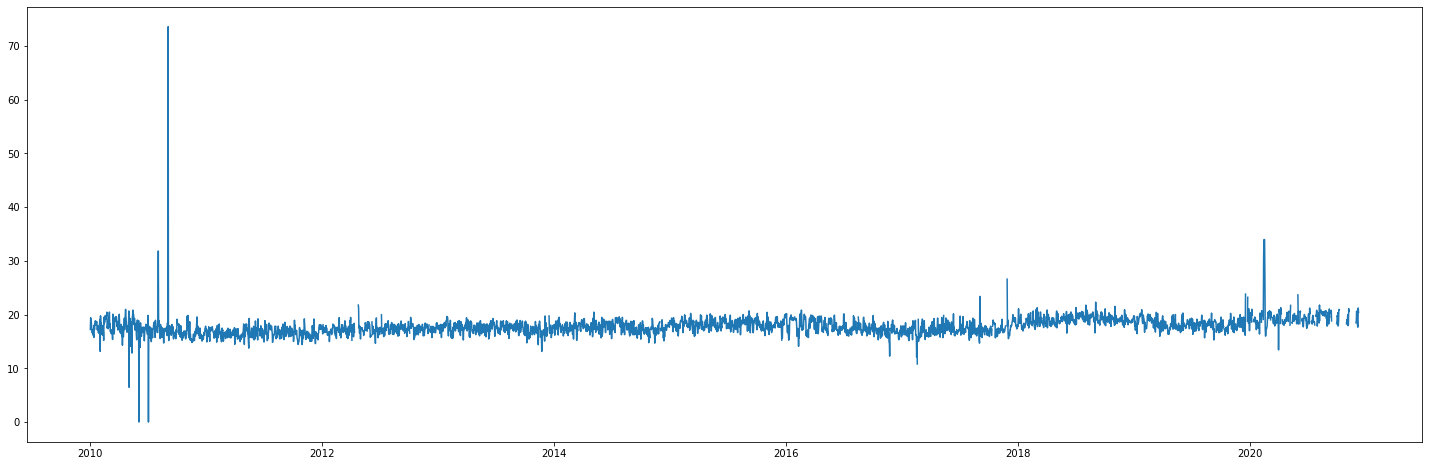

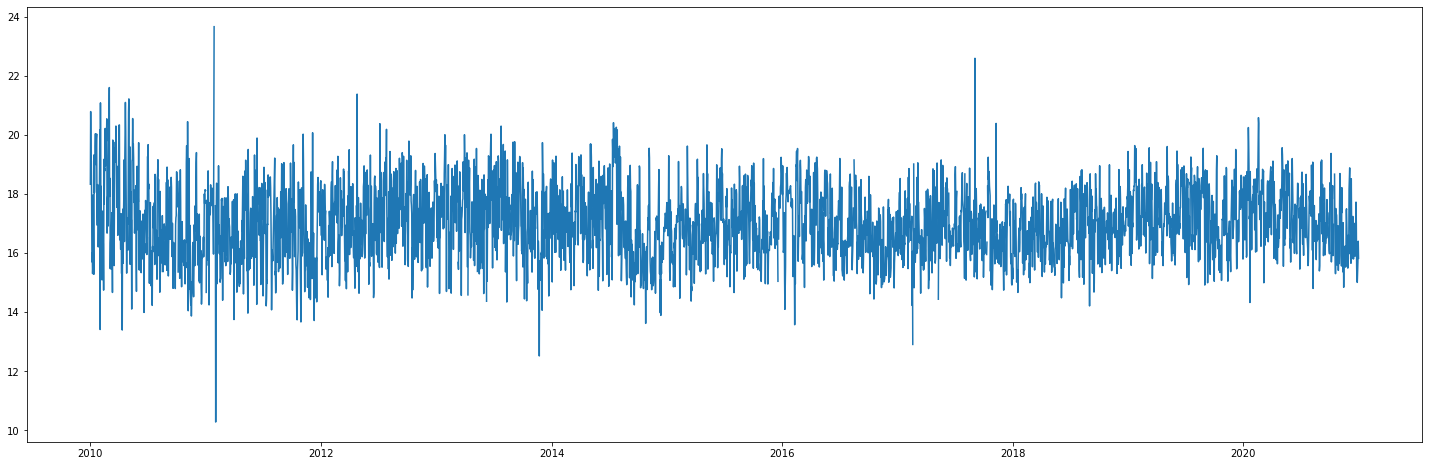

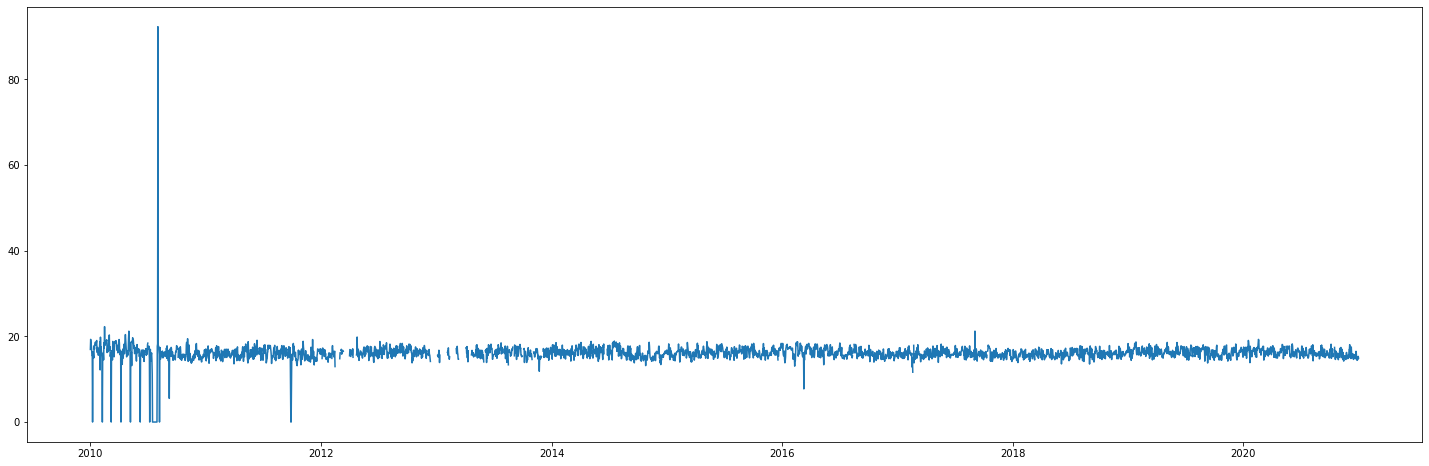

In [60]:
for i in datasets:    
    plt.figure(figsize=(25,8))
    plt.plot(i.index, i["Temperatura"])   

In [61]:
alcazares 

Temperatura  Velocidad     Direccion     Presion     Humedad  \
Fecha                                                                      
2010-01-05    18.176446   1.261916    215.975610  602.592962   84.961672   
2010-01-06    16.829444   1.146424    177.954861  604.028958   90.194444   
2010-01-07    16.863345   1.378432    192.982578  602.900767   86.770035   
2010-01-08    16.108021   0.655000    217.447917  602.040104   92.559028   
2010-01-09    15.777674   0.435556    240.812500  603.354687   91.767361   
...                 ...        ...           ...         ...         ...   
2020-12-27  1532.071280  96.702417  27838.838863  602.721991  229.777251   
2020-12-28  1227.944863  77.349071  22286.087432  602.678852  200.300546   
2020-12-29  1162.433205  73.244015  21094.683398  602.155097  194.501931   
2020-12-30  1279.554231  80.760629  23213.153846  601.878357  202.699301   
2020-12-31  1224.929895  77.096028  22233.369338  601.788153  199.358885   

            Precipitacion     Radiacion  Evapotranspiracion  \
Fecha                                                         
2010-01-05      34.872474    133.425087            1.155749   
2010-01-06      42.756944     80.510417            0.624201   
2010-01-07      24.083624    106.094077            0.850871   
2010-01-08      37.795833    100.388889            0.646667   
2010-01-09      33.122917    108.309028            0.794583   
...                   ...           ...                 ...   
2020-12-27       0.000000  27842.905213            0.260190   
2020-12-28       0.093989  22297.770492            0.564098   
2020-12-29       0.273359  21286.077220            0.767954   
2020-12-30       0.000000  23301.545455            0.741818   
2020-12-31       0.000000  22203.324042            0.324878   

            Precipitacion_Real  Evapo_real  
Fecha                                       
2010-01-05            0.006202    0.007700  
2010-01-06            0.012917    0.004132  
2010-01-07            0.293171    0.009164  
2010-01-08            0.006806    0.004653  
2010-01-09            0.023125    0.005174  
...                        ...         ...  
2020-12-27            0.000000    0.004123  
2020-12-28            0.002186    0.009235  
2020-12-29            0.000000    0.008610  
2020-12-30            0.000000    0.008706  
2020-12-31            0.000000    0.003310  

[4014 rows x 10 columns]

KeyError: 'Velocidad'

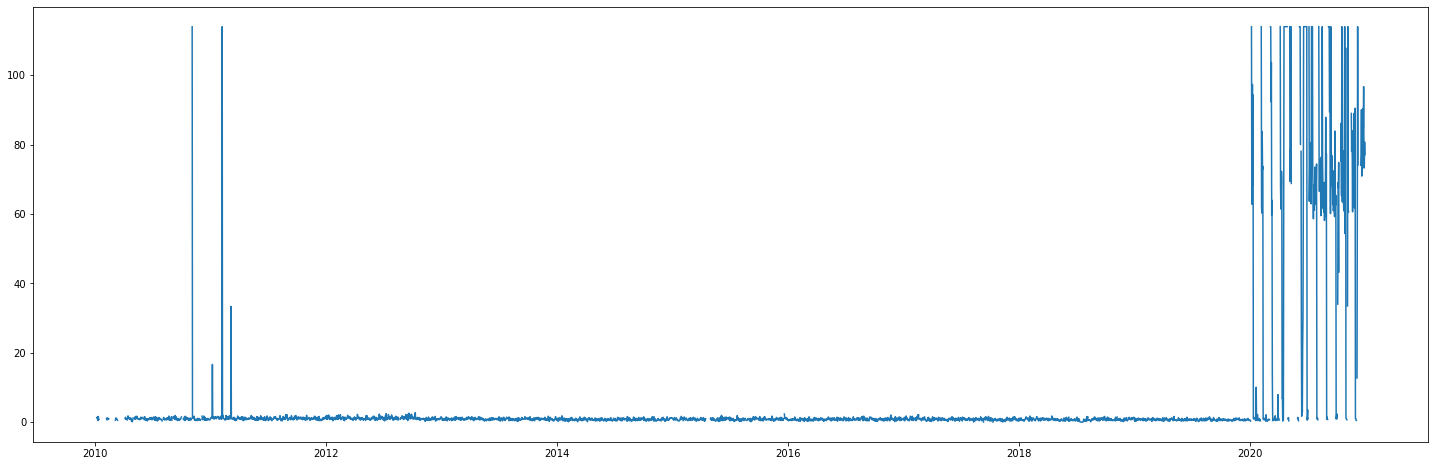

<Figure size 1800x576 with 0 Axes>

In [62]:
for i in datasets:    
    plt.figure(figsize=(25,8))
    plt.plot(i.index, i["Velocidad"])   

In [64]:
aranjuez

Temperatura     Direccion     Presion     Humedad  Precipitacion  \
Fecha                                                                          
2010-01-01   989.545993  17929.226481  605.393380  165.250871       0.000000   
2010-01-02    20.261672    179.686411  603.128258   67.369338       0.000000   
2010-01-03    19.821882    175.679443  605.202160   69.686411       0.000000   
2010-01-04    19.407526    178.017422  606.107143   72.209059       0.000000   
2010-01-05    18.014321    170.195122  607.913519   80.599303      37.065505   
...                 ...           ...         ...         ...            ...   
2020-12-27          NaN           NaN         NaN         NaN            NaN   
2020-12-28          NaN           NaN         NaN         NaN            NaN   
2020-12-29          NaN           NaN         NaN         NaN            NaN   
2020-12-30          NaN           NaN         NaN         NaN            NaN   
2020-12-31          NaN           NaN         NaN         NaN            NaN   

               Radiacion  Evapotranspiracion  Precipitacion_Real  Evapo_real  
Fecha                                                                         
2010-01-01  18178.195122            1.945192            0.000000    0.014286  
2010-01-02    255.540070            2.132822            0.000000    0.015226  
2010-01-03    193.003484            1.679129            0.000000    0.011603  
2010-01-04    227.052265            1.831707            0.000000    0.013136  
2010-01-05    165.623693            1.283624            0.000697    0.009094  
...                  ...                 ...                 ...         ...  
2020-12-27           NaN                 NaN                 NaN         NaN  
2020-12-28           NaN                 NaN                 NaN         NaN  
2020-12-29           NaN                 NaN                 NaN         NaN  
2020-12-30           NaN                 NaN                 NaN         NaN  
2020-12-31           NaN                 NaN                 NaN         NaN  

[4018 rows x 9 columns]